In [2]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math

from scipy import integrate

from scipy.integrate import quad

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


from scipy.stats import norm


from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn import preprocessing

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] =15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]

df = pd.read_csv('dme_LO.csv')
from platform import python_version

print(python_version())


3.7.3


In [3]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20


exp_energies = np.loadtxt('EXPERIMENT_AME2016.dat',usecols=(3,4,5))
e_df=pd.DataFrame(exp_energies)
e_df.columns=['N','Z','exp_BE']


In [4]:
match_e_df   =pd.DataFrame(columns=e_df.columns)
match_df     =pd.DataFrame(columns=df.columns)

for i in range(0,len(e_df)):
    for j in range(0,len(df)):
        if e_df.N.iloc[i]==df.N.iloc[j] and e_df.Z.iloc[i]==df.Z.iloc[j]:
            #all_data = all_data.append(df)[df.columns.tolist()]

            match_df    =  match_df.append(df.iloc[j], ignore_index=True)
            match_e_df  =  match_e_df.append(e_df.iloc[i], ignore_index=True)

In [5]:
no_match_df  =pd.DataFrame(columns=df.columns)

for i in range(0,len(df)):
    k=0
    for j in range(0,len(match_df)):
        if df.N.iloc[i]==match_df.N.iloc[j] and df.Z.iloc[i]==match_df.Z.iloc[j]:
            k=1
    if k==0:
        no_match_df=no_match_df.append(df.iloc[i], ignore_index=True)       

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doi

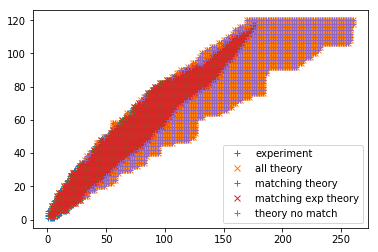

In [5]:
plt.plot(e_df.ix[:,"N"],e_df.ix[:,"Z"],"+", label="experiment")
plt.plot(df.ix[:,"N"],df.ix[:,"Z"],"x", label="all theory")
plt.plot(match_df.ix[:,"N"],match_df.ix[:,"Z"],"+", label="matching theory")
plt.plot(match_e_df.ix[:,"N"],match_e_df.ix[:,"Z"],"x", label="matching exp theory")
plt.plot(no_match_df.ix[:,"N"],no_match_df.ix[:,"Z"],"+", label="theory no match")
plt.legend()
plt.show()

Z


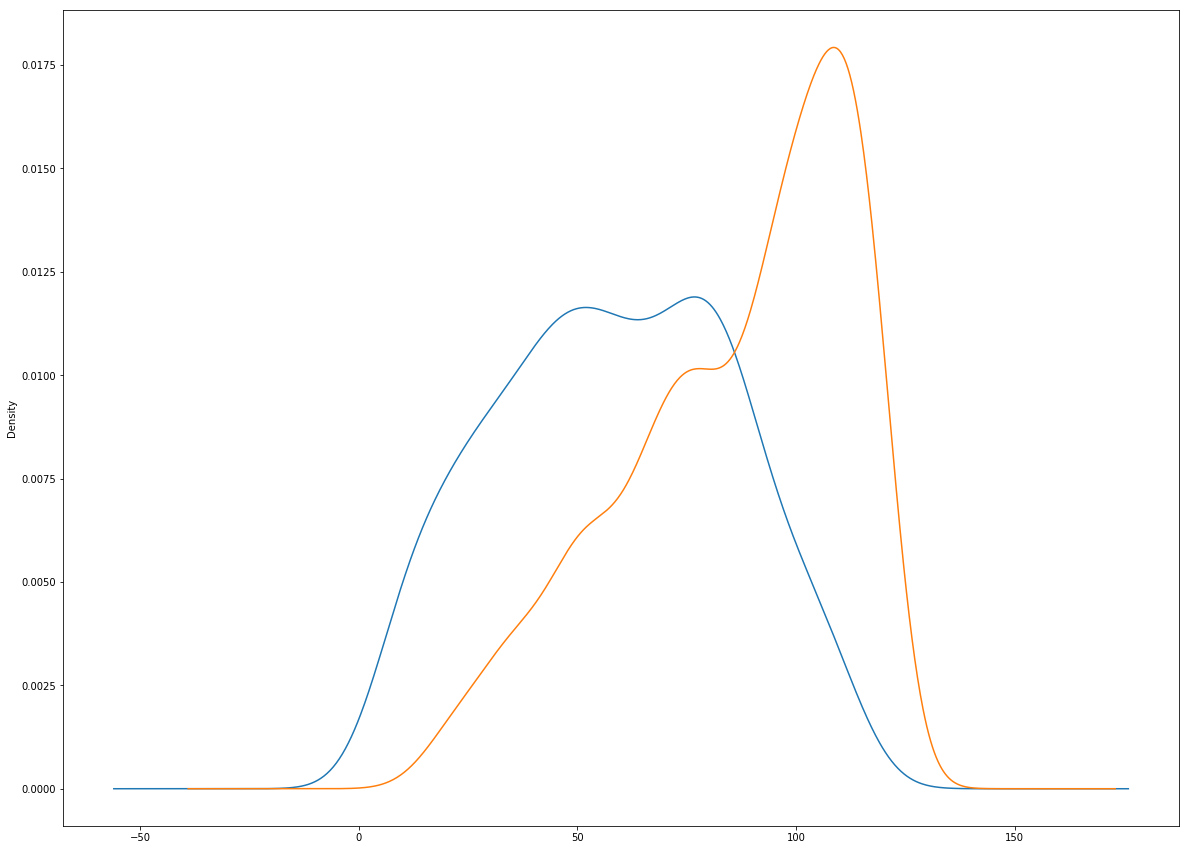

N


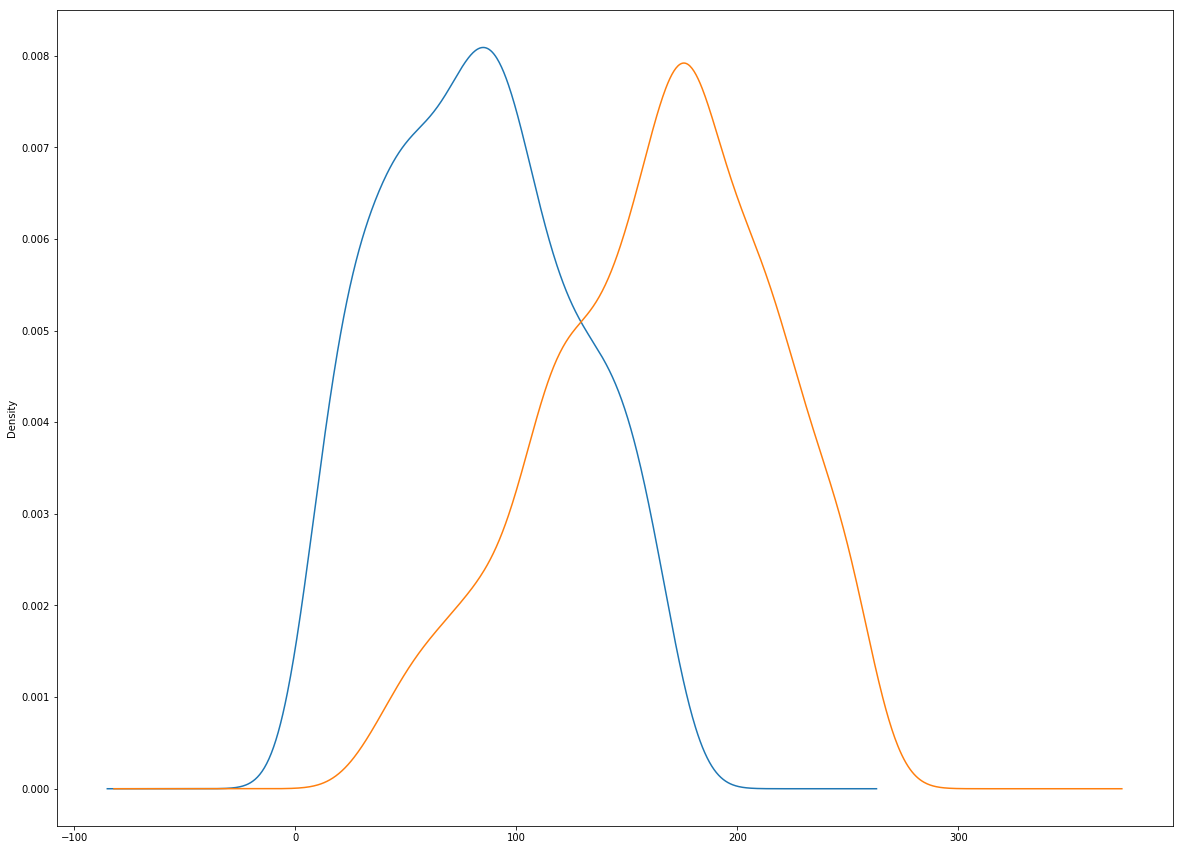

Energy


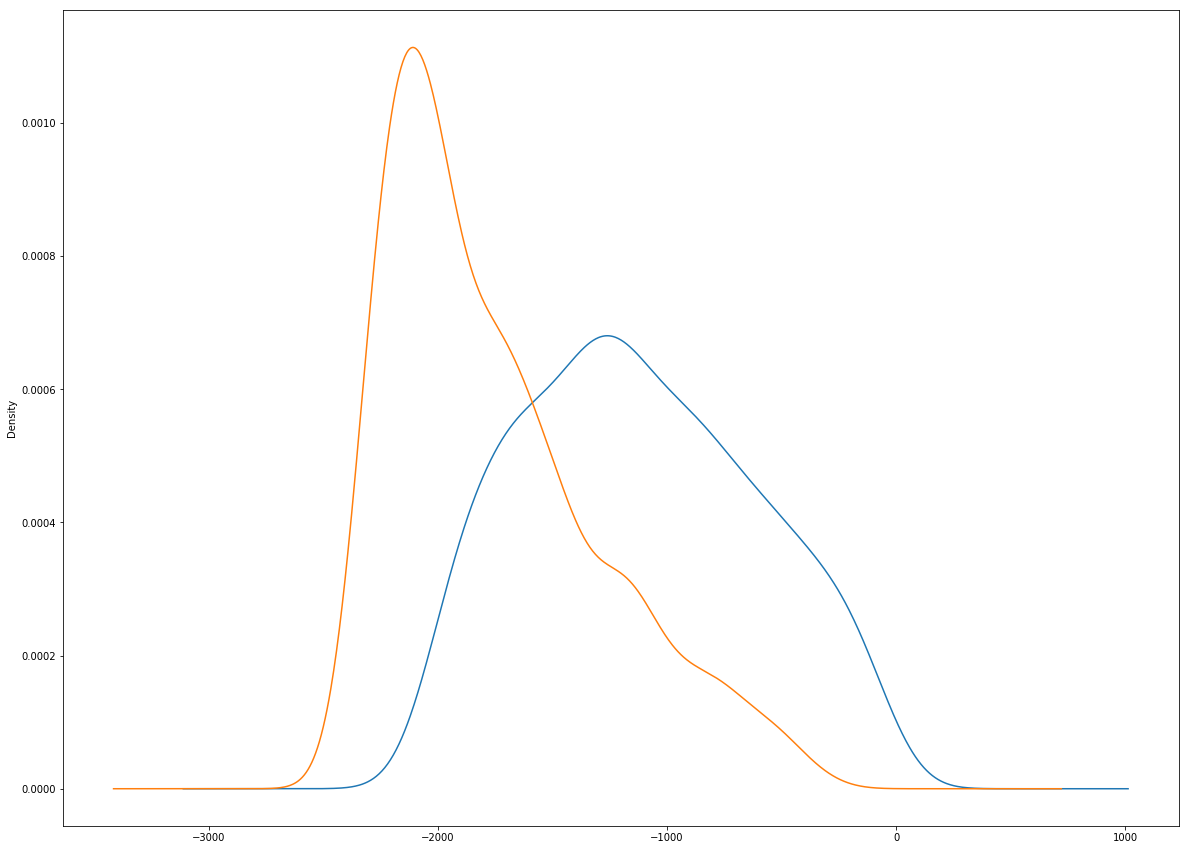

NShells


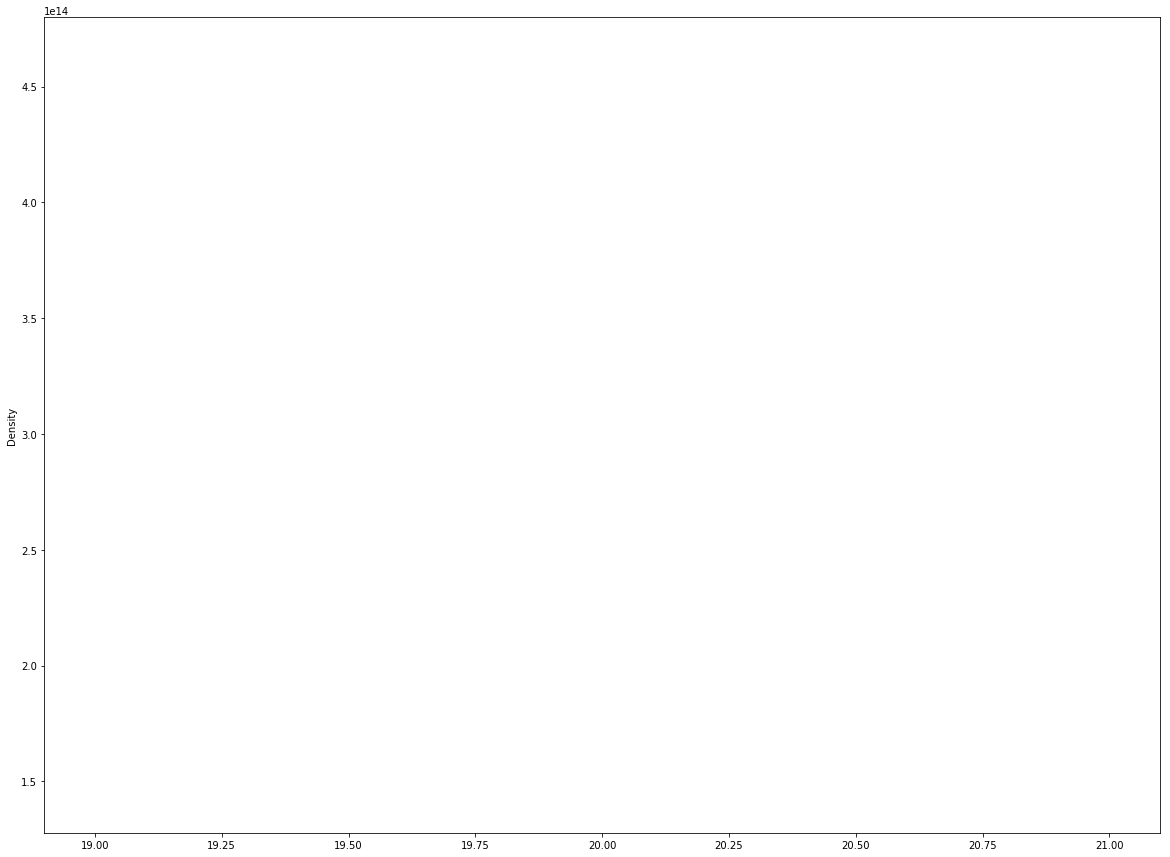

b0


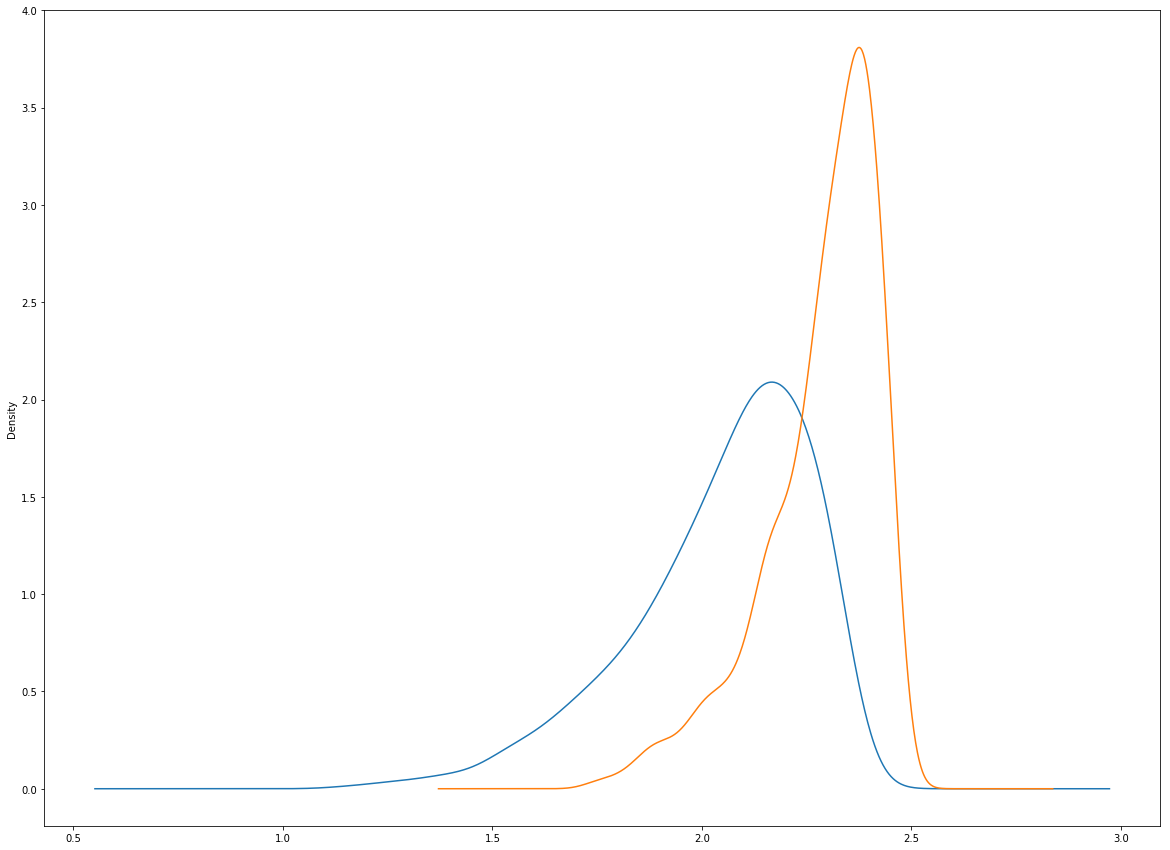

bz


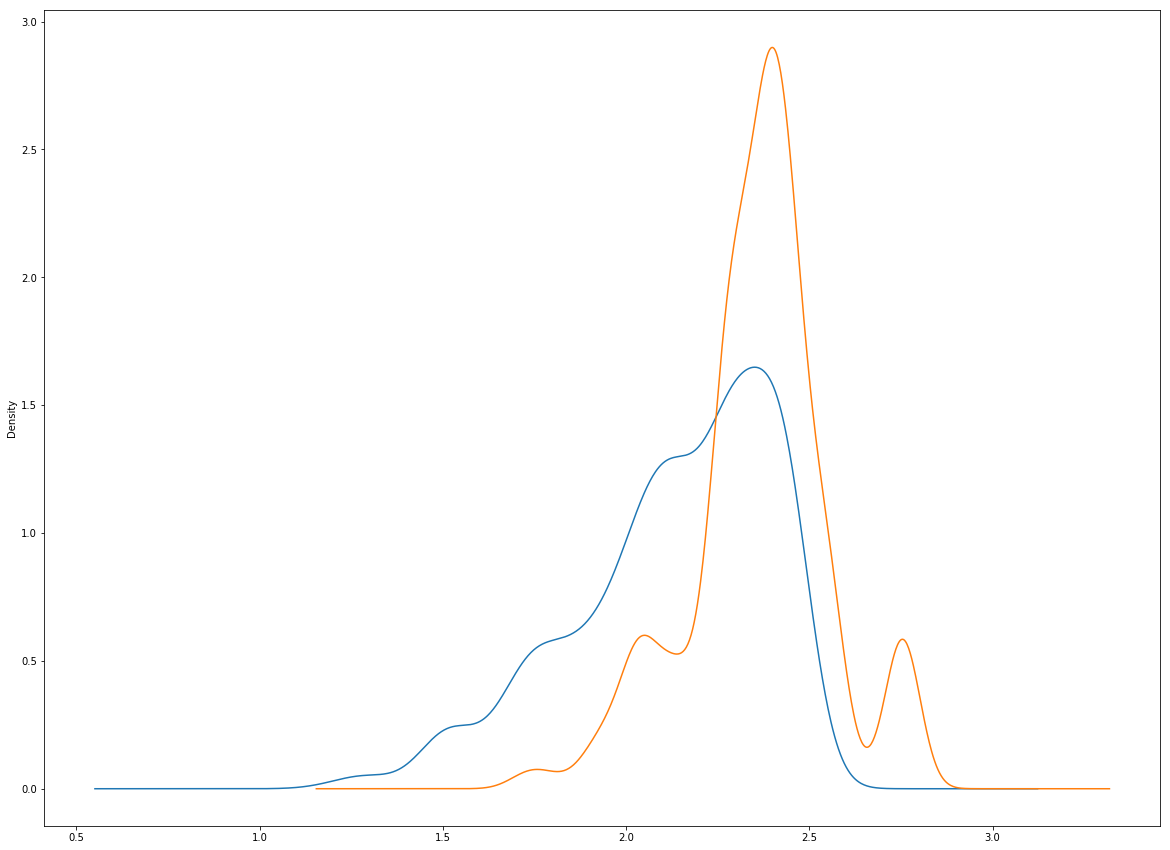

bp


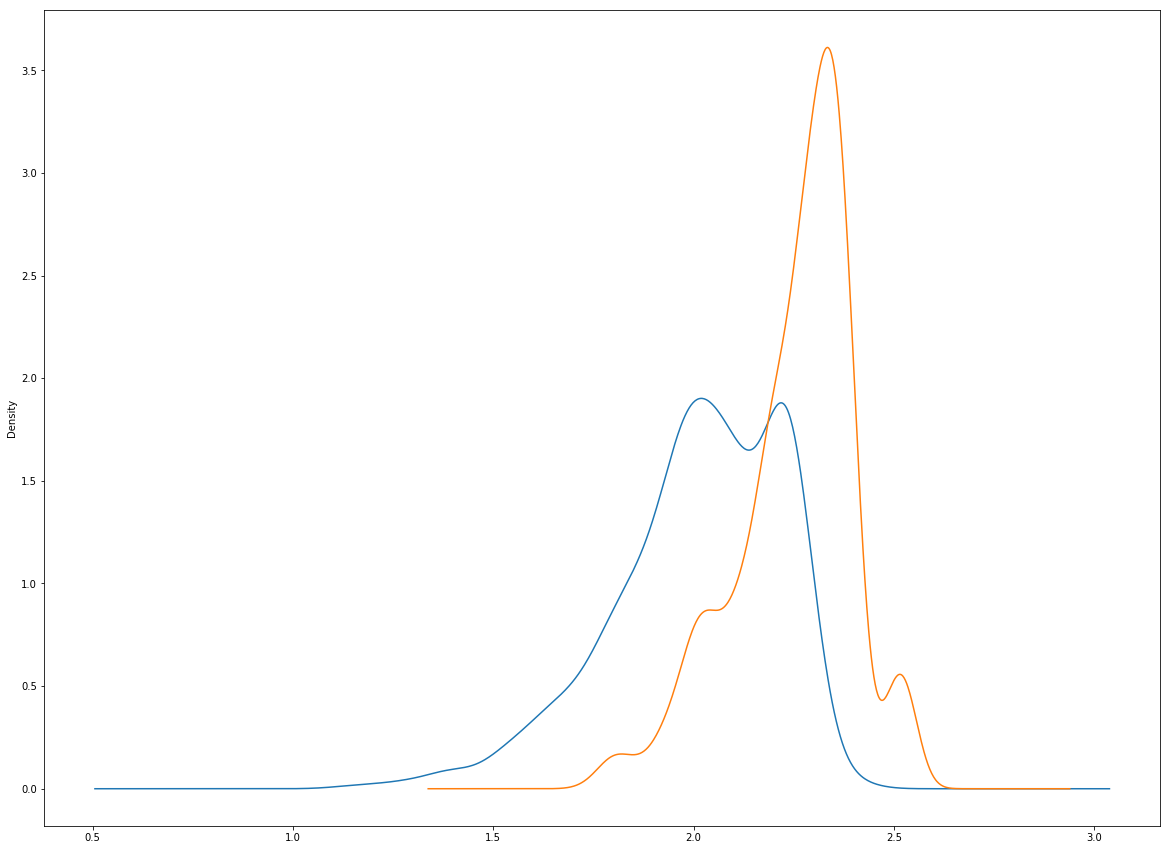

lambda_n


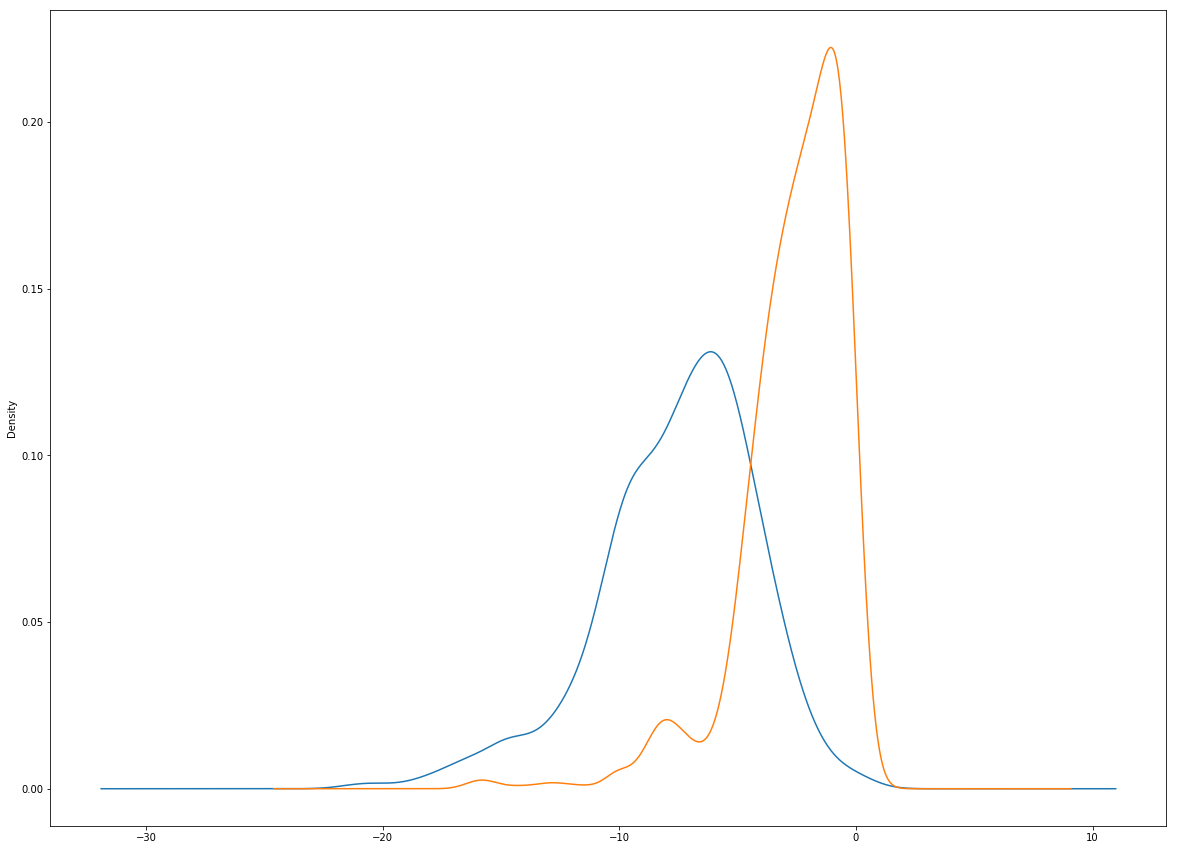

lambda_p


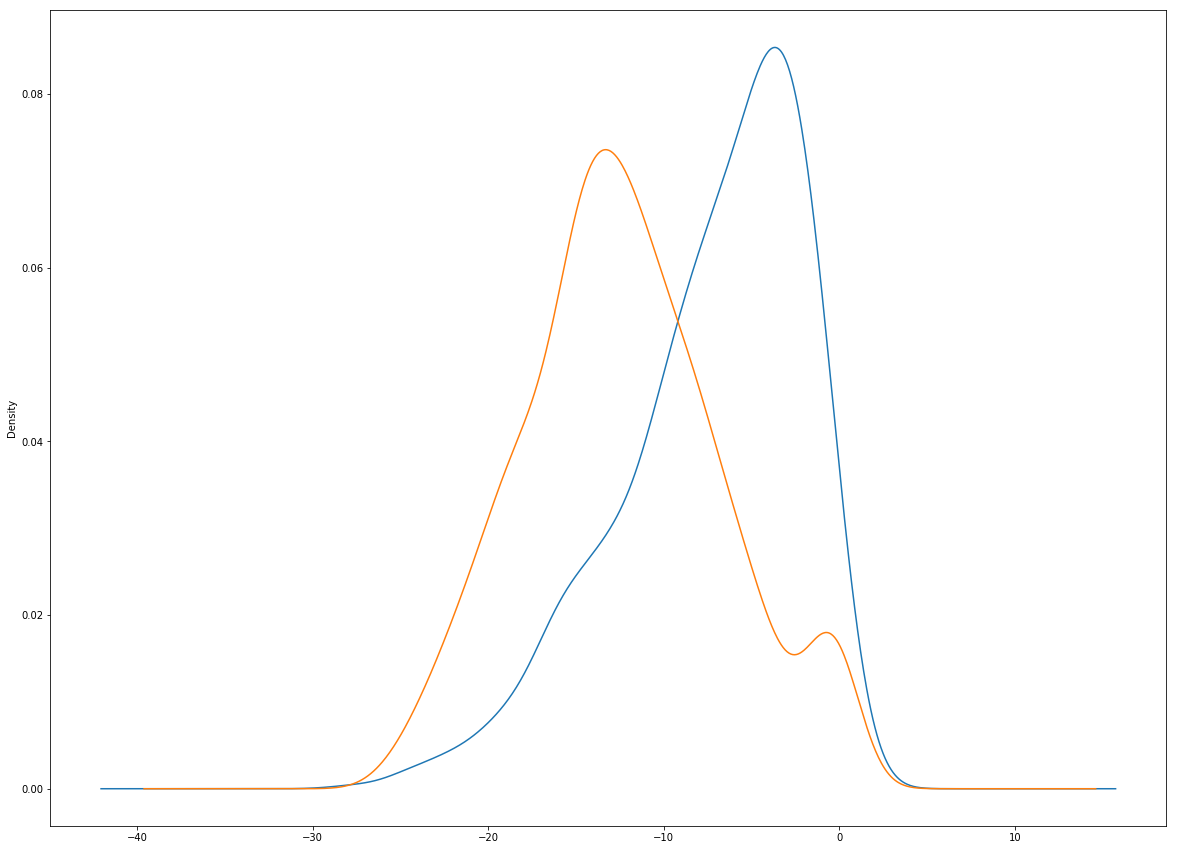

Lambda_n


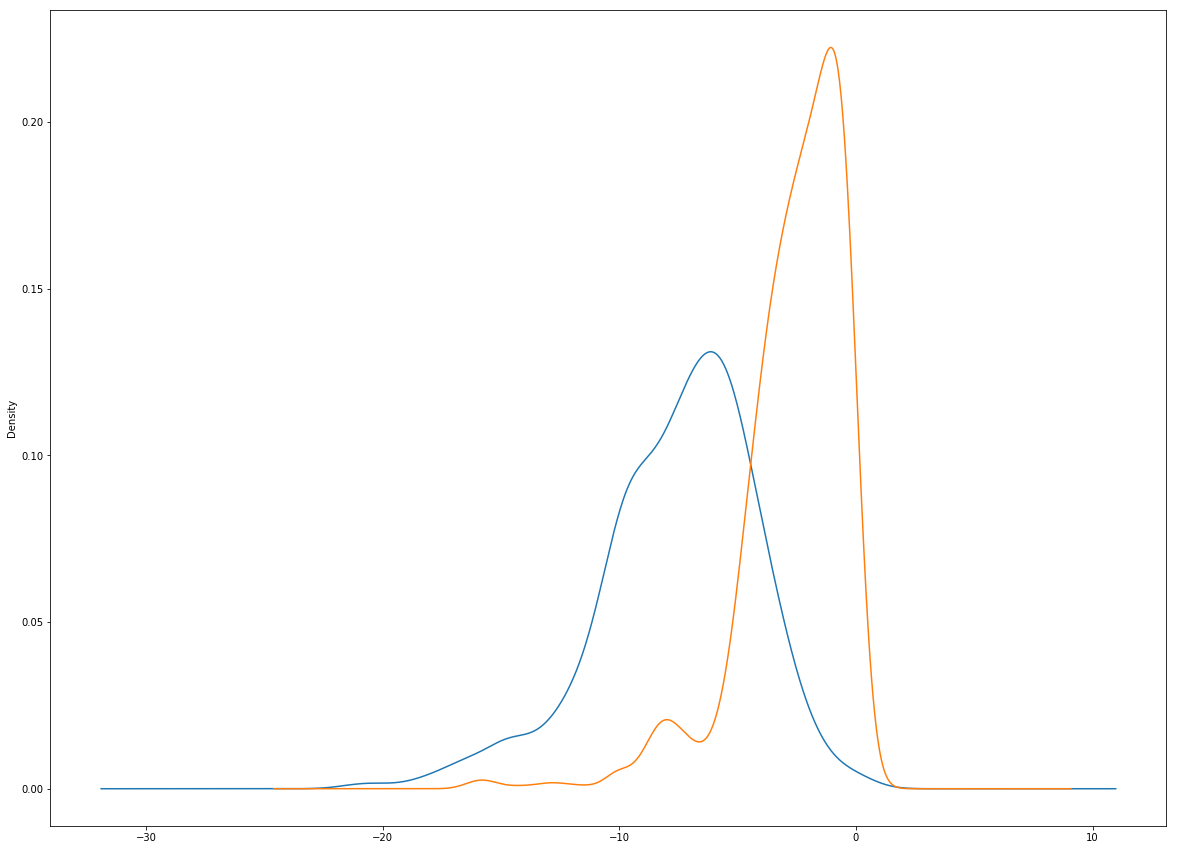

Lambda_p


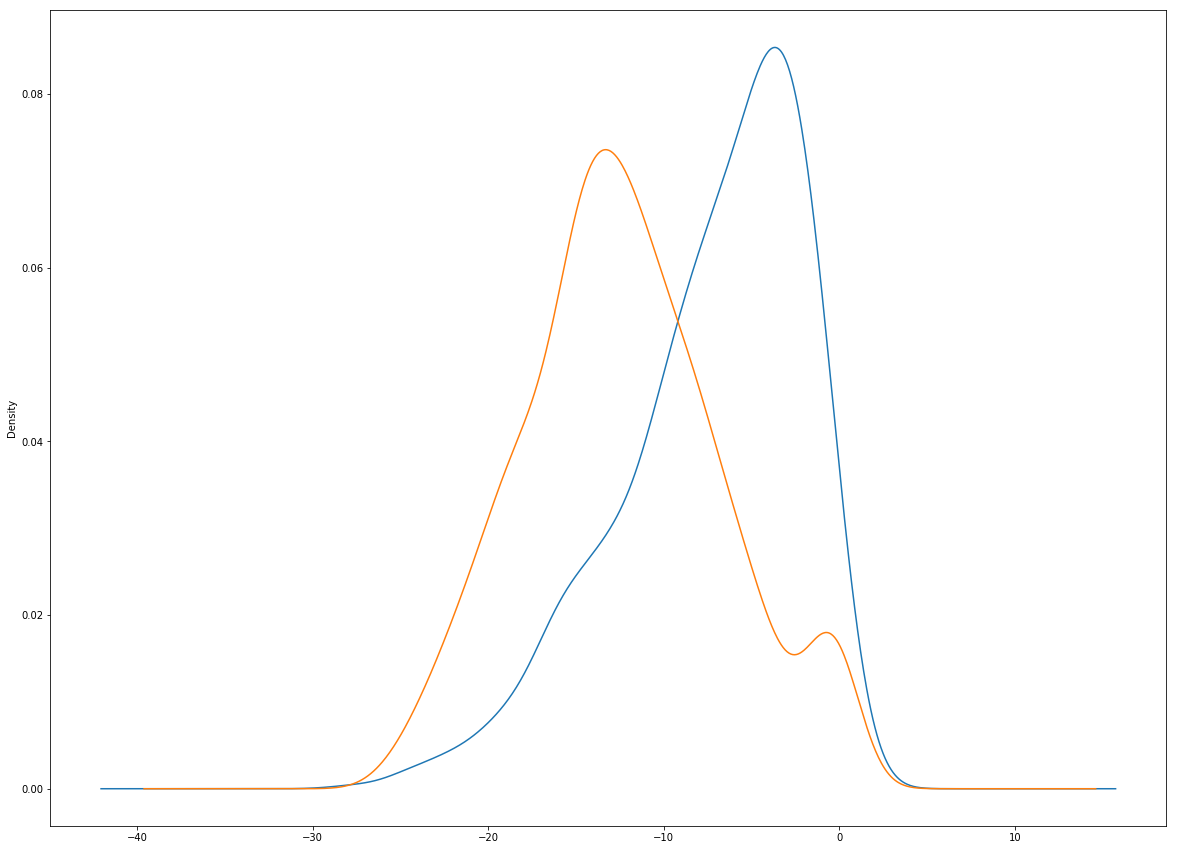

delta_n


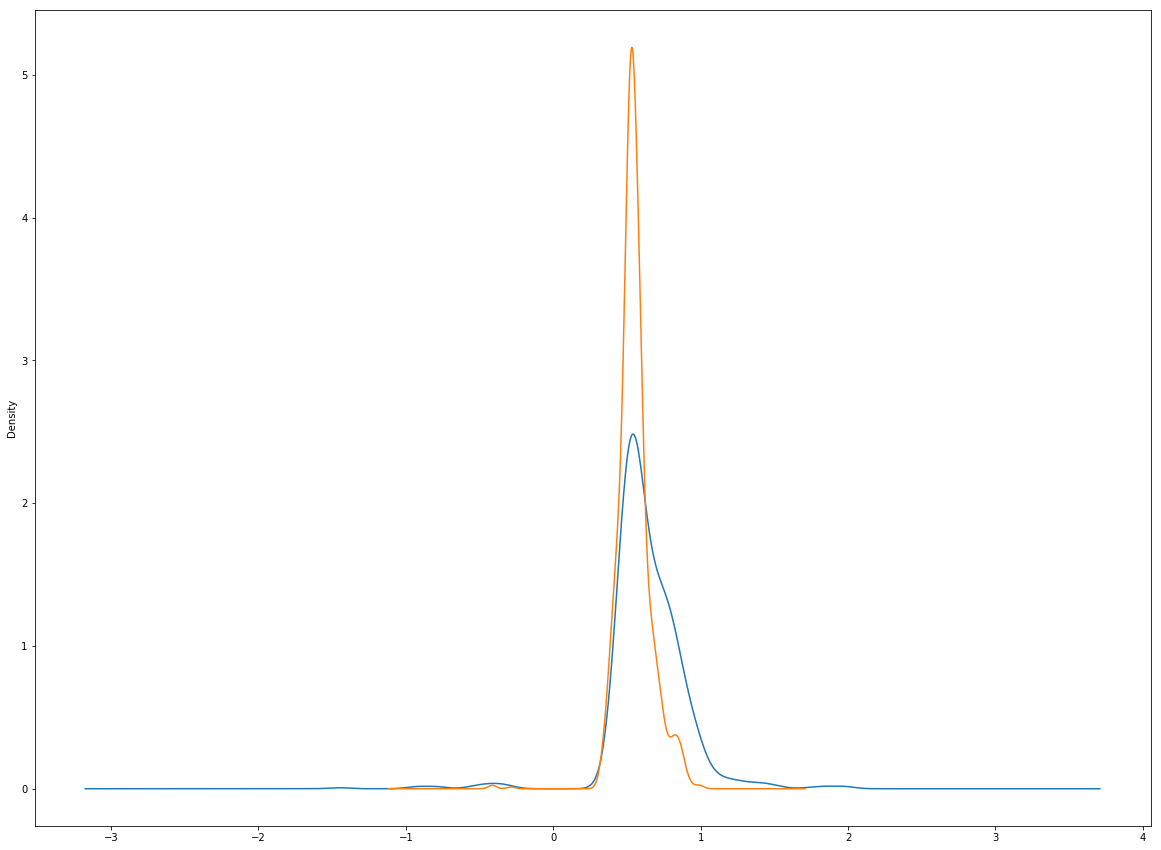

delta_p


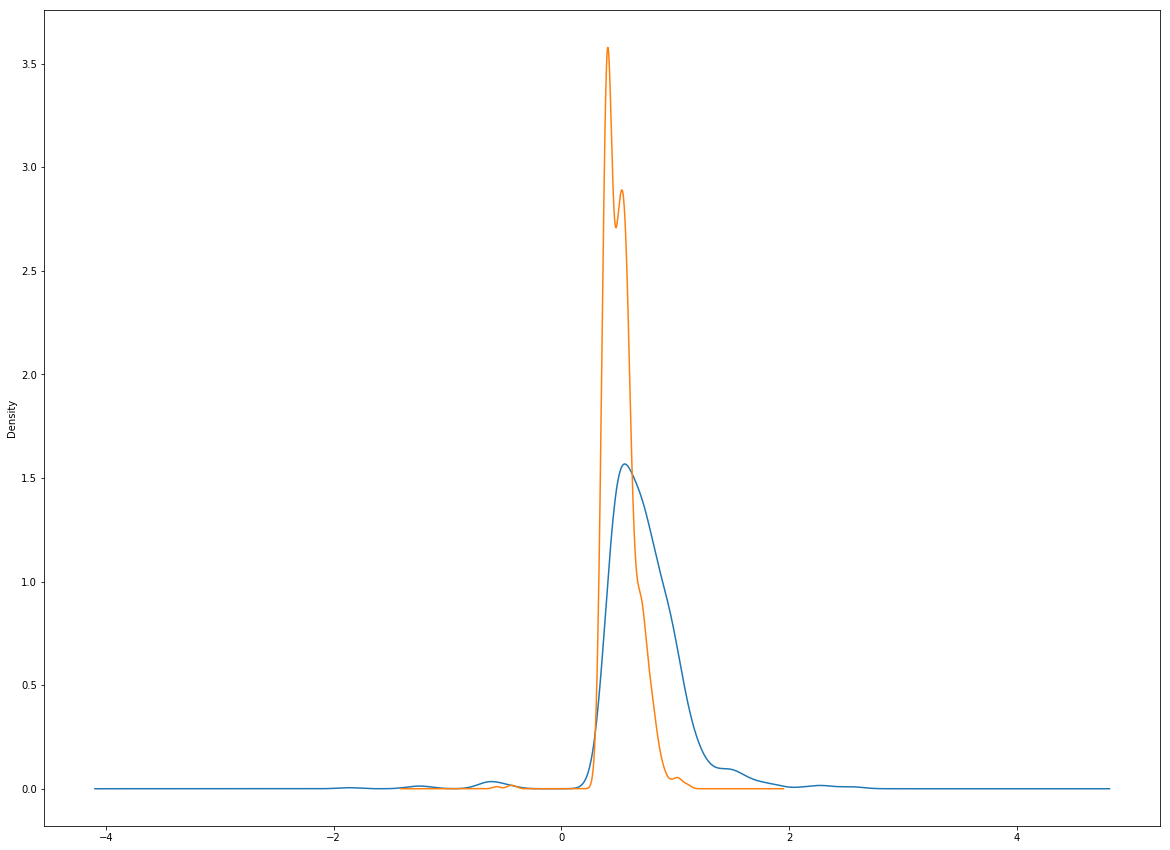

pwi


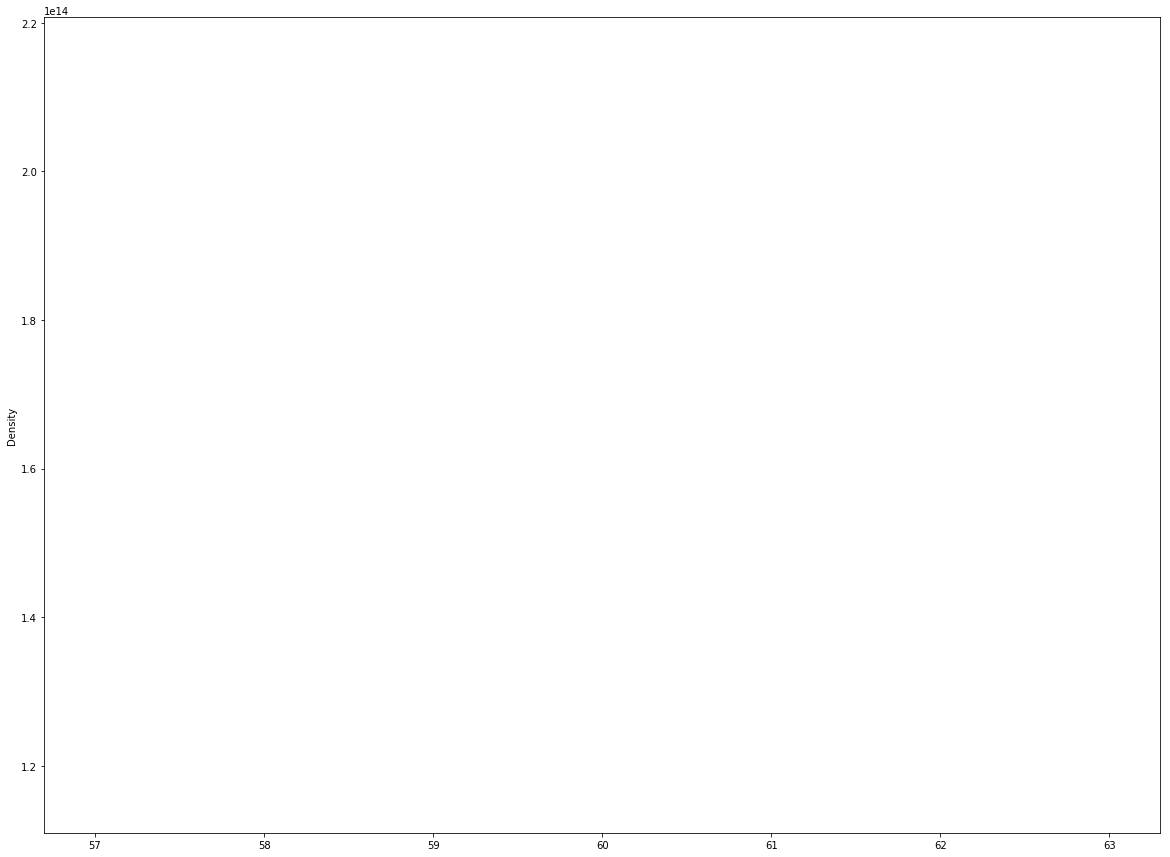

pairingE_n


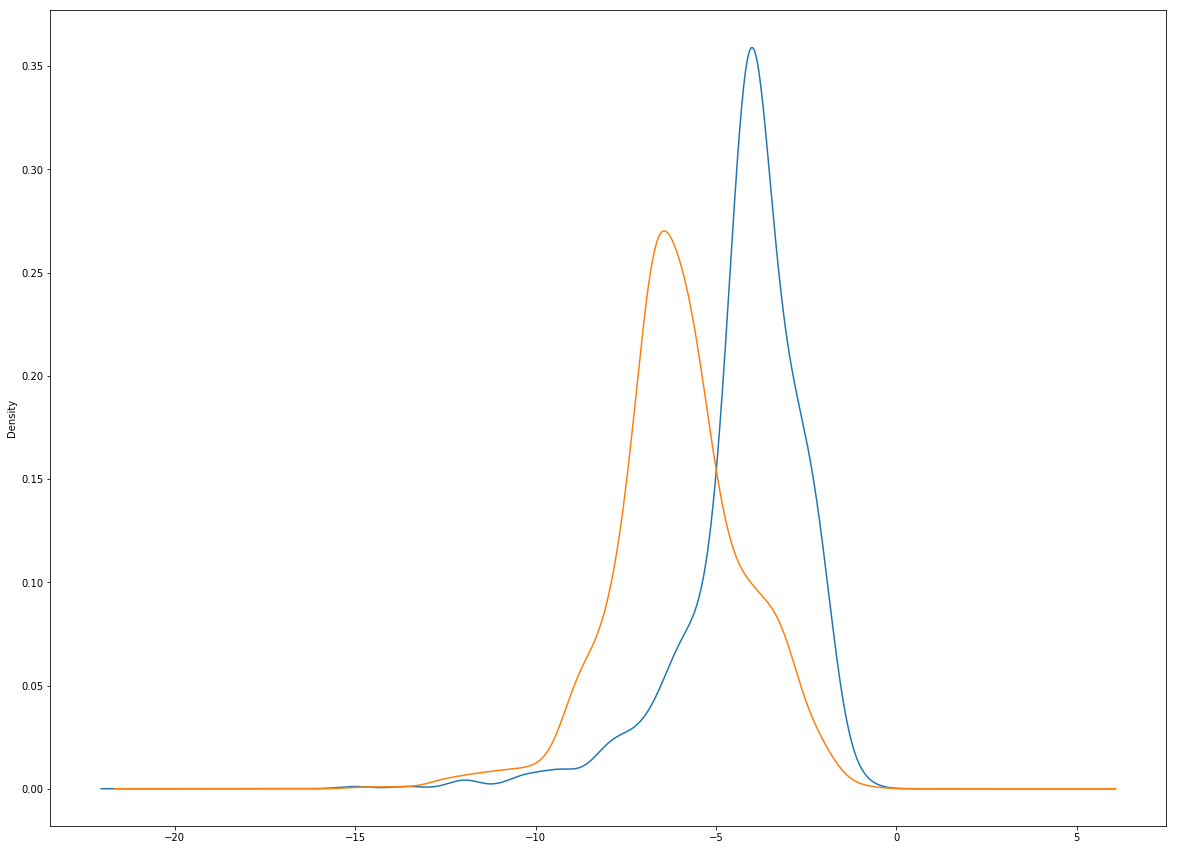

pairingE_p


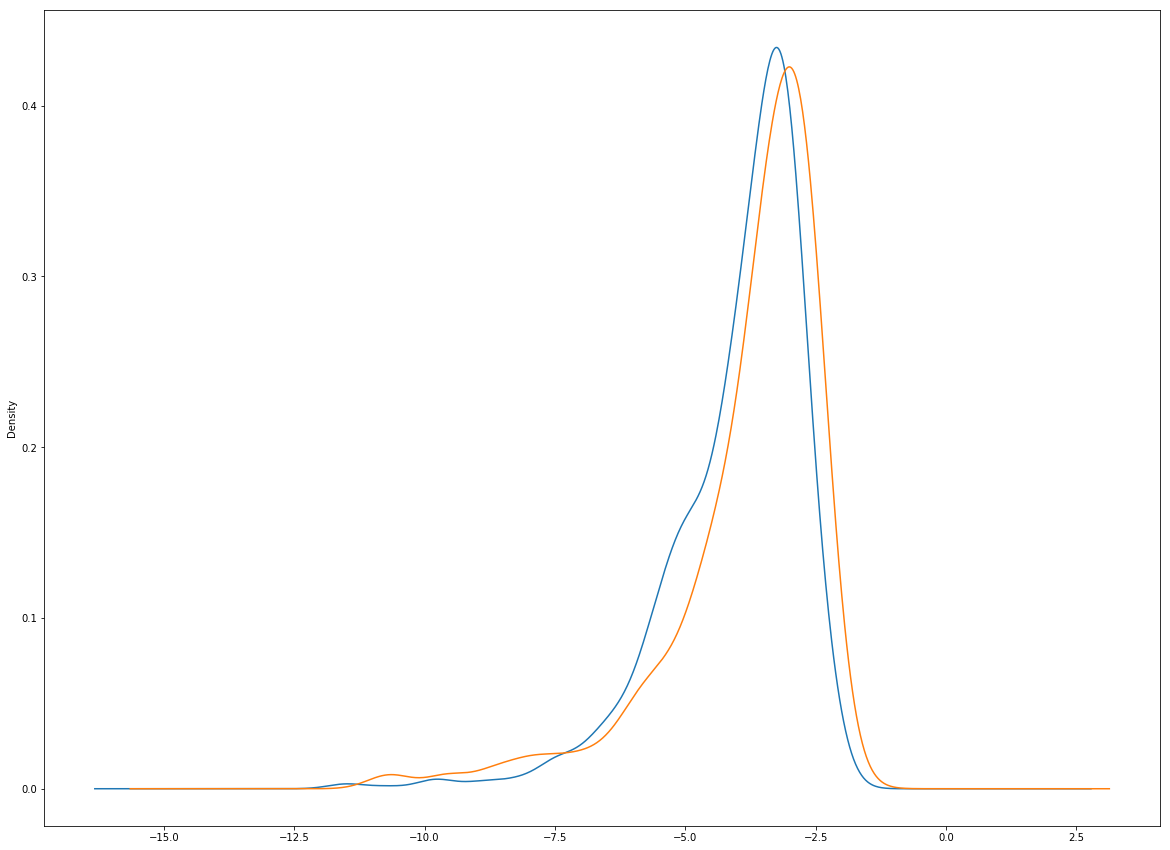

LNlambda_n


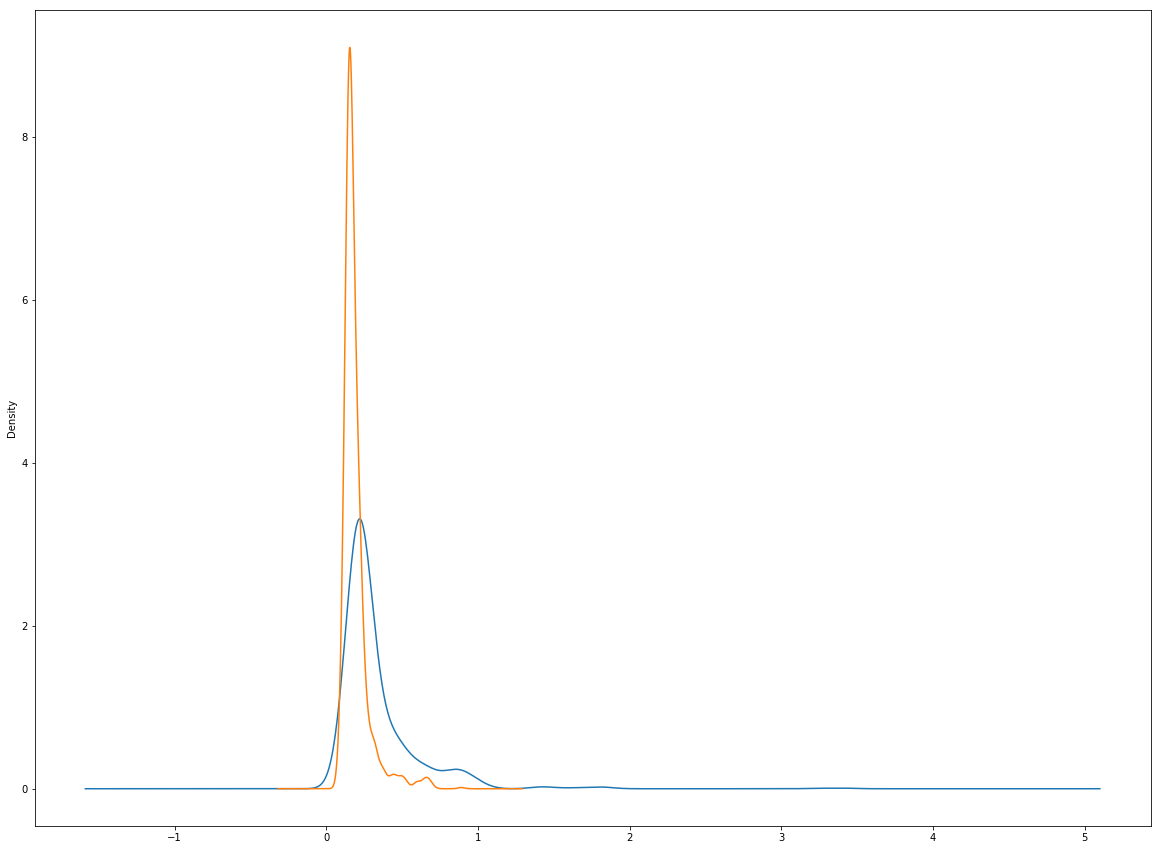

LNlambda_p


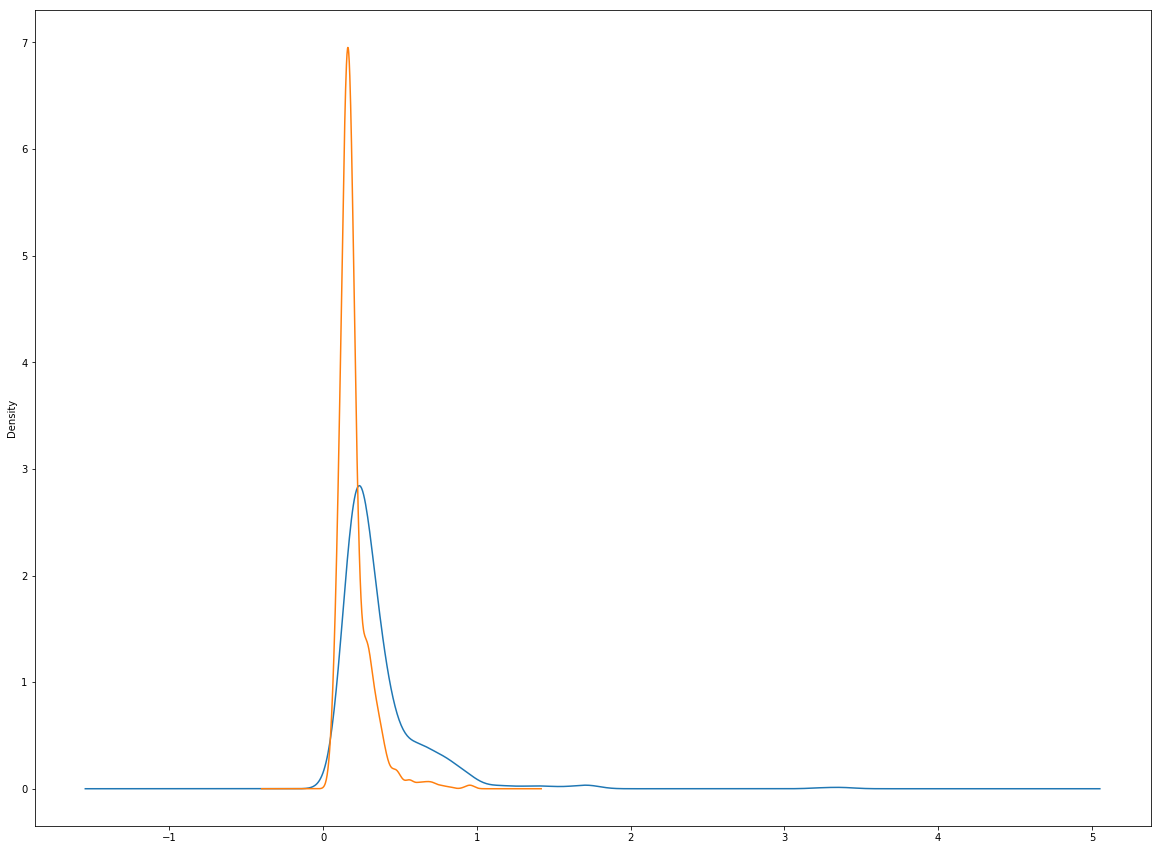

LNEnergy_n


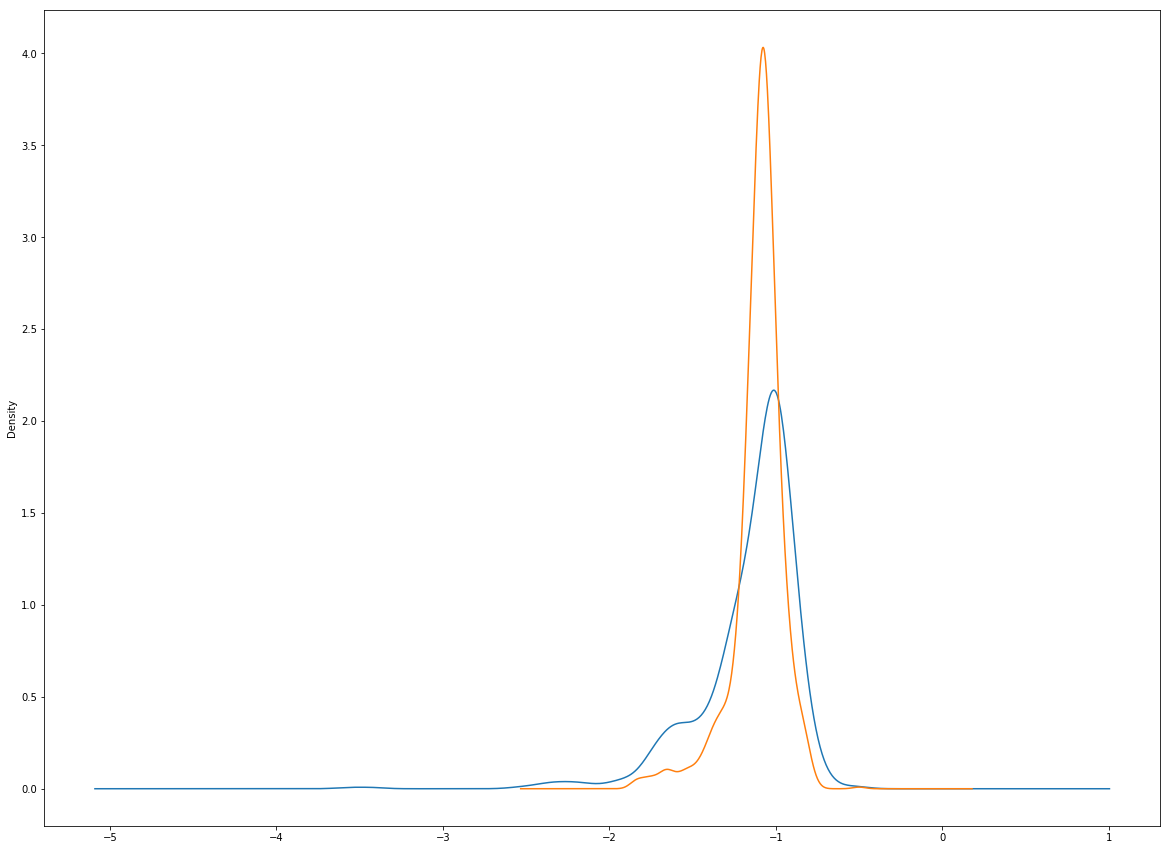

LNEnergy_p


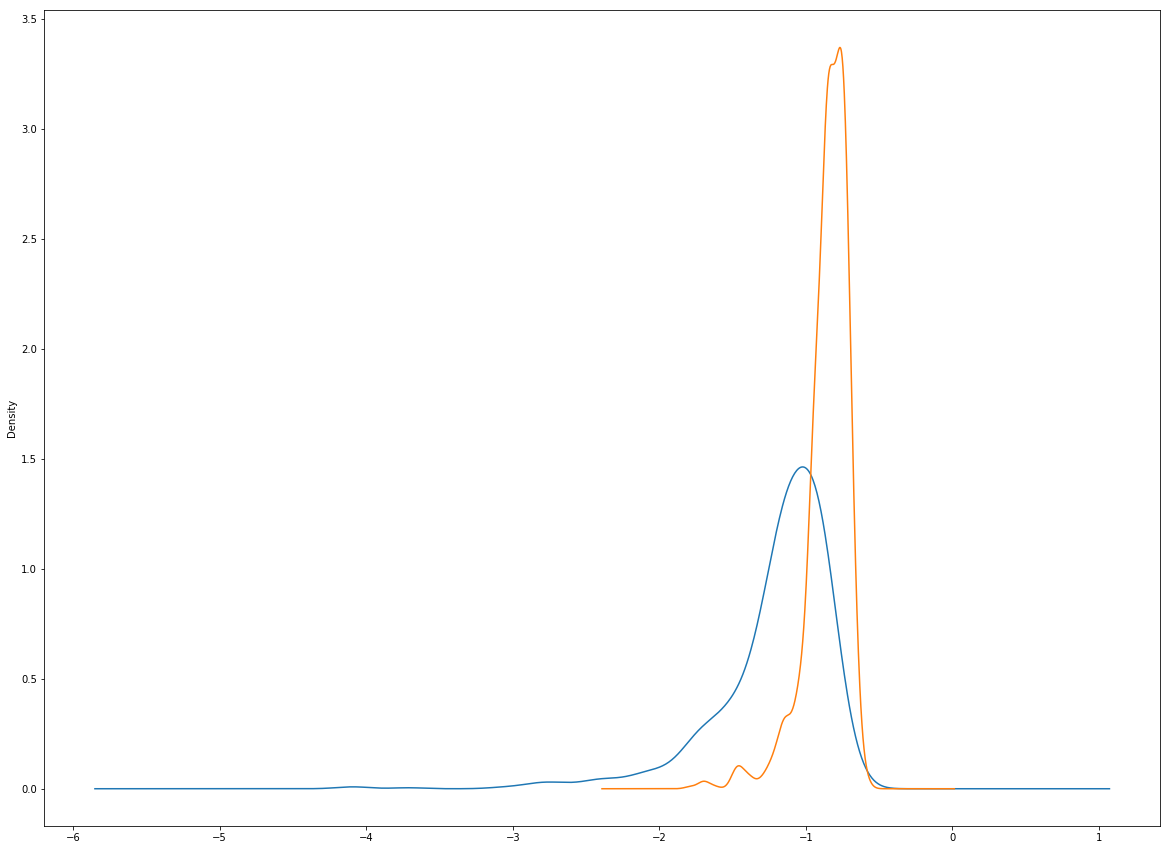

LNdelta_n


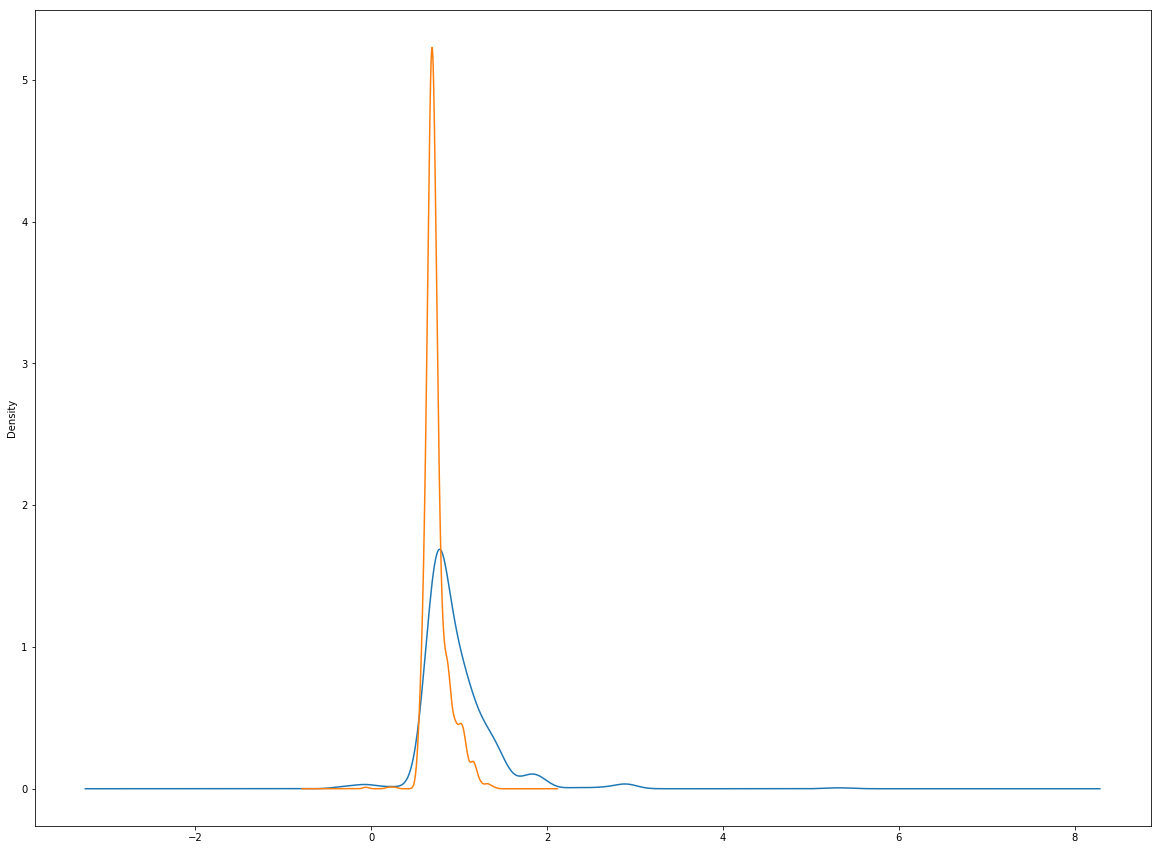

LNdelta_p


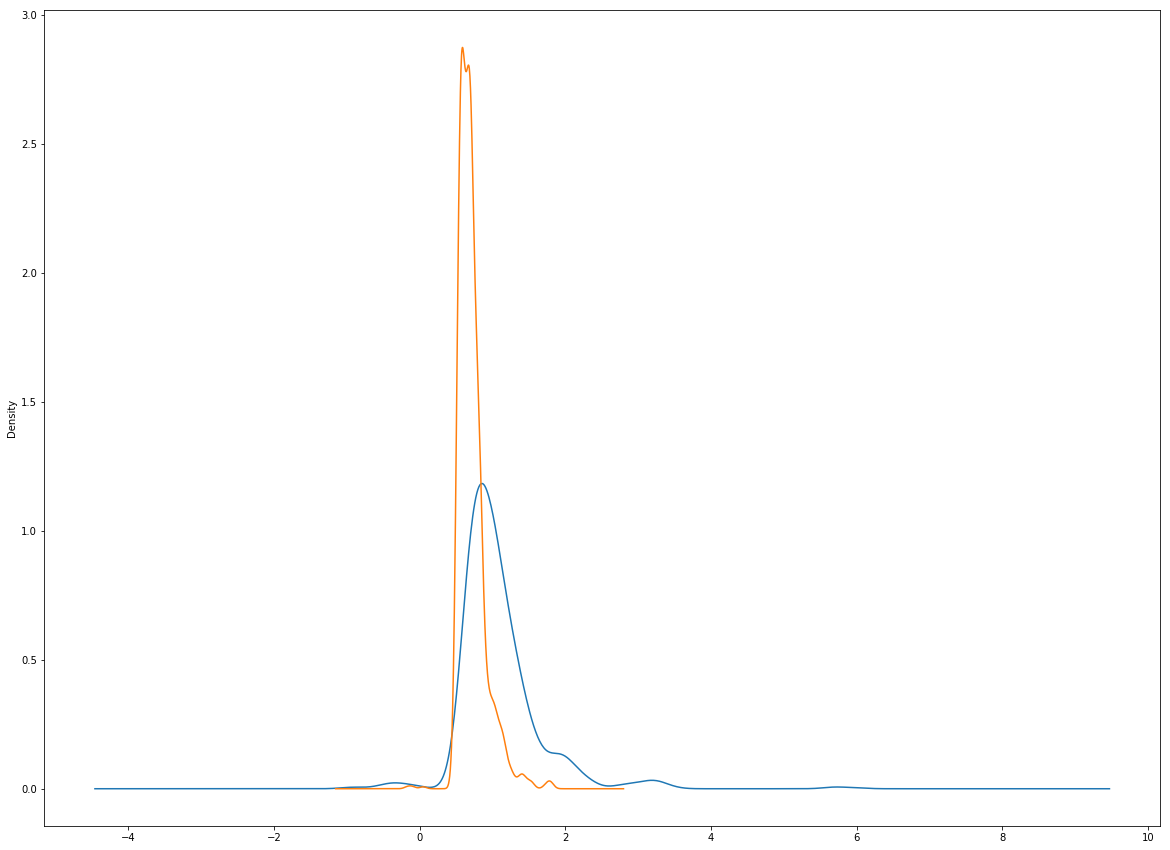

Geff_n


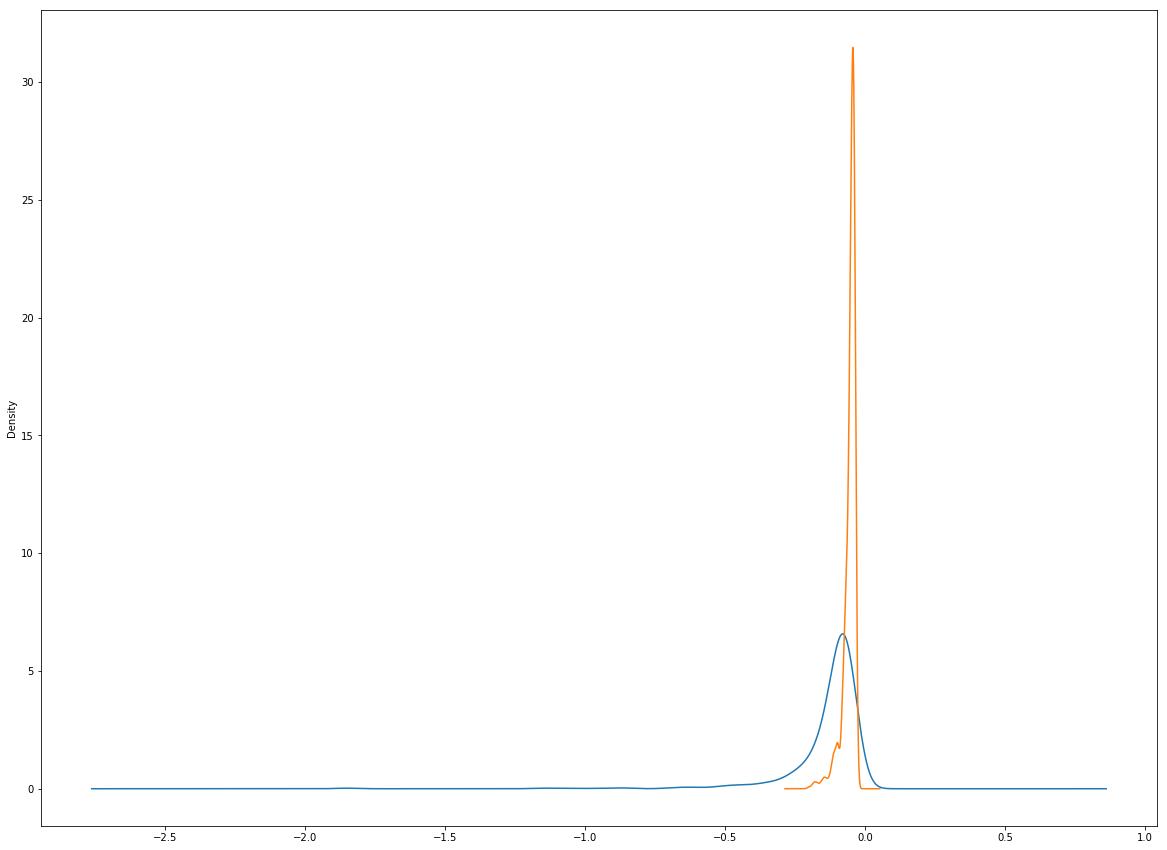

Geff_p


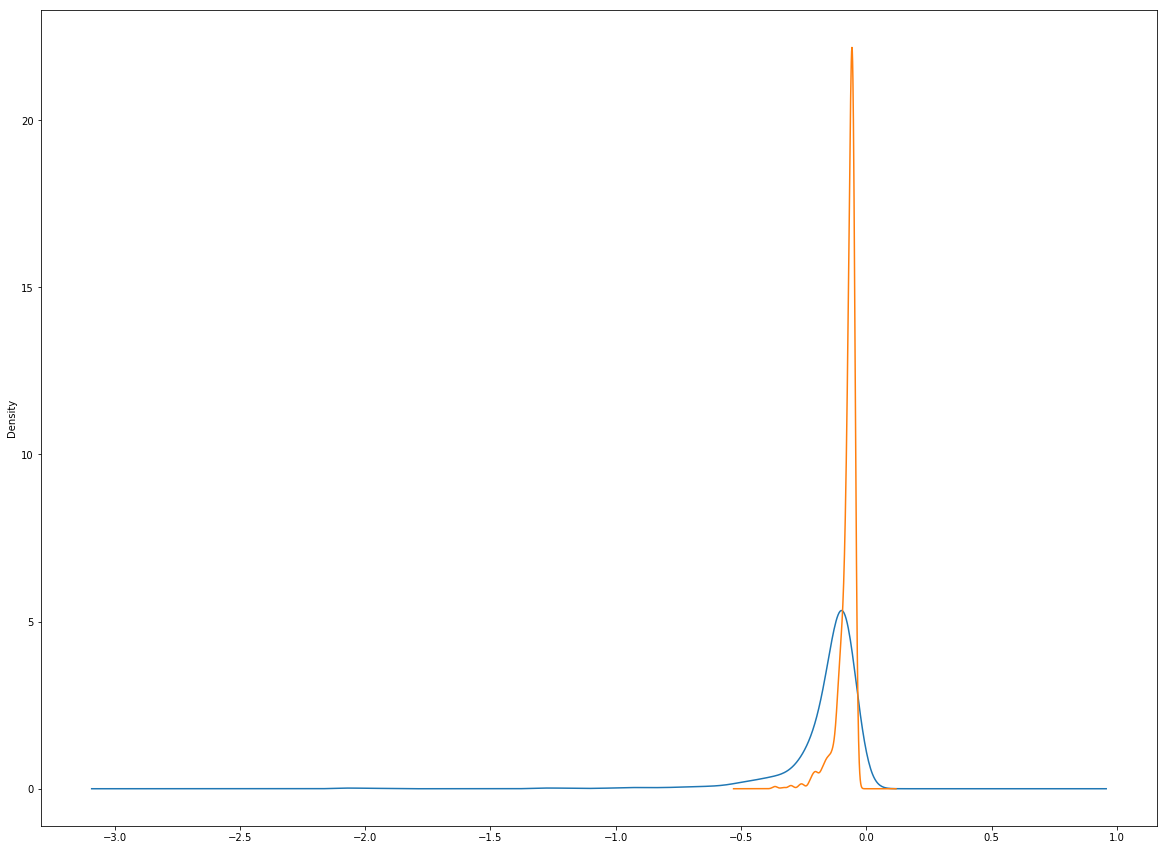

rms_r_n


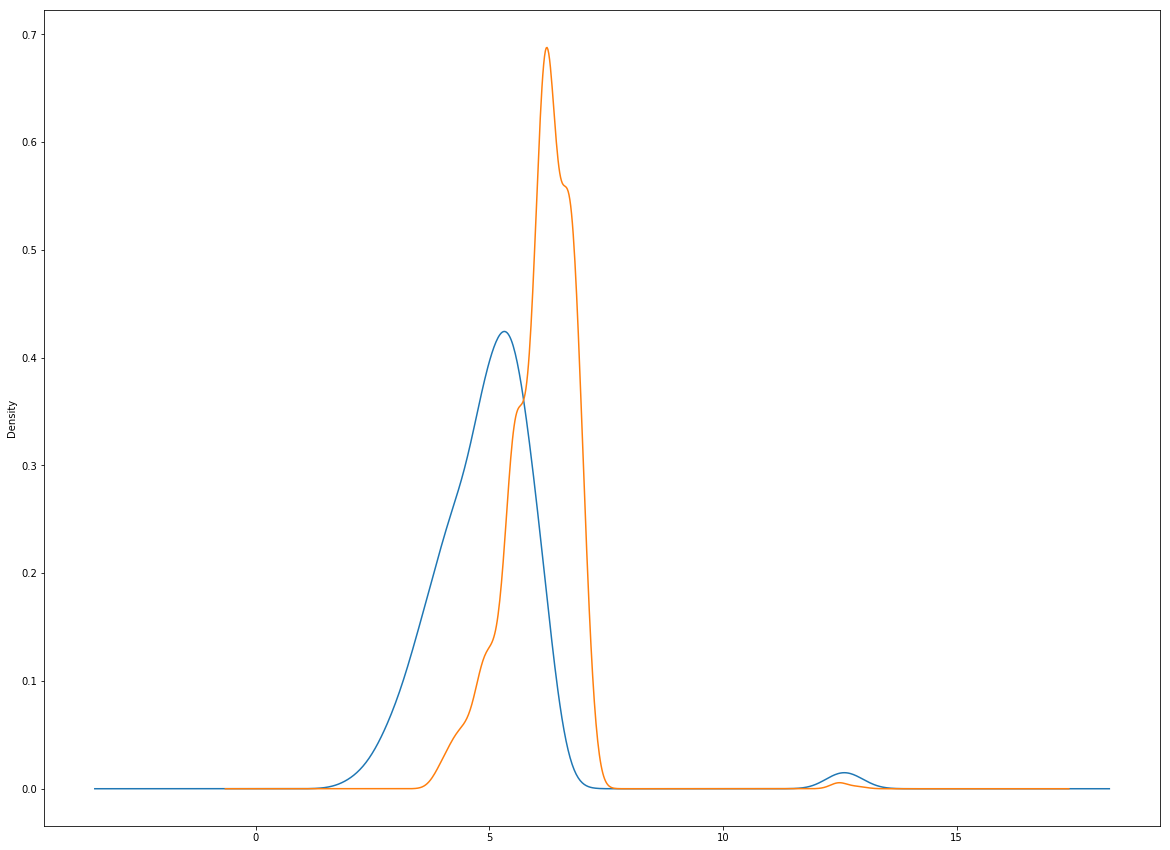

rms_r_p


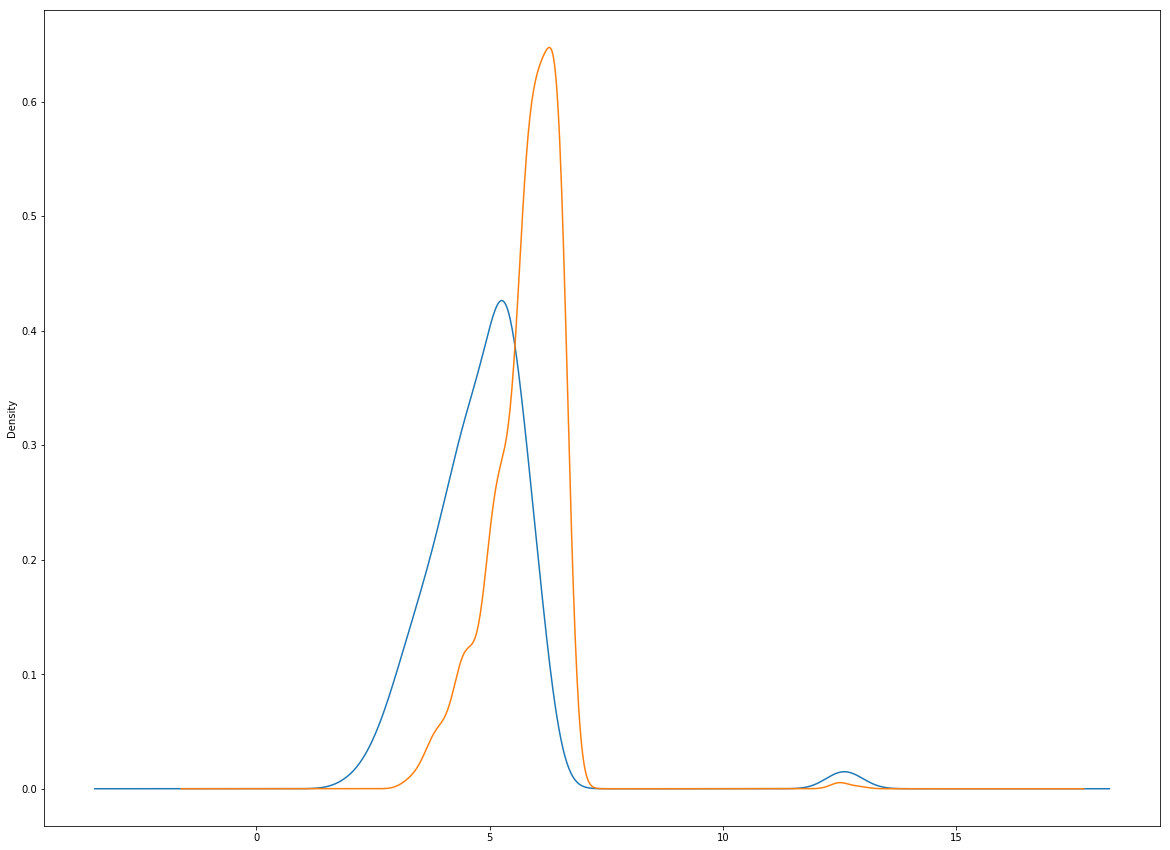

rms_r_t


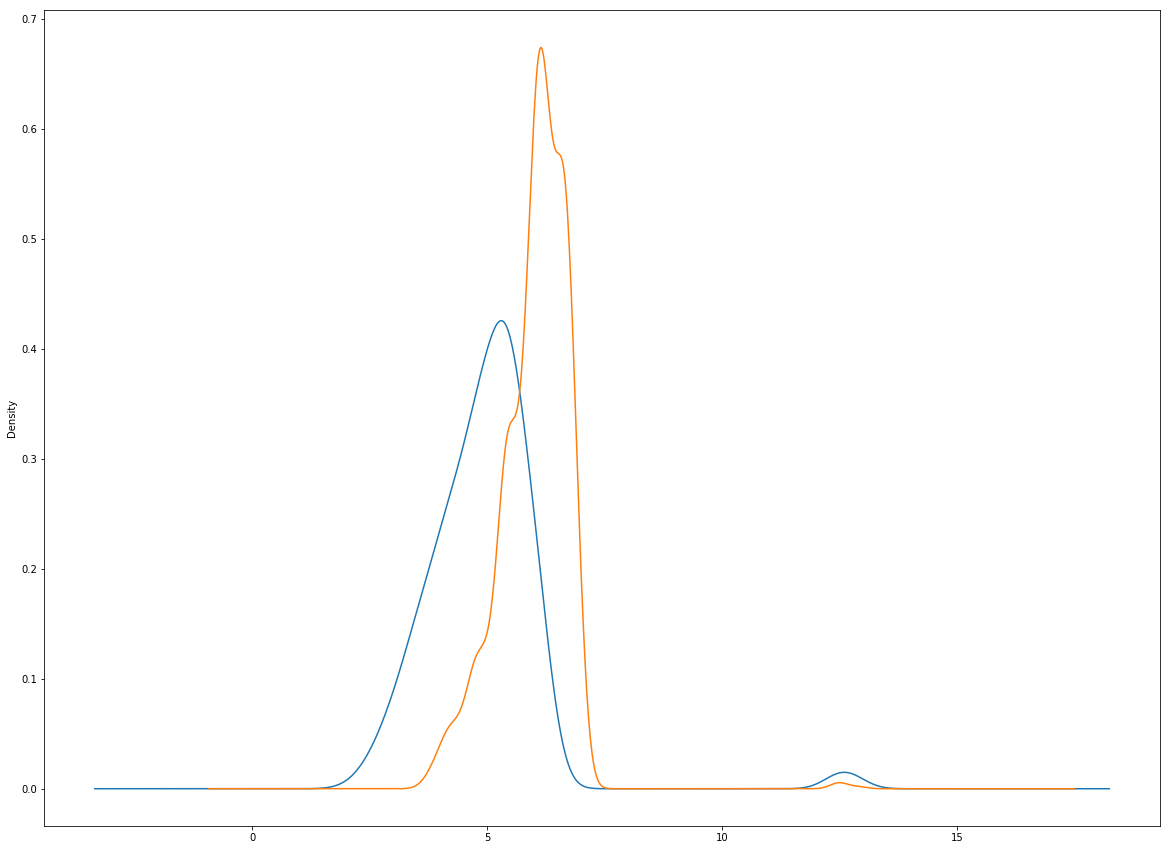

charge_r_p


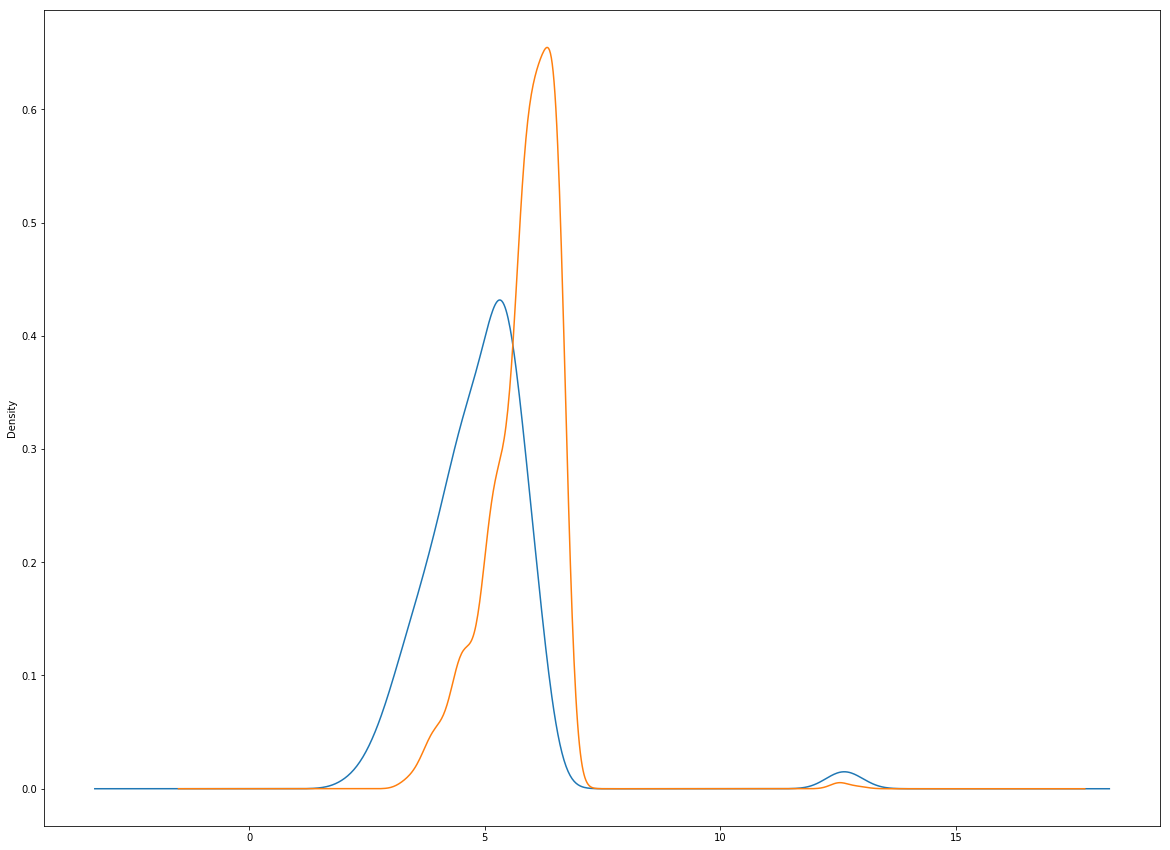

charge_r_t


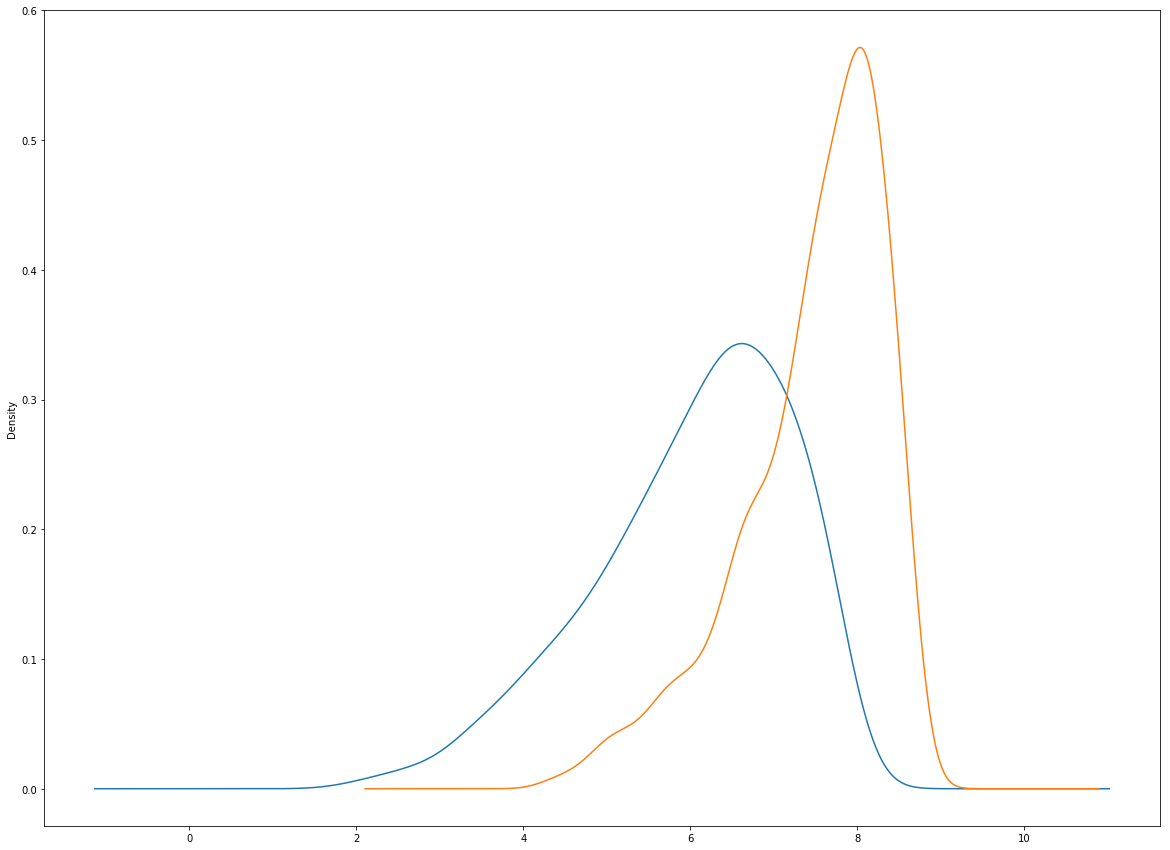

beta2_n


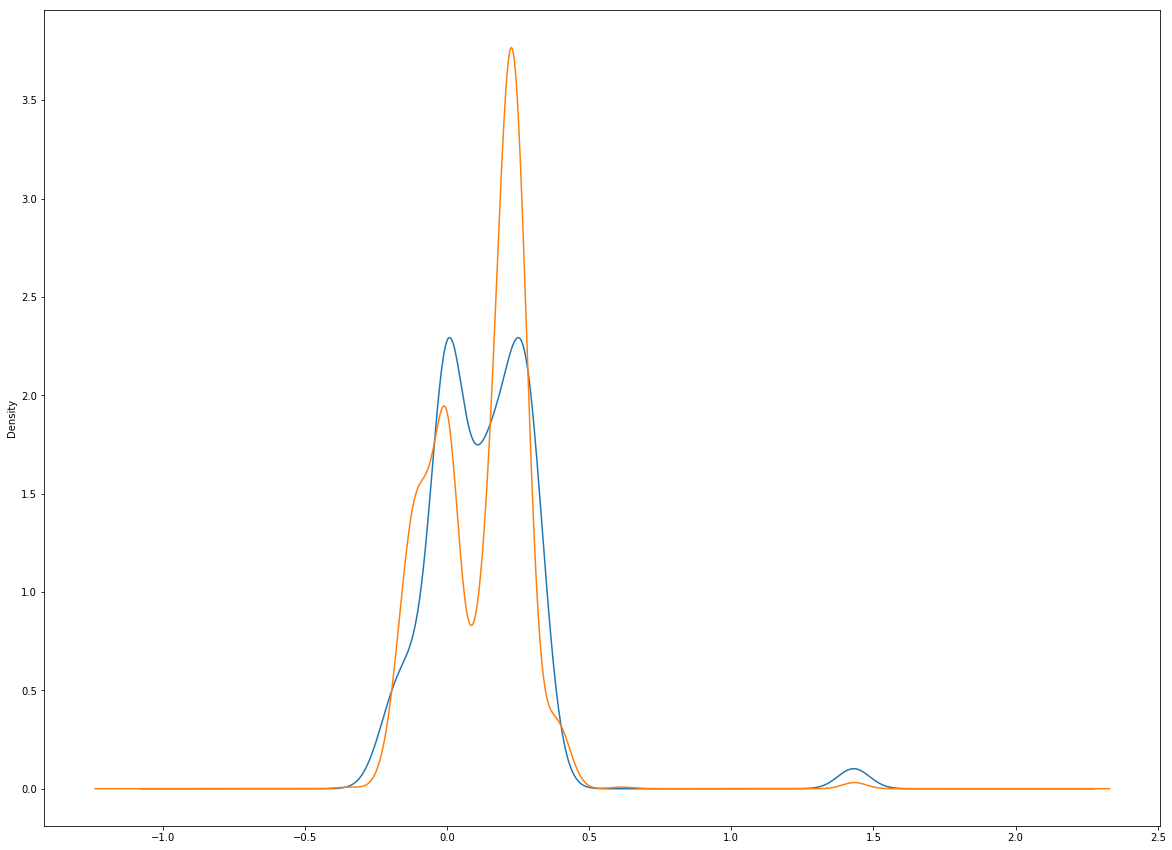

beta2_p


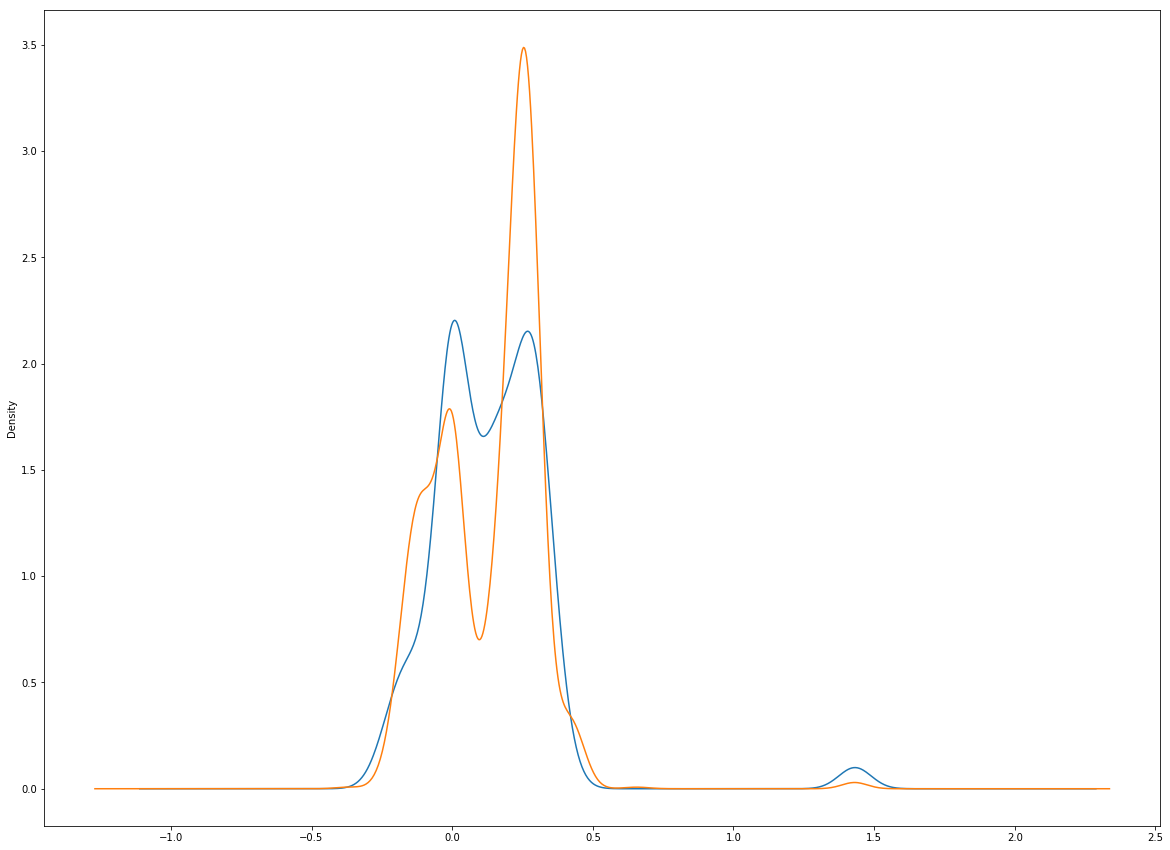

beta2_t


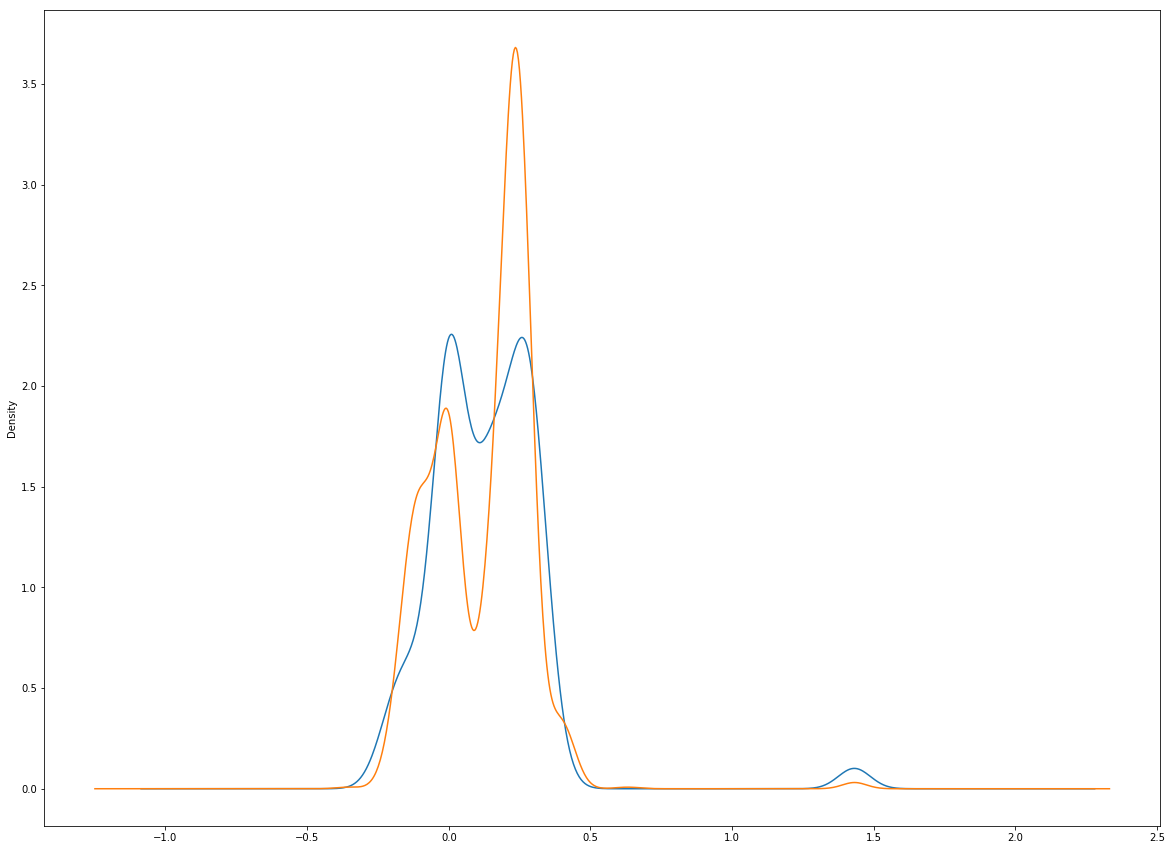

dipole_n


LinAlgError: singular matrix

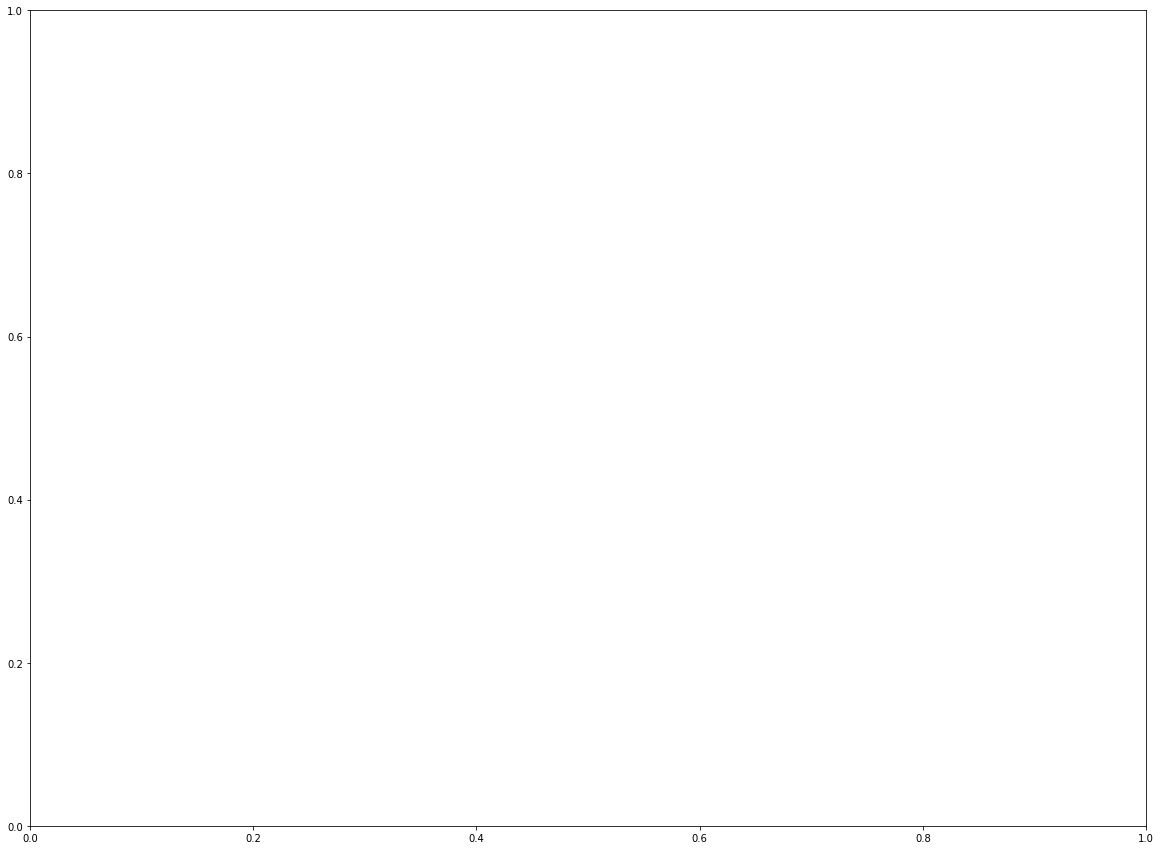

In [49]:
for j in df.columns:
    print(j)
    #match=match_df[j]
    #no_match=no_match_df[j]
    
    
    #plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
    #     color = colors, label=names)


    
    
    
    #plt.hist(match_df[j], color = 'blue', edgecolor = 'black',
    #     bins = 100, normed=True)
    #plt.hist(no_match_df[j], color = 'red', edgecolor = 'black',
    #     bins = 100, normed=True)
    
    match_df[j].plot.kde()
    no_match_df[j].plot.kde()
    
    
    #plt.kde([match_df[j], no_match_df[j]], bins = 100, normed=True, color = colors, label=names)
    
    plt.show()


Z
(13,)
(14,)
(13,)
(15,)
(16,)
(15,)
0.9400793650793652
0.9690179806362378


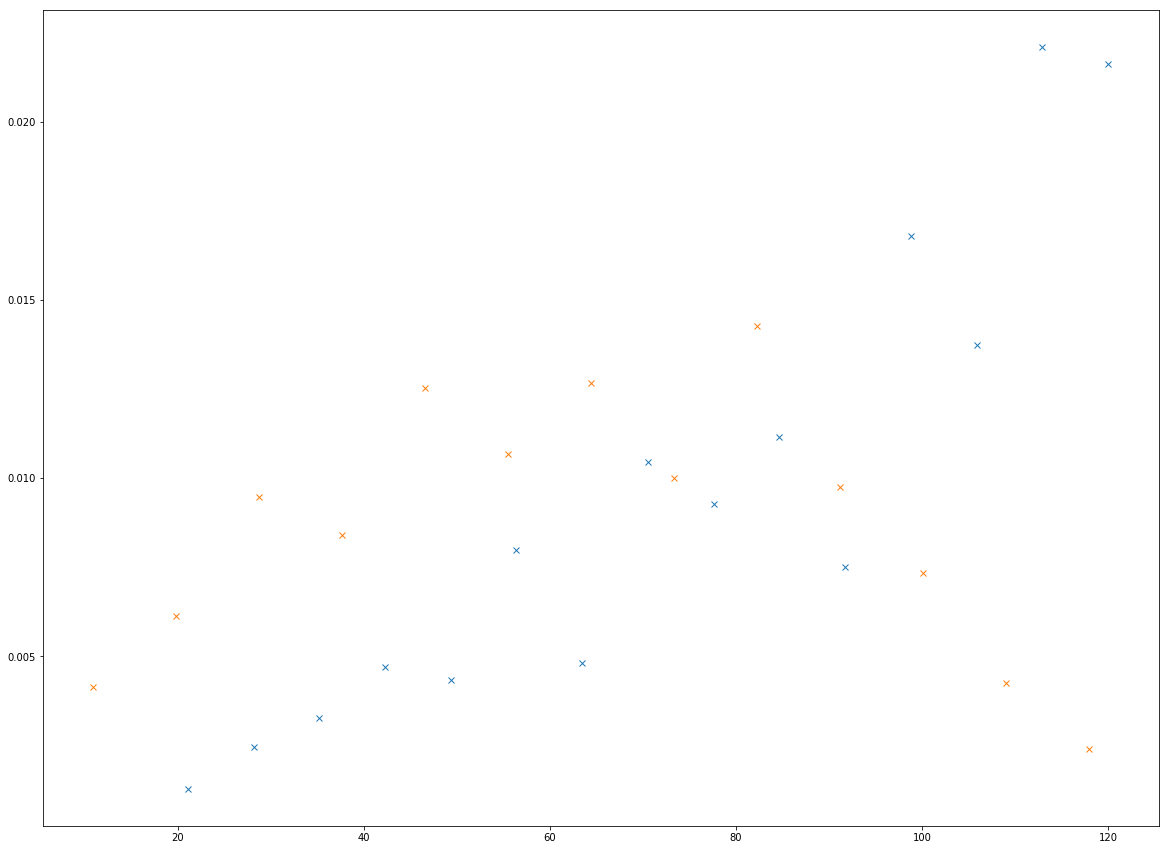

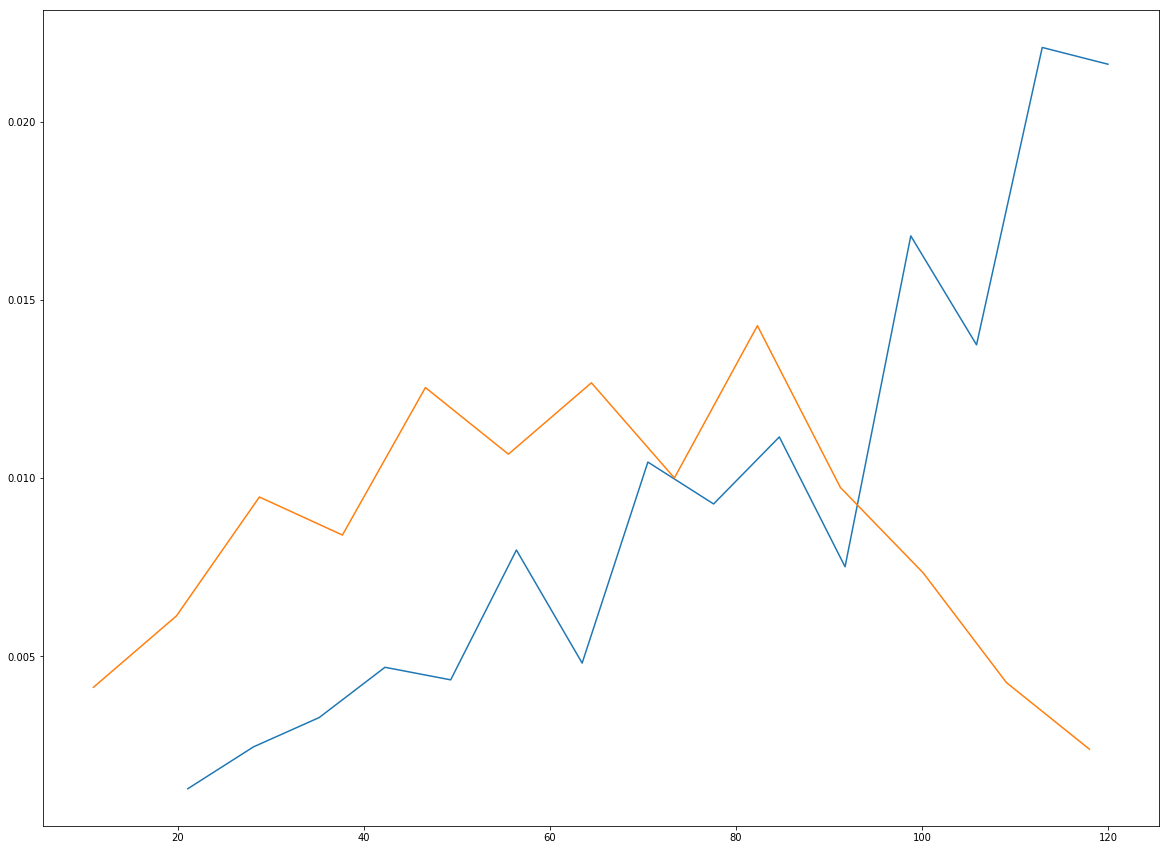




N
(13,)
(14,)
(13,)
(17,)
(18,)
(17,)
0.9734126984126983
0.9773167358229597


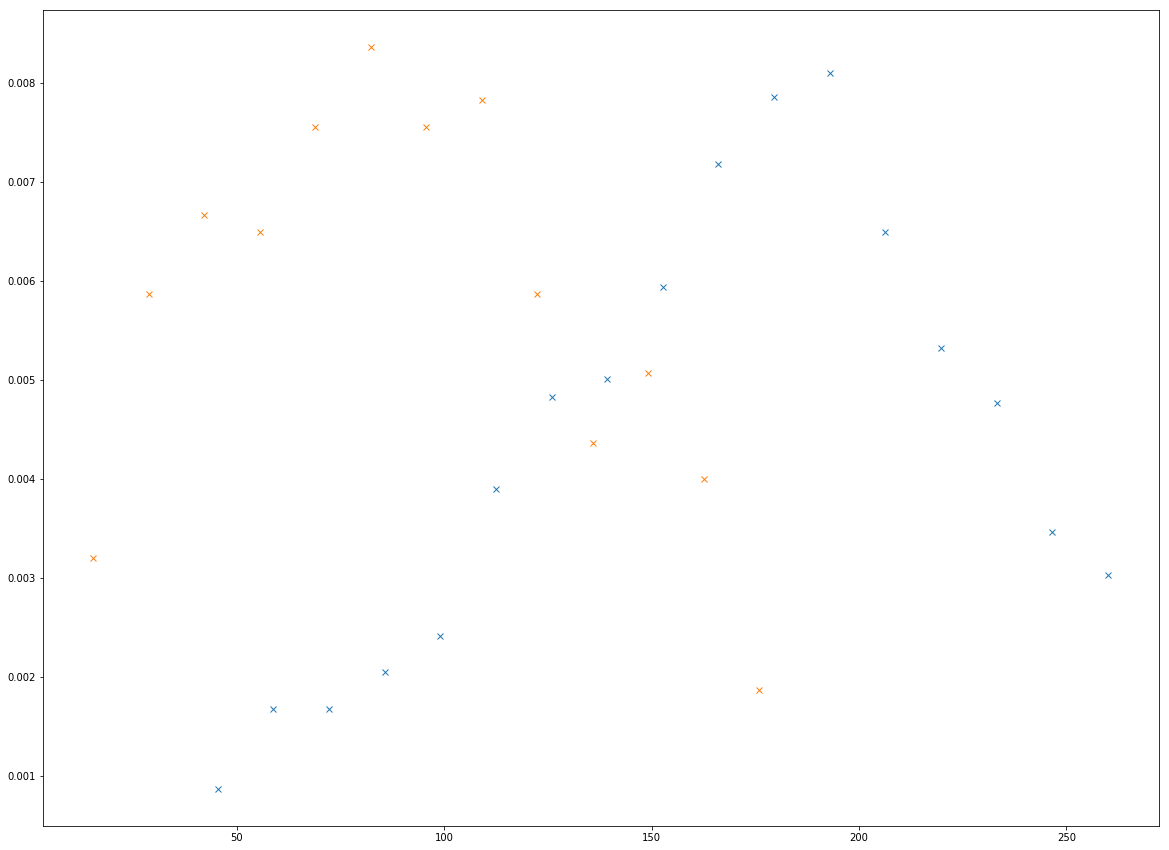

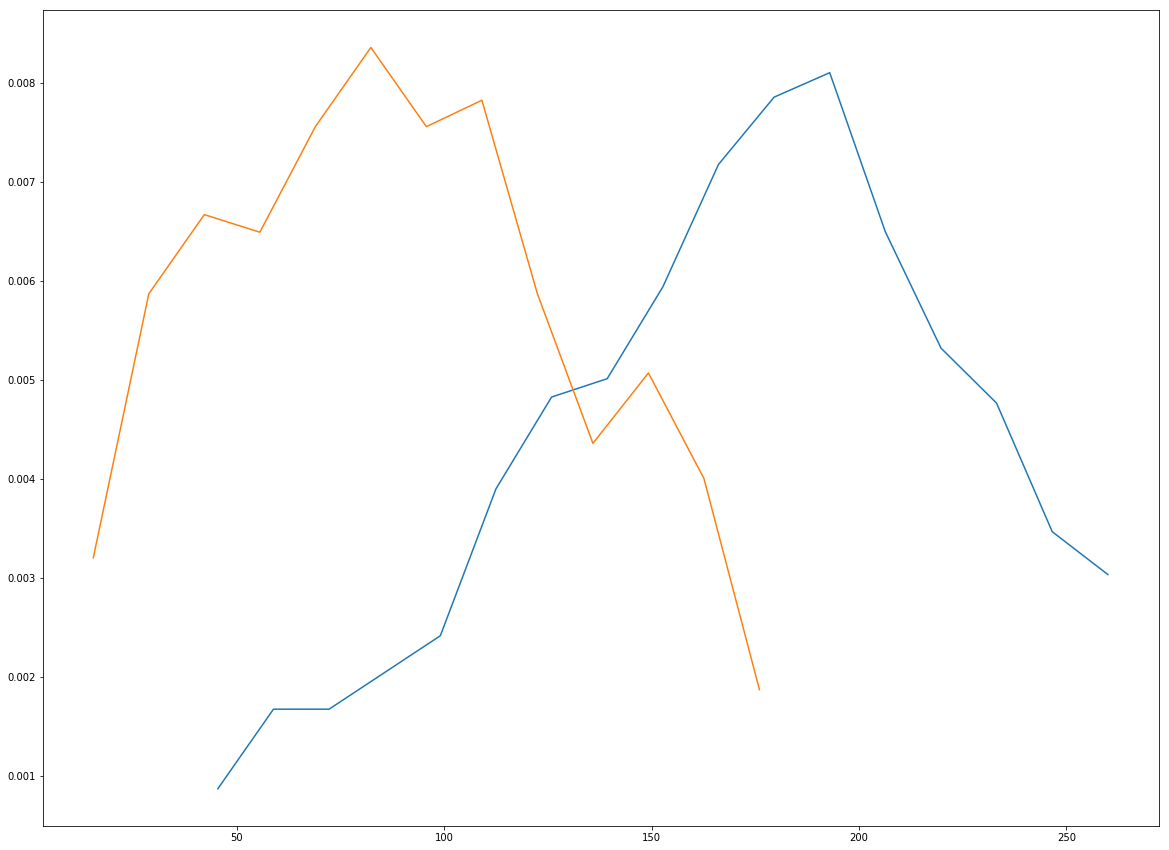




Energy
(13,)
(14,)
(13,)
(18,)
(19,)
(18,)
0.9615079365079365
0.9651452282157675


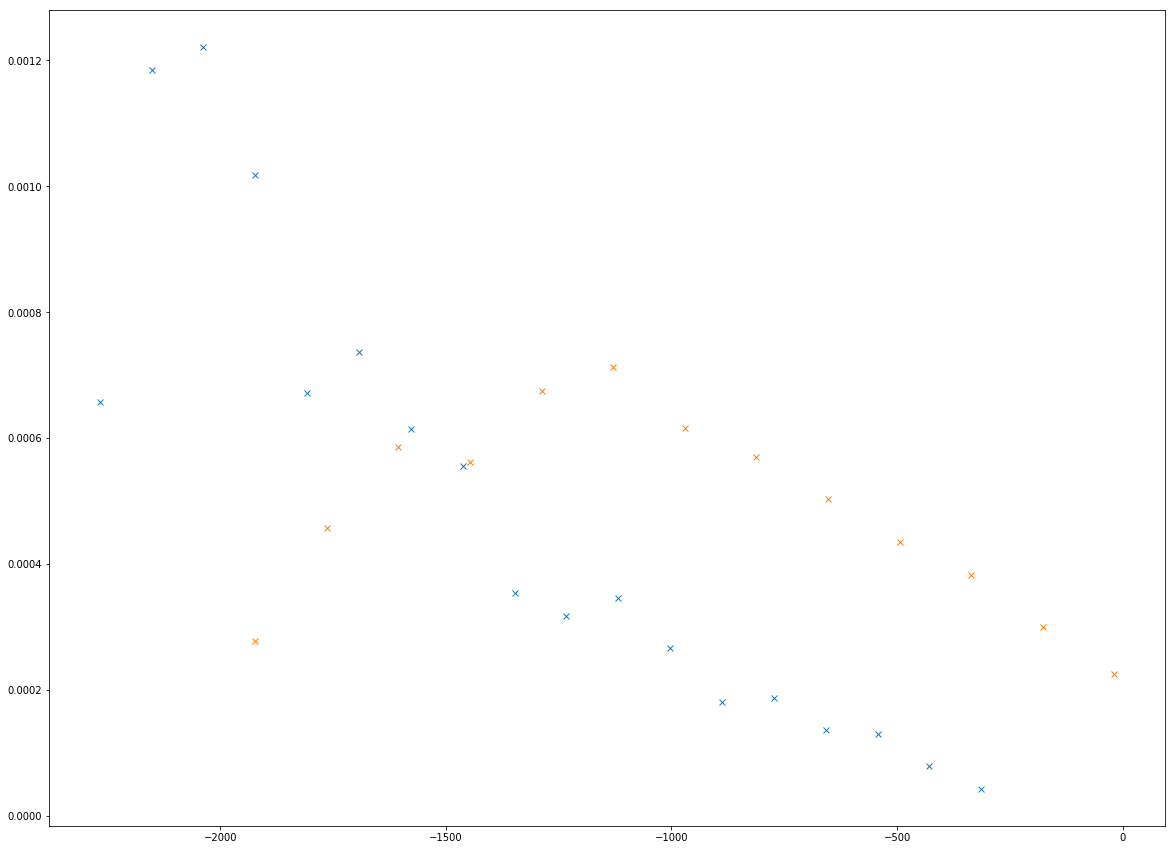

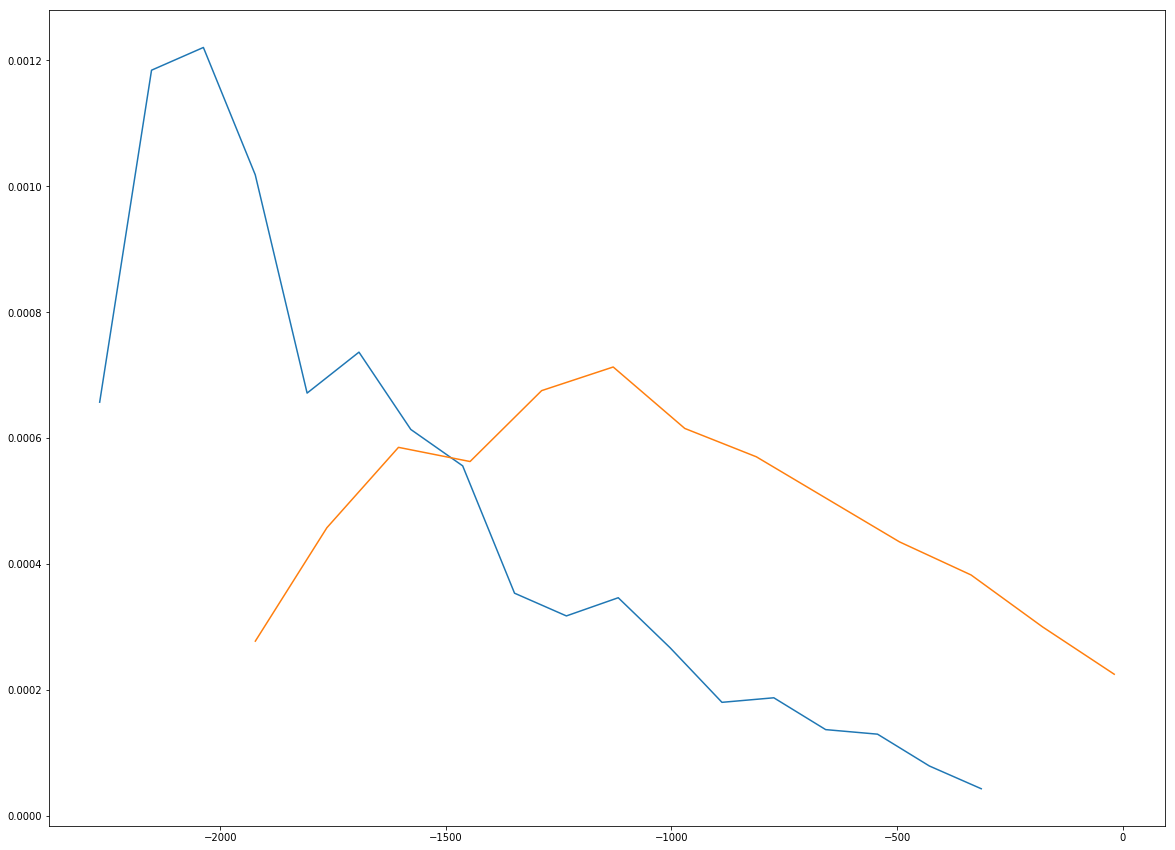




NShells
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


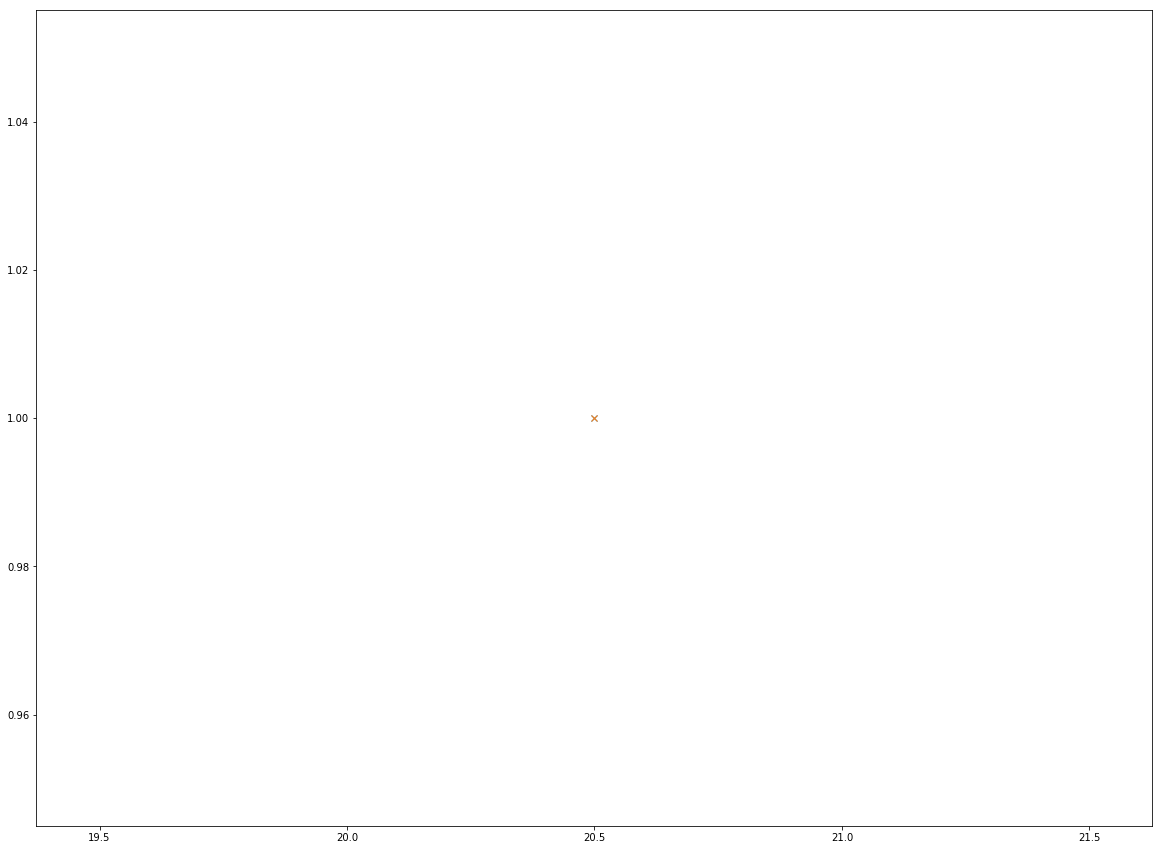

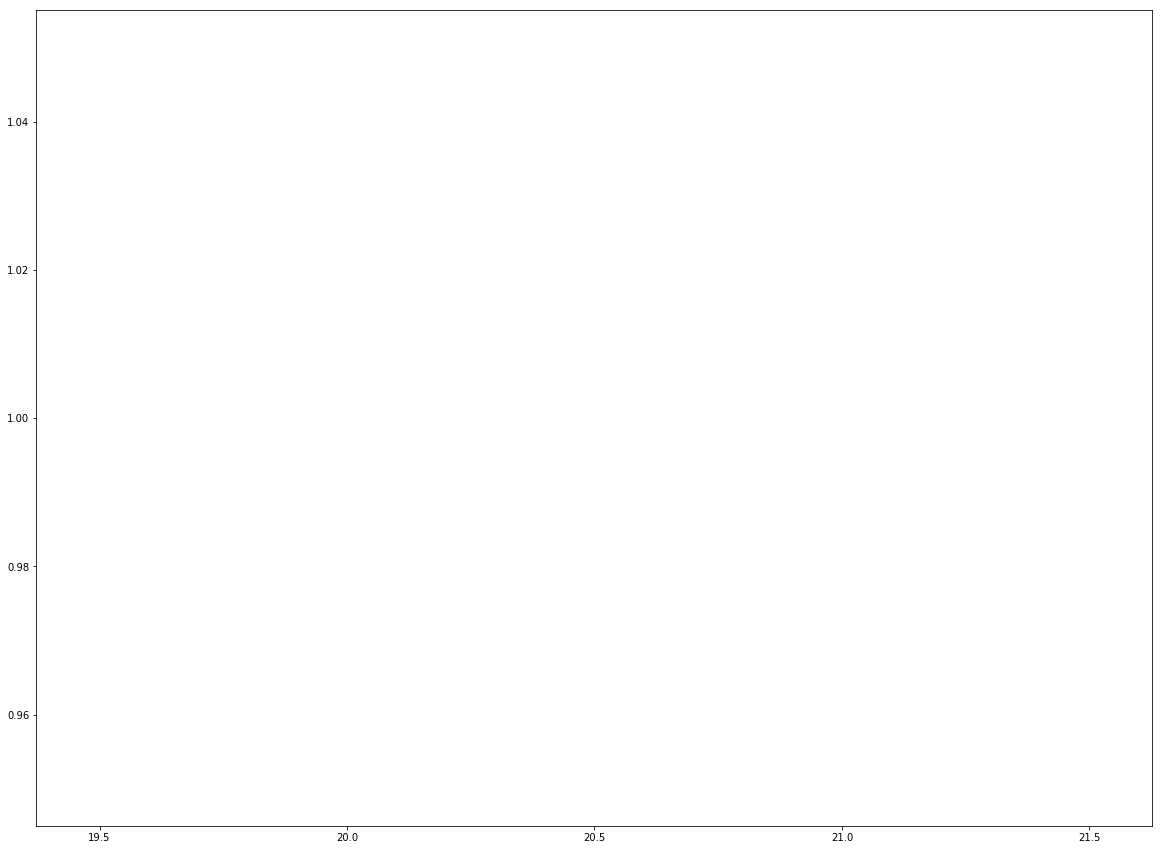




b0
(21,)
(22,)
(21,)
(24,)
(25,)
(24,)
0.969047619047619
0.969225449515906


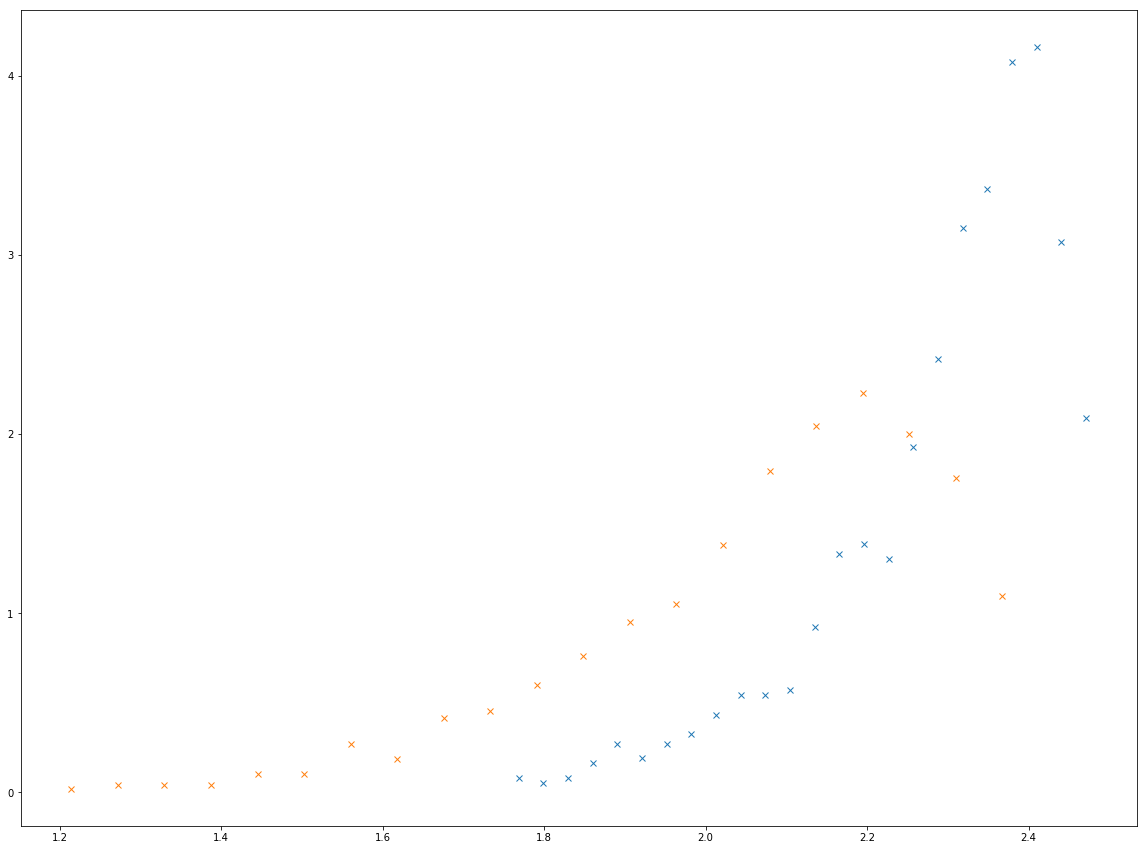

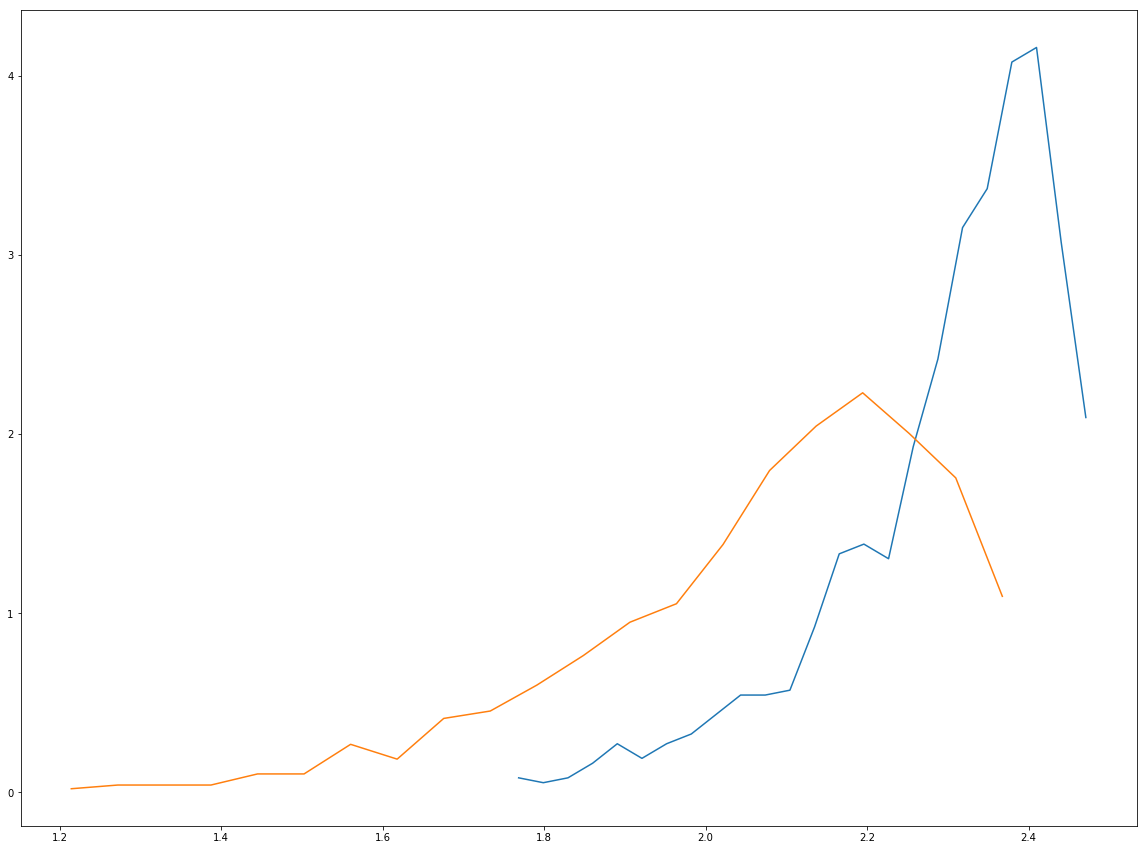




bz
(17,)
(18,)
(17,)
(33,)
(34,)
(33,)
0.8686507936507935
0.9468879668049786


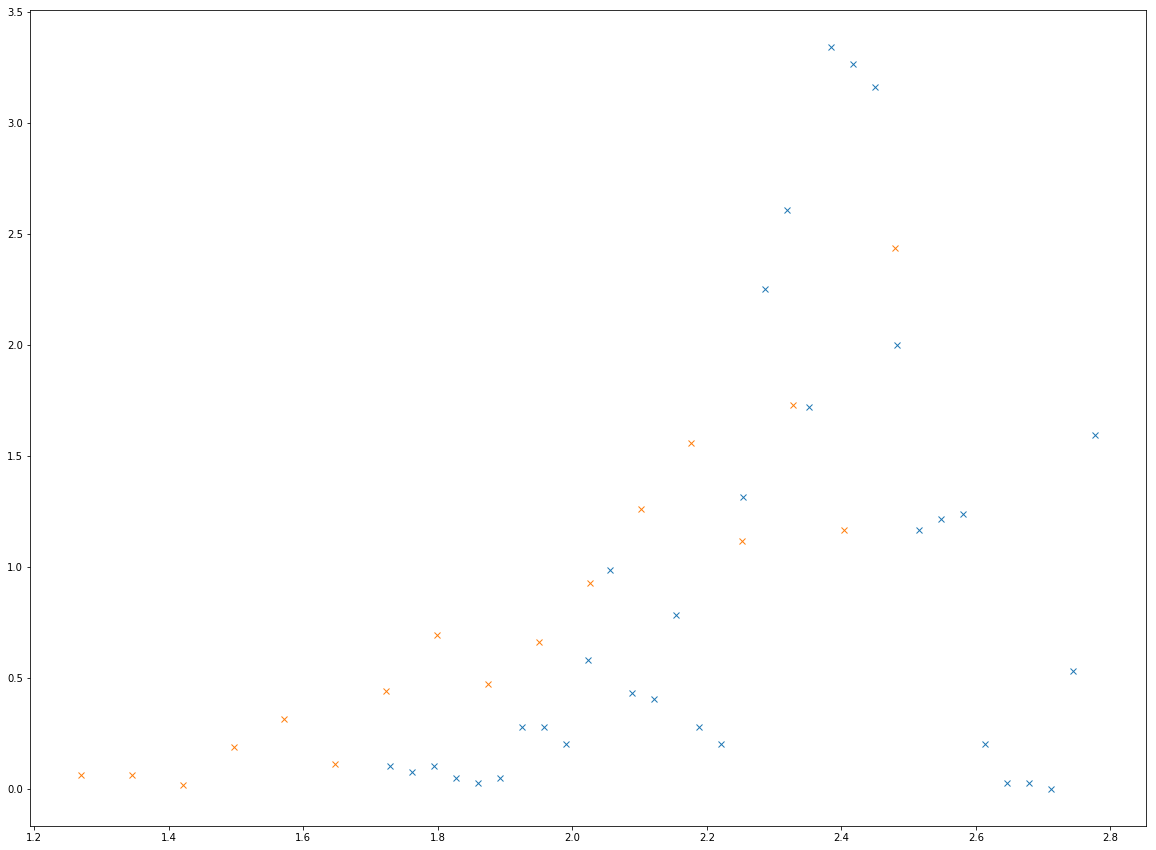

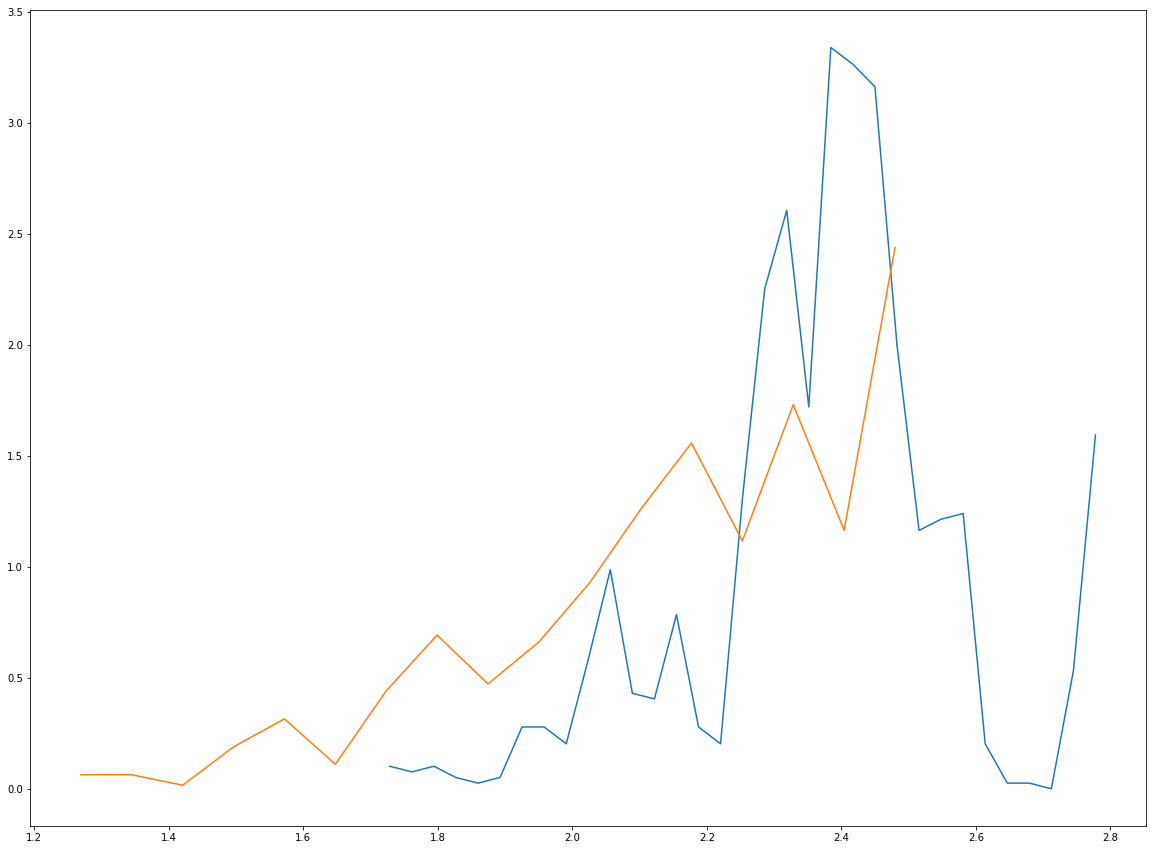




bp
(20,)
(21,)
(20,)
(25,)
(26,)
(25,)
0.9994047619047617
0.9668049792531134


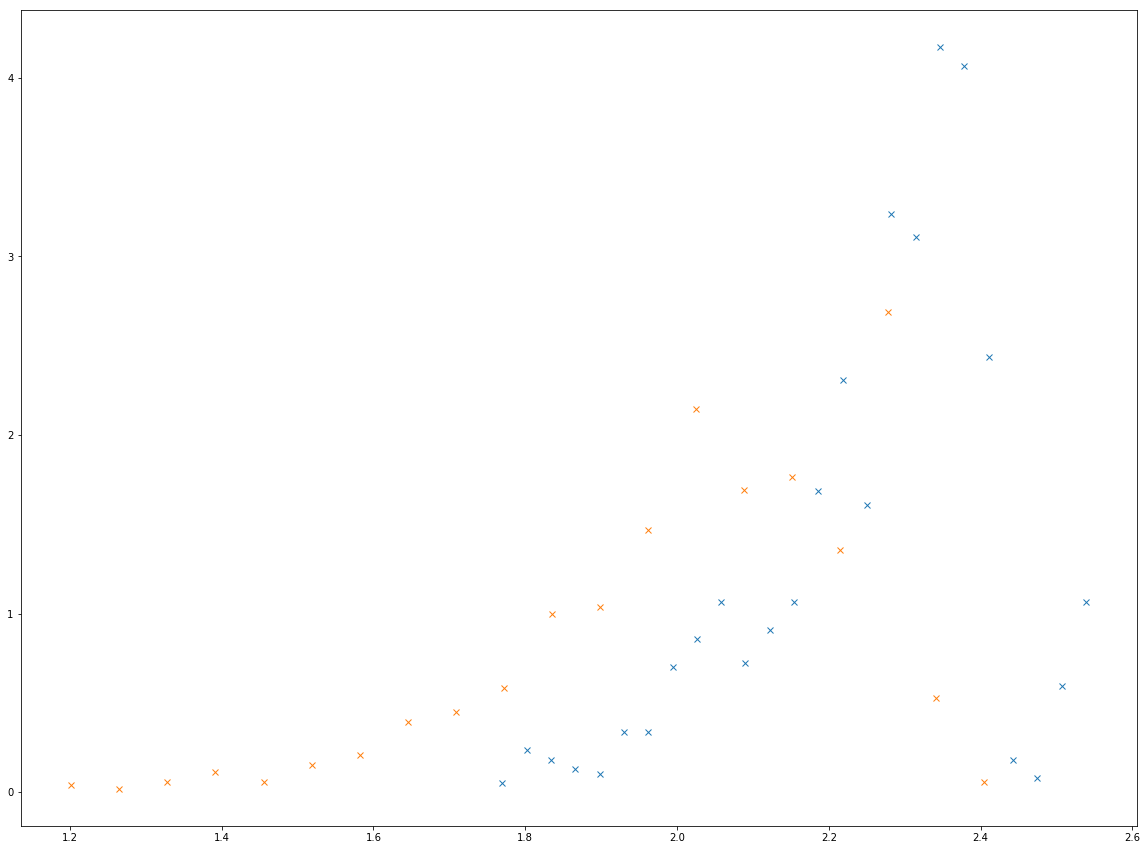

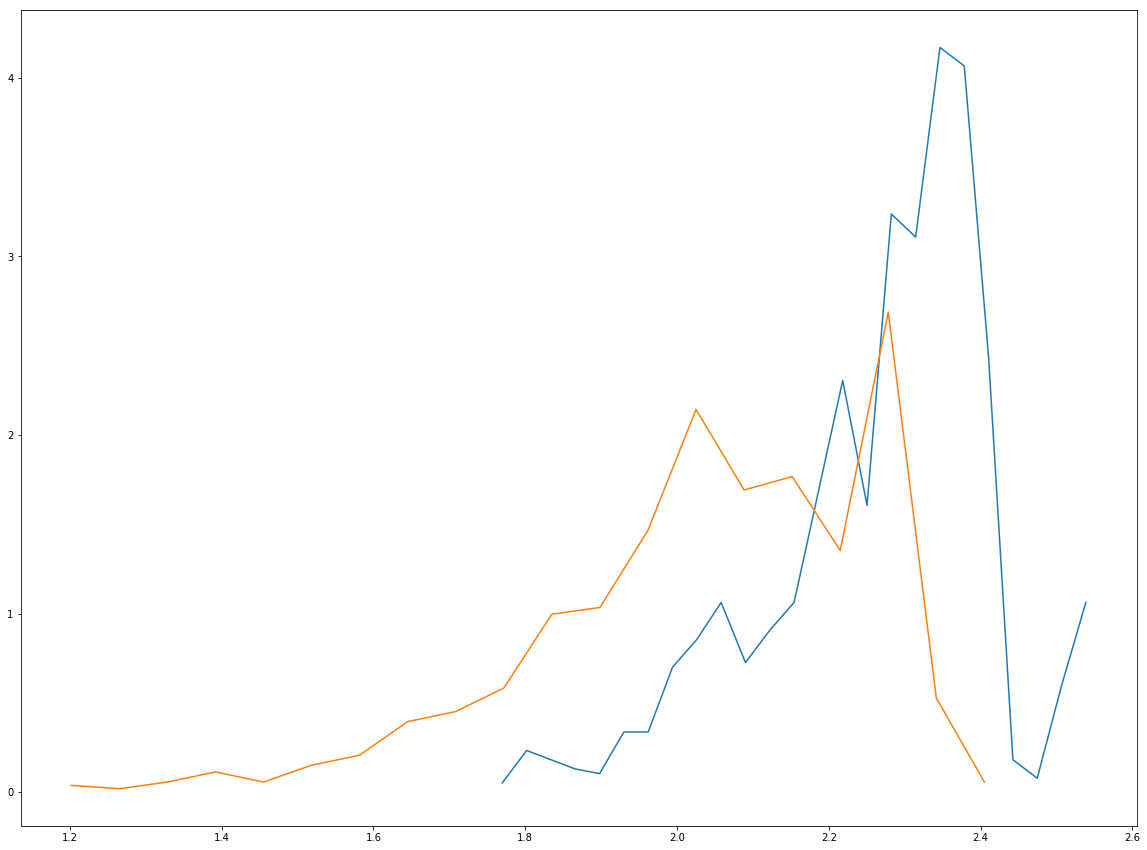




lambda_n
(24,)
(25,)
(24,)
(35,)
(36,)
(35,)
0.9952380952380953
0.9925311203319502


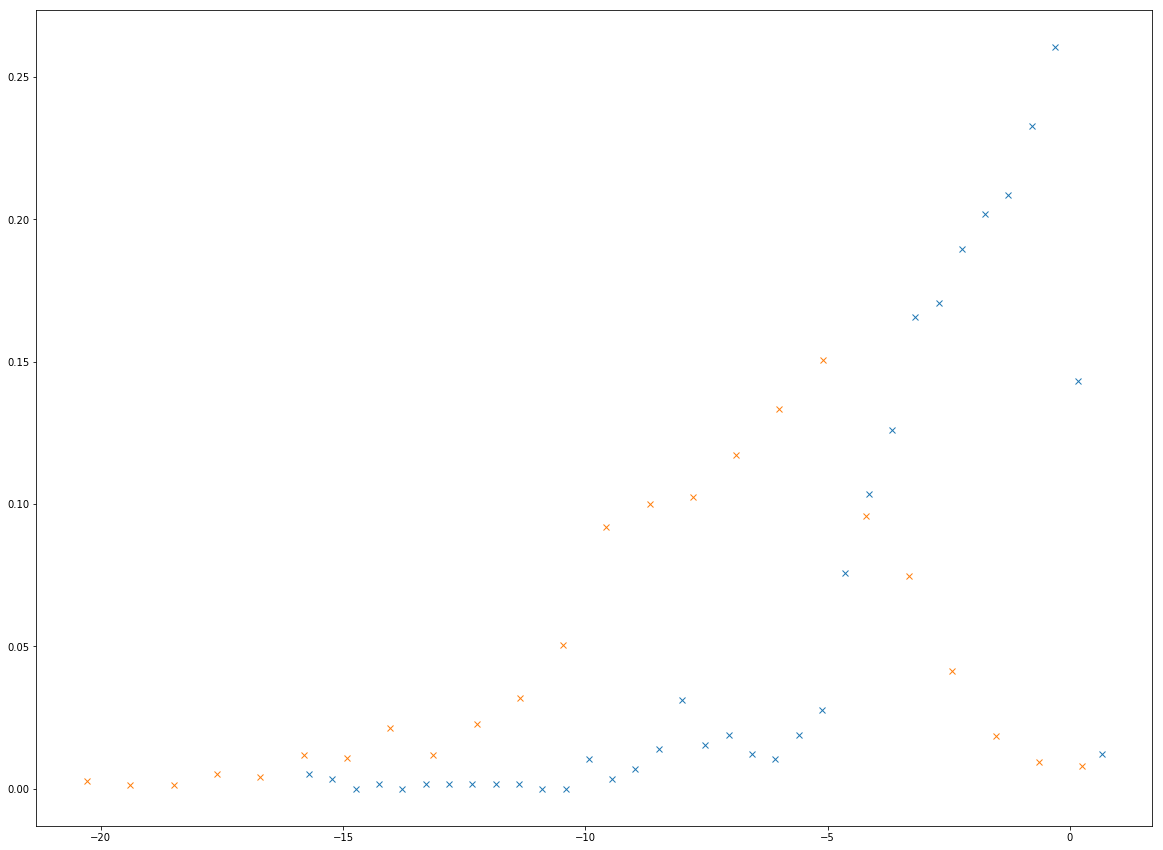

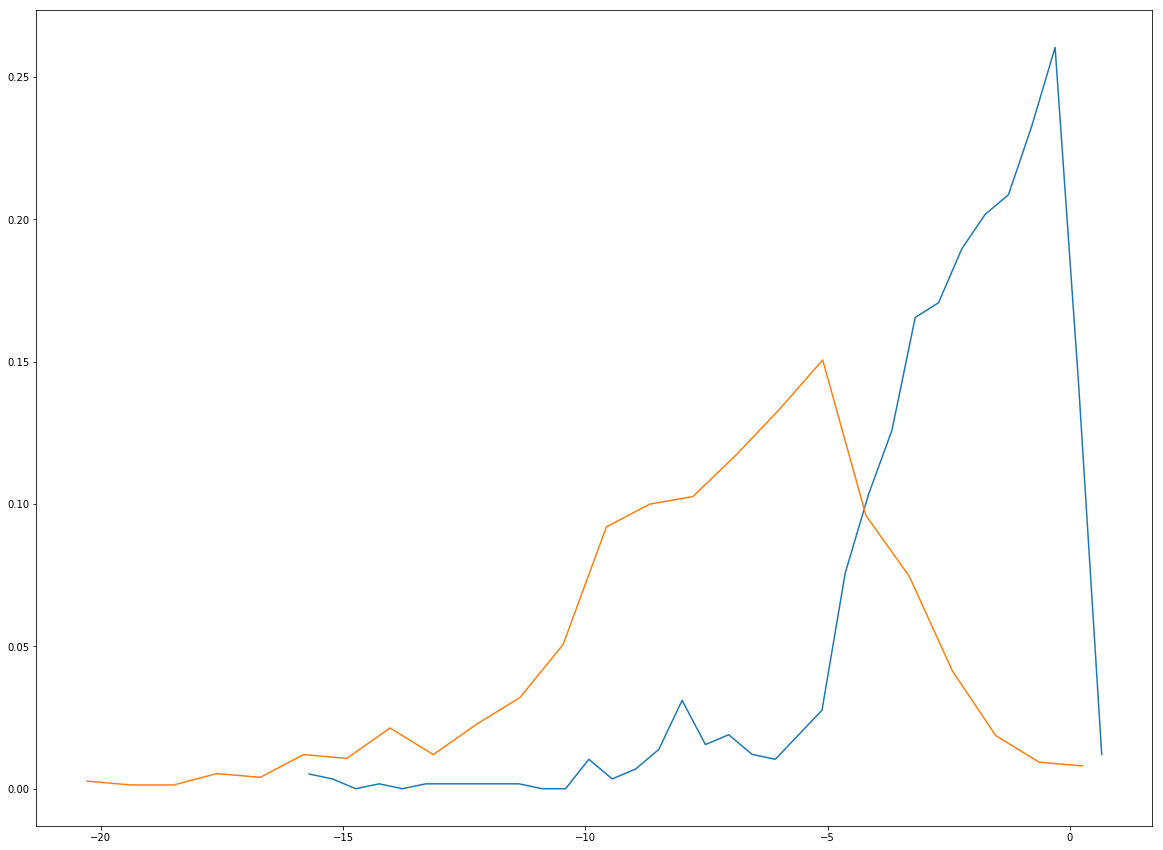




lambda_p
(20,)
(21,)
(20,)
(20,)
(21,)
(20,)
0.9919642857142856
0.9834716459197789


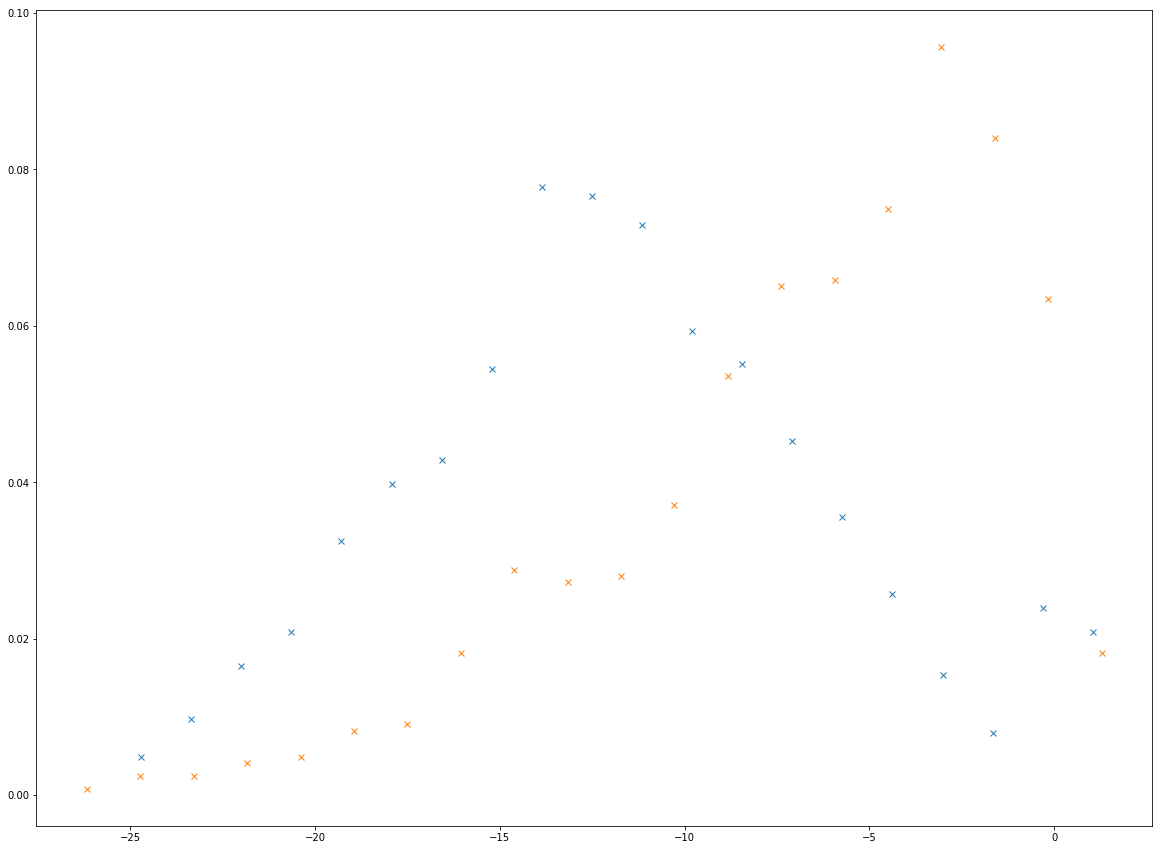

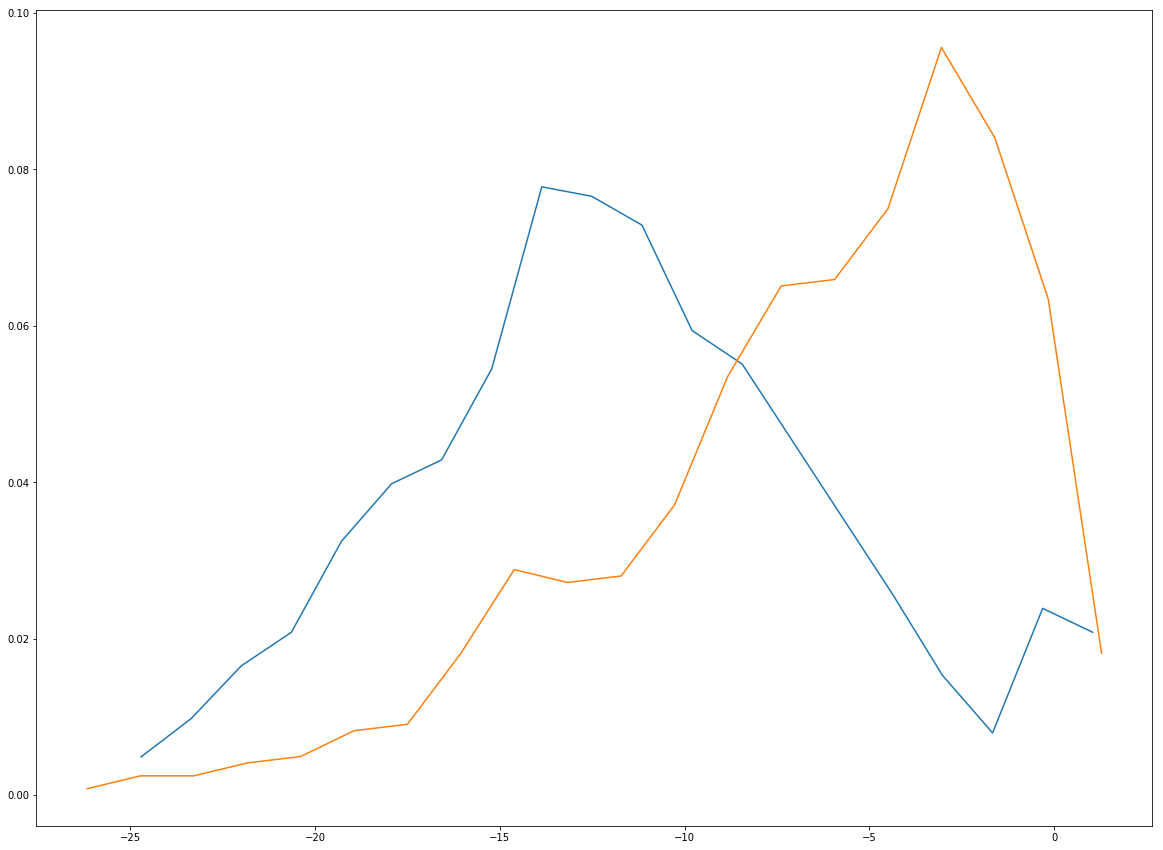




Lambda_n
(24,)
(25,)
(24,)
(35,)
(36,)
(35,)
0.9952380952380953
0.9925311203319502


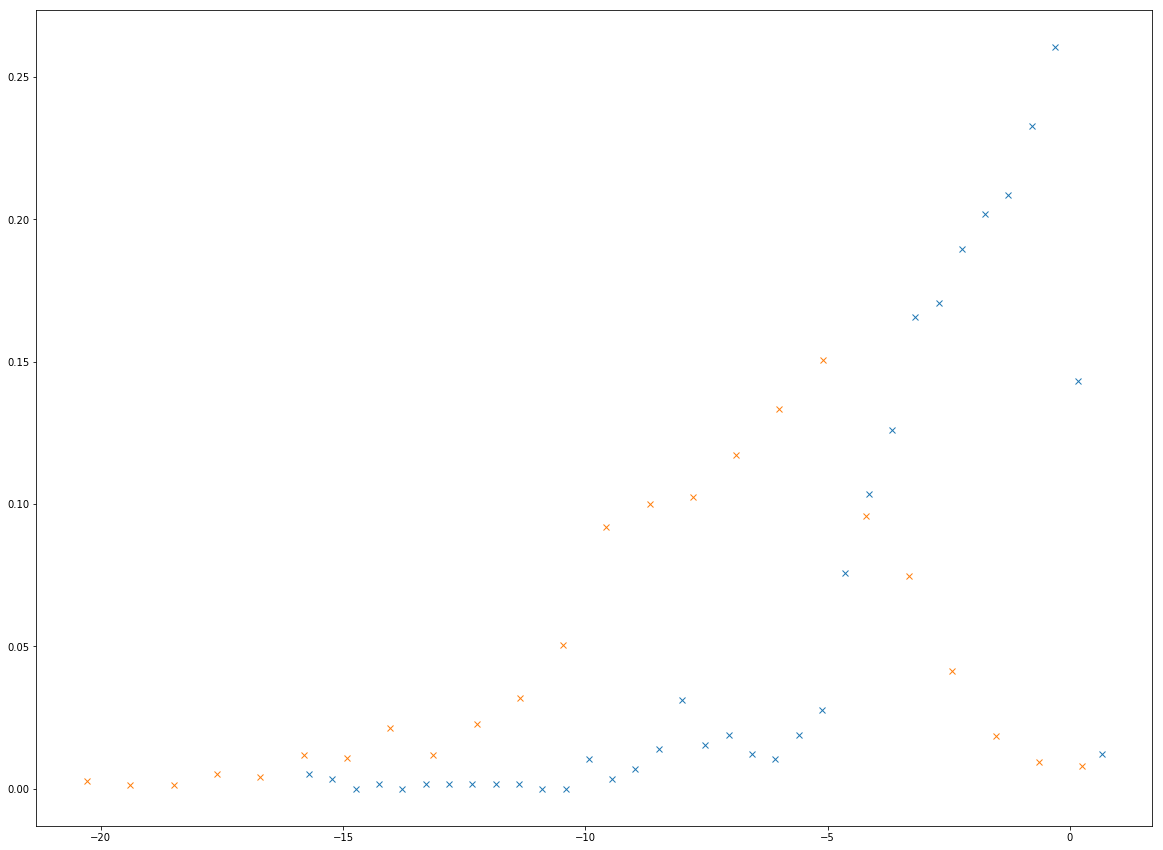

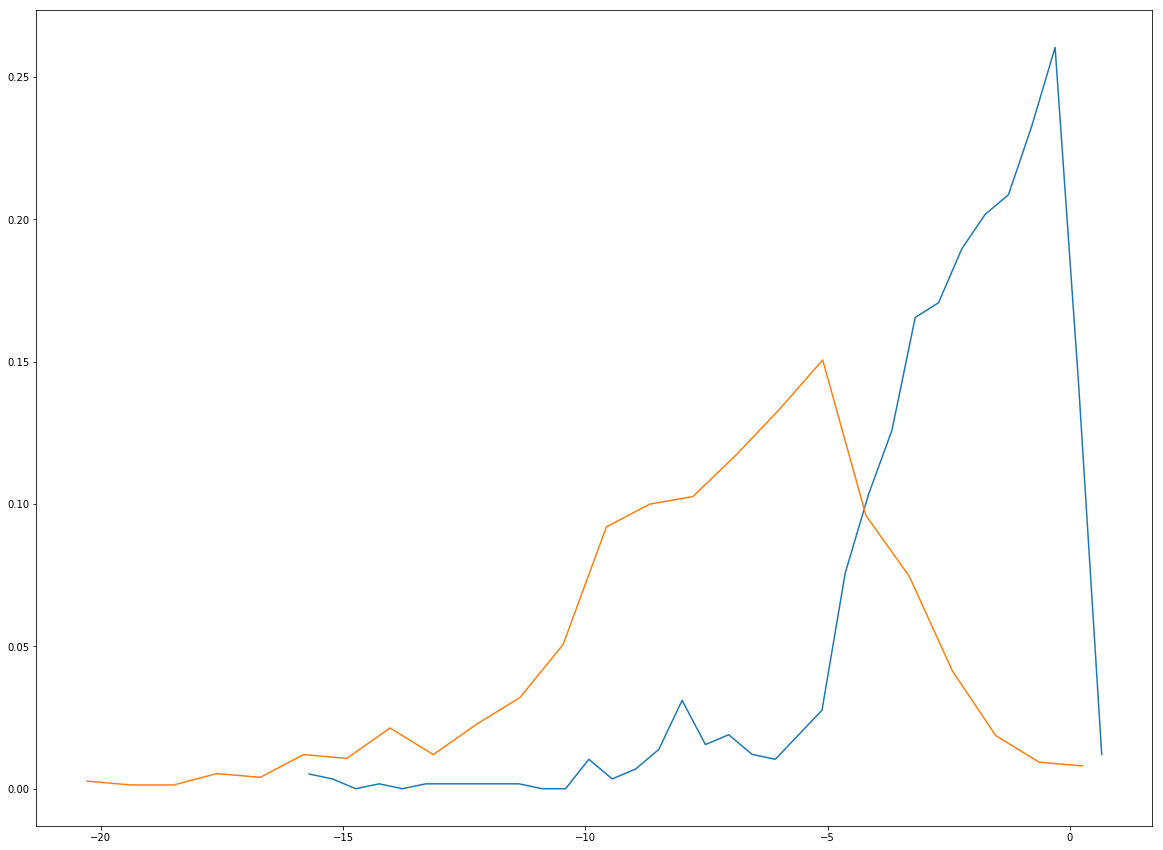




Lambda_p
(20,)
(21,)
(20,)
(20,)
(21,)
(20,)
0.9919642857142856
0.9834716459197789


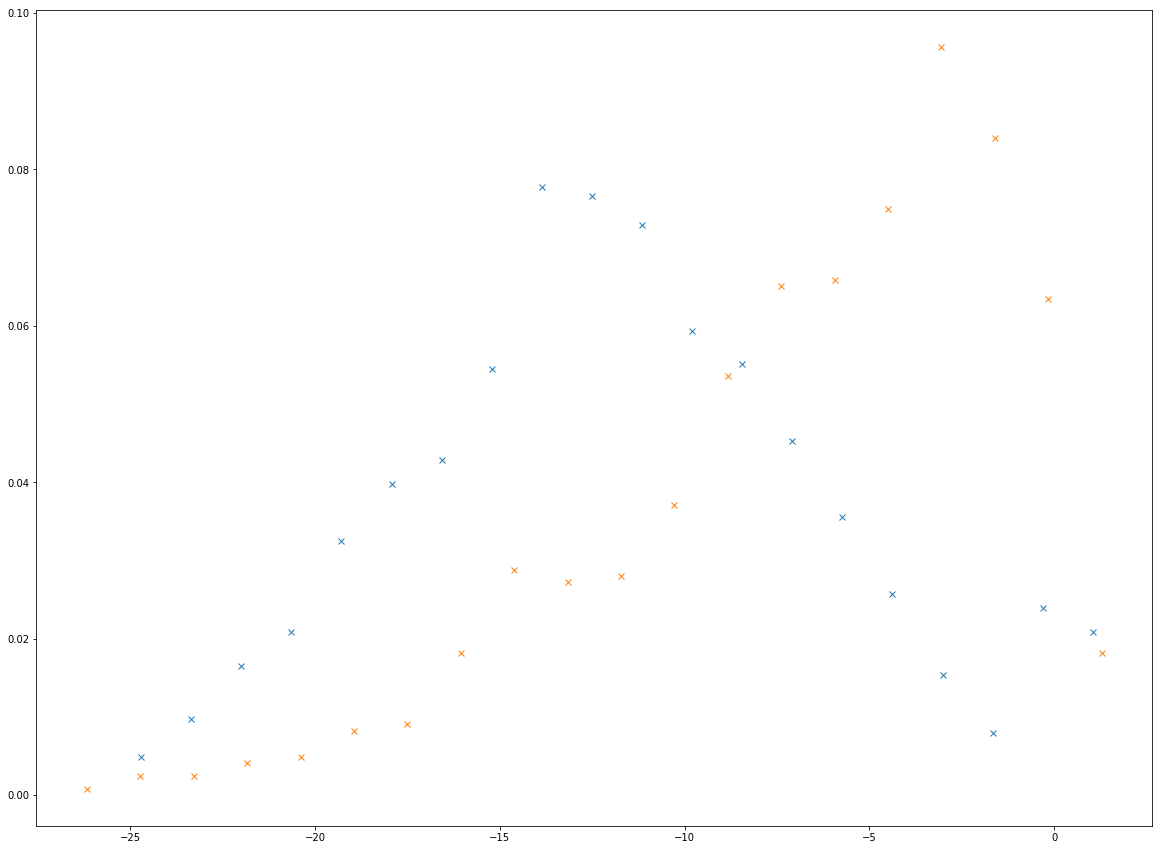

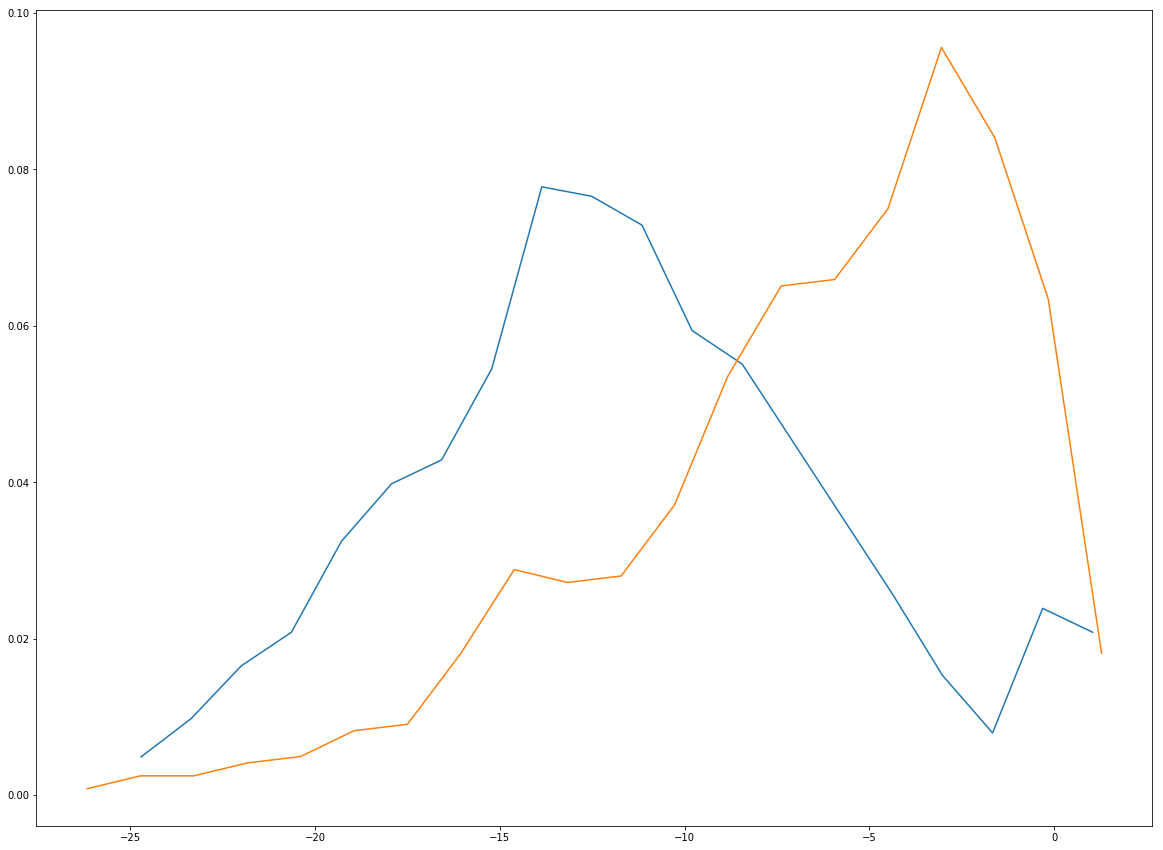




delta_n
(67,)
(68,)
(67,)
(76,)
(77,)
(76,)
1.0075396825396816
0.9980636237897649


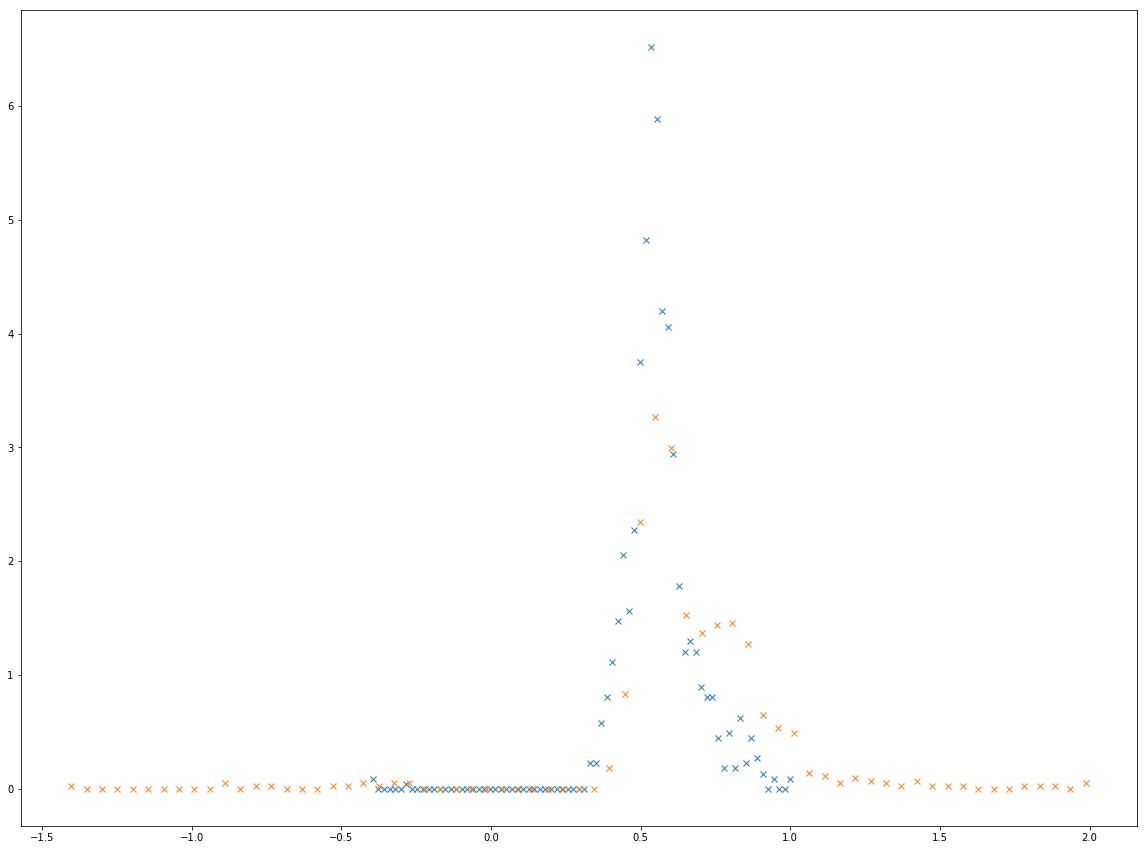

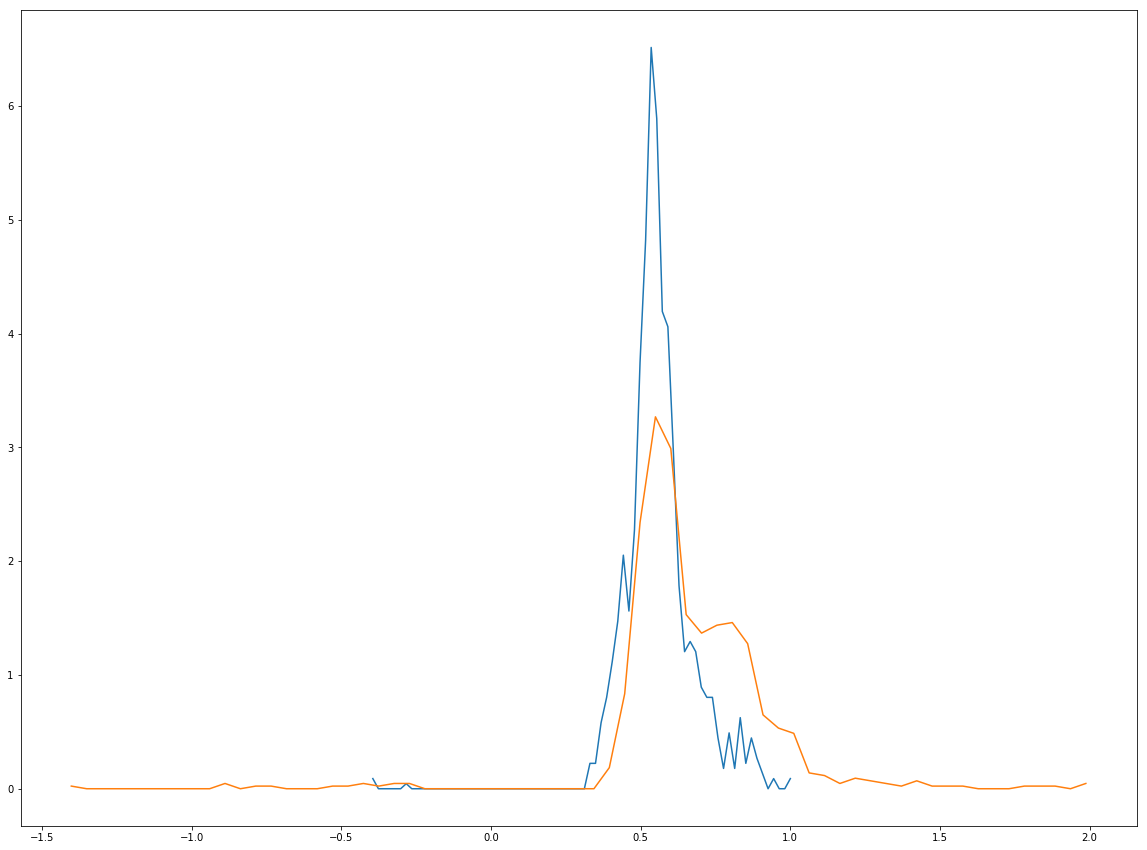




delta_p
(58,)
(59,)
(58,)
(53,)
(54,)
(53,)
0.9987103174603174
1.0038727524204696


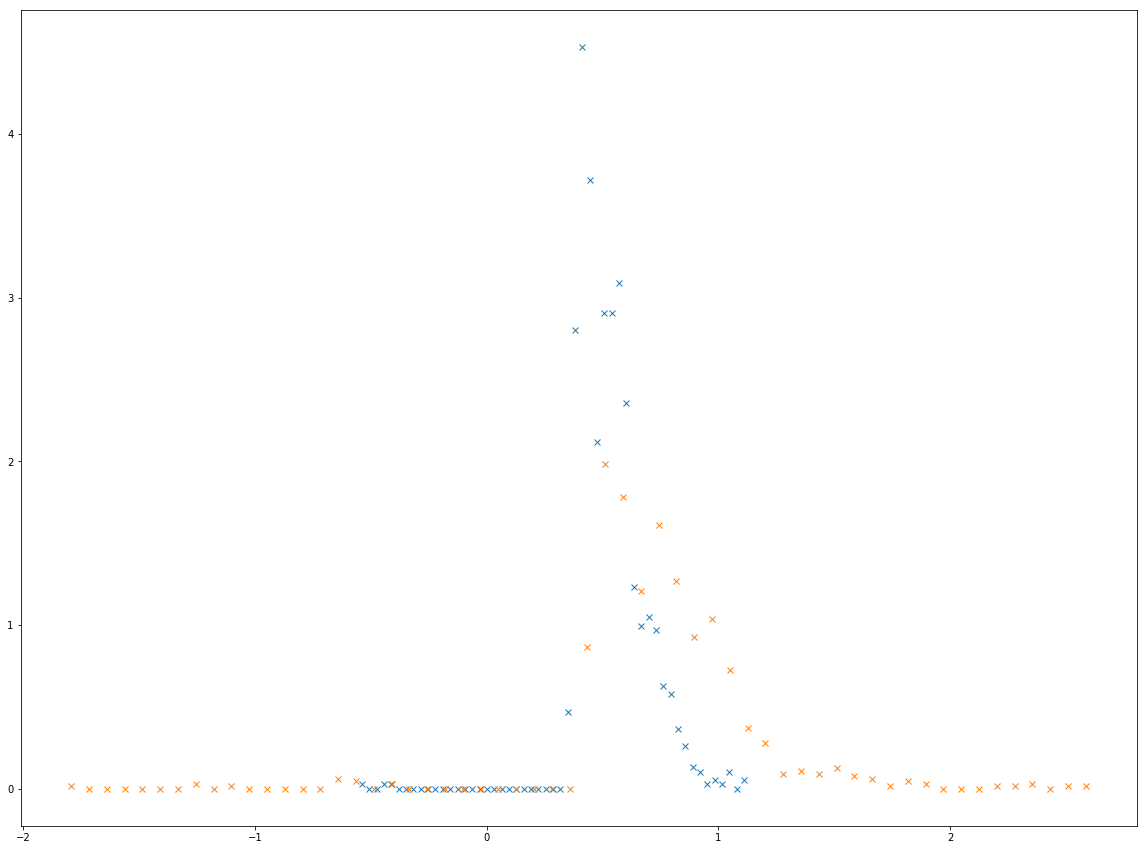

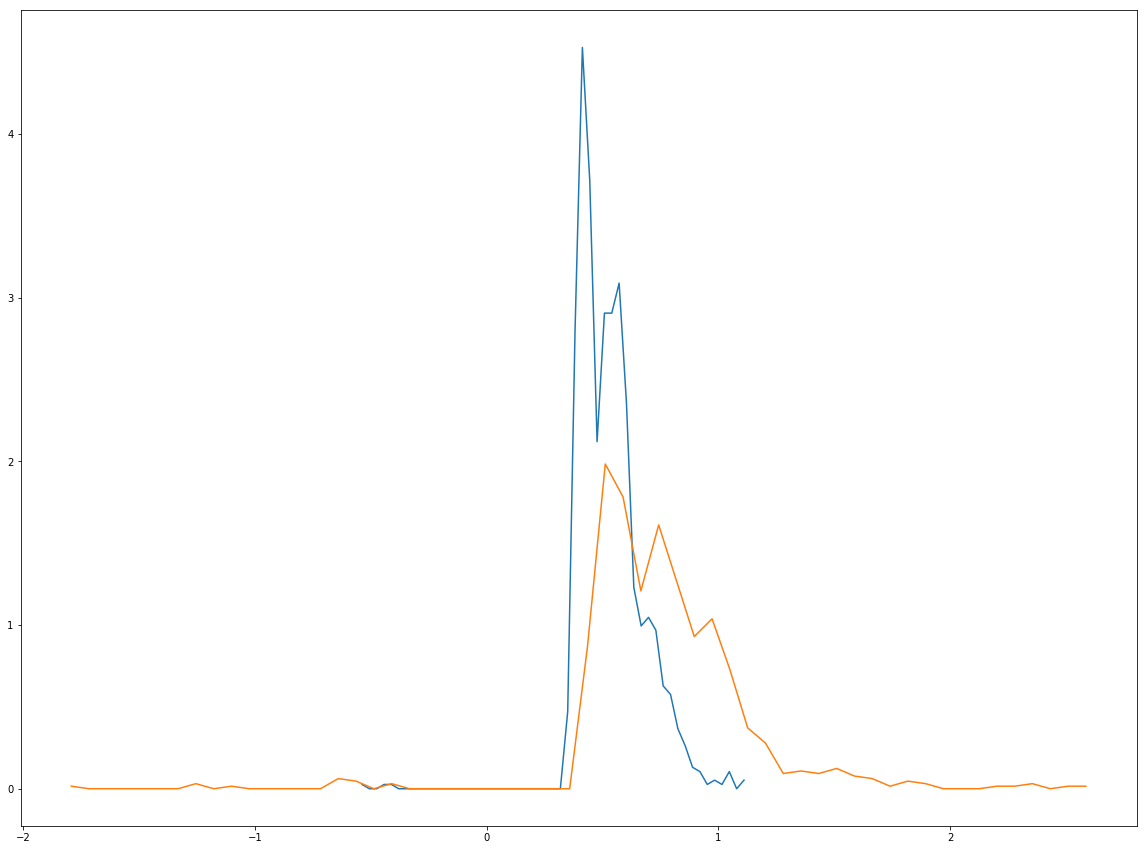




pwi
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


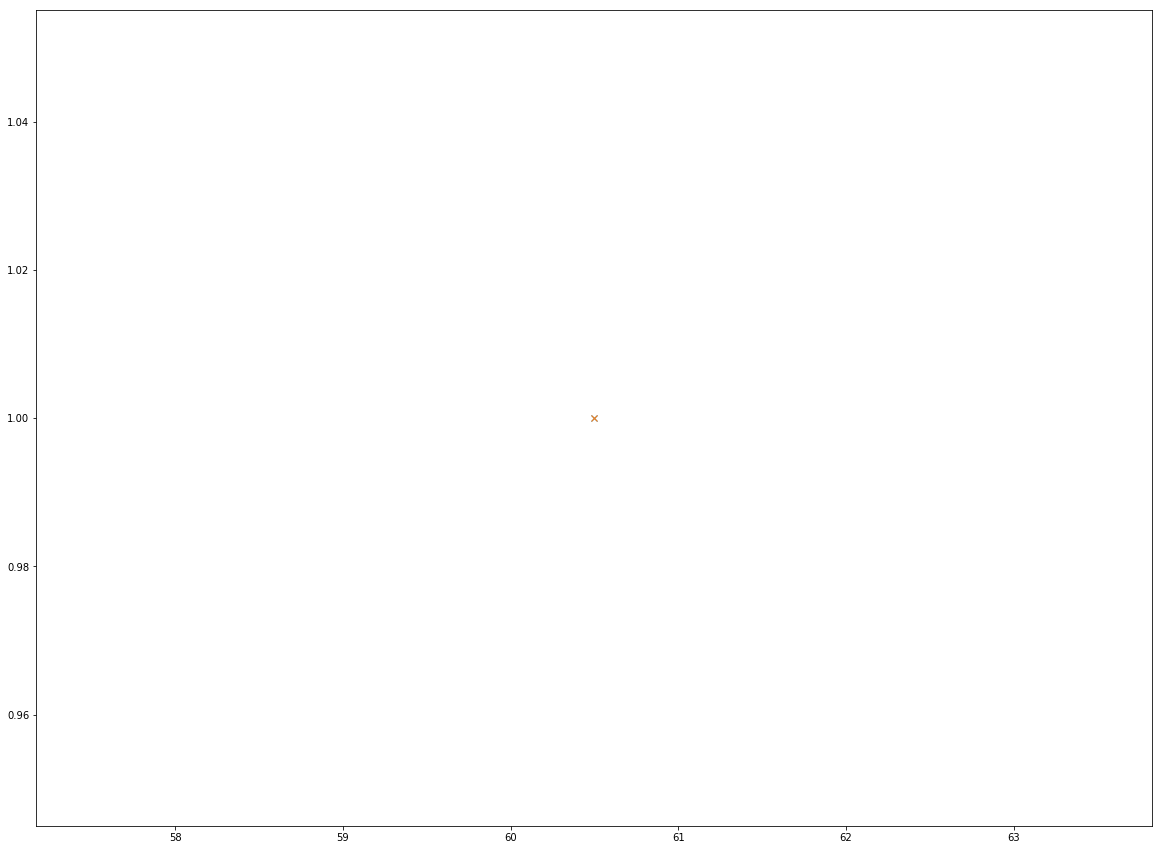

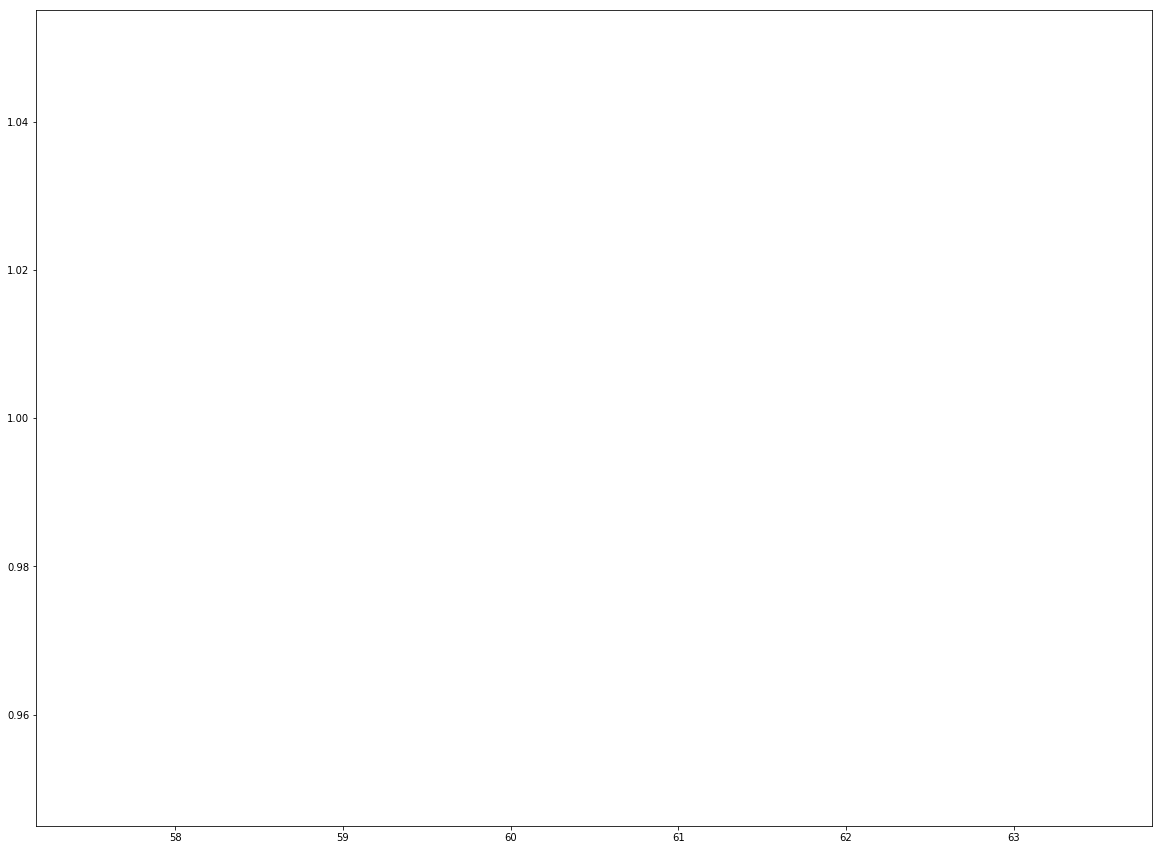




pairingE_n
(46,)
(47,)
(46,)
(38,)
(39,)
(38,)
0.9983134920634922
0.9991701244813277


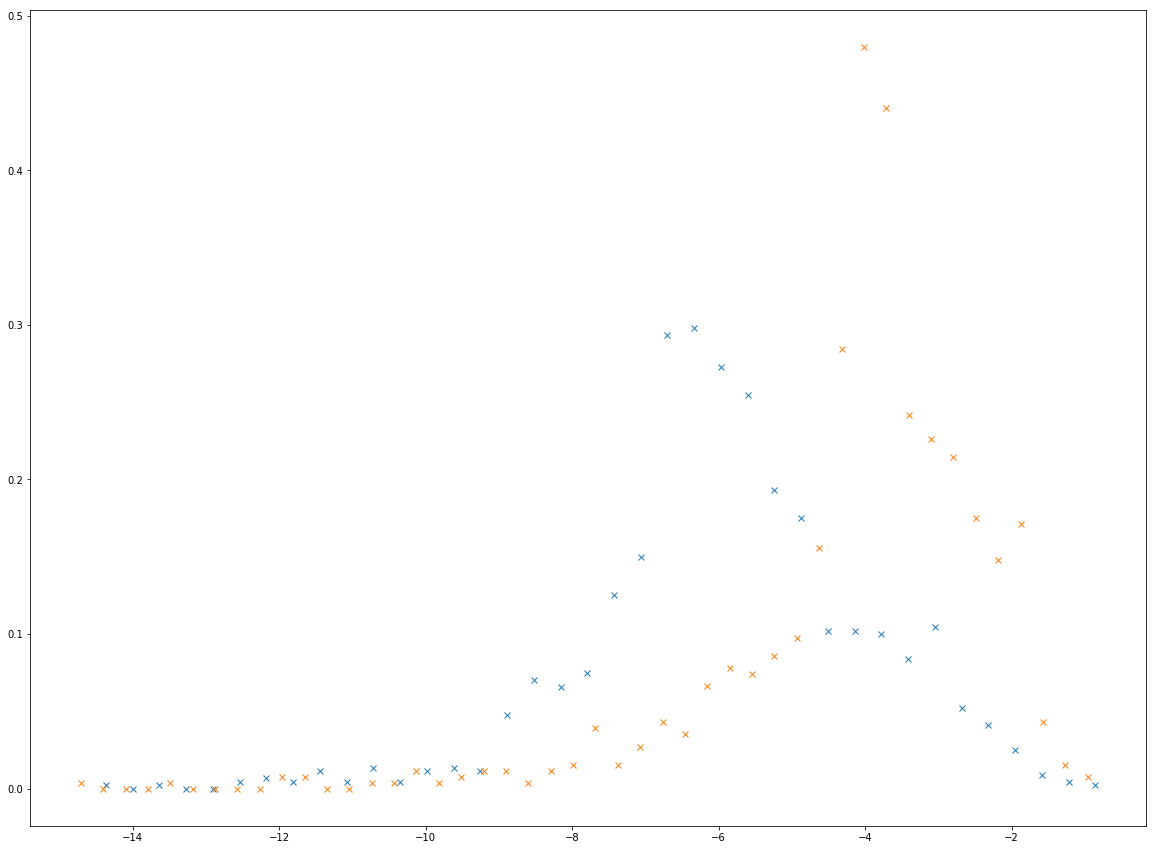

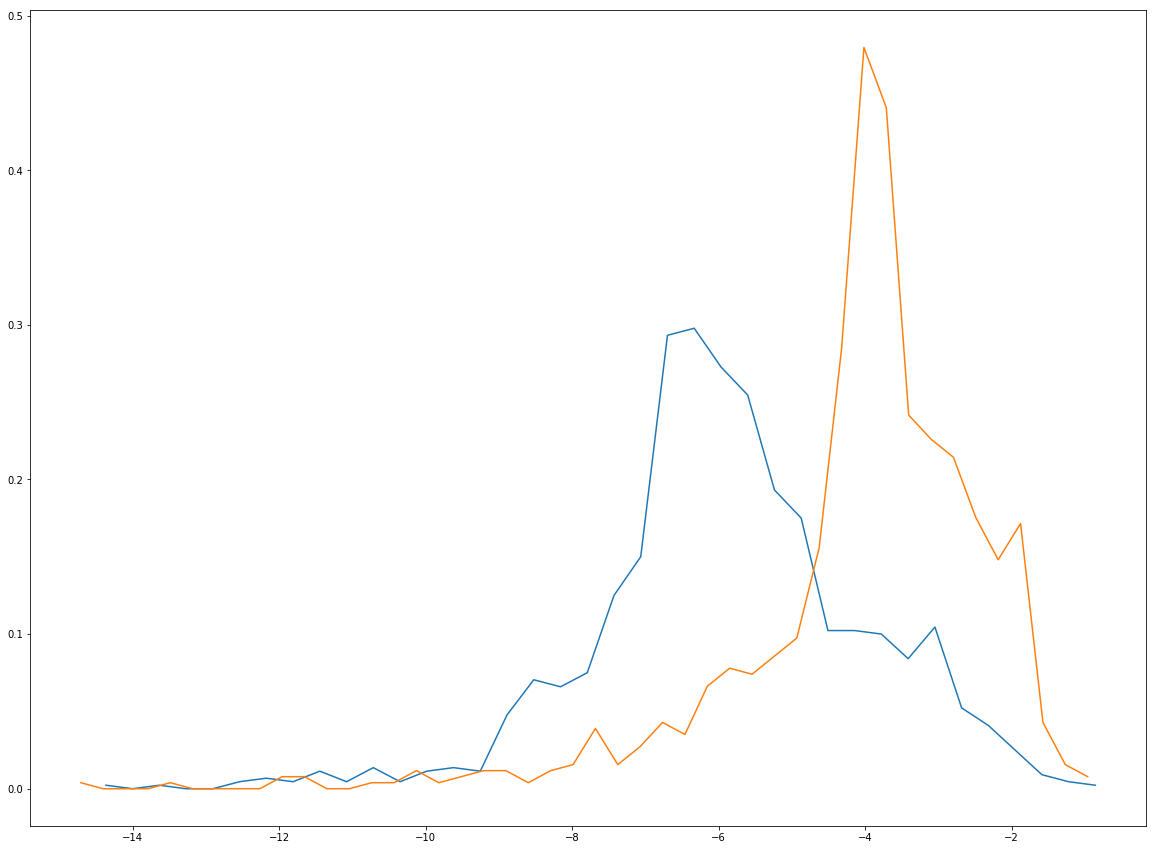




pairingE_p
(30,)
(31,)
(30,)
(34,)
(35,)
(34,)
0.9933531746031745
0.9980636237897649


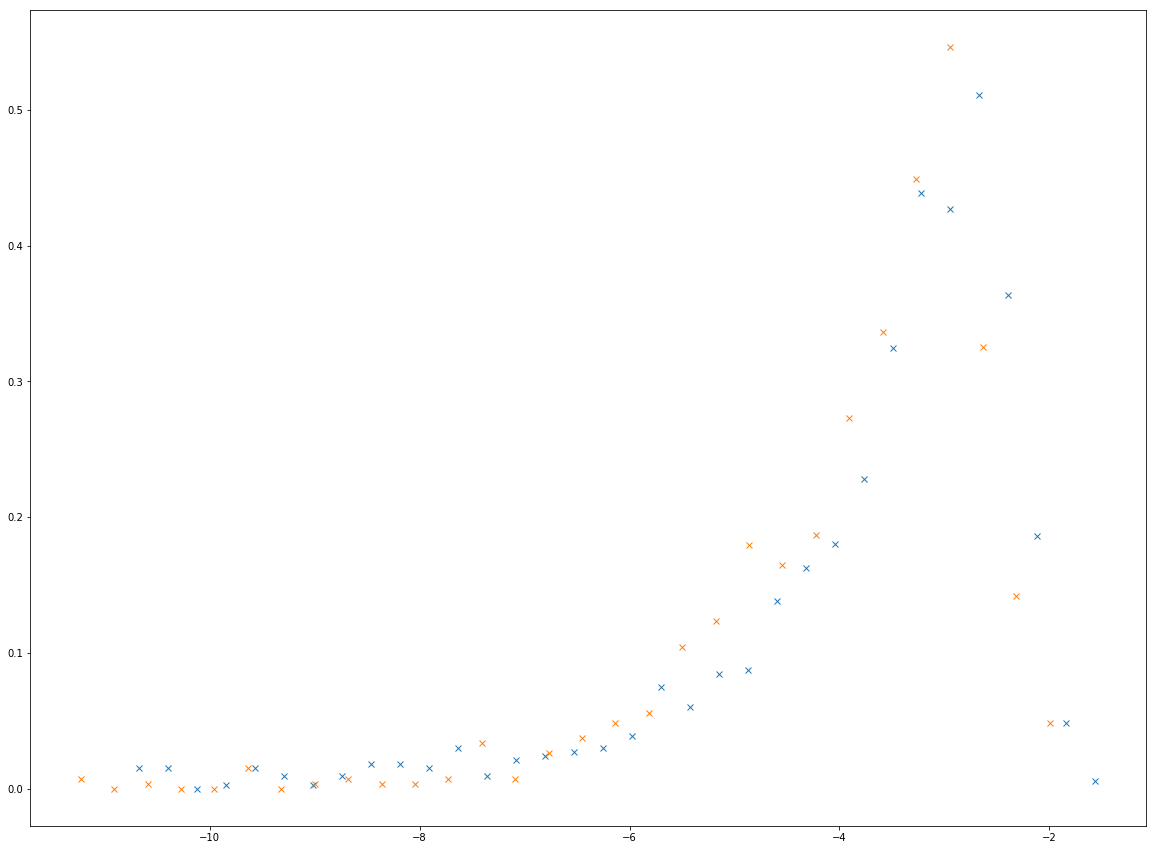

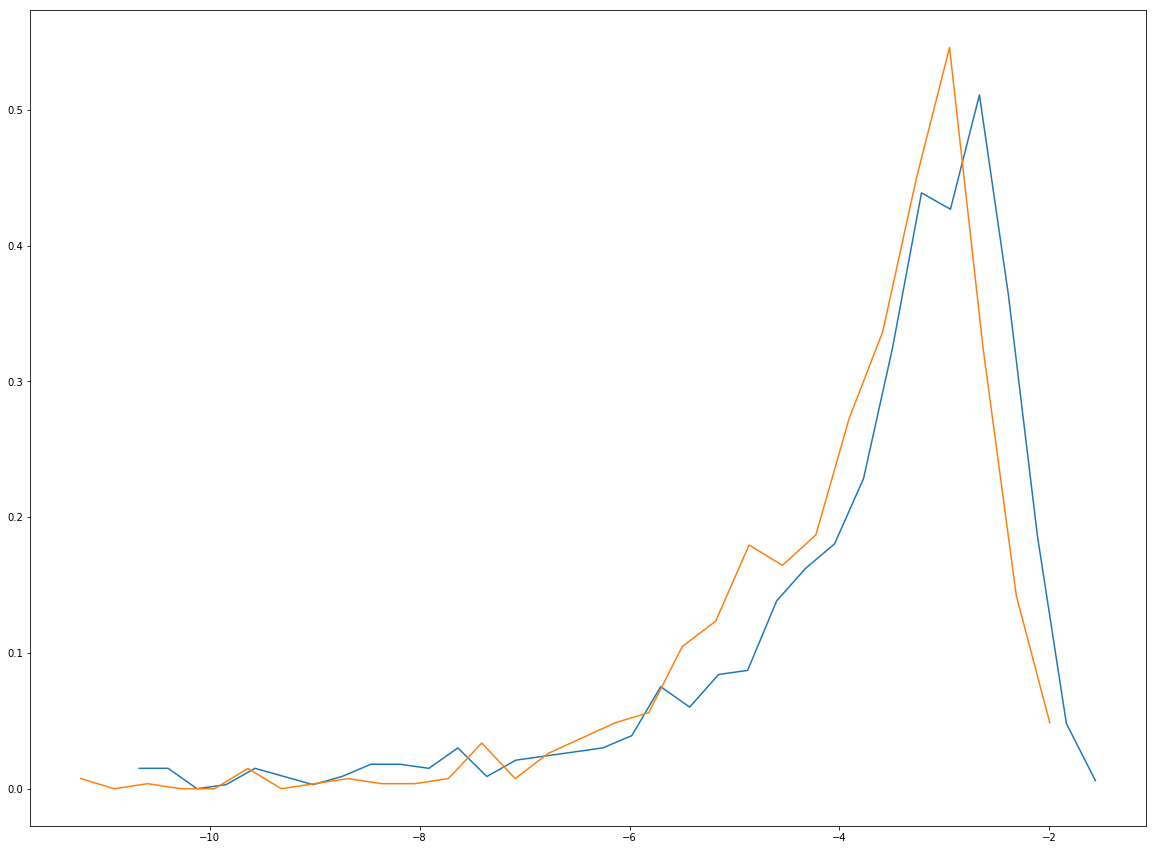




LNlambda_n
(101,)
(102,)
(101,)
(70,)
(71,)
(70,)
1.0055555555555555
0.9965421853388656


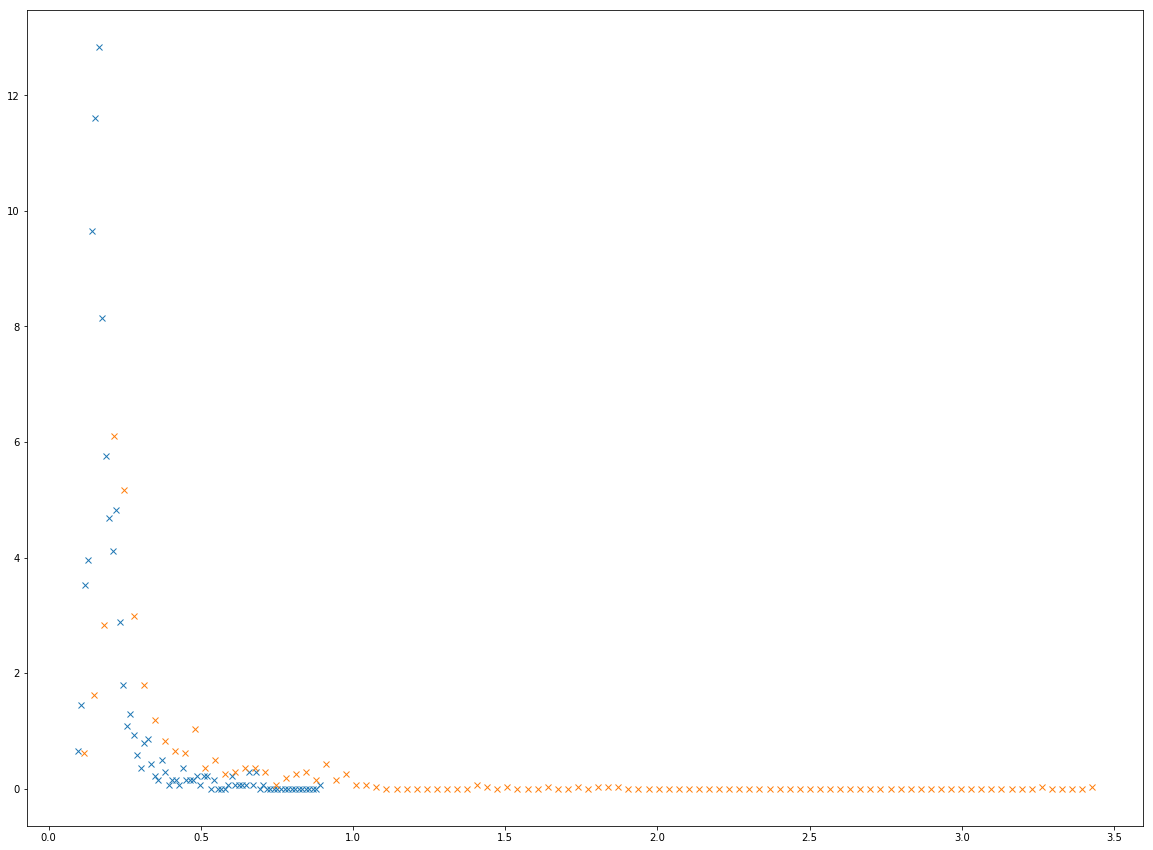

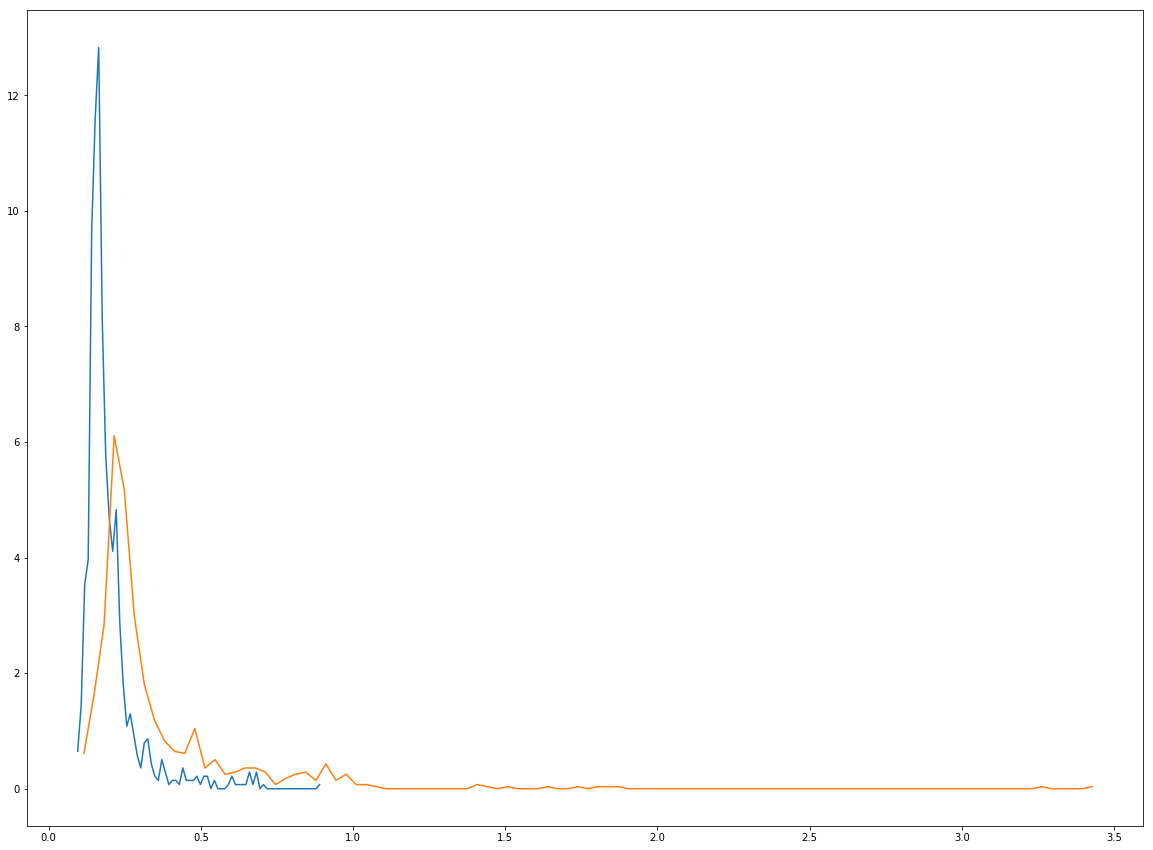




LNlambda_p
(79,)
(80,)
(79,)
(64,)
(65,)
(64,)
0.9960317460317458
0.9917012448132778


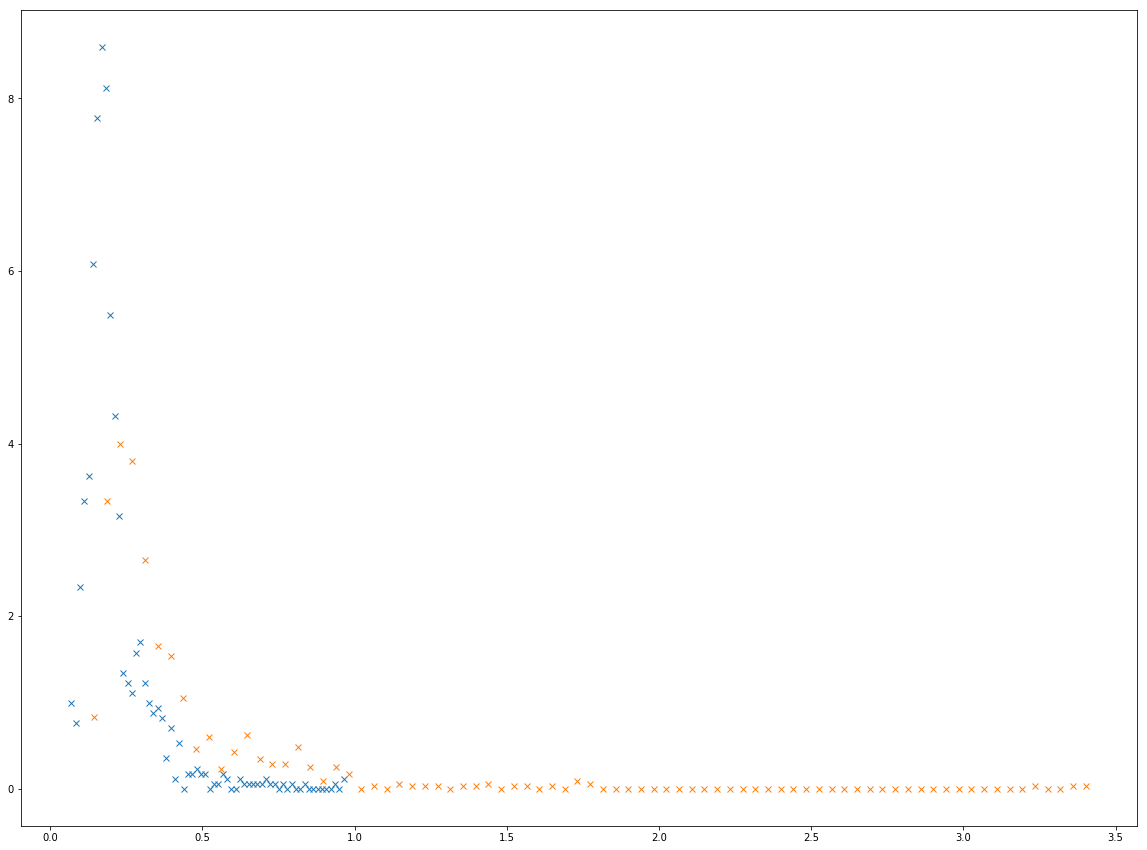

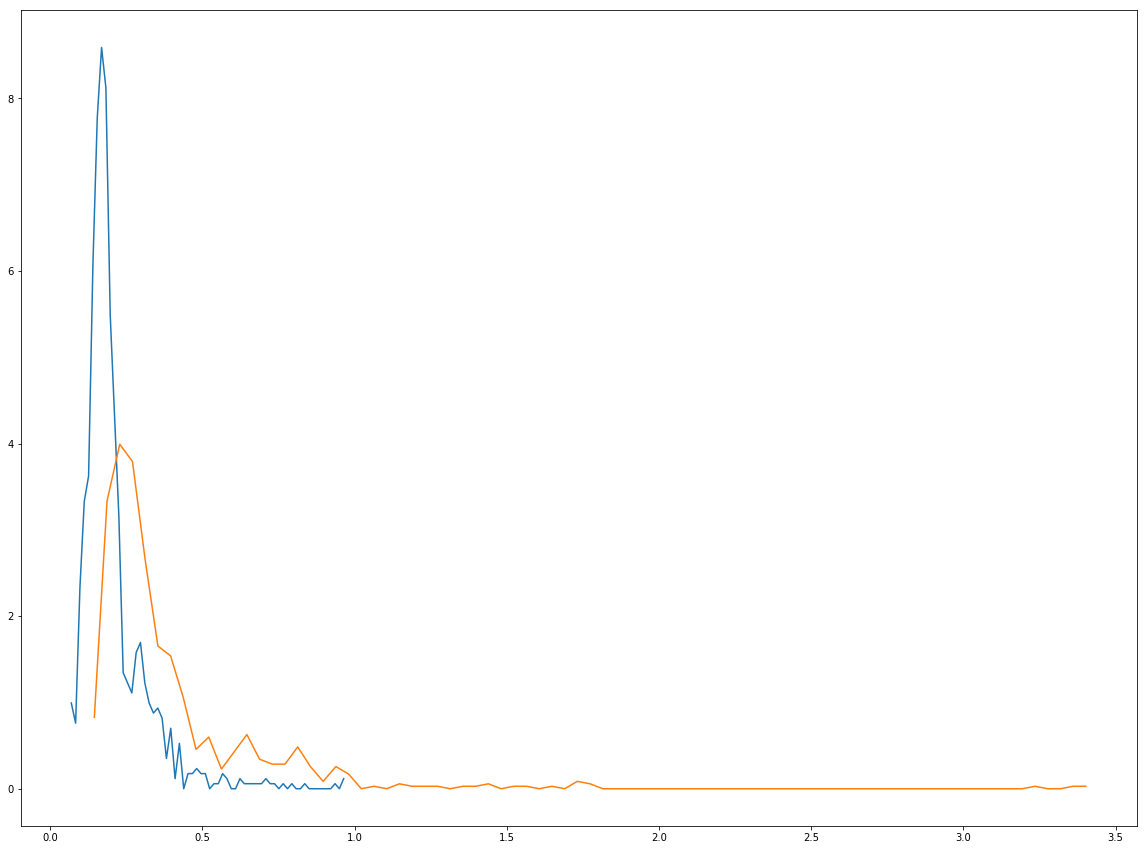




LNEnergy_n
(53,)
(54,)
(53,)
(56,)
(57,)
(56,)
0.9749999999999994
0.99820193637621


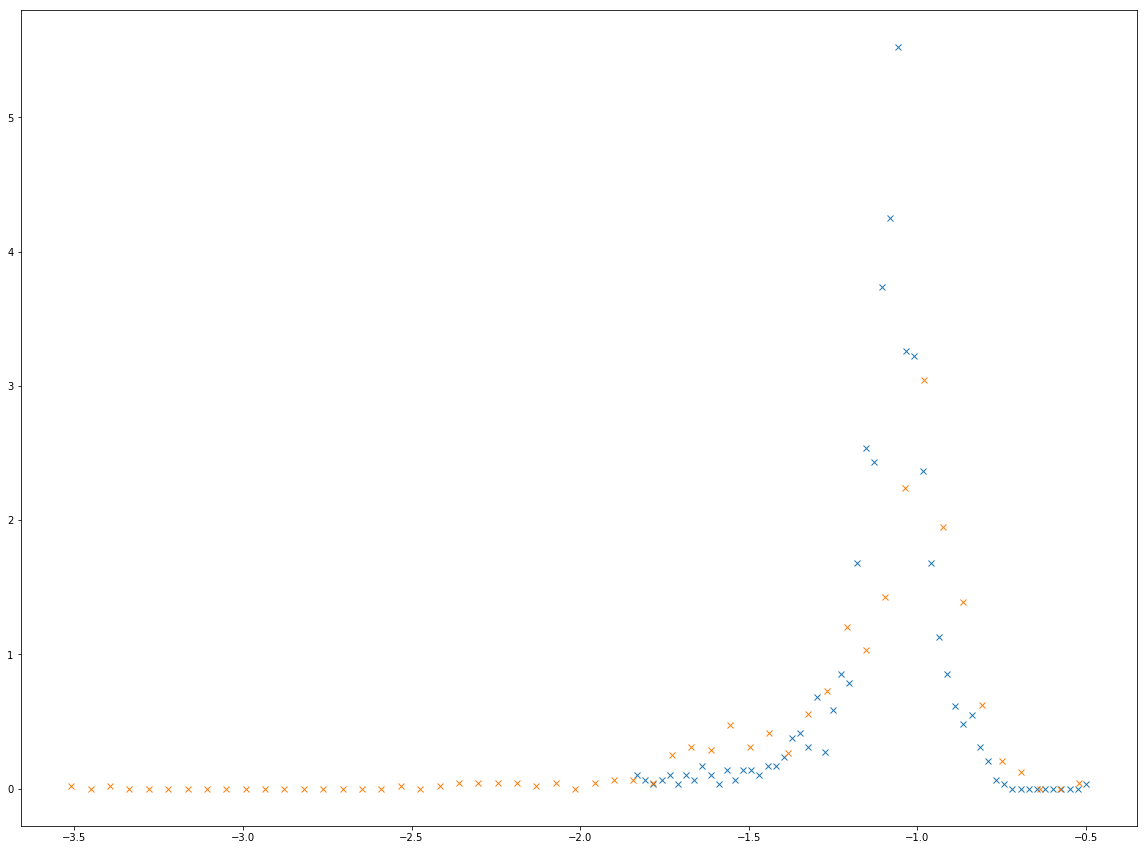

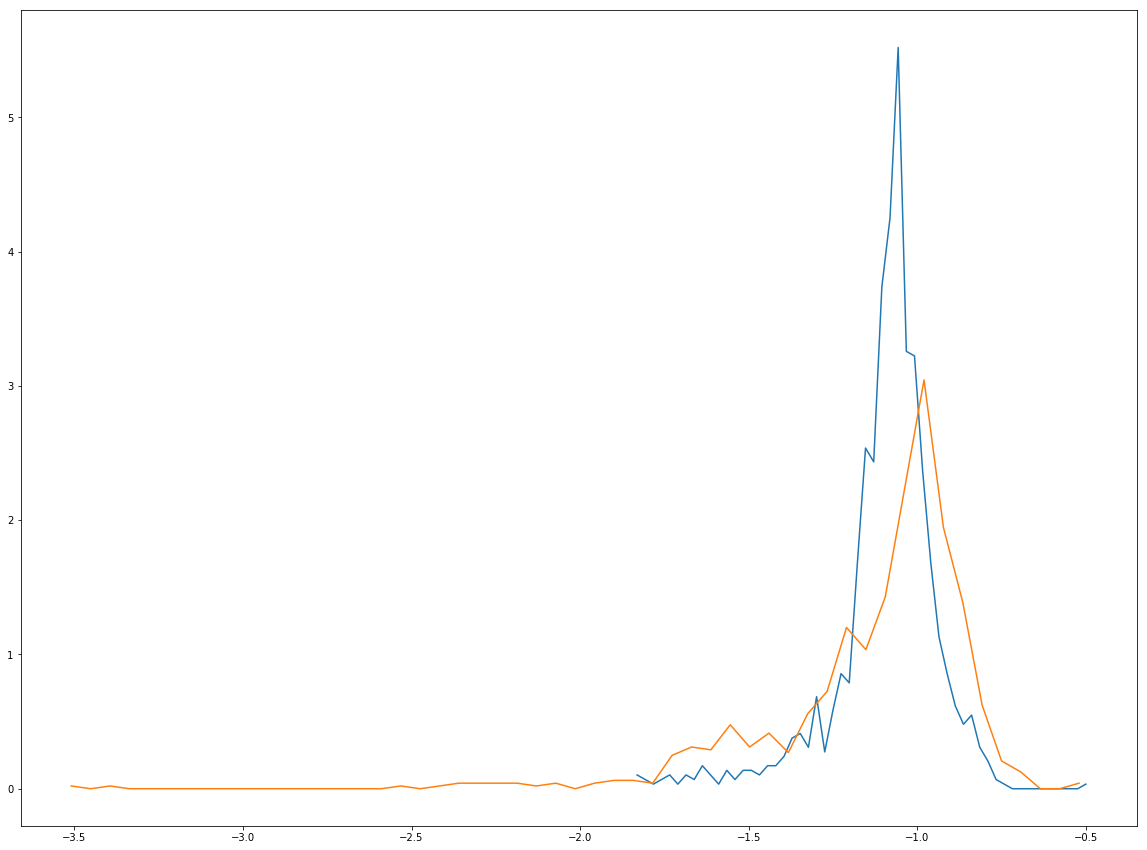




LNEnergy_p
(43,)
(44,)
(43,)
(40,)
(41,)
(40,)
0.9599206349206346
0.9975103734439832


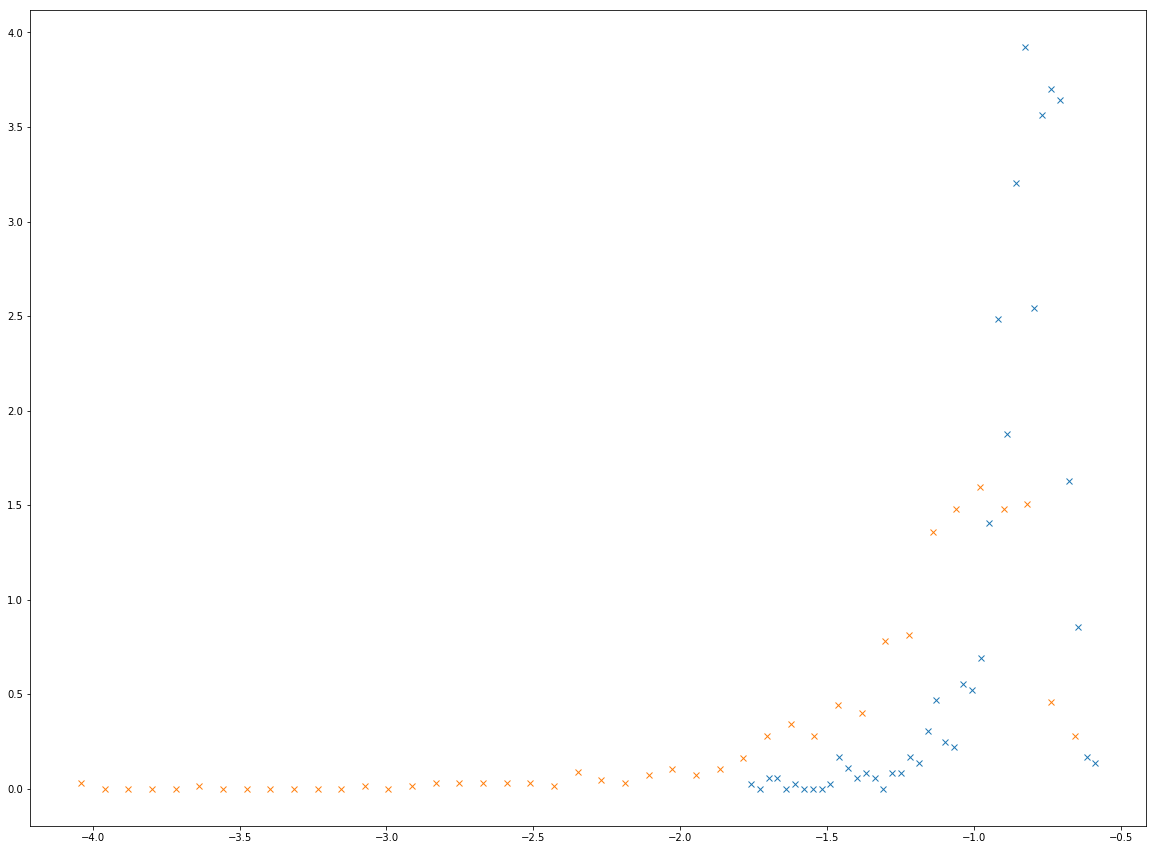

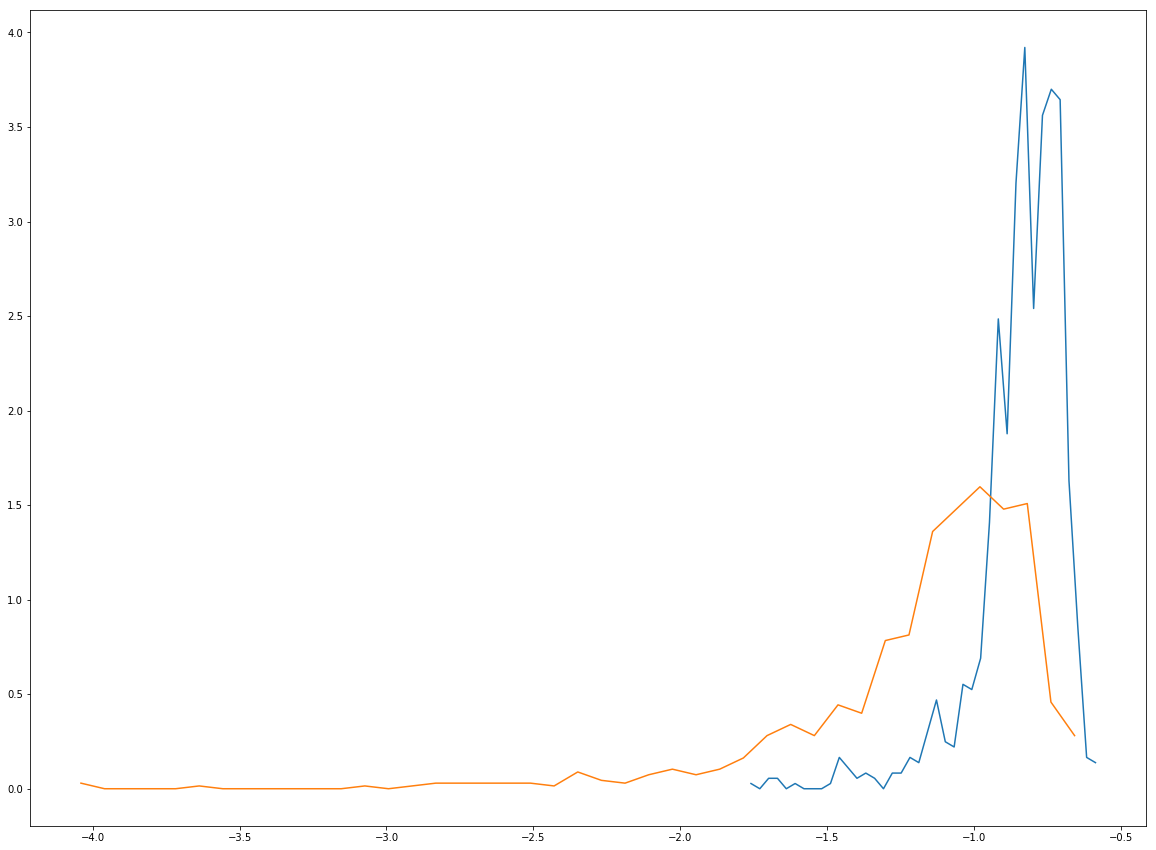




LNdelta_n
(76,)
(77,)
(76,)
(76,)
(77,)
(76,)
0.9980158730158728
0.9990318118948827


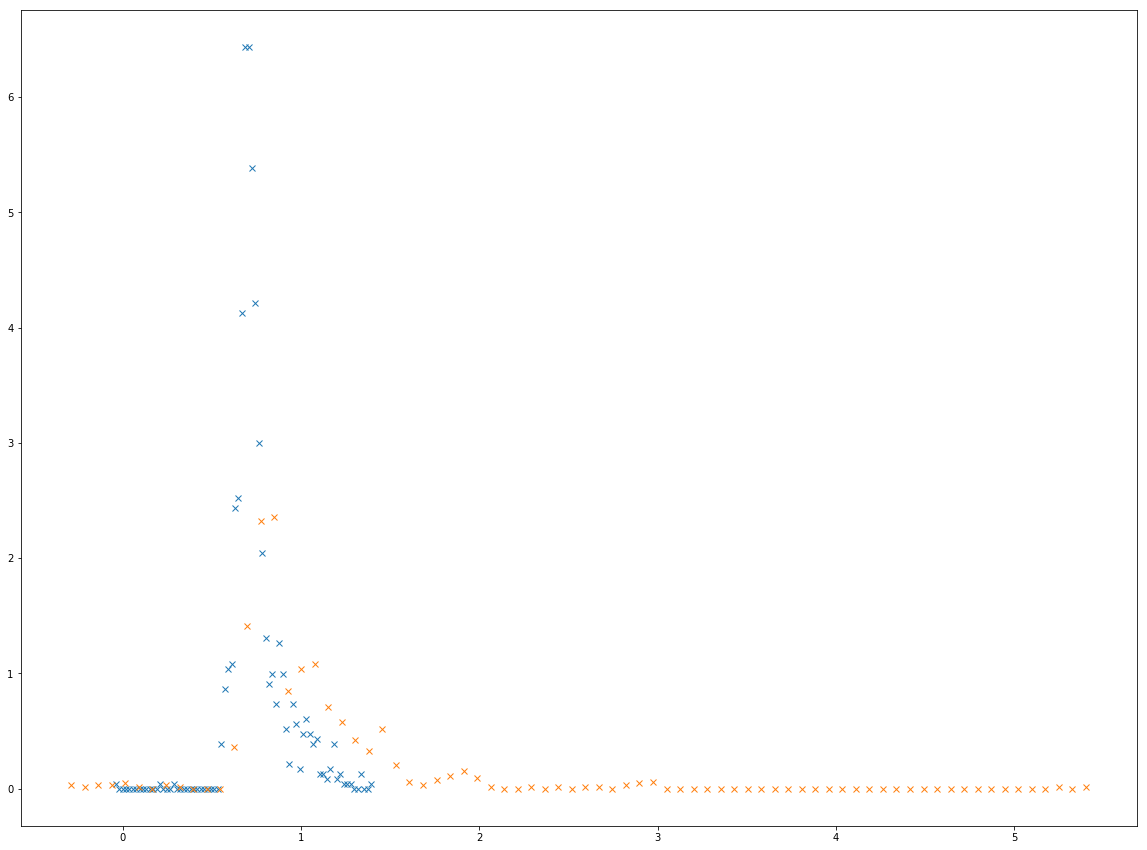

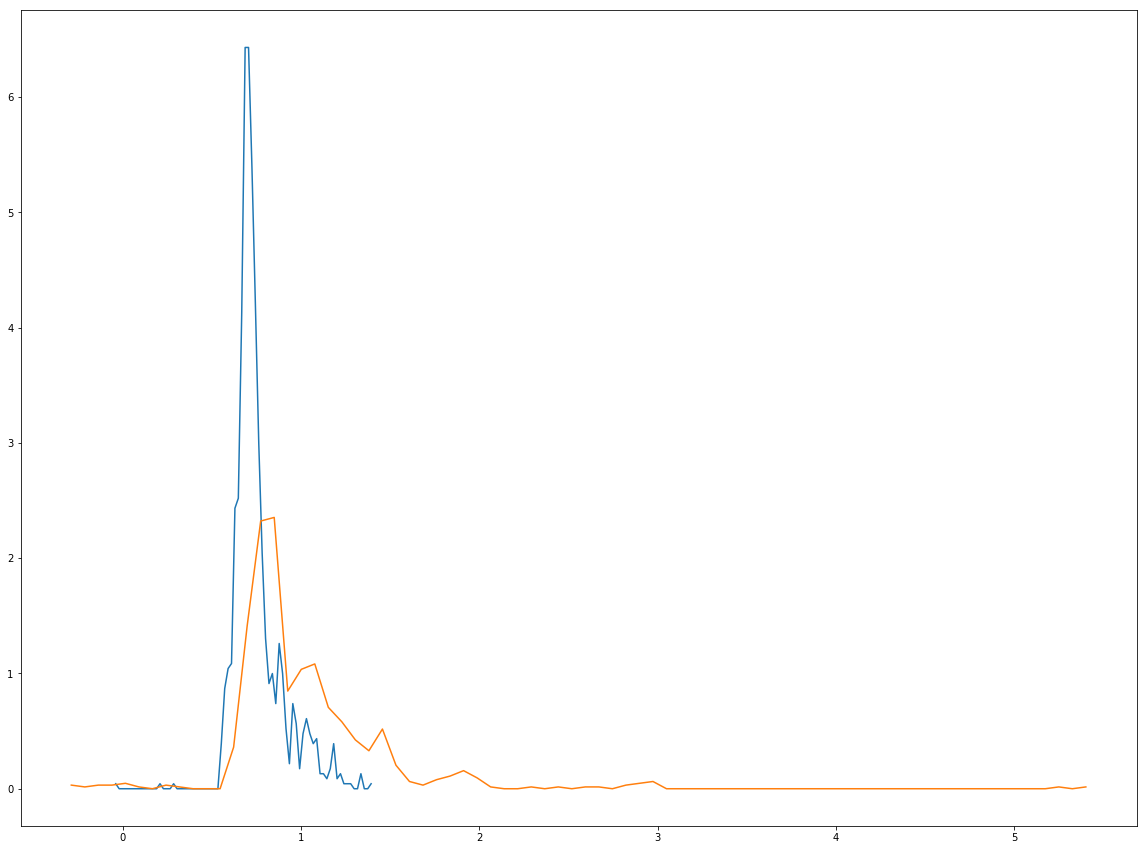




LNdelta_p
(72,)
(73,)
(72,)
(53,)
(54,)
(53,)
0.9987103174603175
1.0058091286307054


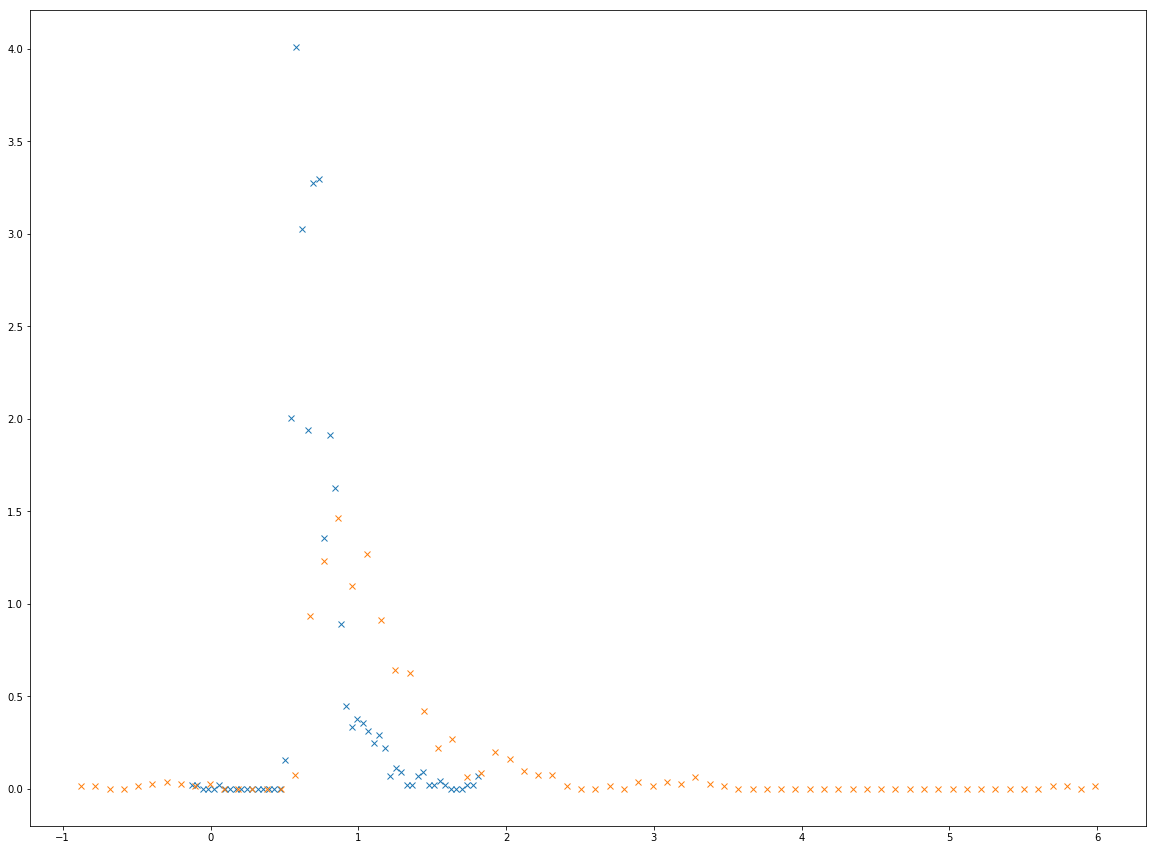

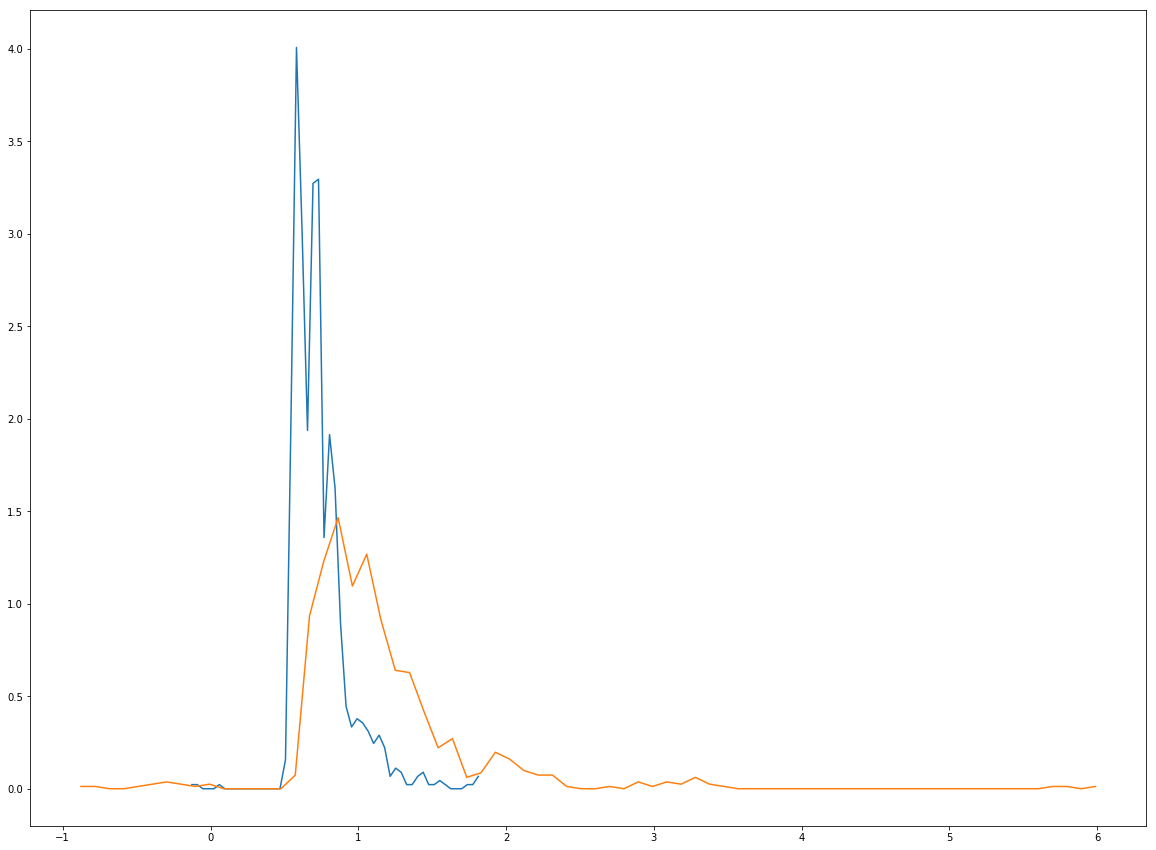




Geff_n
(114,)
(115,)
(114,)
(50,)
(51,)
(50,)
0.9061507936507932
0.9666666666666667


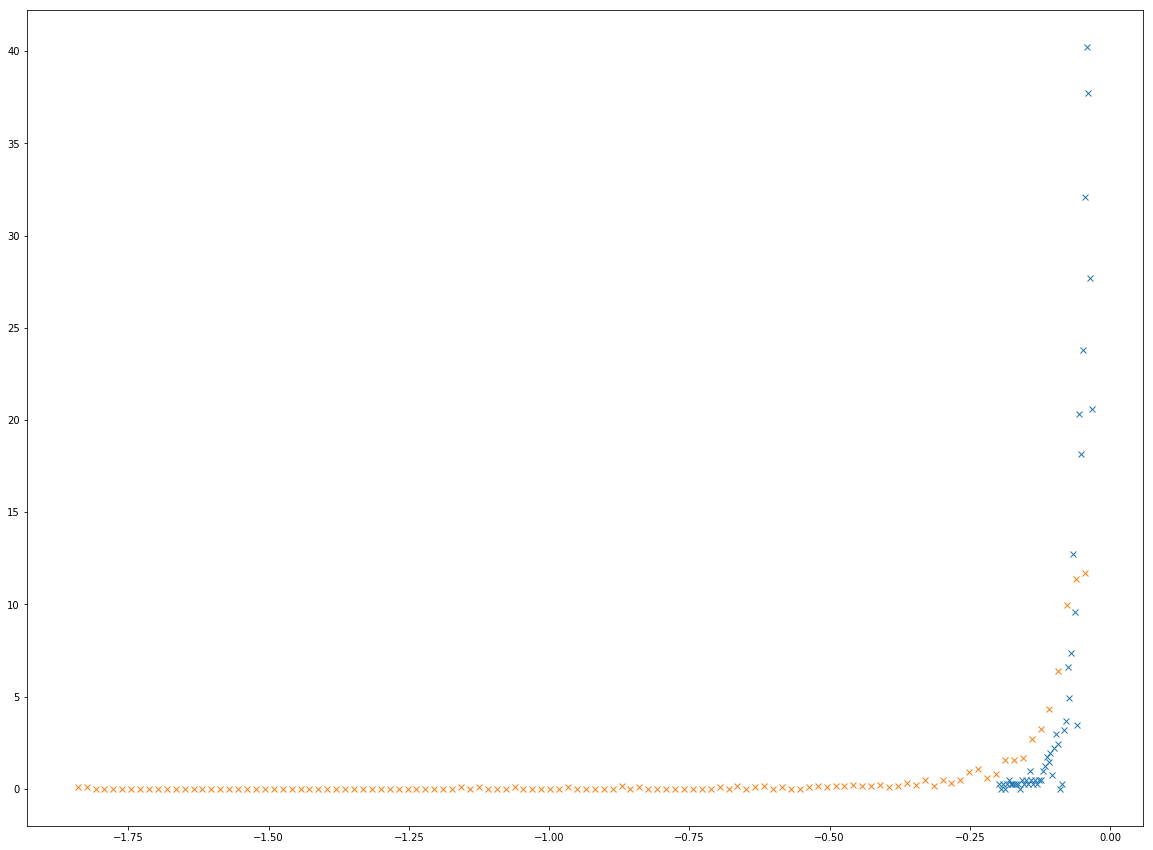

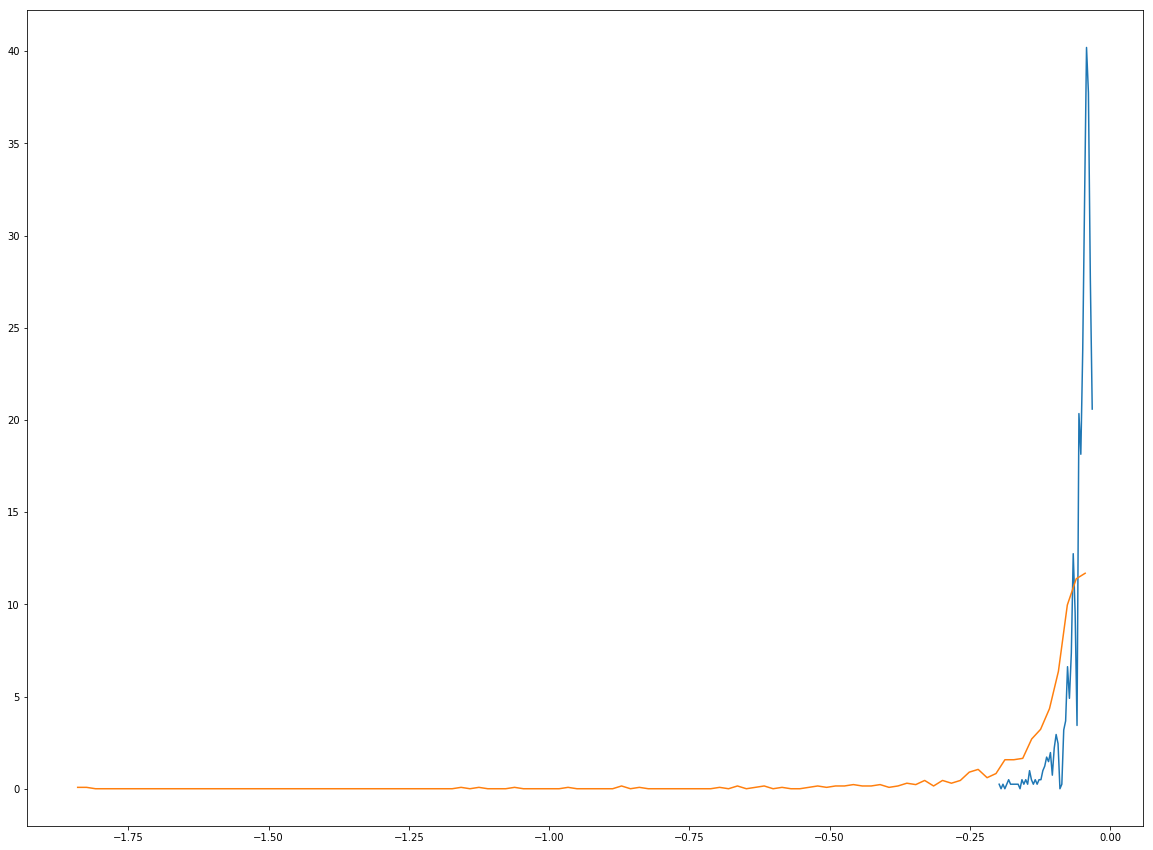




Geff_p
(103,)
(104,)
(103,)
(60,)
(61,)
(60,)
0.9214285714285724
0.9753803596127255


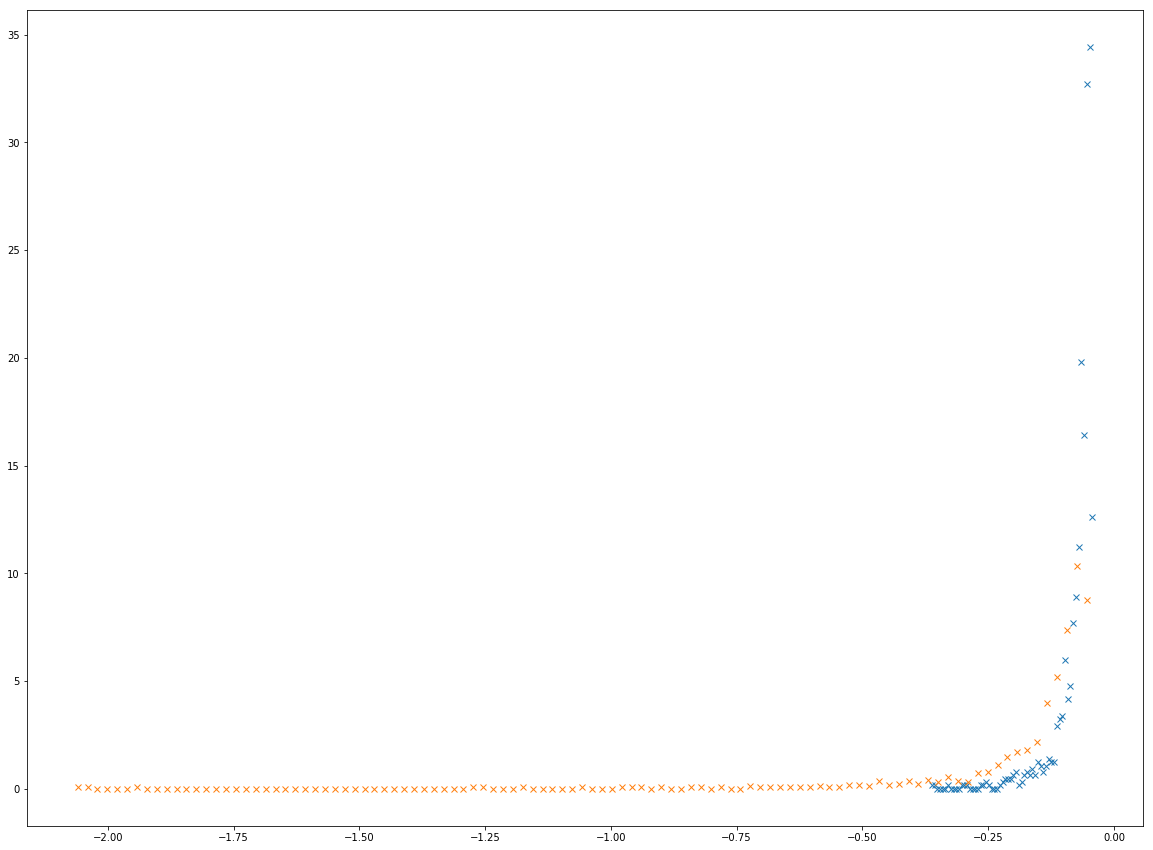

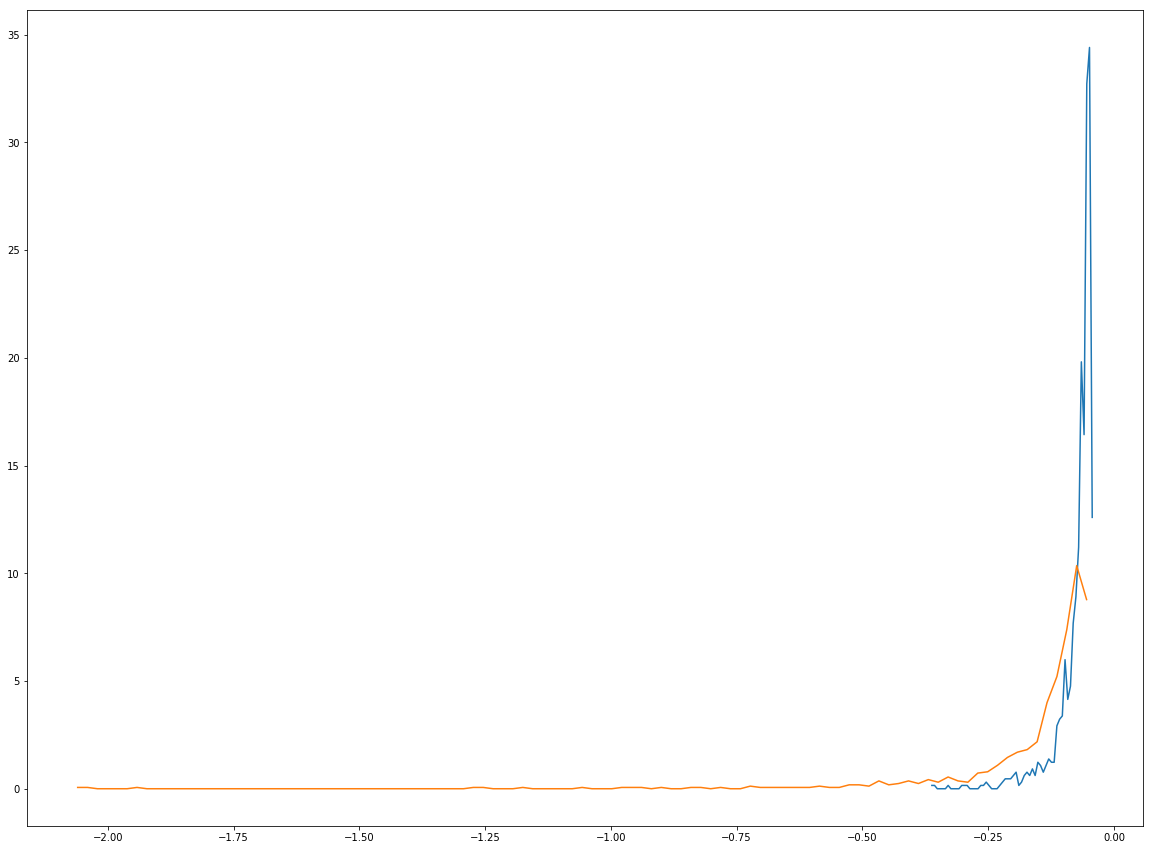




rms_r_n
(40,)
(41,)
(40,)
(50,)
(51,)
(50,)
0.9956349206349208
0.9966113416320884


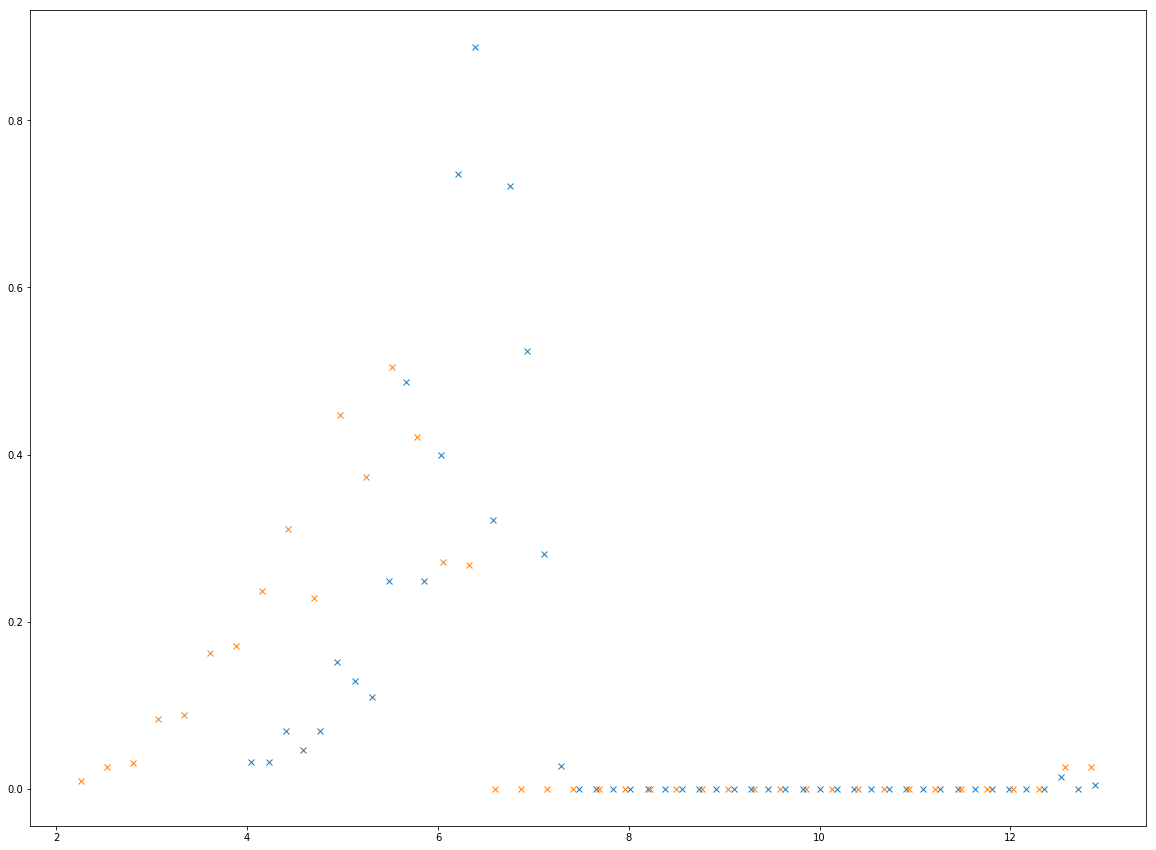

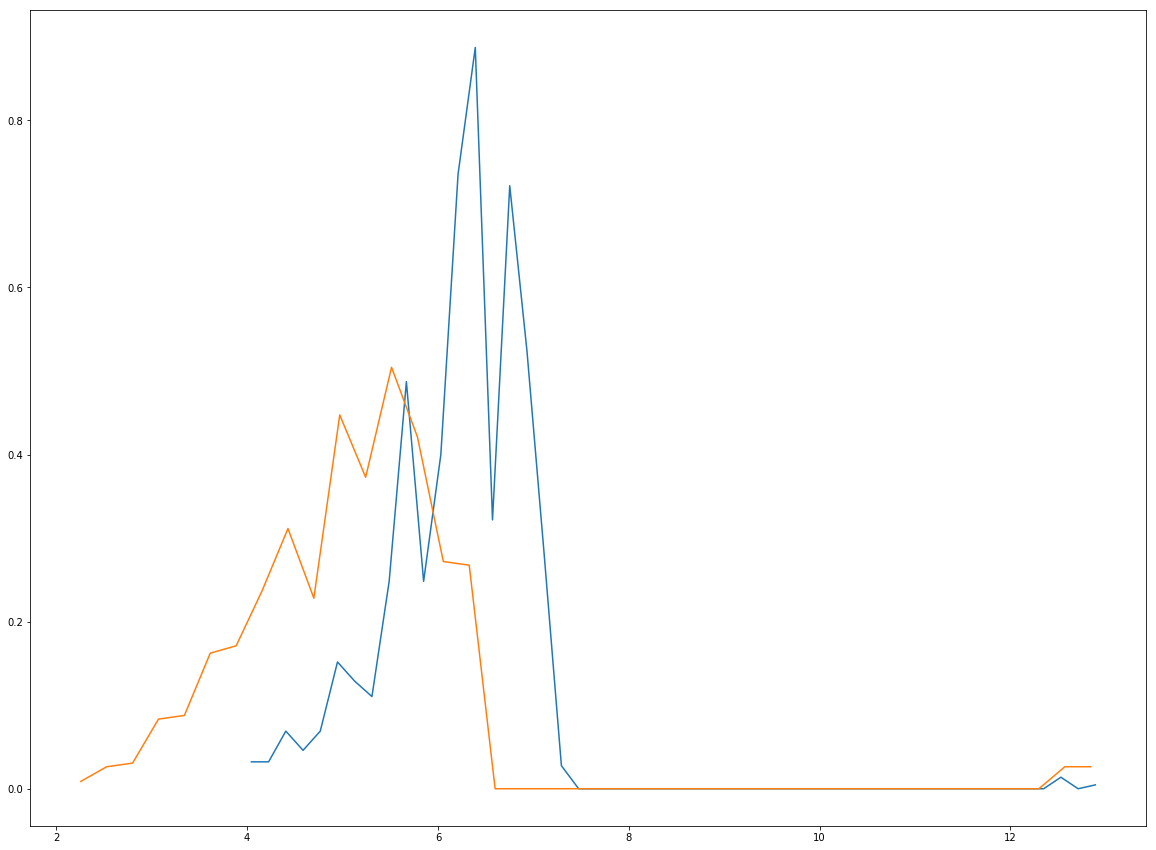




rms_r_p
(40,)
(41,)
(40,)
(55,)
(56,)
(55,)
0.9949404761904762
0.9538035961272479


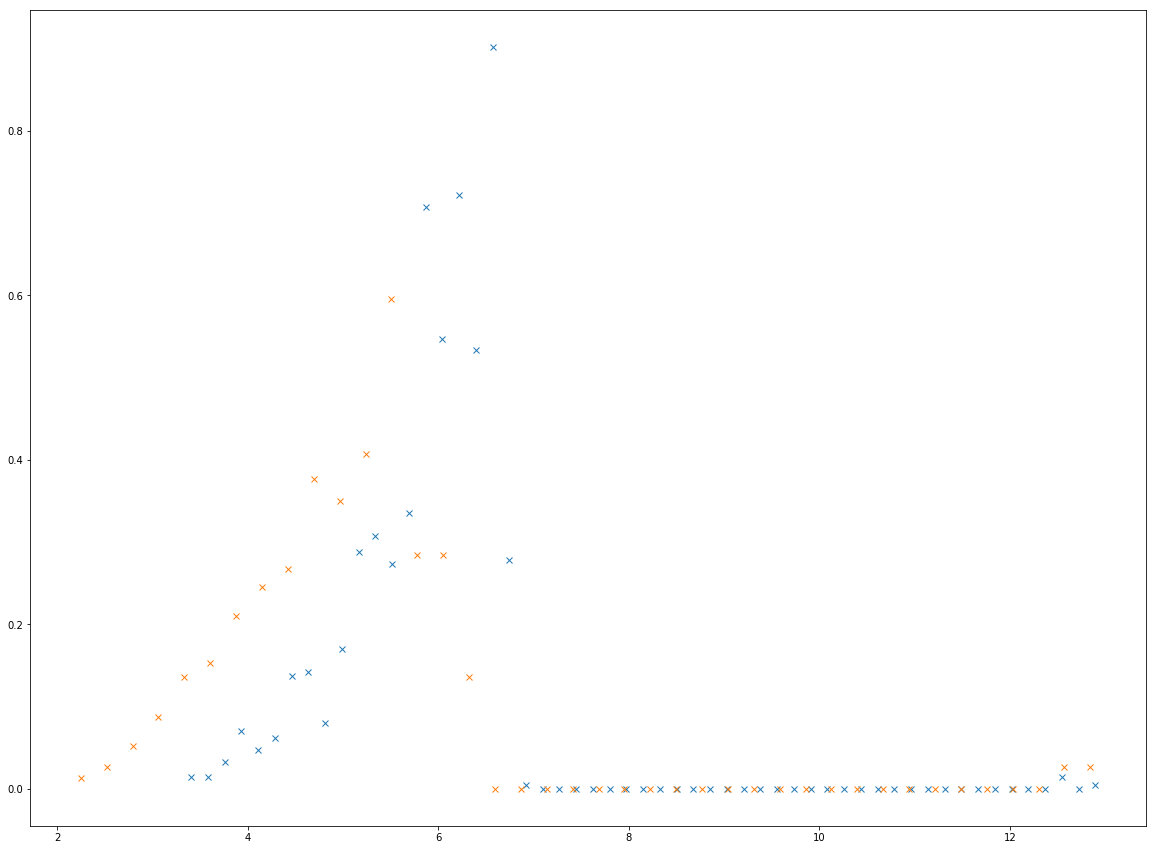

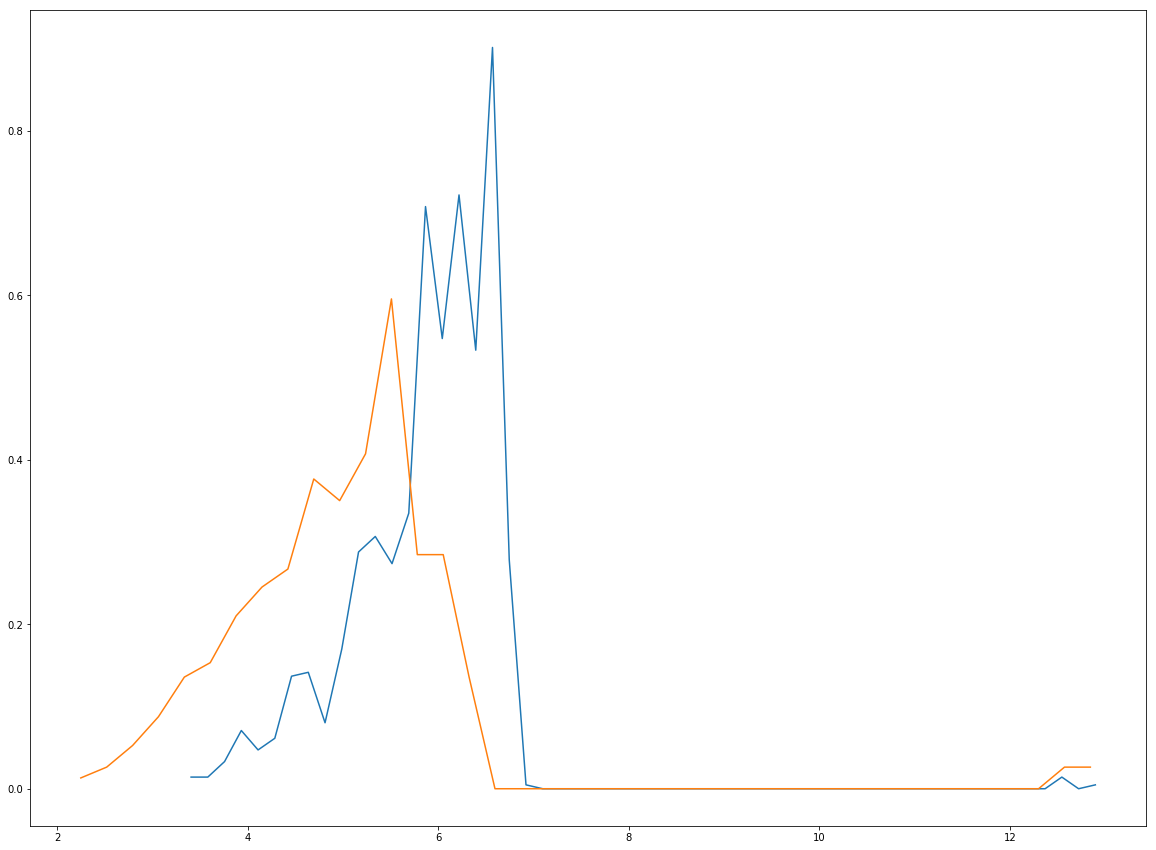




rms_r_t
(40,)
(41,)
(40,)
(51,)
(52,)
(51,)
0.9956349206349209
1.0016597510373448


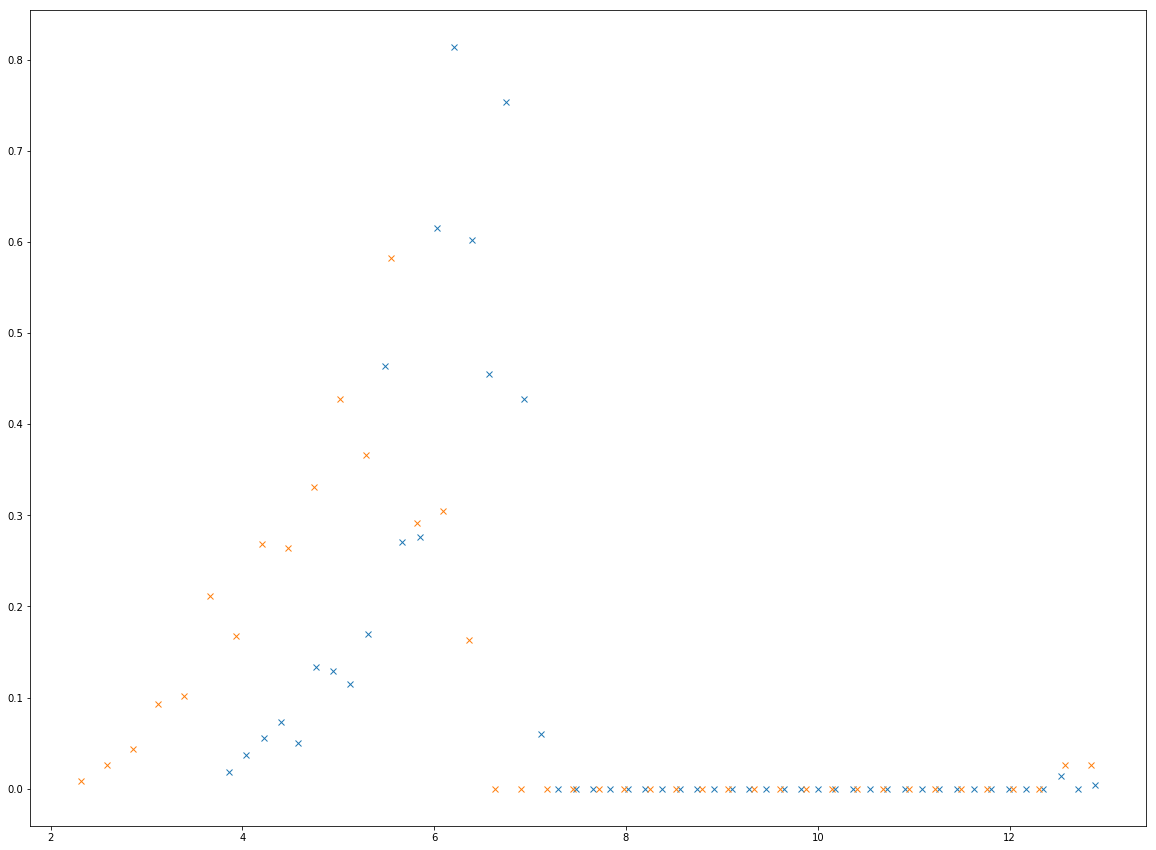

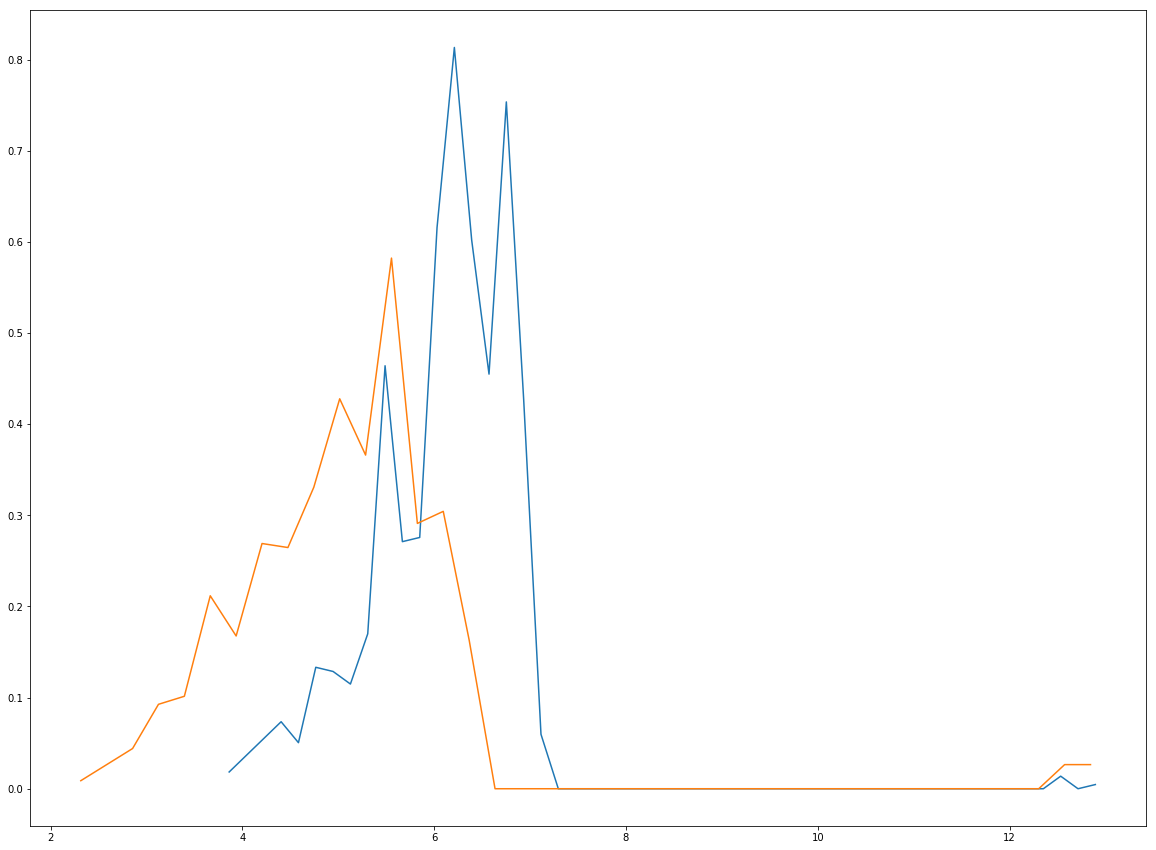




charge_r_p
(41,)
(42,)
(41,)
(55,)
(56,)
(55,)
0.9900793650793649
0.949930843706777


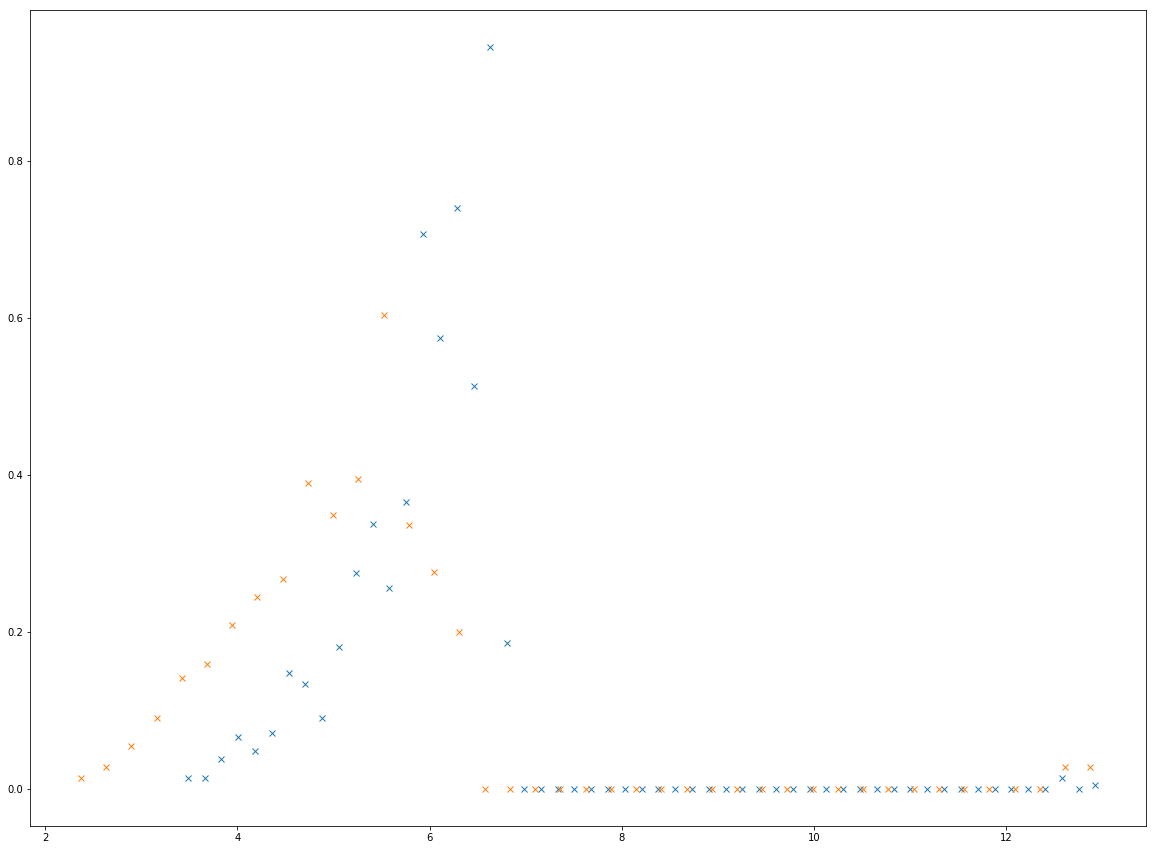

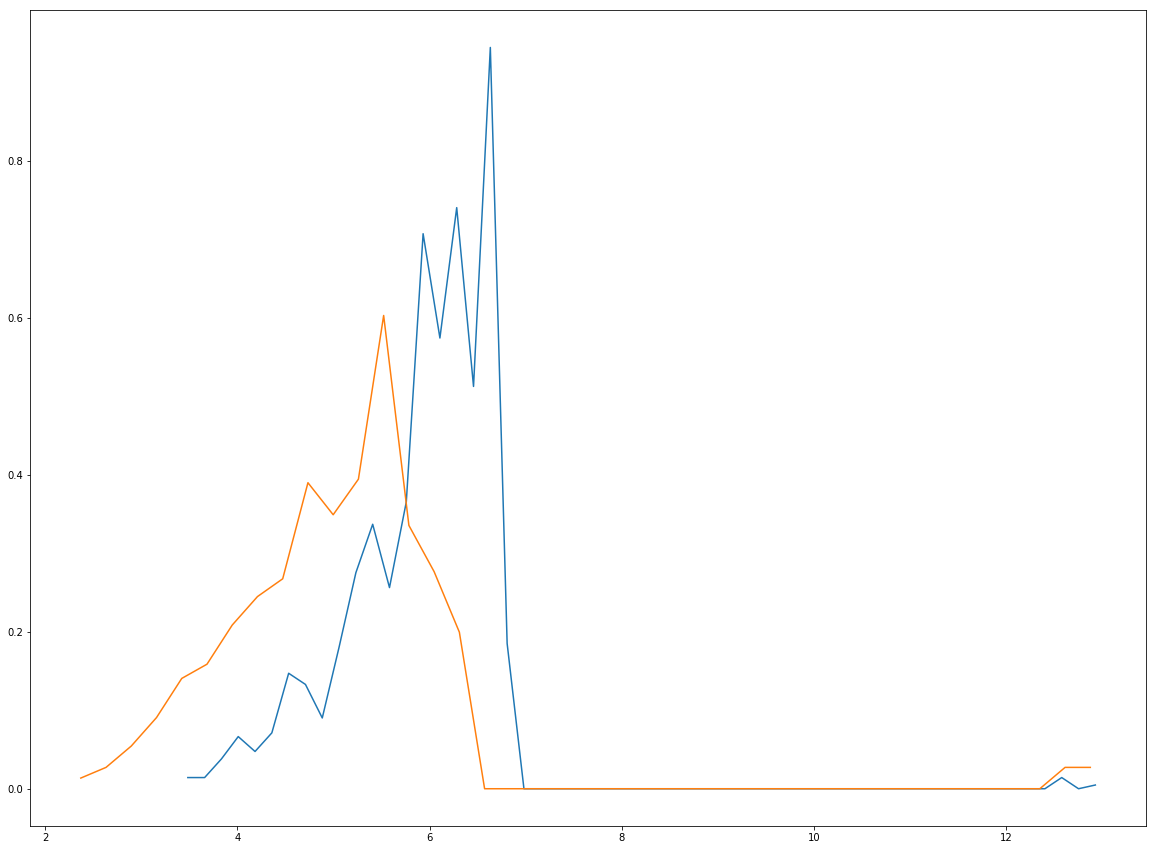




charge_r_t
(18,)
(19,)
(18,)
(22,)
(23,)
(22,)
0.9770833333333334
0.9730290456431536


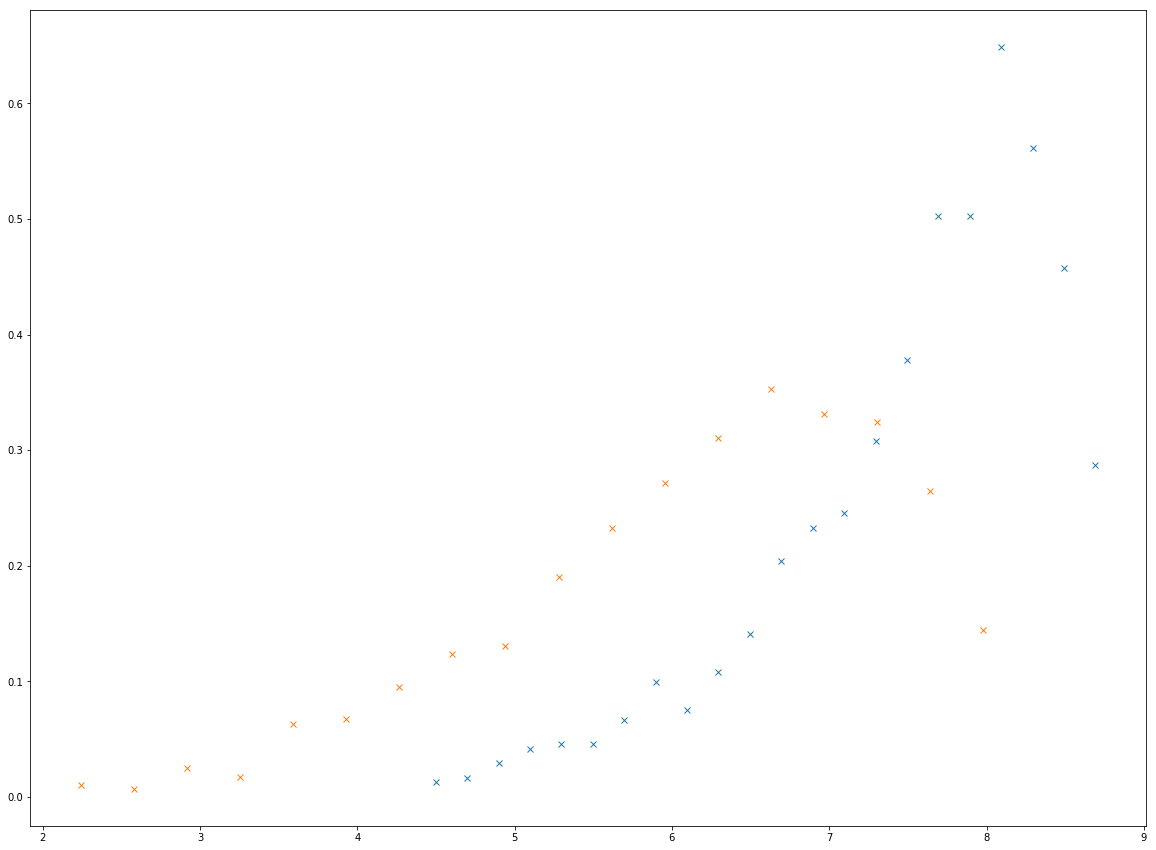

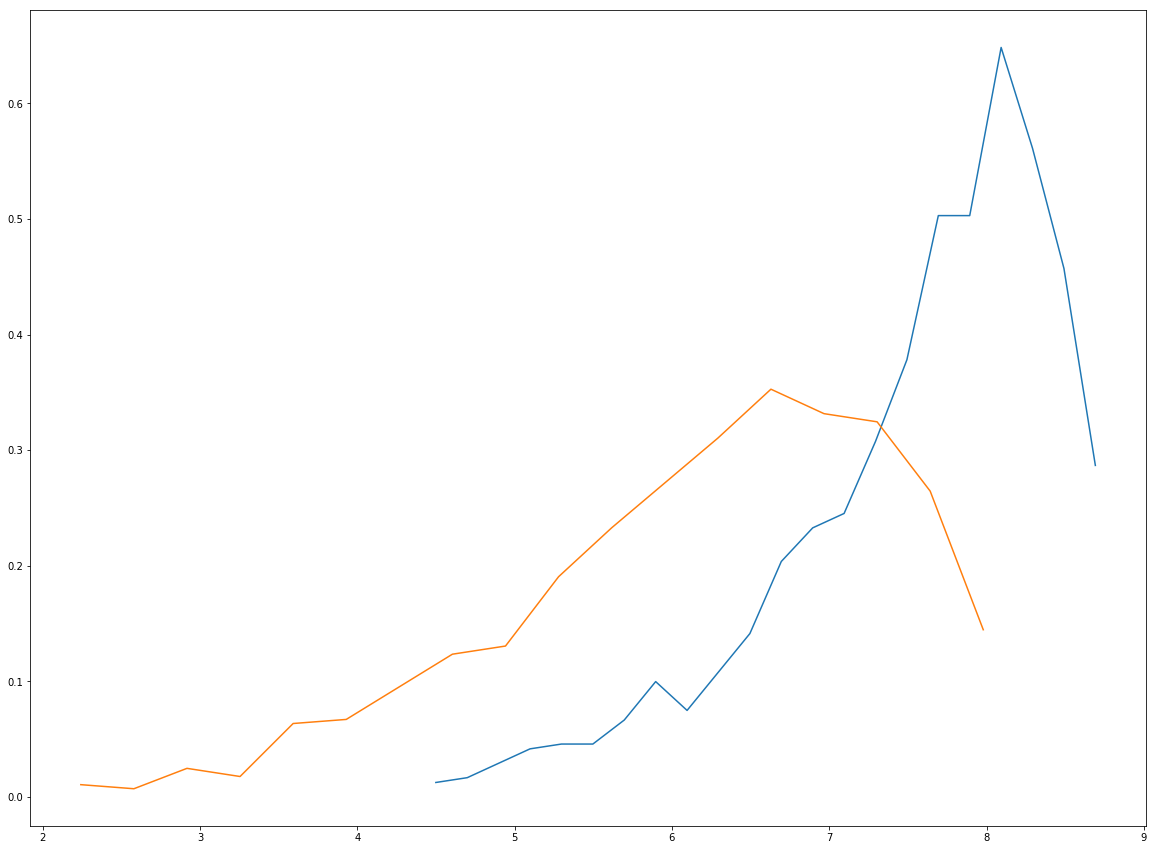




beta2_n
(32,)
(33,)
(32,)
(41,)
(42,)
(41,)
0.9766865079365081
1.0652835408022125


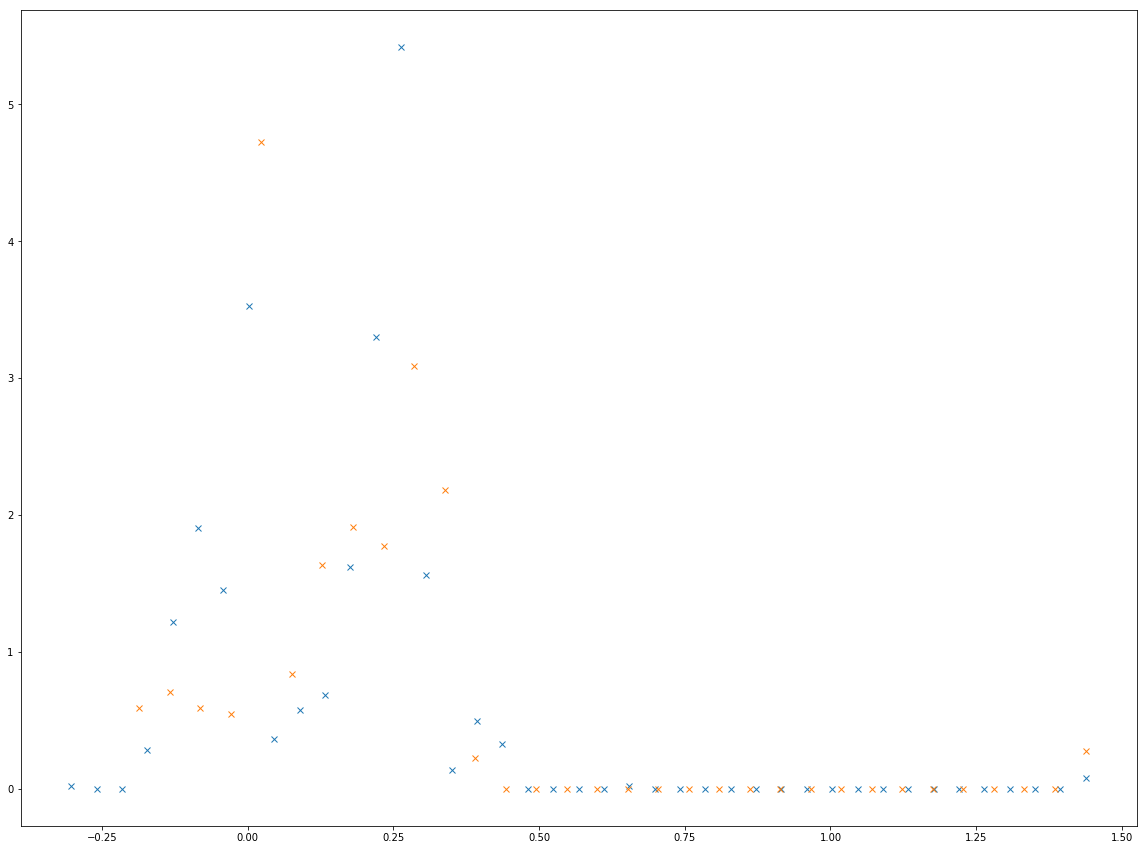

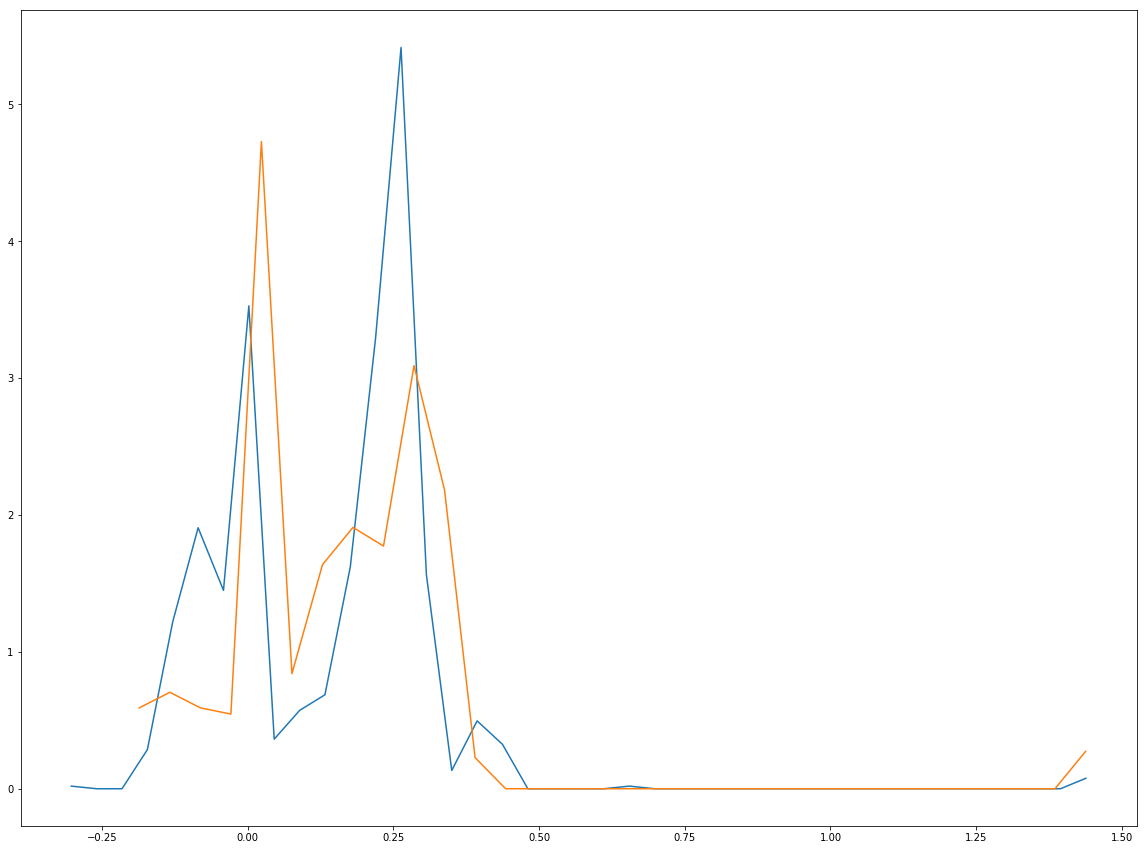




beta2_p
(30,)
(31,)
(30,)
(37,)
(38,)
(37,)
0.9798611111111111
1.0370677731673583


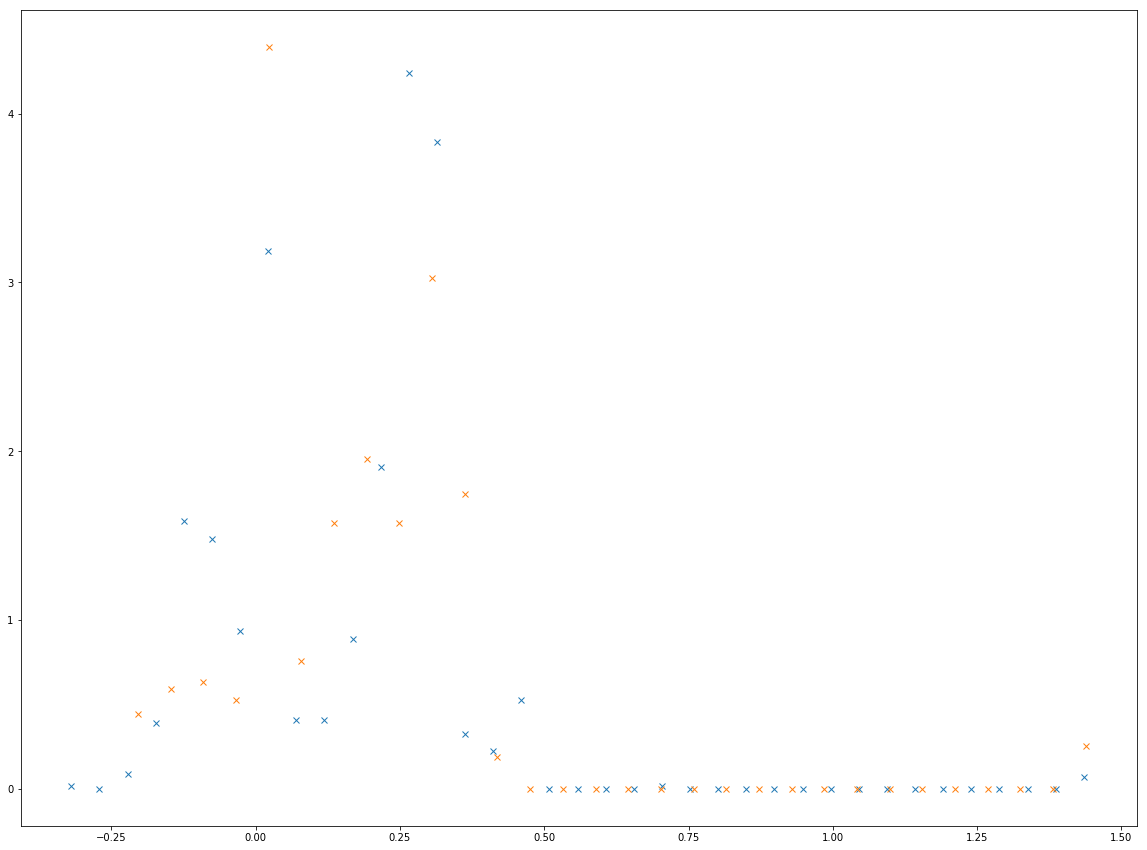

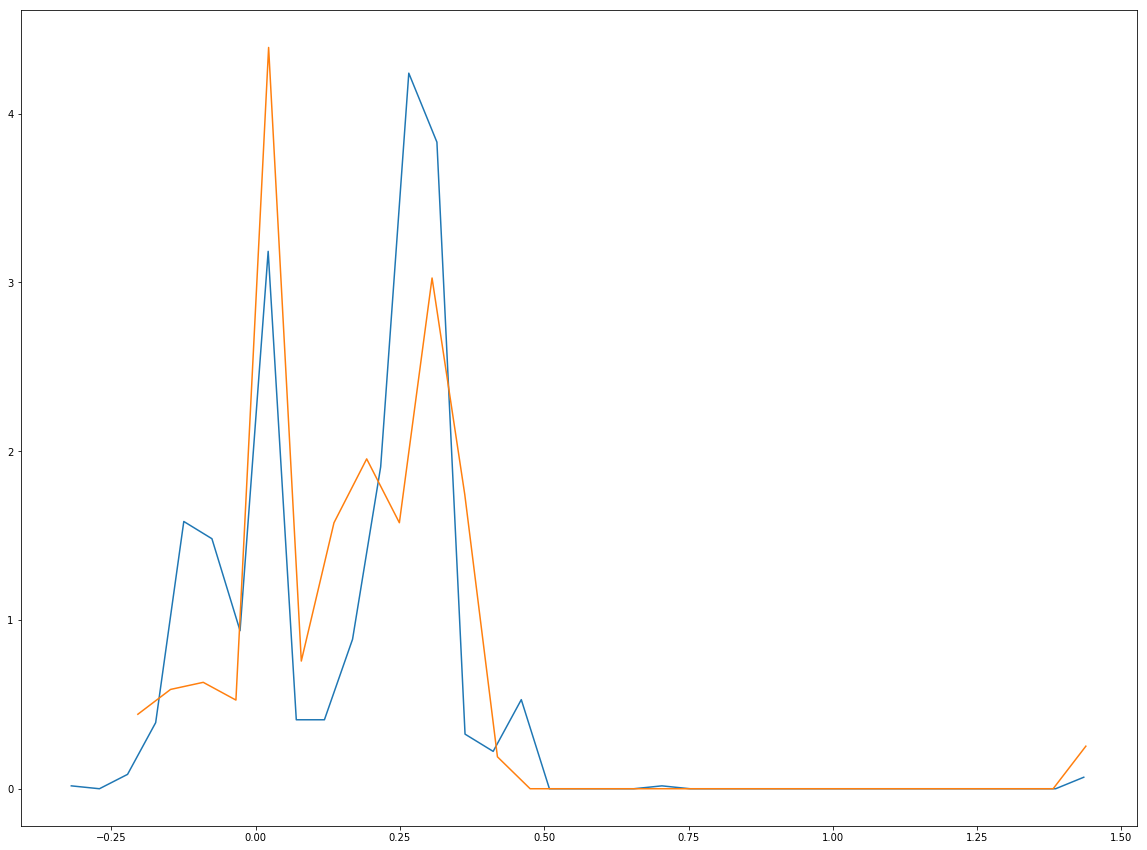




beta2_t
(31,)
(32,)
(31,)
(40,)
(41,)
(40,)
0.9174603174603175
0.997579529737206


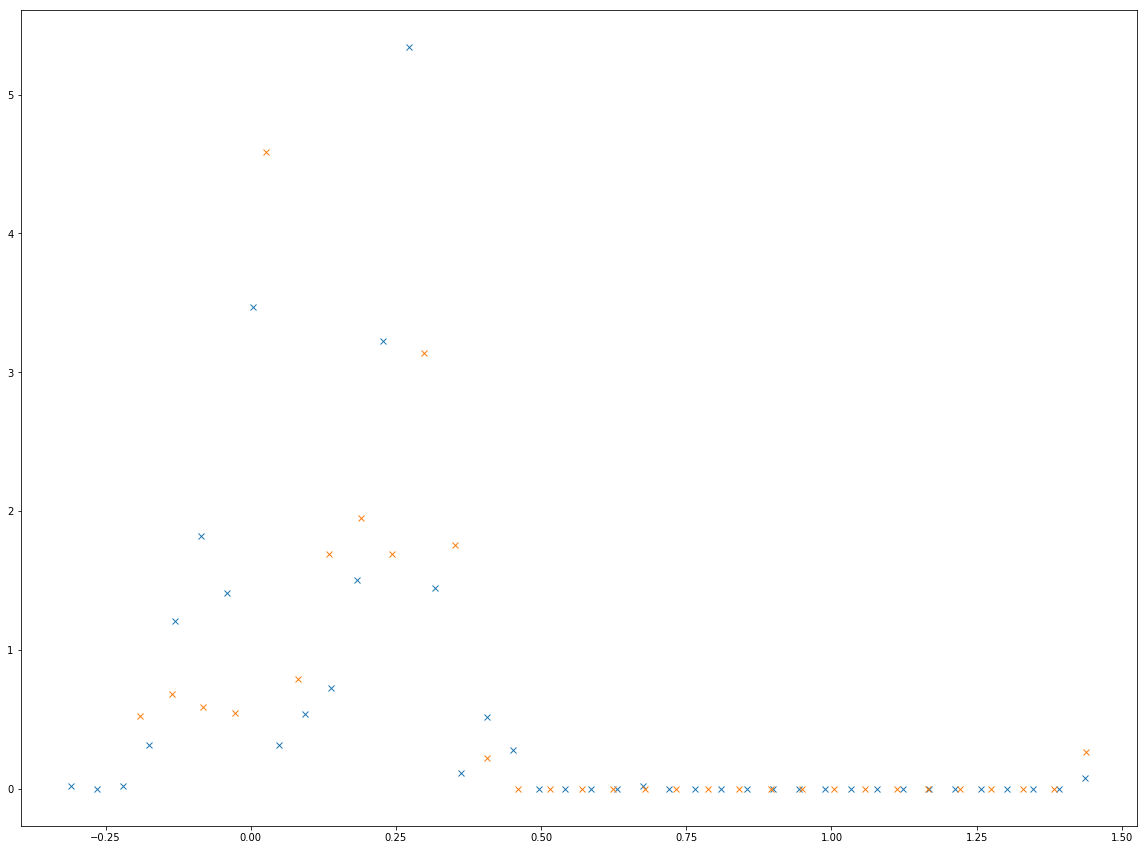

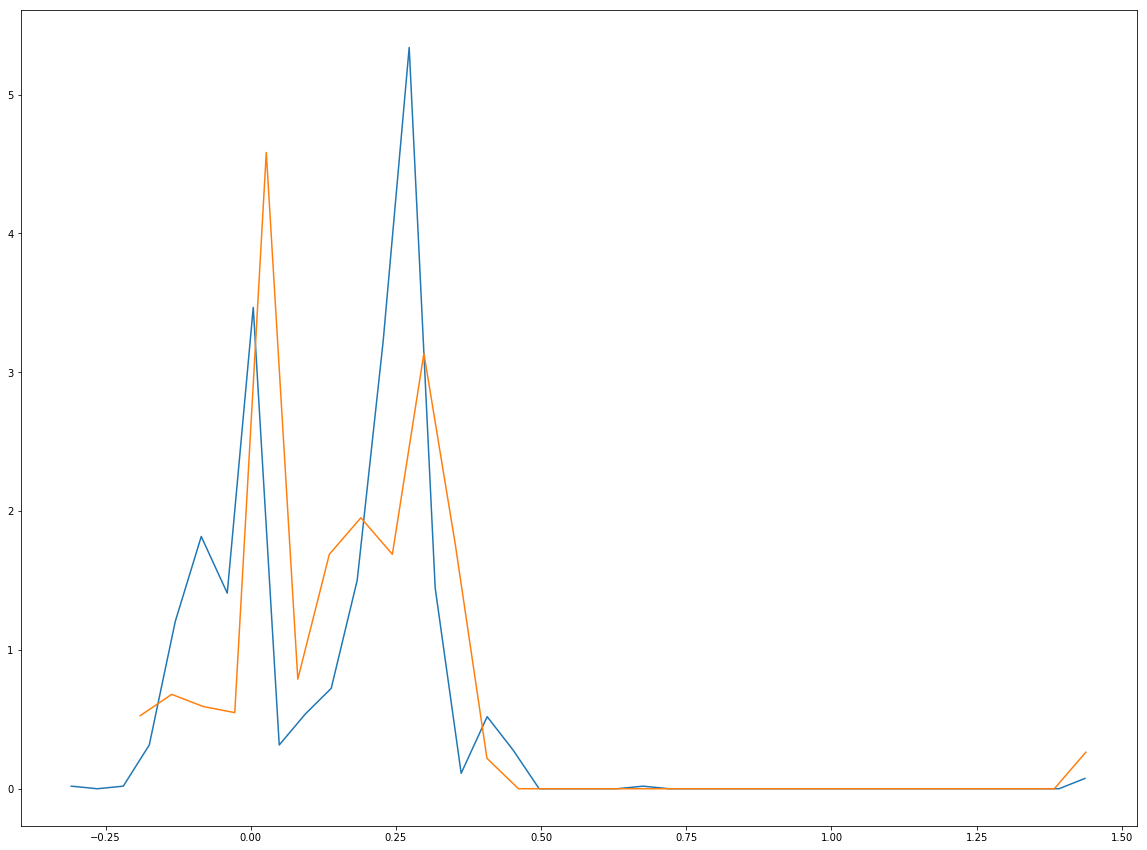




dipole_n
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


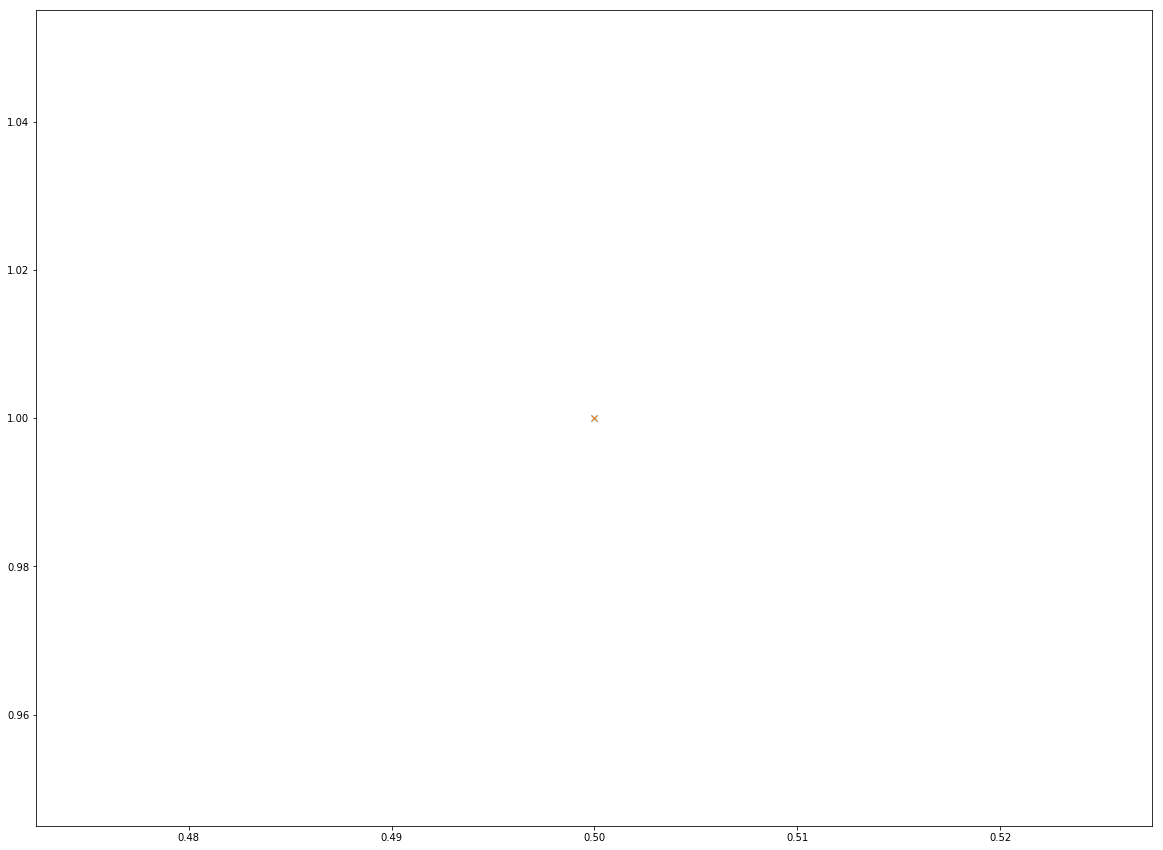

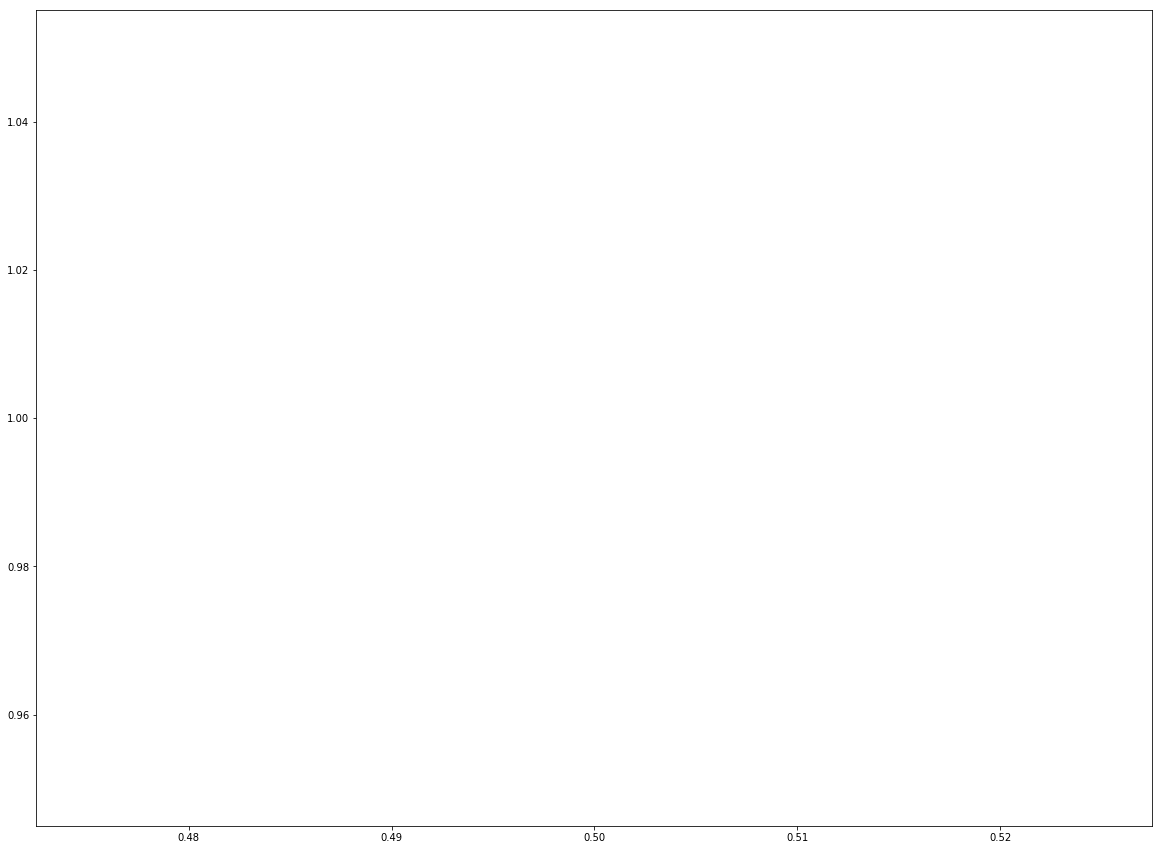




dipole_p
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


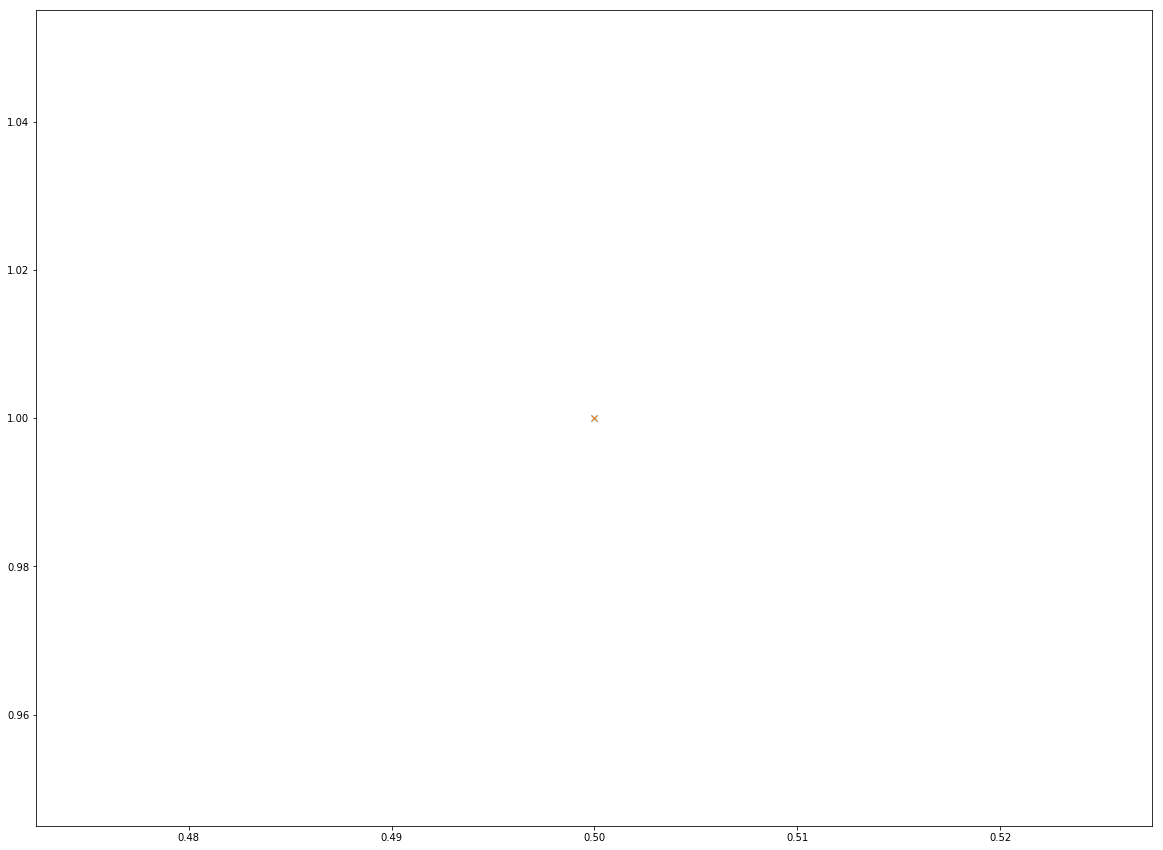

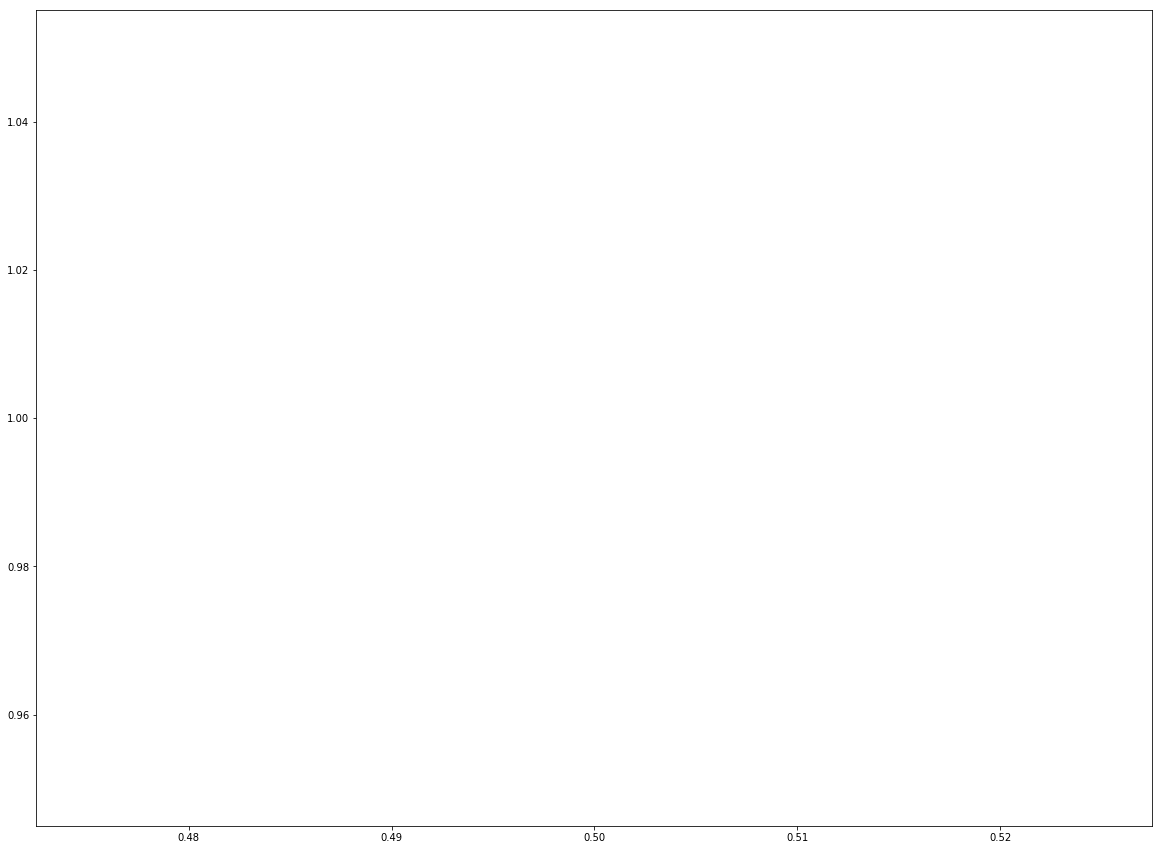




quadpole_n
(106,)
(107,)
(106,)
(67,)
(68,)
(67,)
0.9973214285714286
0.9659751037344398


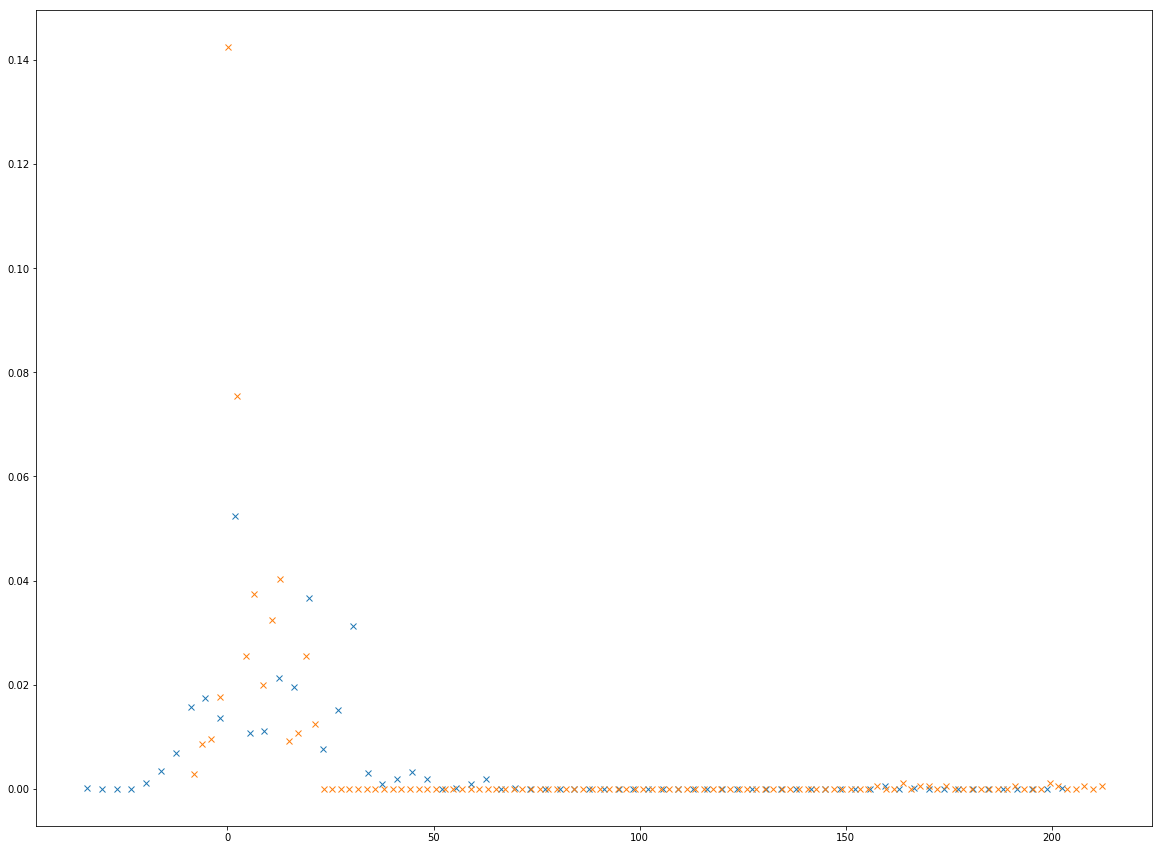

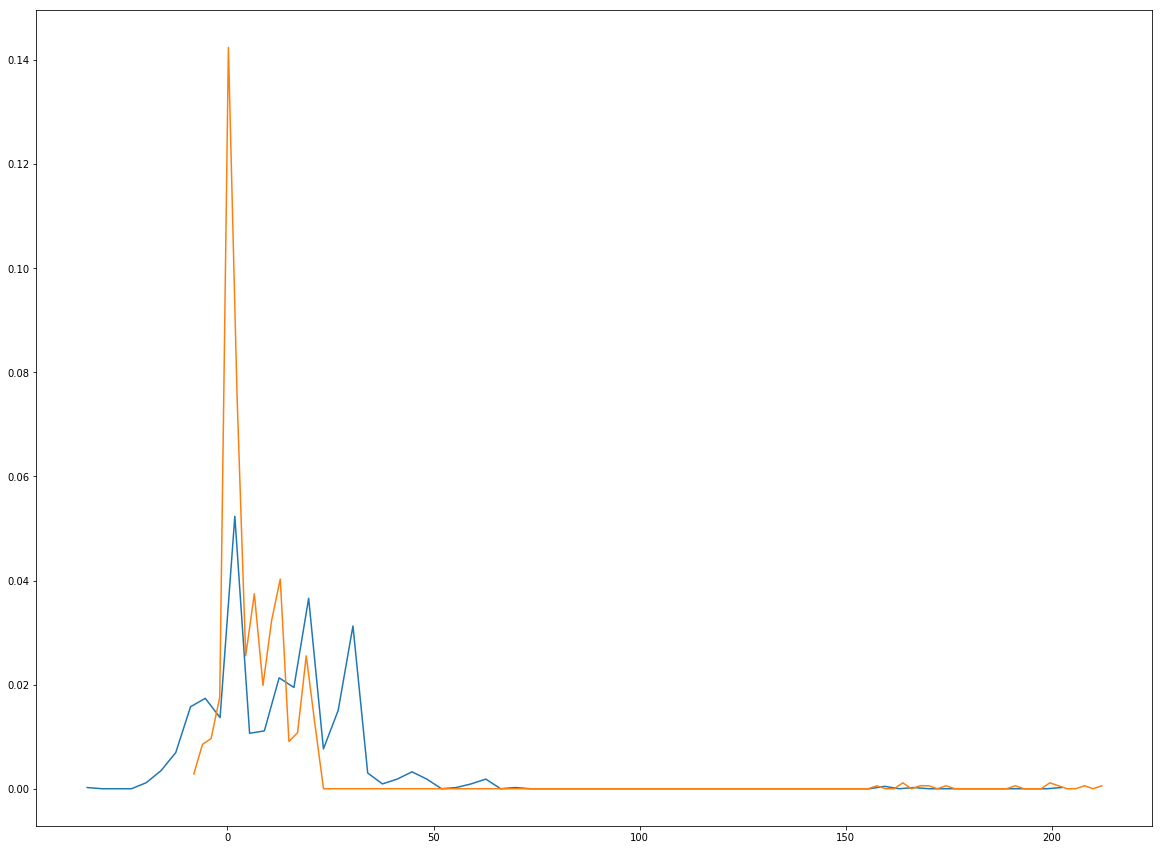




quadpole_p
(132,)
(133,)
(132,)
(99,)
(100,)
(99,)
0.9938492063492064
0.9073305670816045


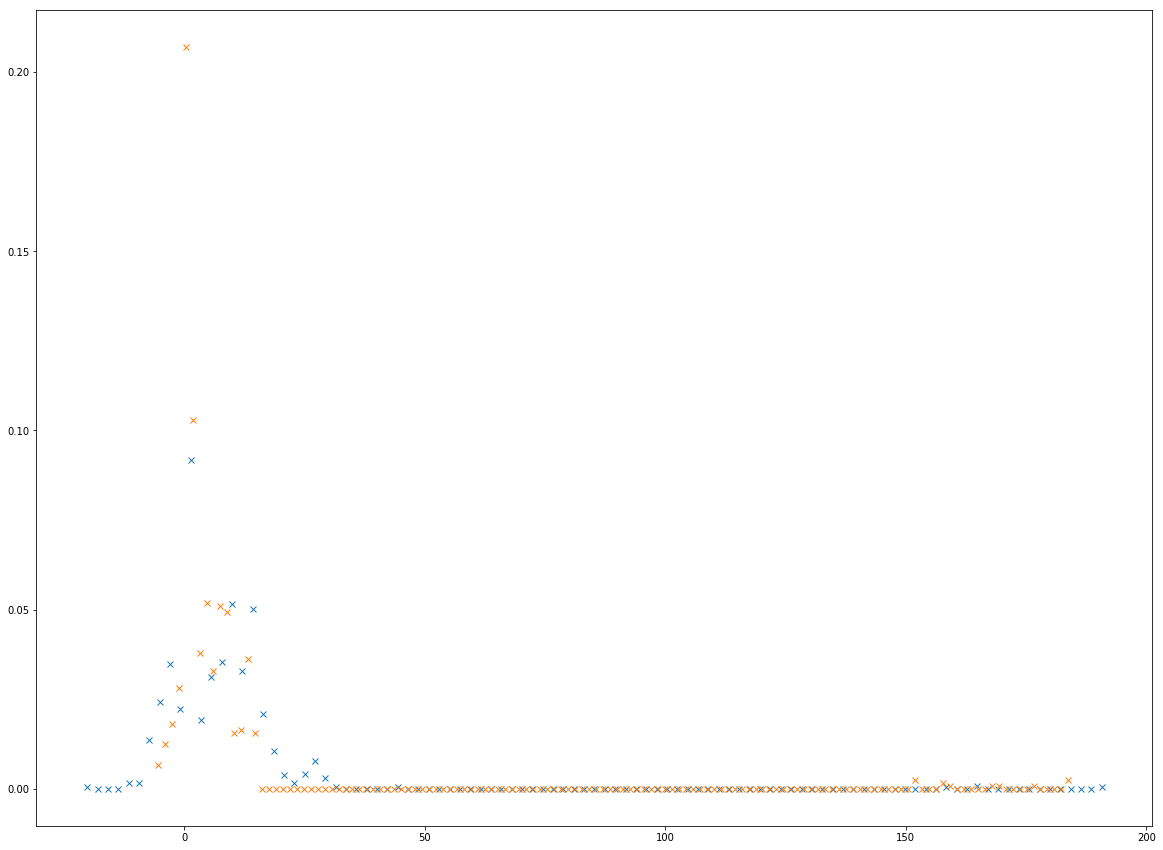

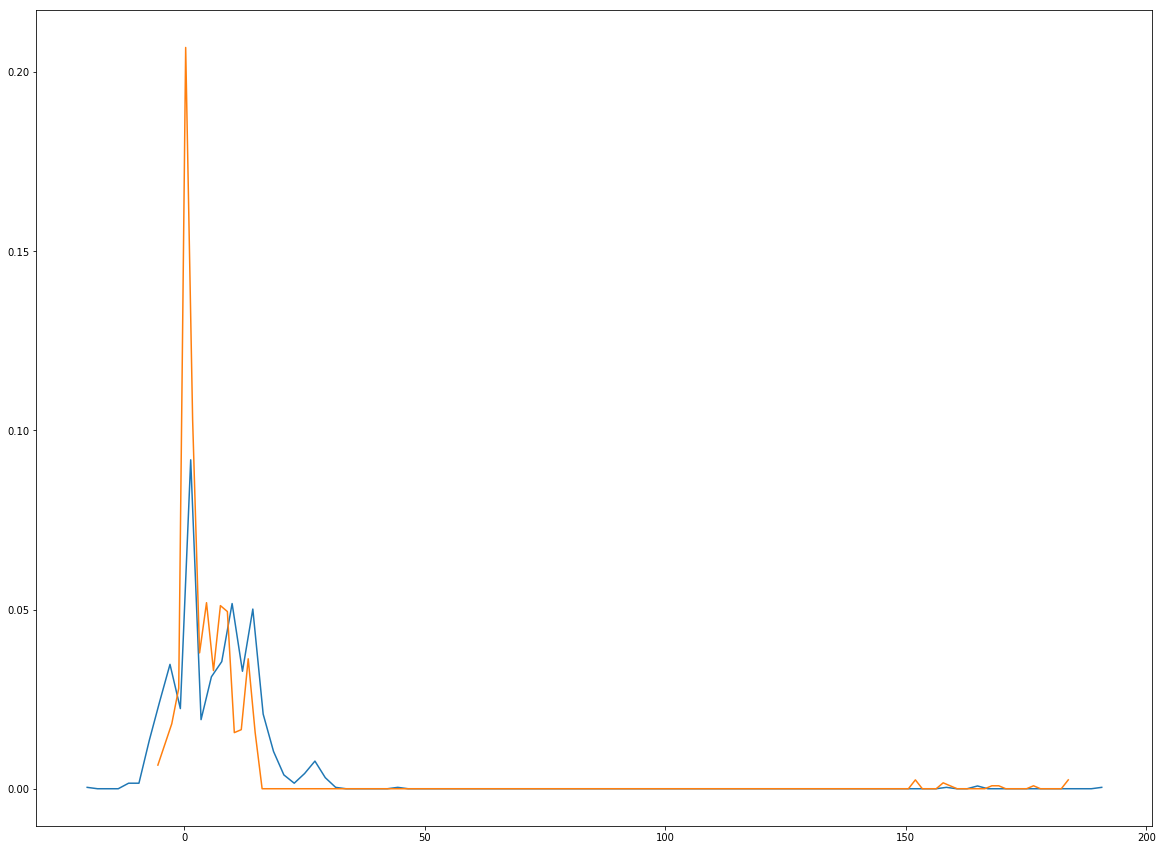




octpole_n
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


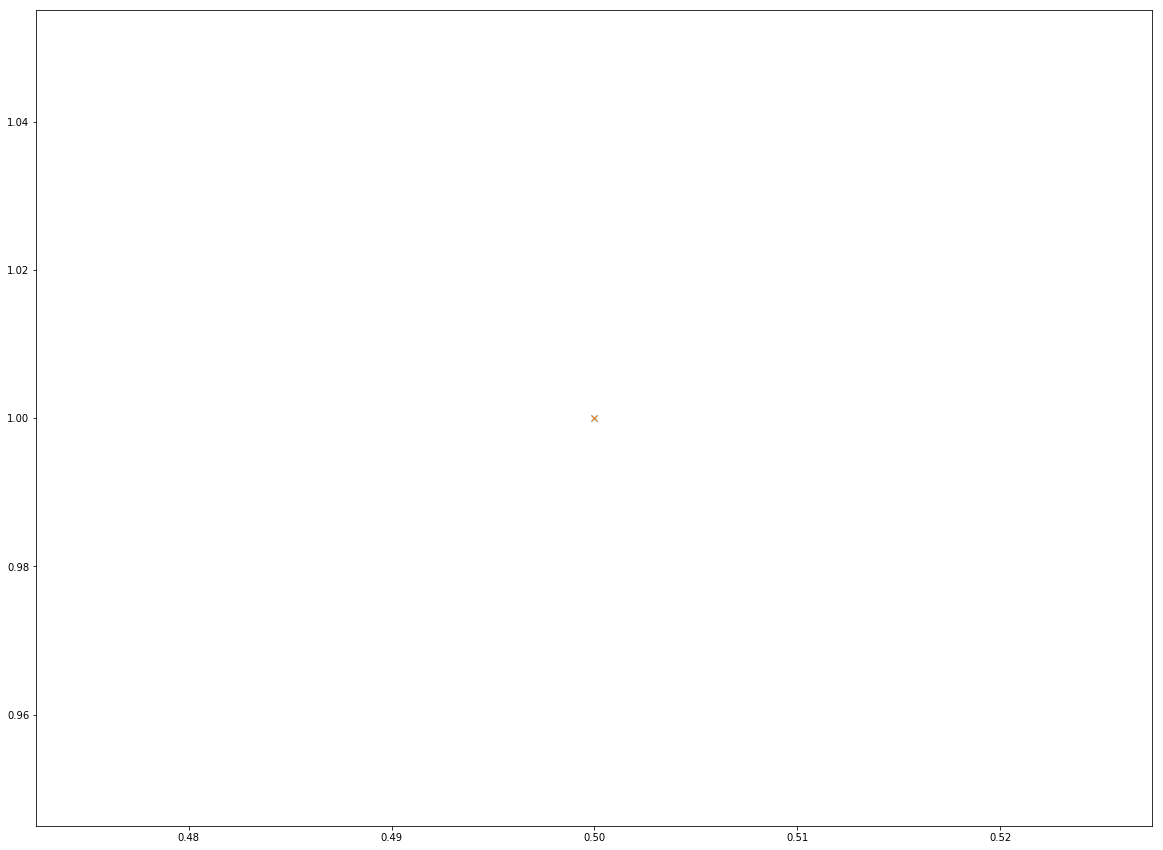

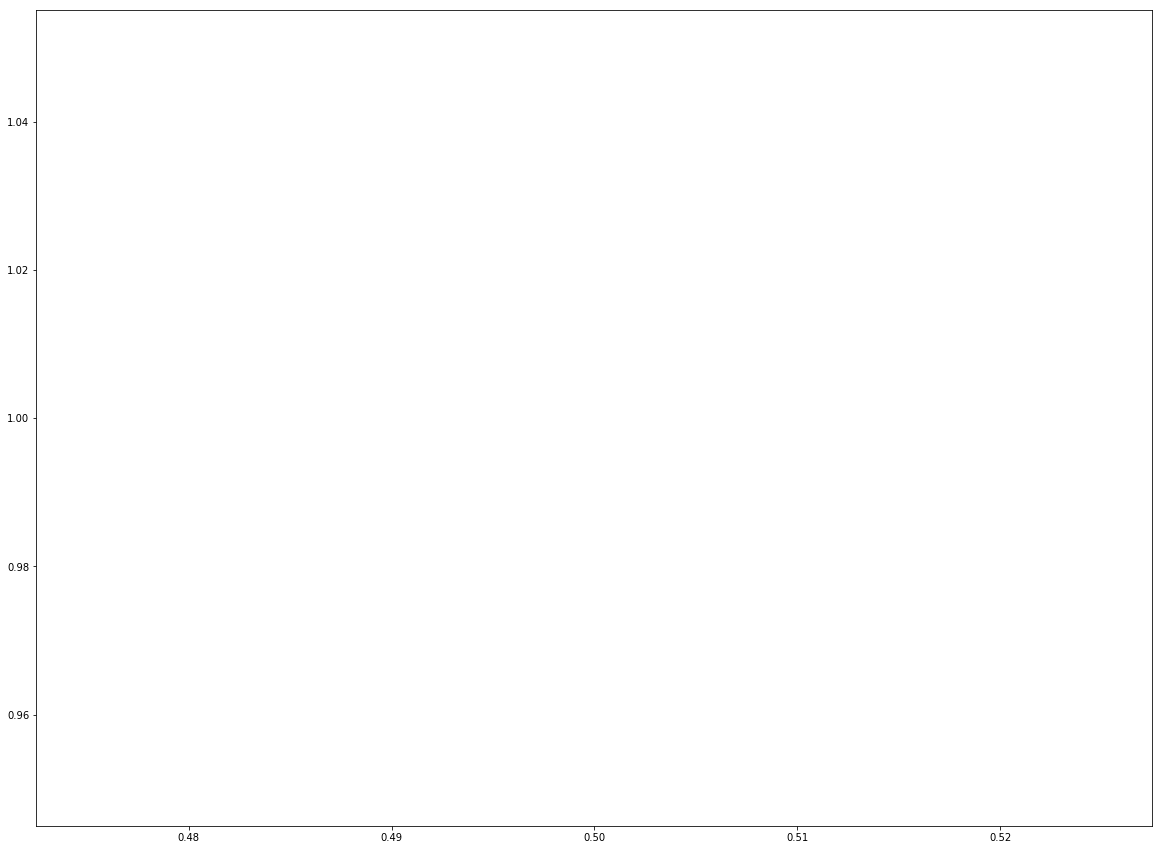




octpole_p
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


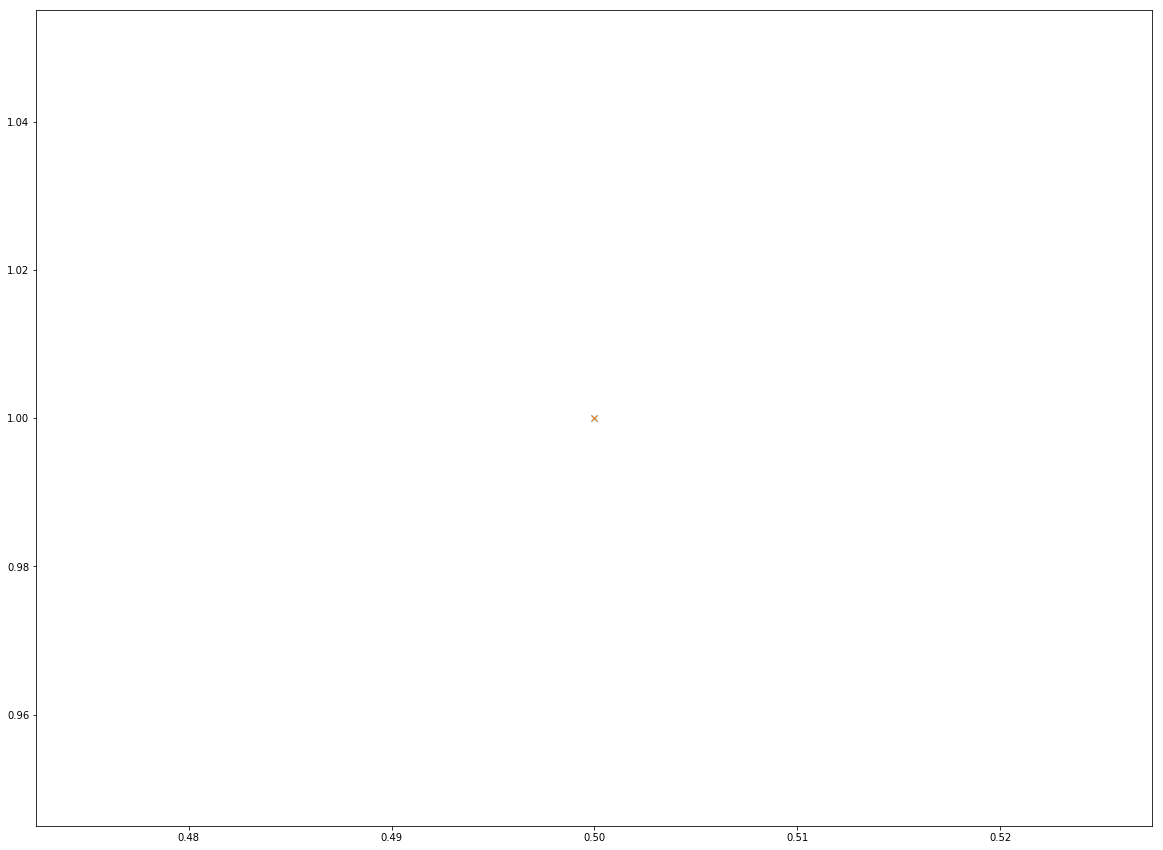

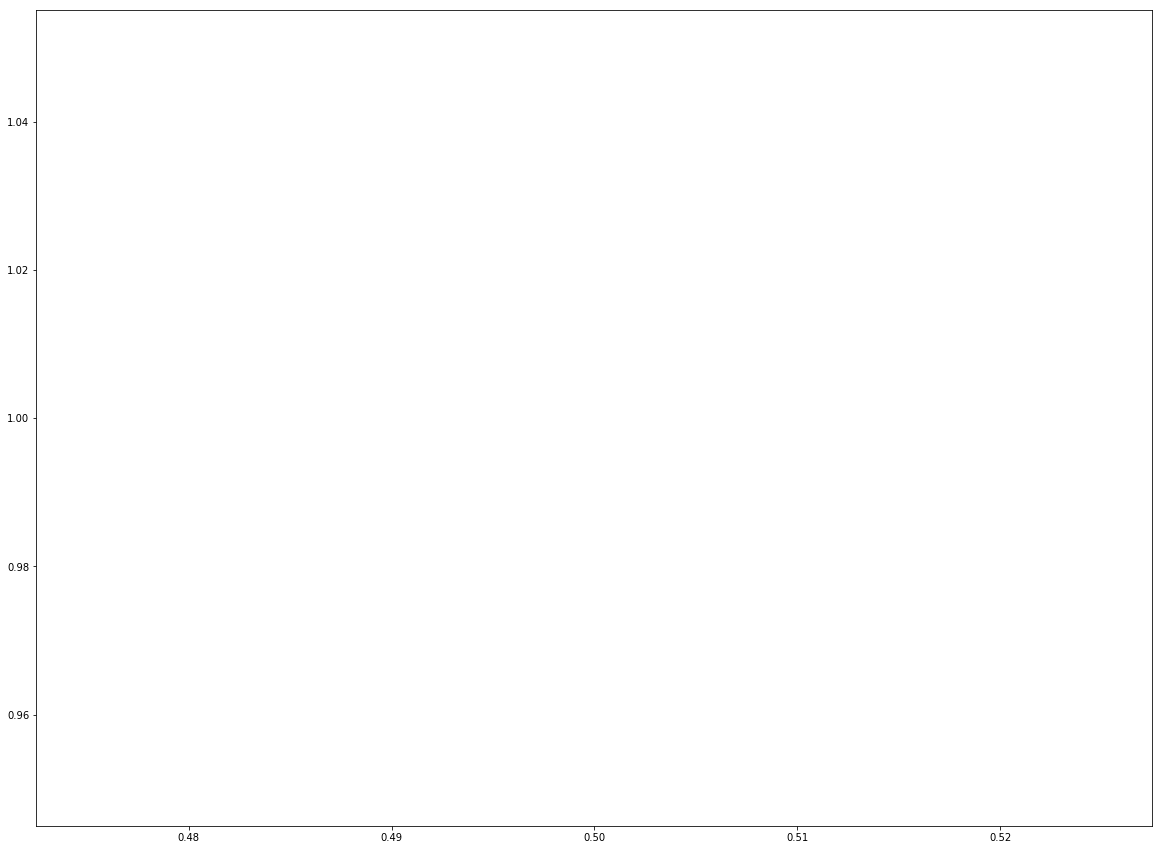




hexdpole_n
(2727,)
(2728,)
(2727,)
(725,)
(726,)
(725,)
0.8928571428571418
1.0591977869986167


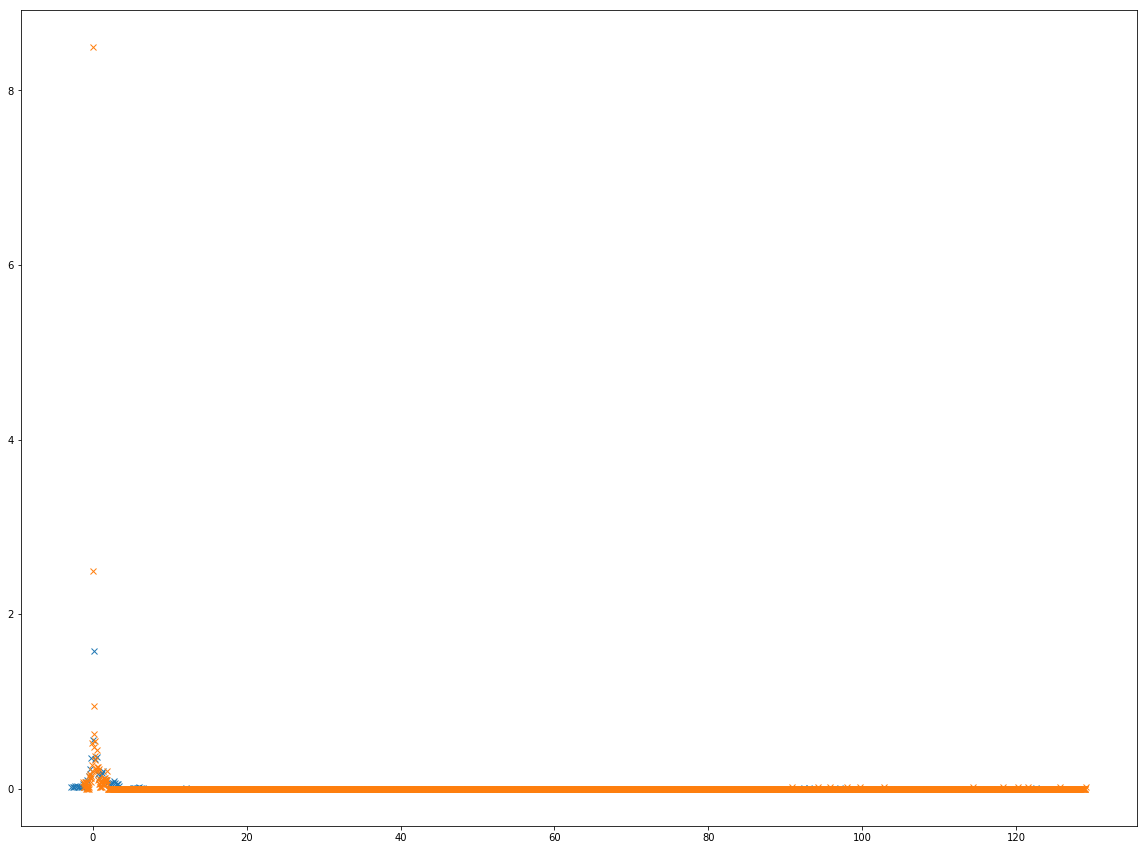

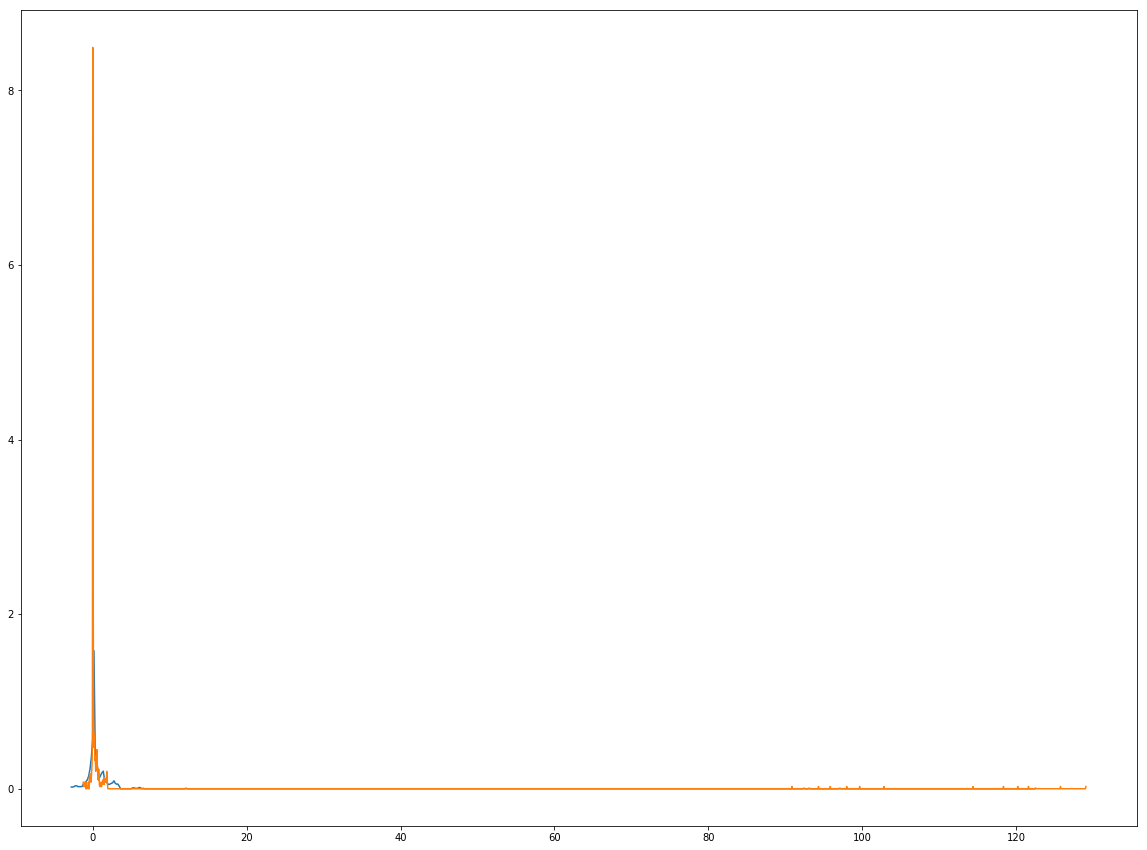




hexdpole_p
(3559,)
(3560,)
(3559,)
(1458,)
(1459,)
(1458,)
1.115476190476192
0.997856154910097


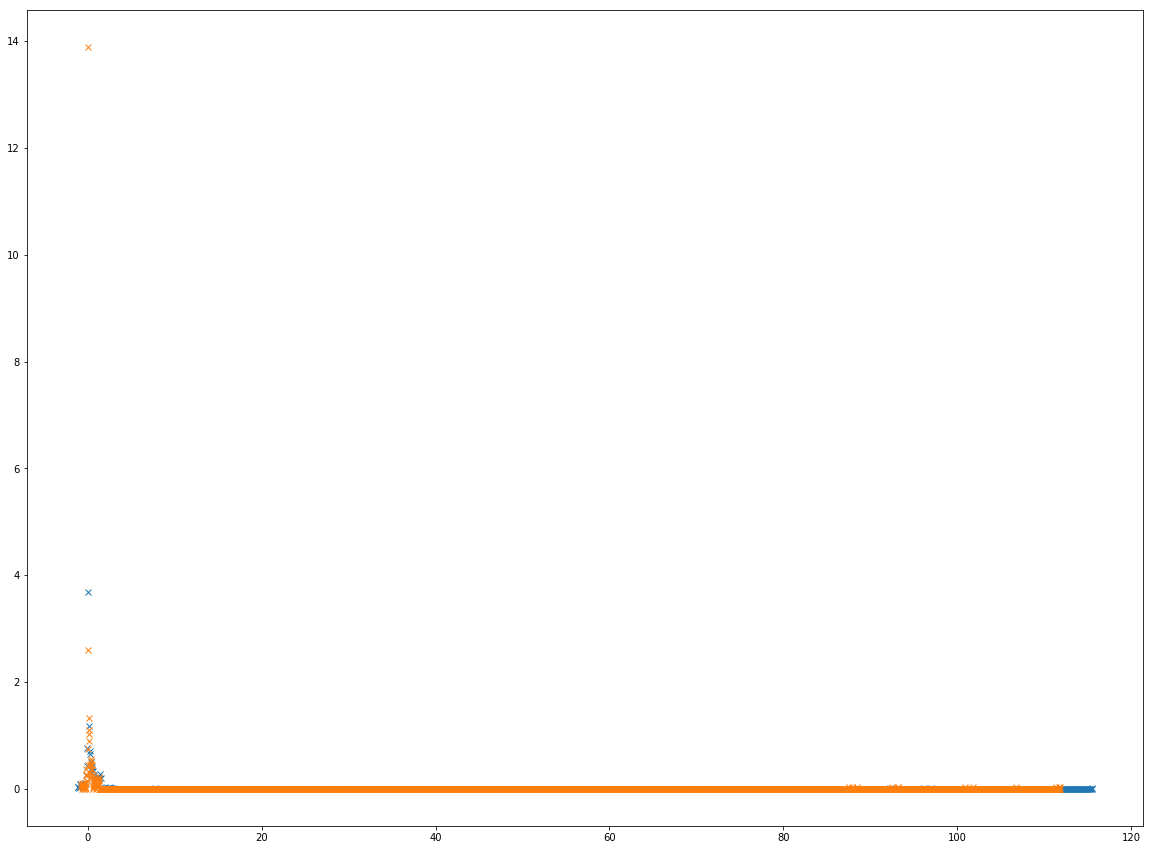

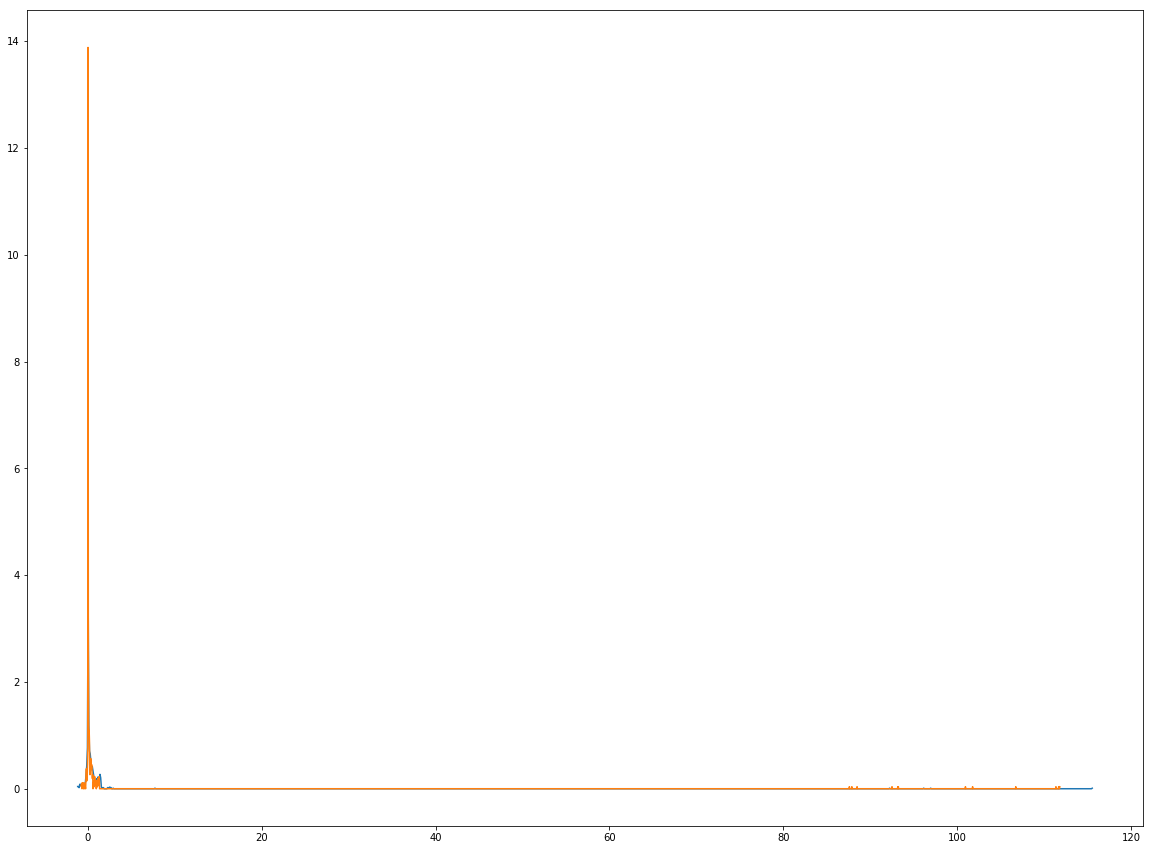




q5_n
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


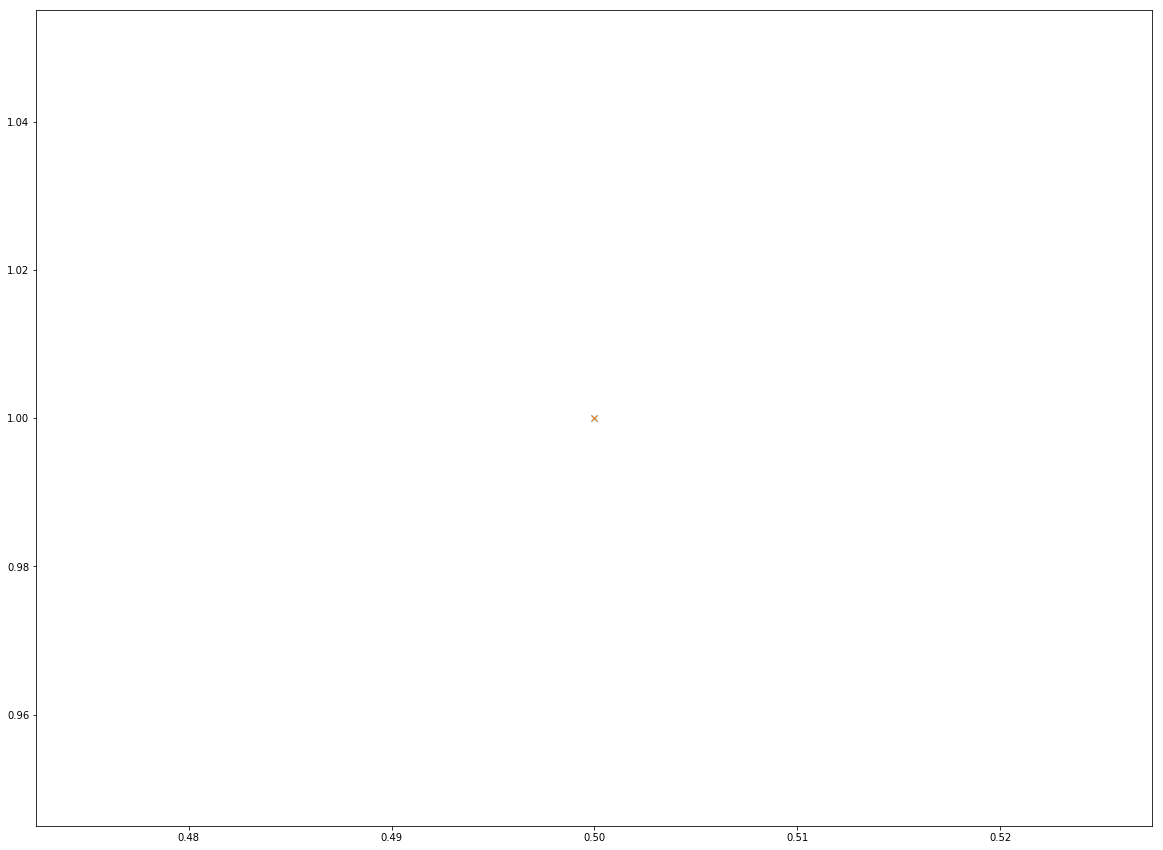

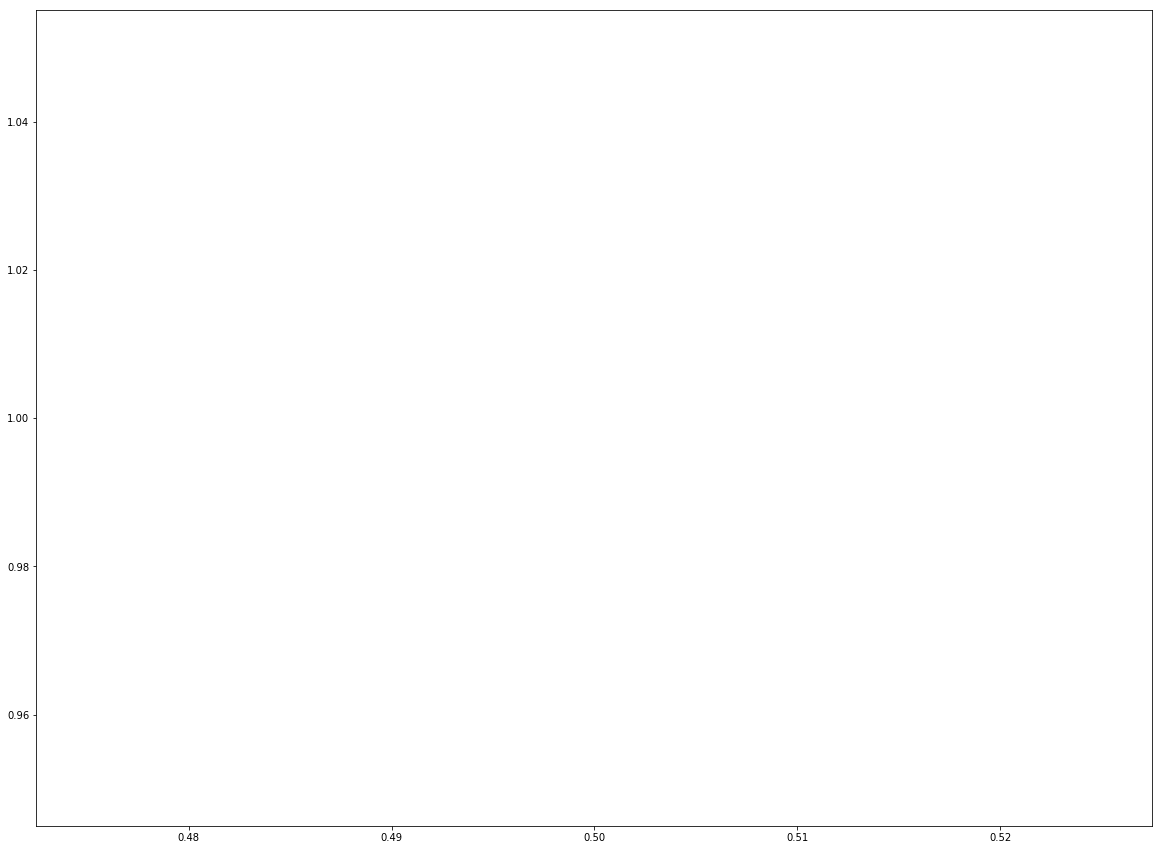




q5_p
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


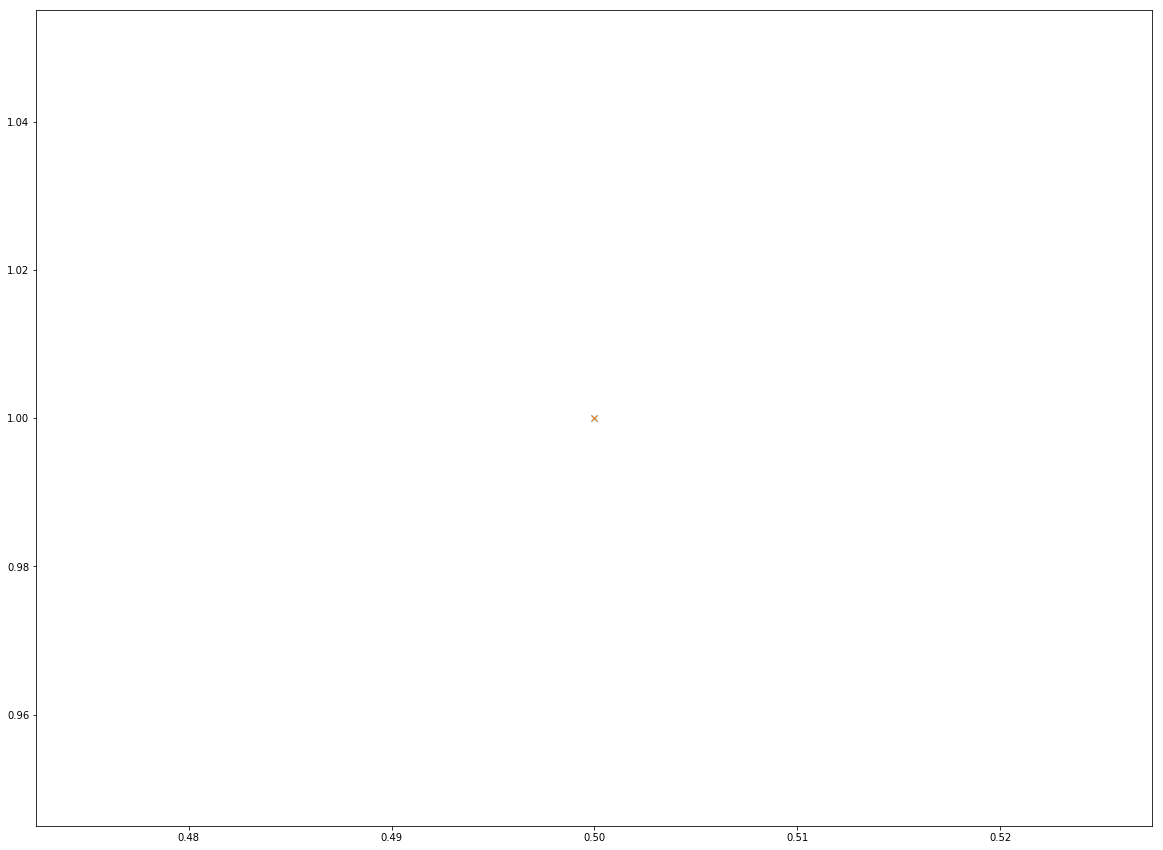

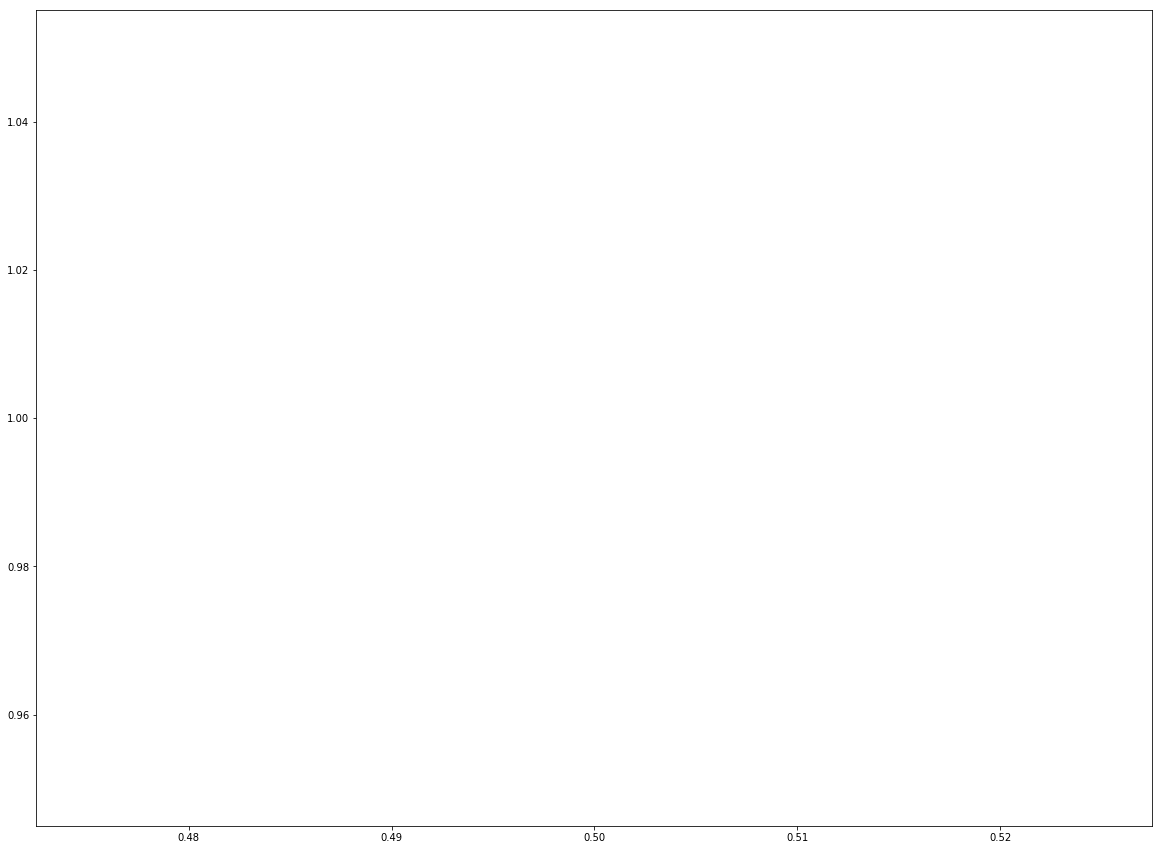




q6_n
(96141,)
(96142,)
(96141,)
(5282,)
(5283,)
(5282,)
0.8960317460317663
0.9974412171507598


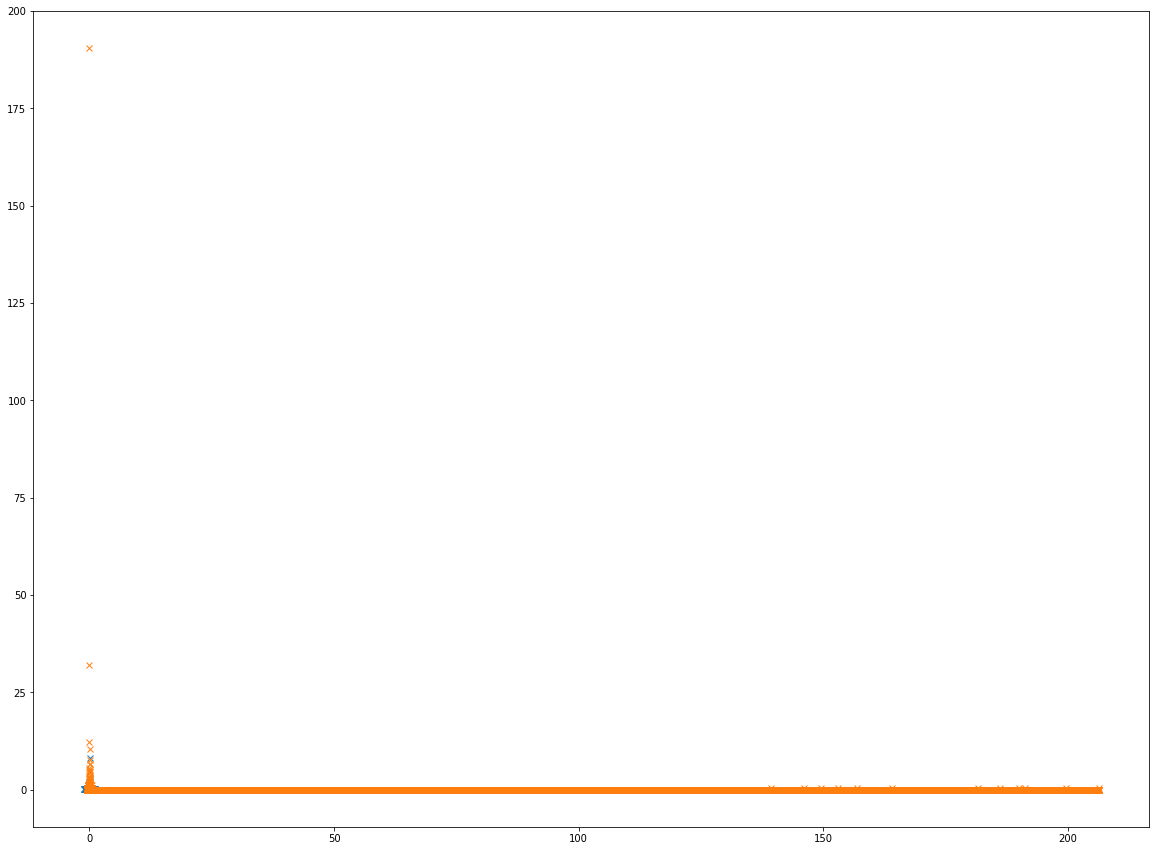

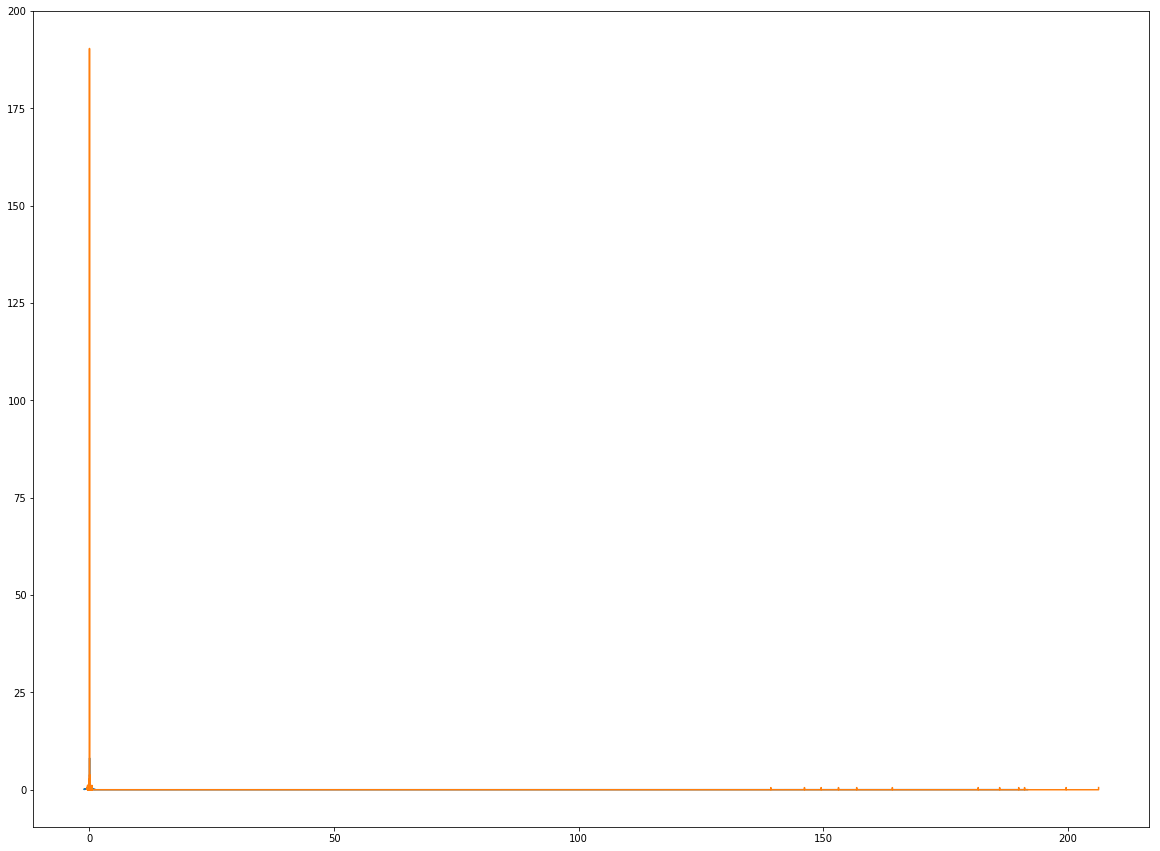




q6_p
(121091,)
(121092,)
(121091,)
(15463,)
(15464,)
(15463,)
0.8722222222222599
1.0835408022130013


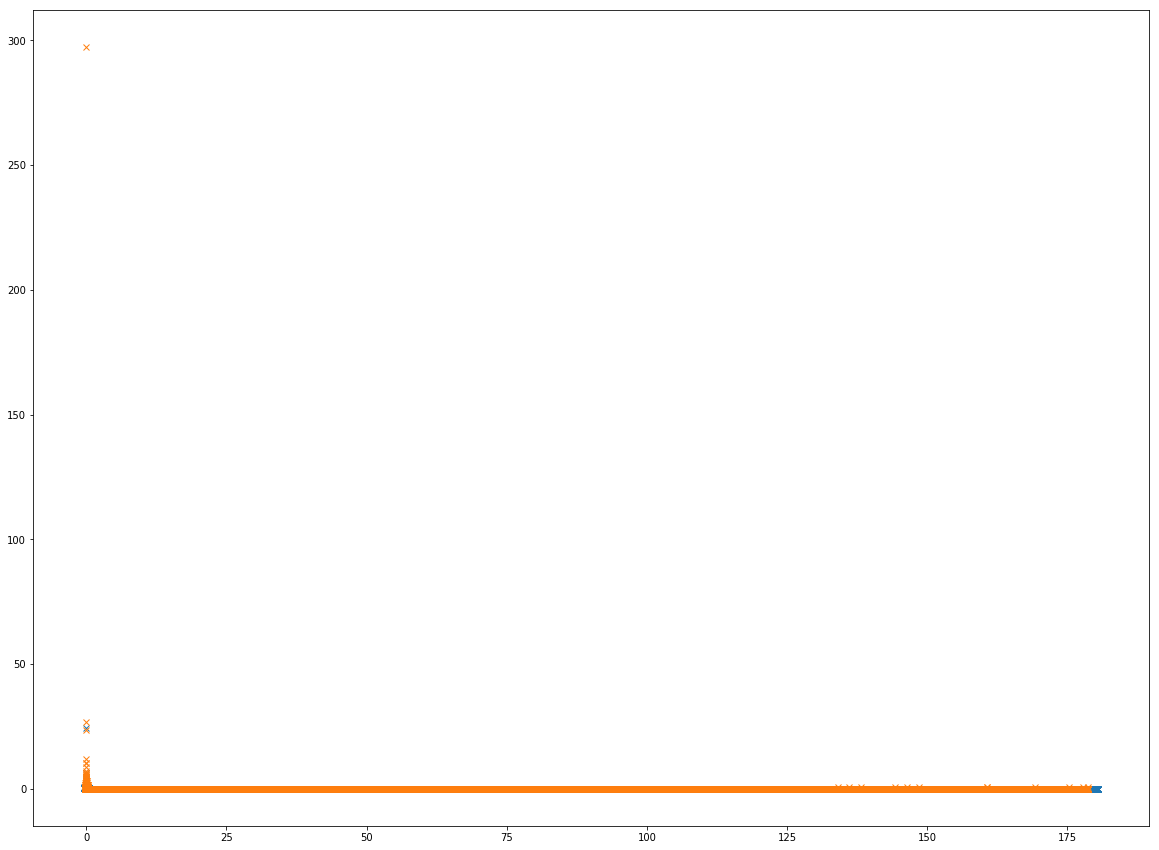

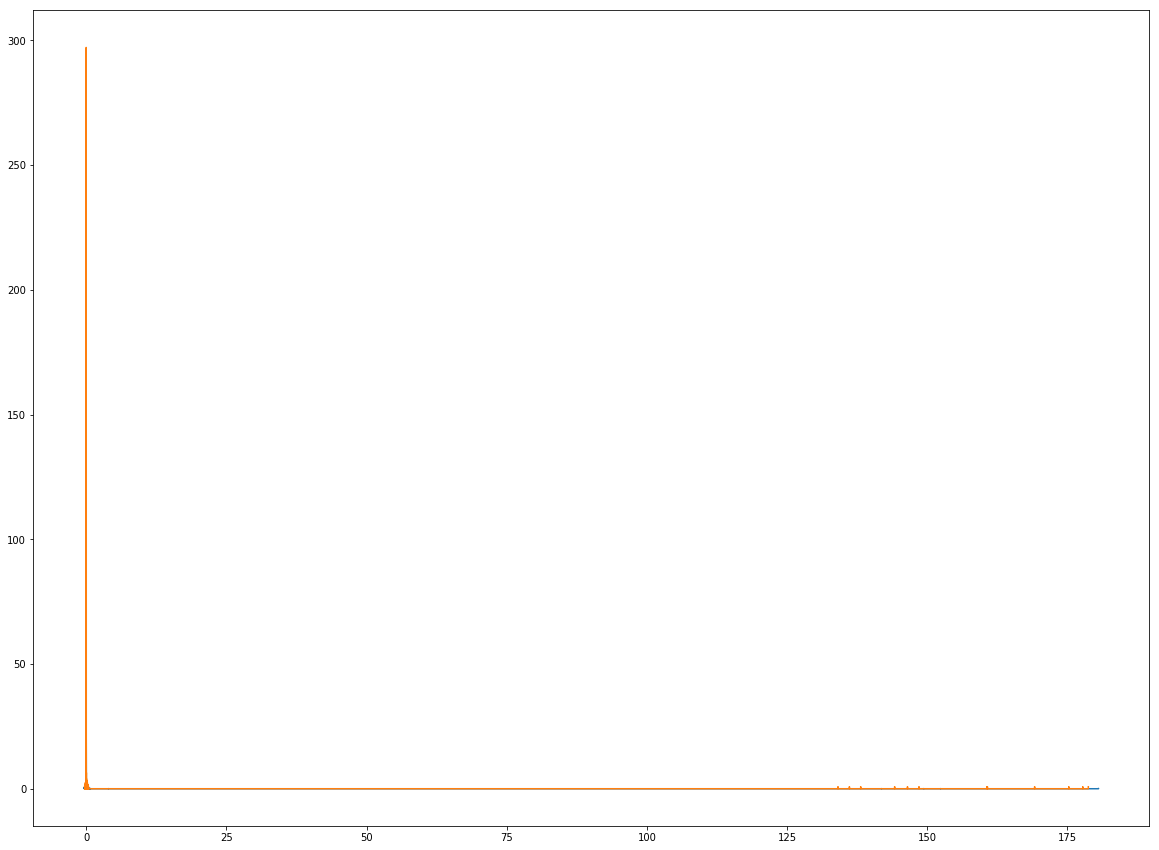




q7_n
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


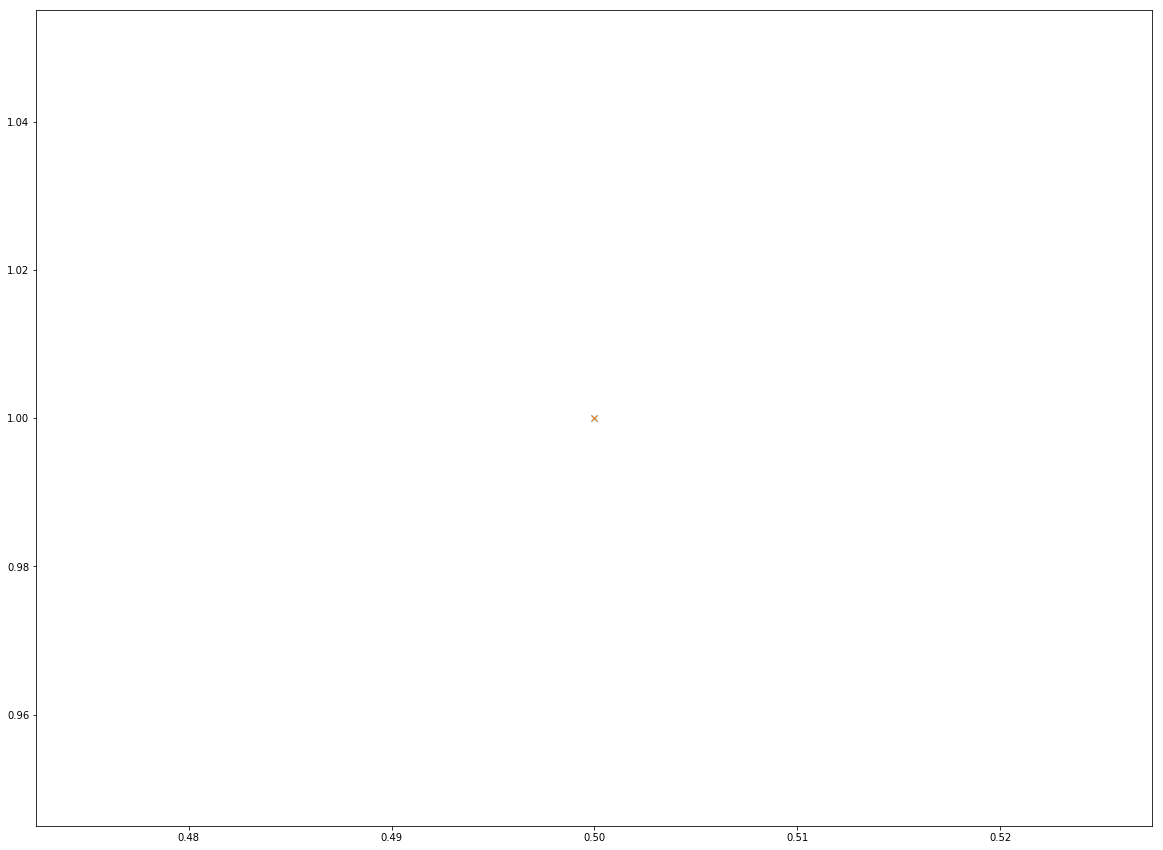

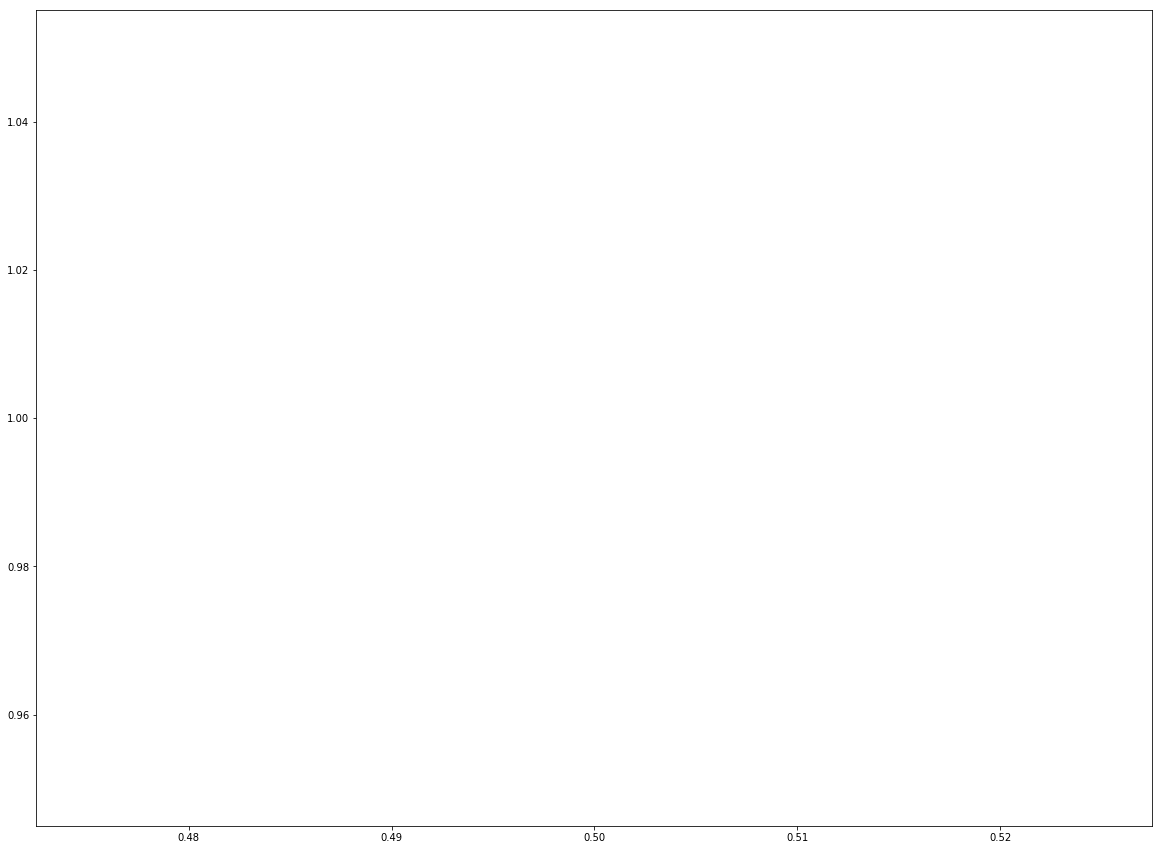




q7_p
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


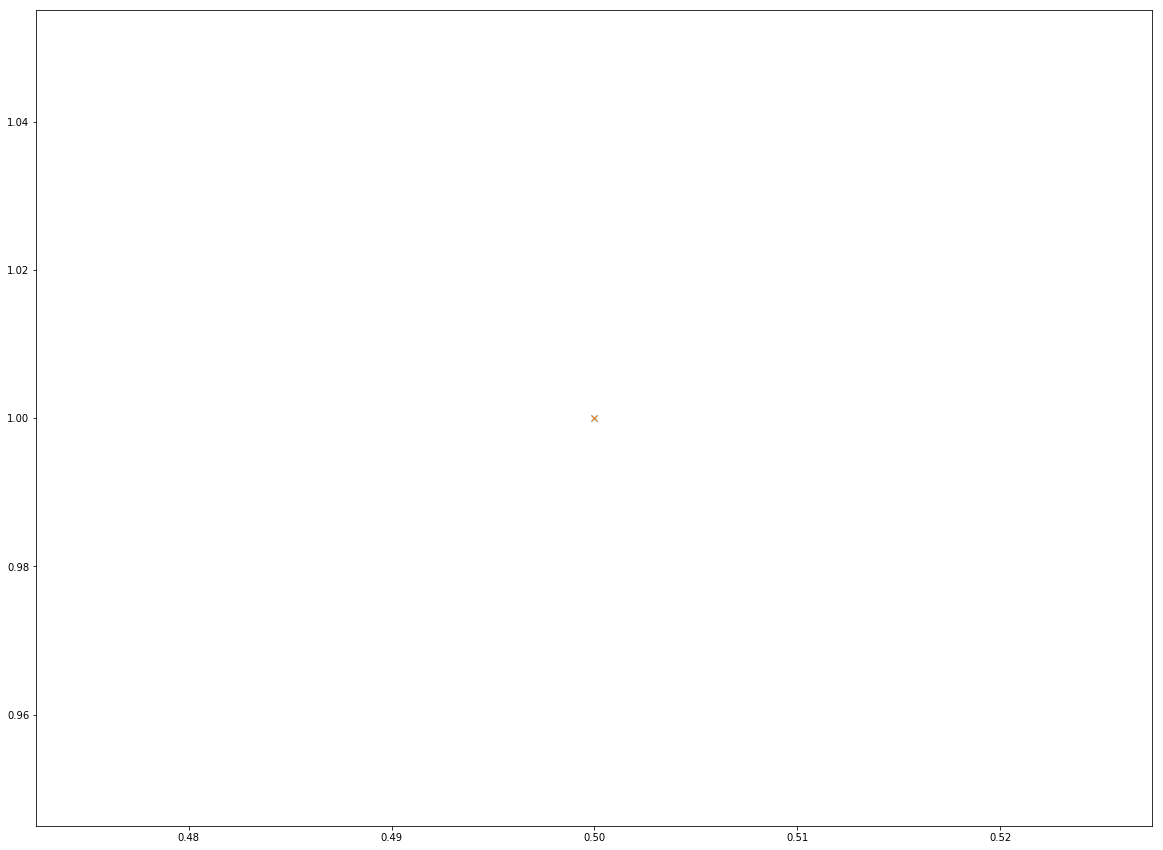

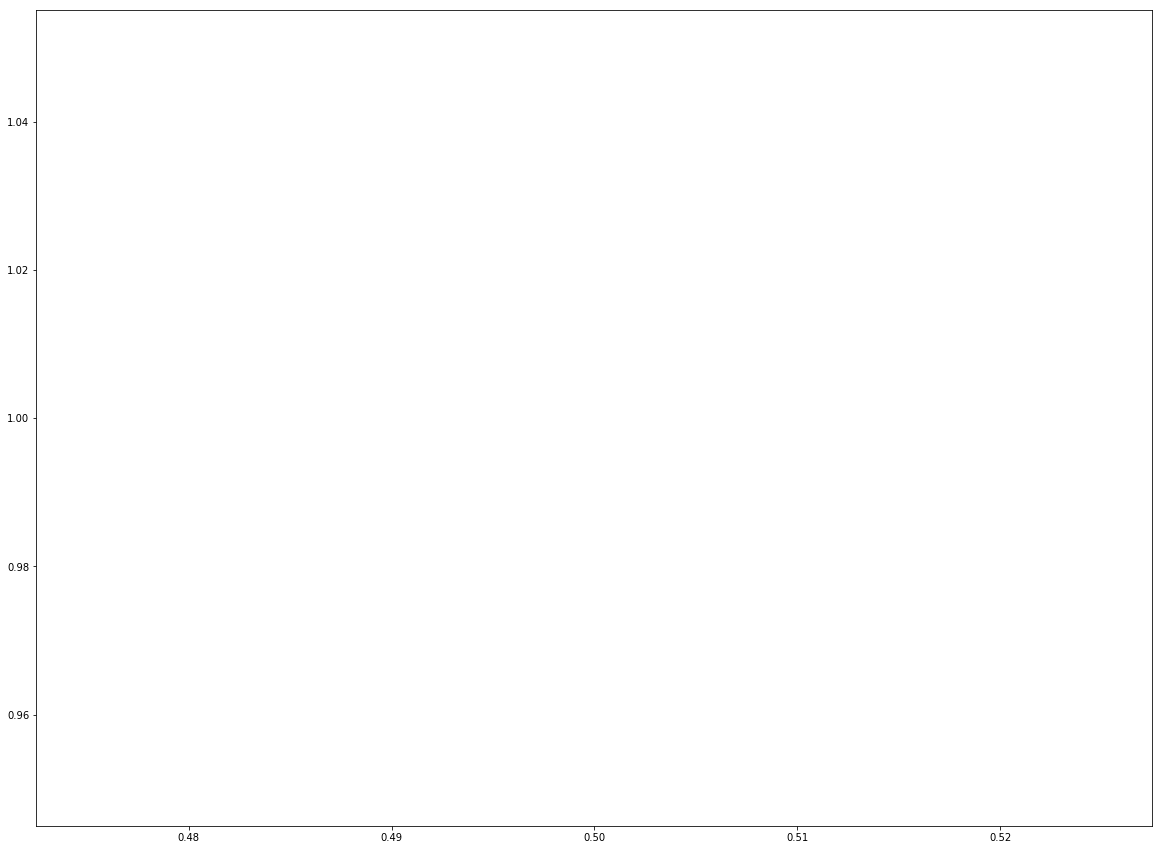




q8_n
(1118822,)
(1118823,)
(1118822,)
(30320,)
(30321,)
(30320,)
0.9987103174606149
0.998547717842323


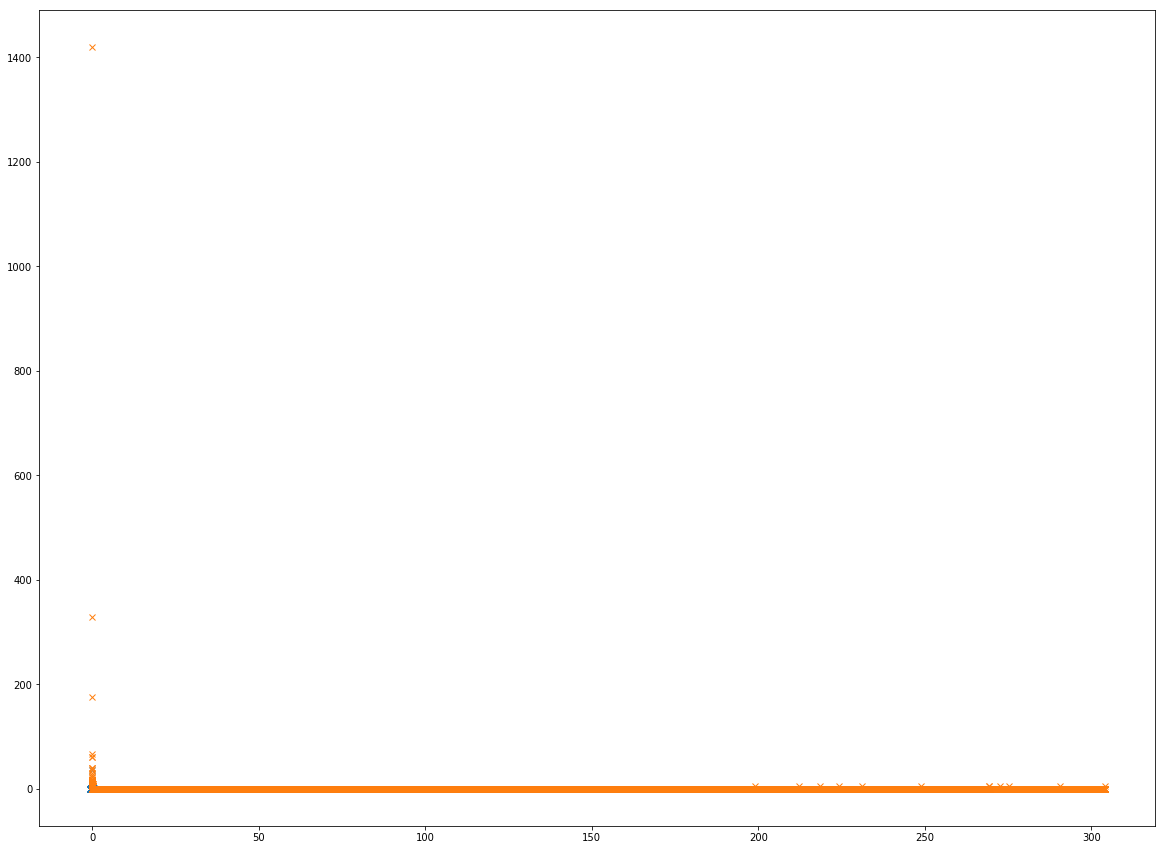

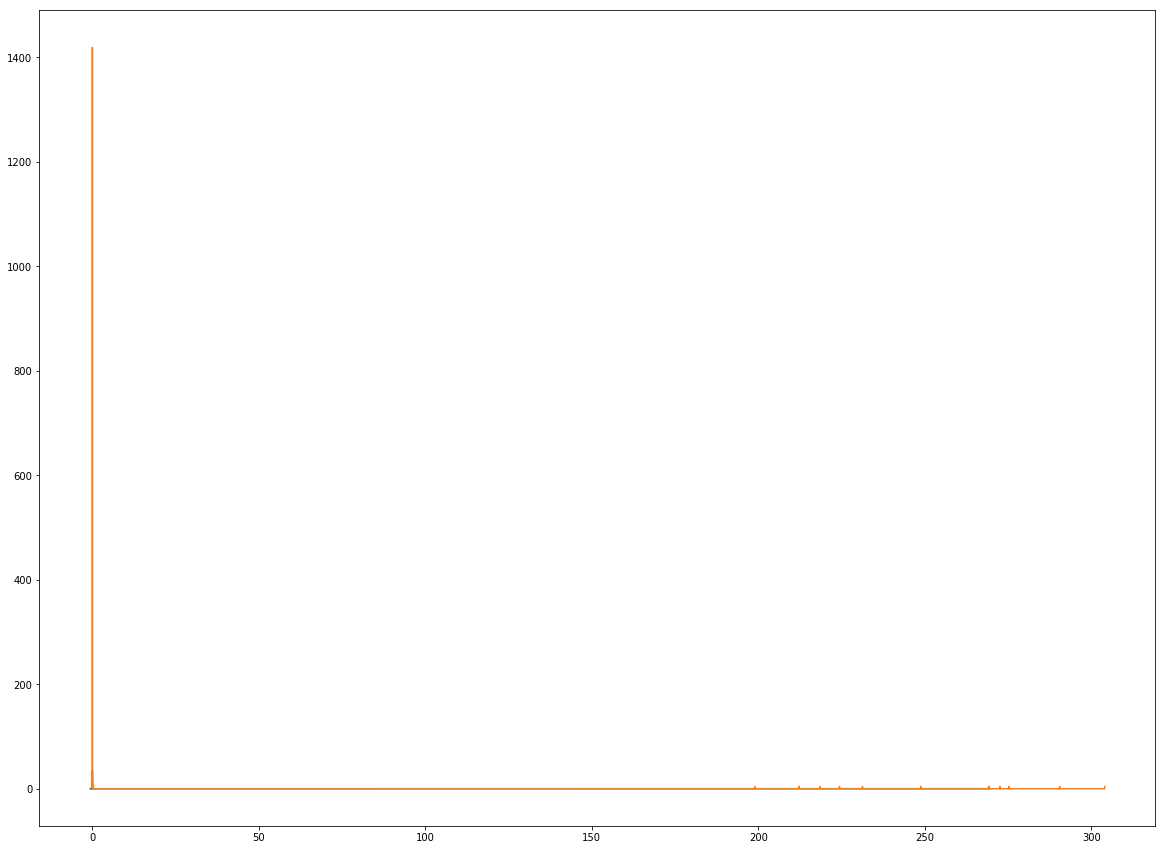




q8_p
(1151053,)
(1151054,)
(1151053,)
(115529,)
(115530,)
(115529,)
1.1317460317464072
0.9125864453665168


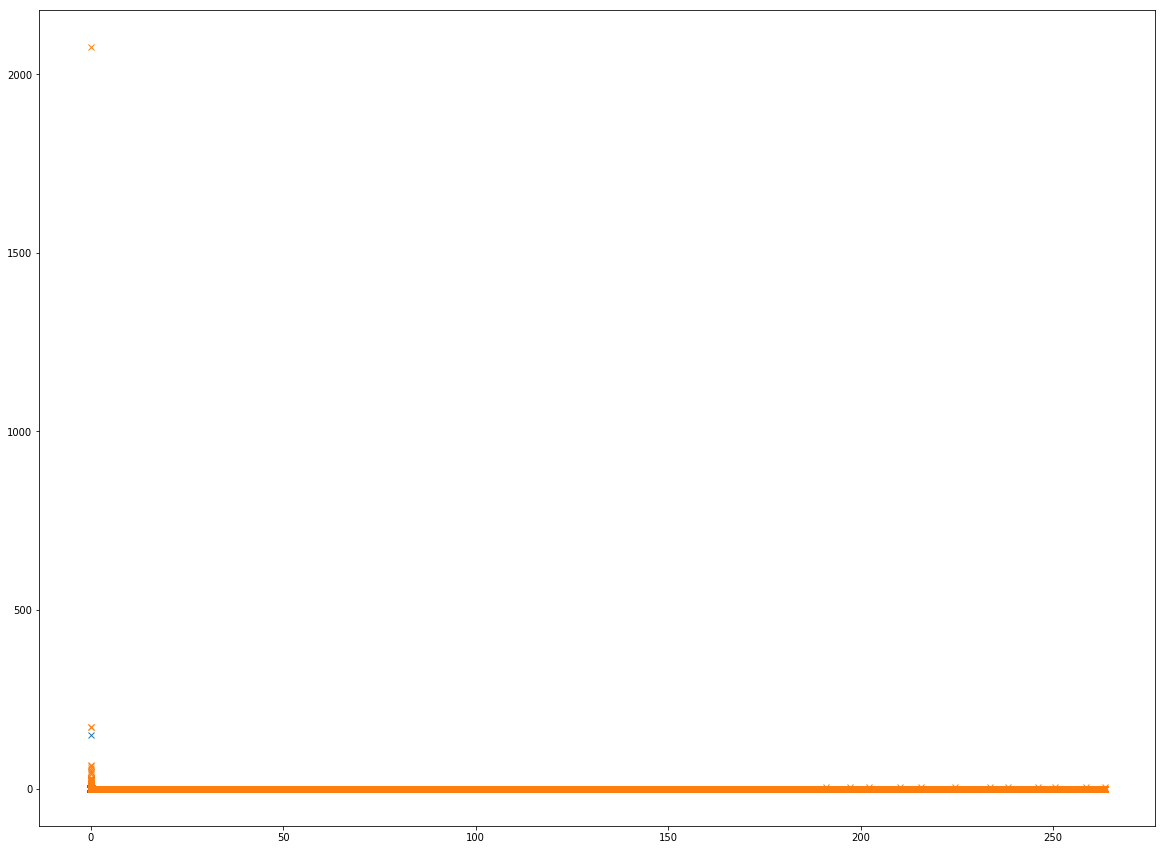

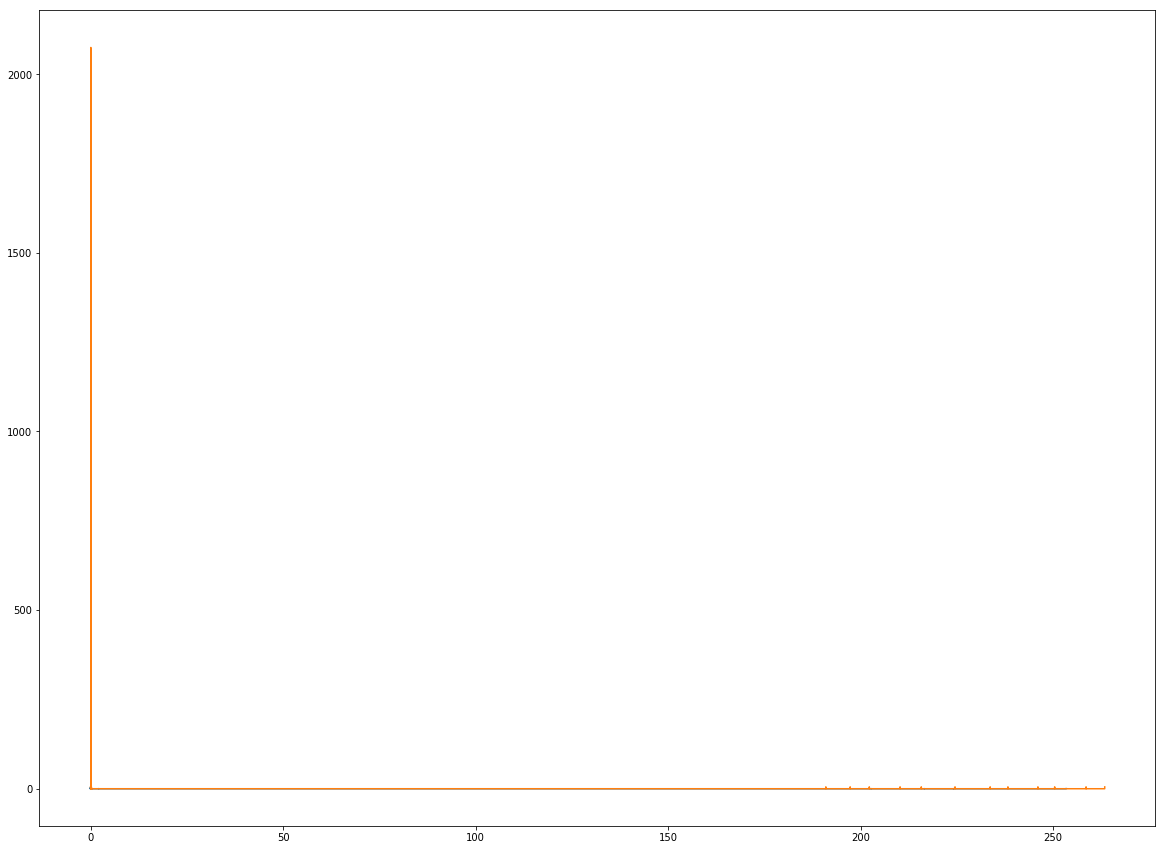




KineticE_n
(13,)
(14,)
(13,)
(17,)
(18,)
(17,)
0.965079365079365
0.9585062240663901


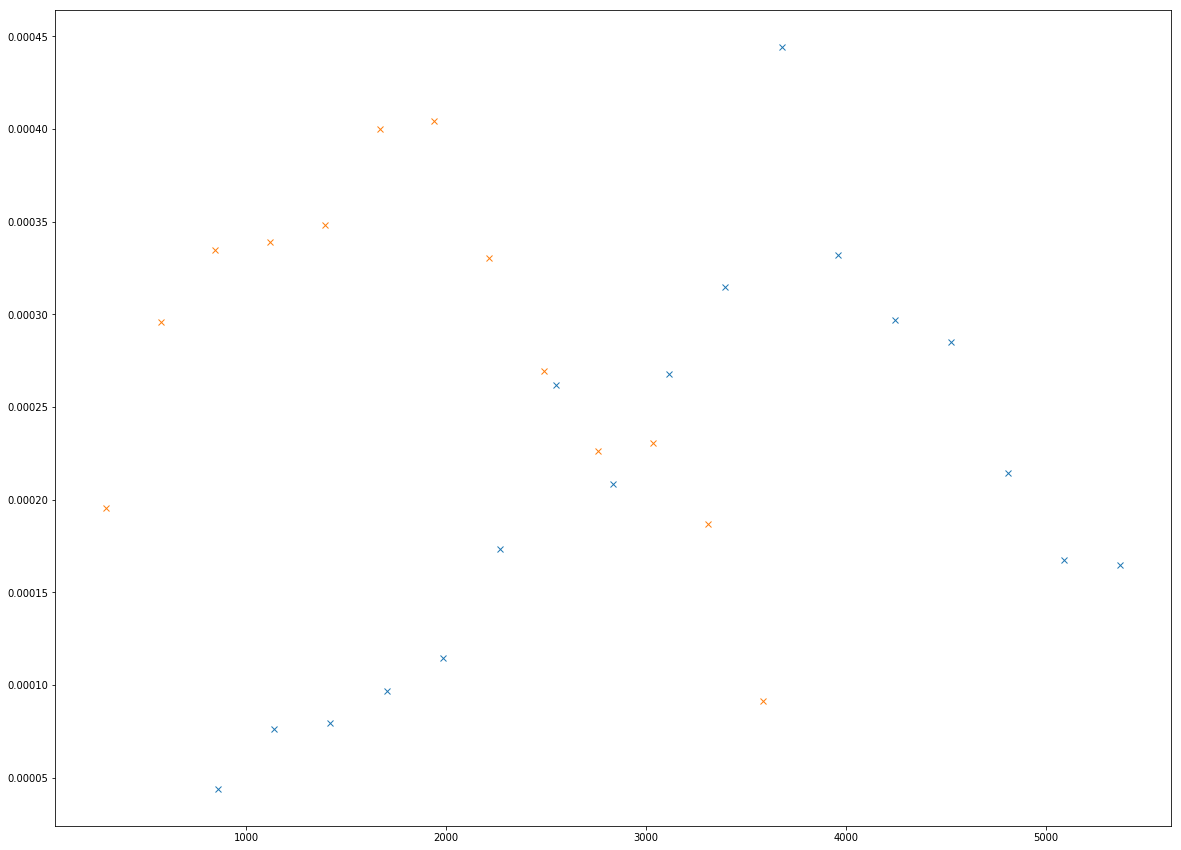

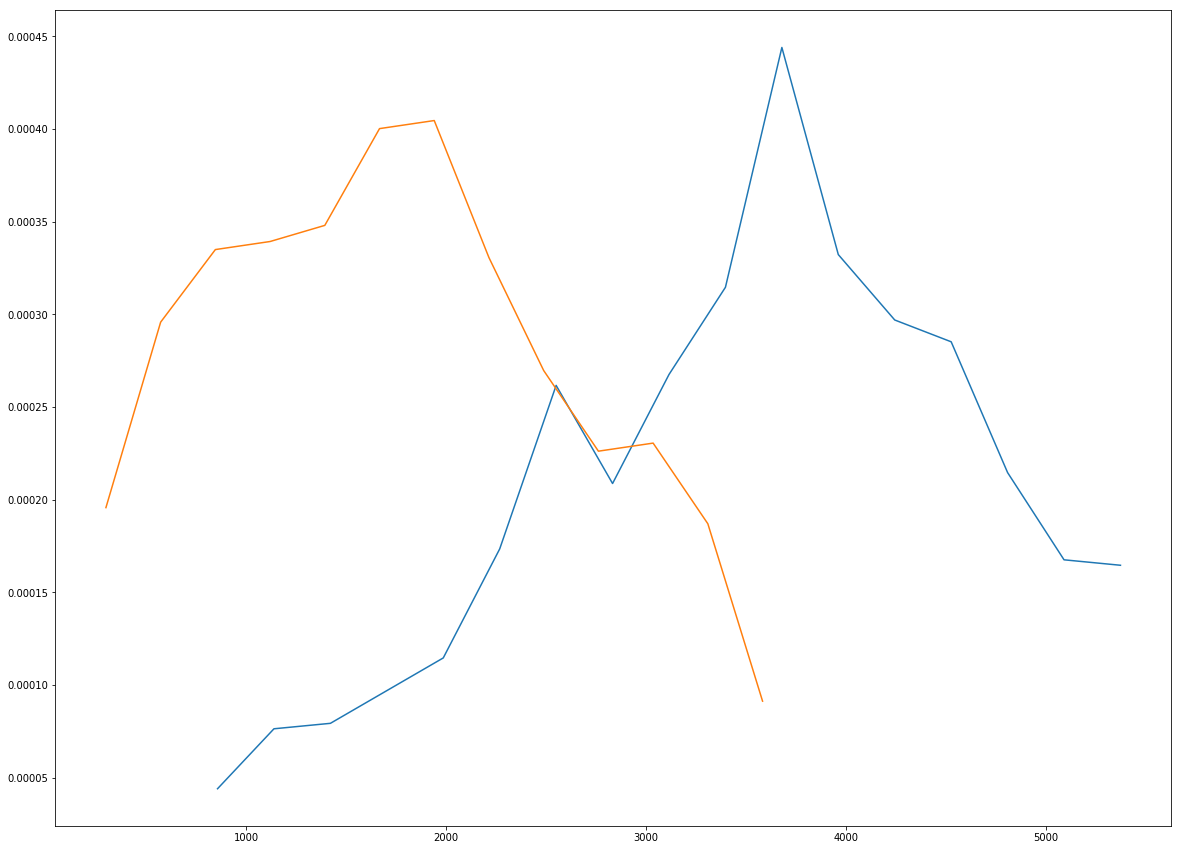




KineticE_p
(13,)
(14,)
(13,)
(16,)
(17,)
(16,)
0.9841269841269841
0.9815352697095435


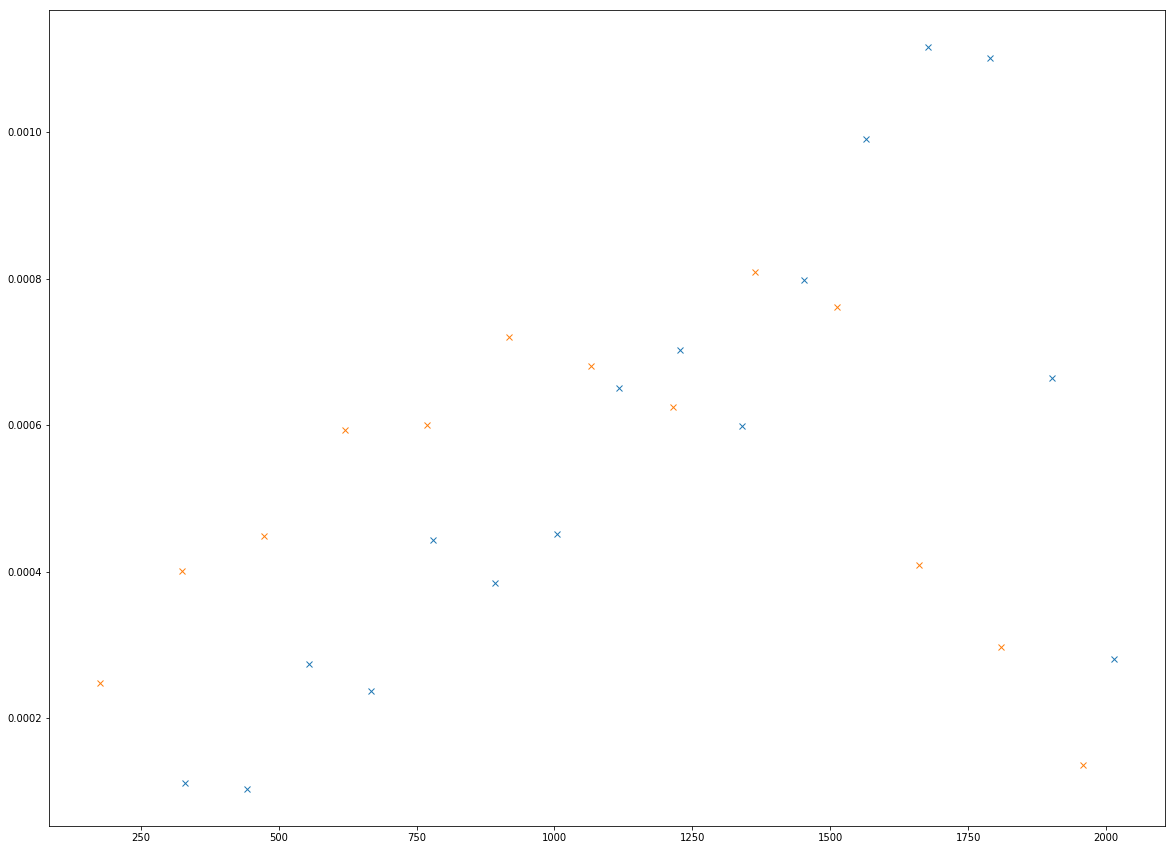

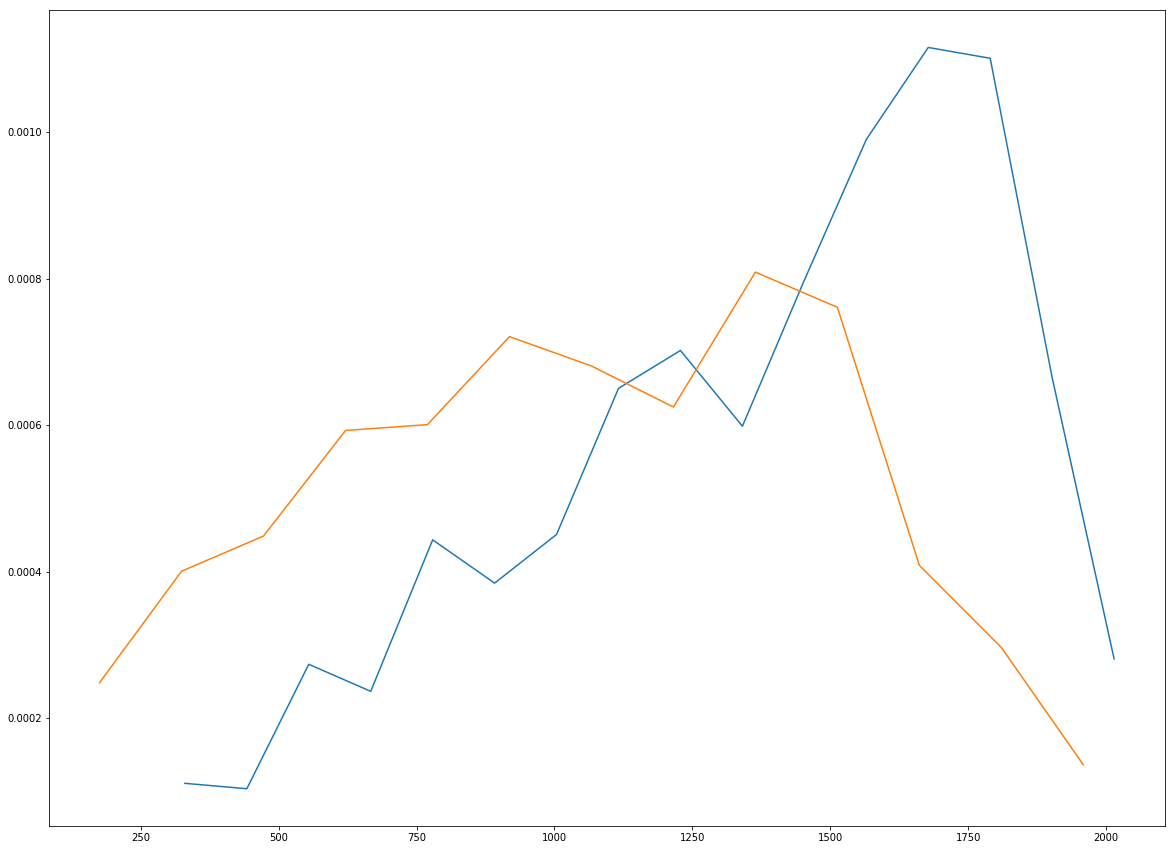




VolumeE
(13,)
(14,)
(13,)
(16,)
(17,)
(16,)
0.973809523809524
0.9771784232365144


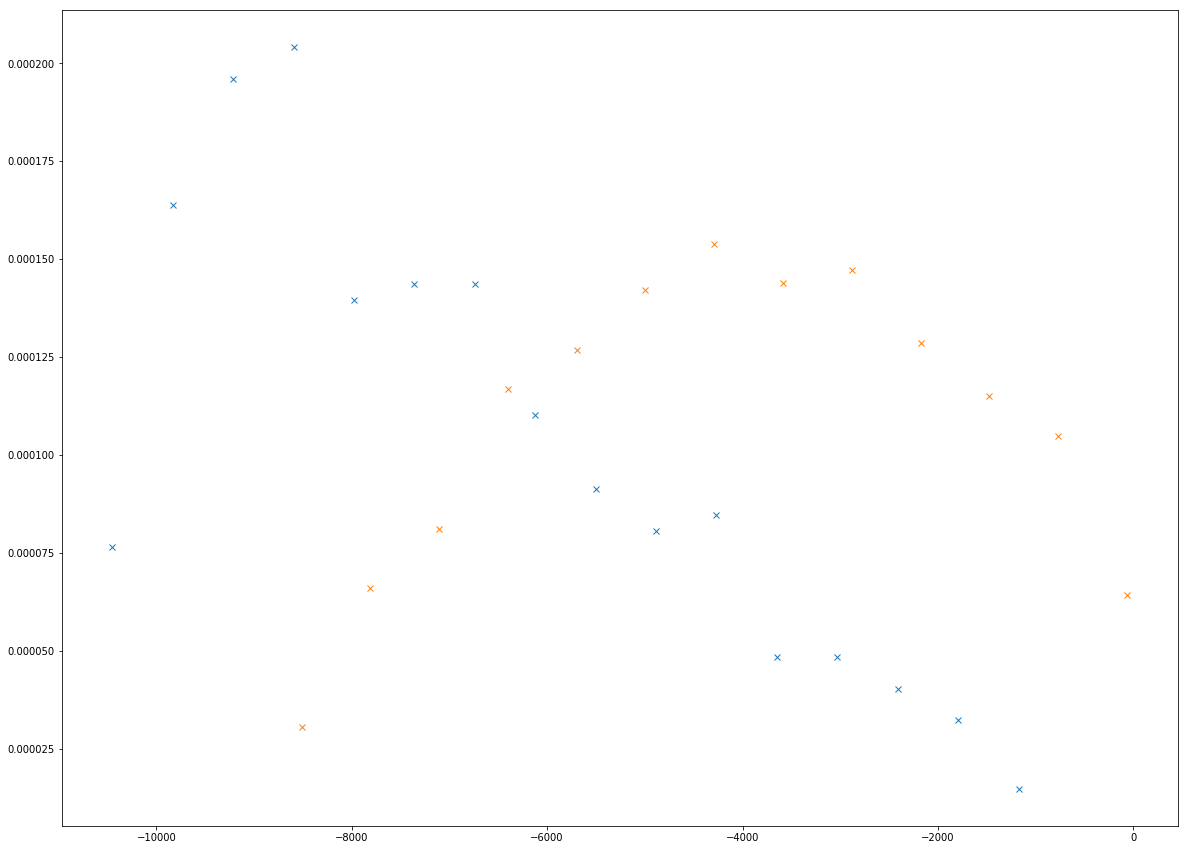

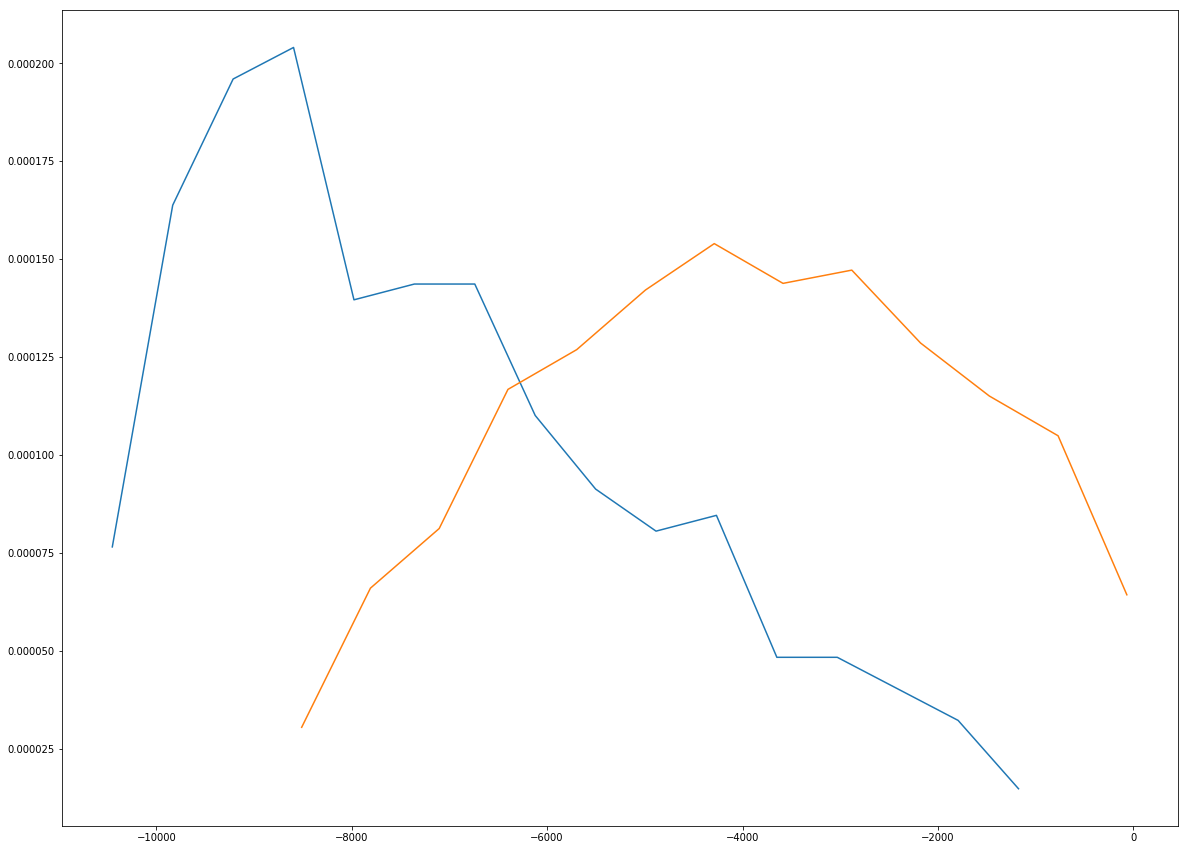




rho_tau
(13,)
(14,)
(13,)
(15,)
(16,)
(15,)
0.9805555555555554
0.9474412171507611


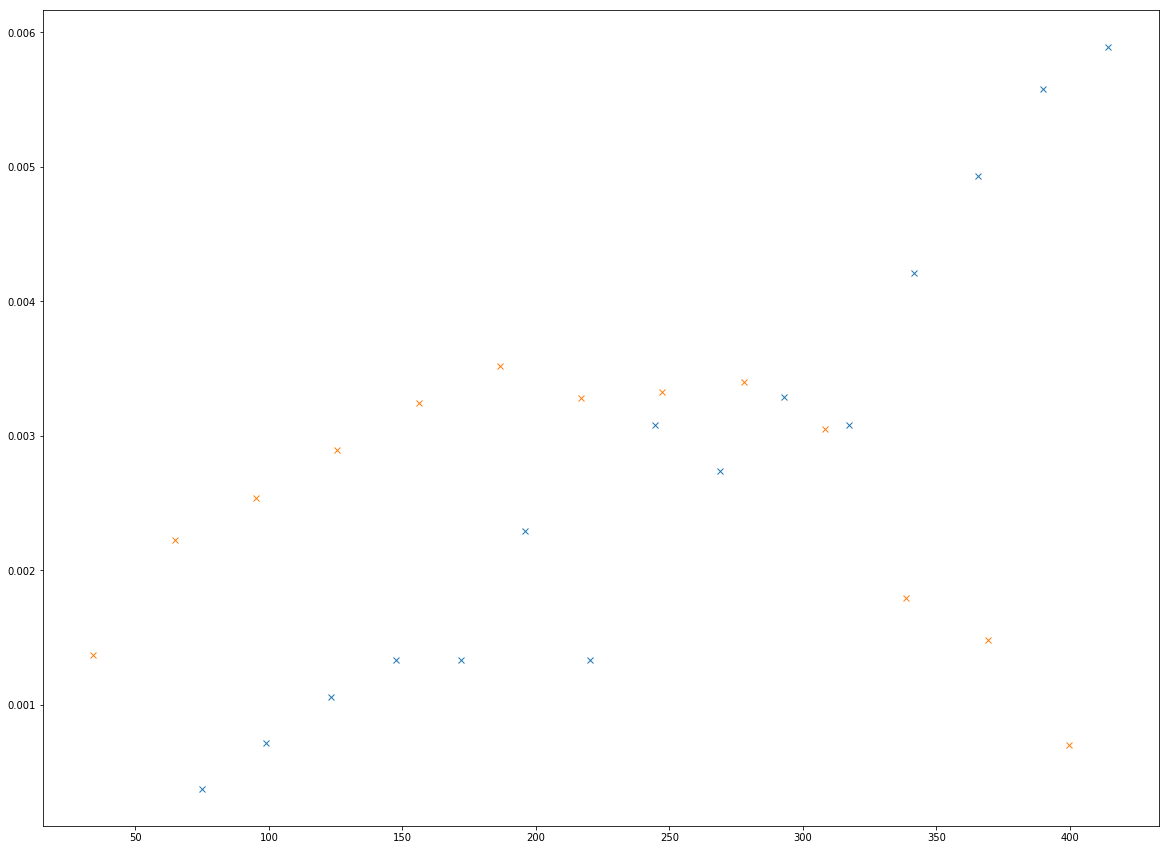

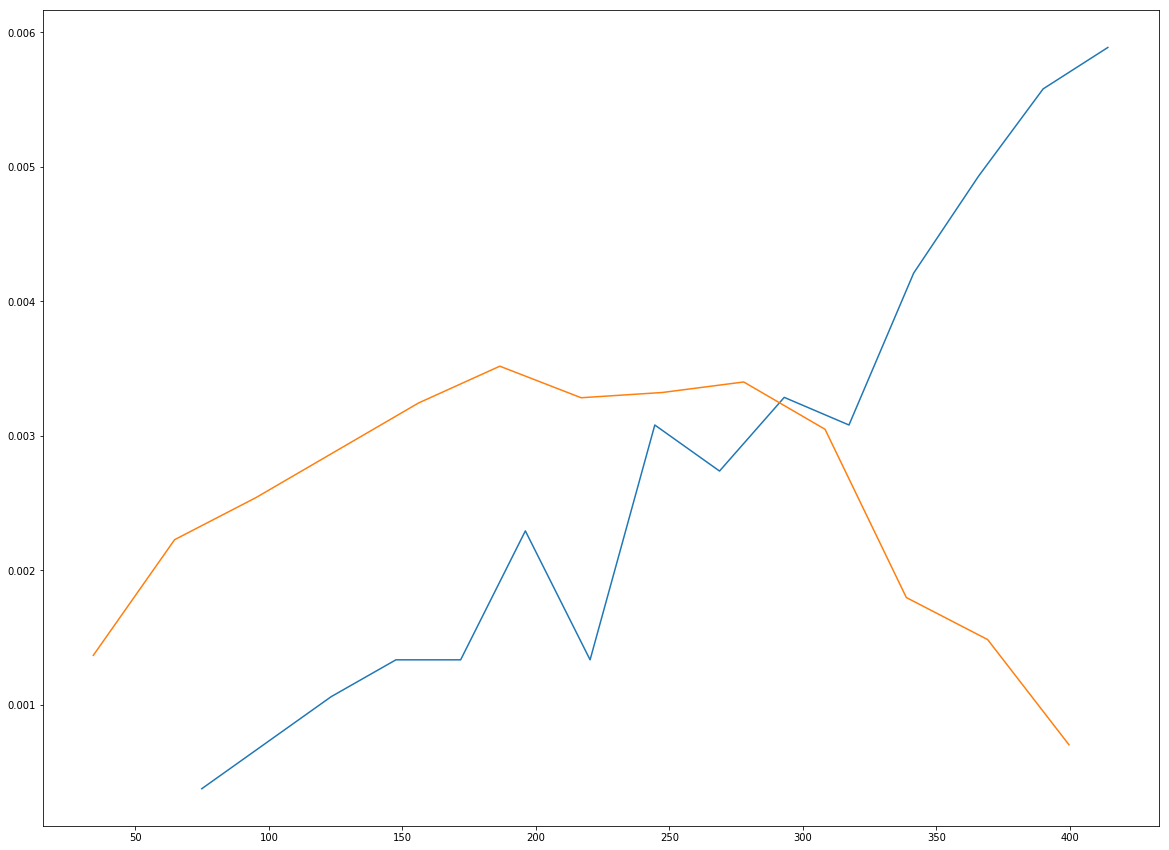




rho_rho
(13,)
(14,)
(13,)
(16,)
(17,)
(16,)
0.973015873015873
0.9775242047026279


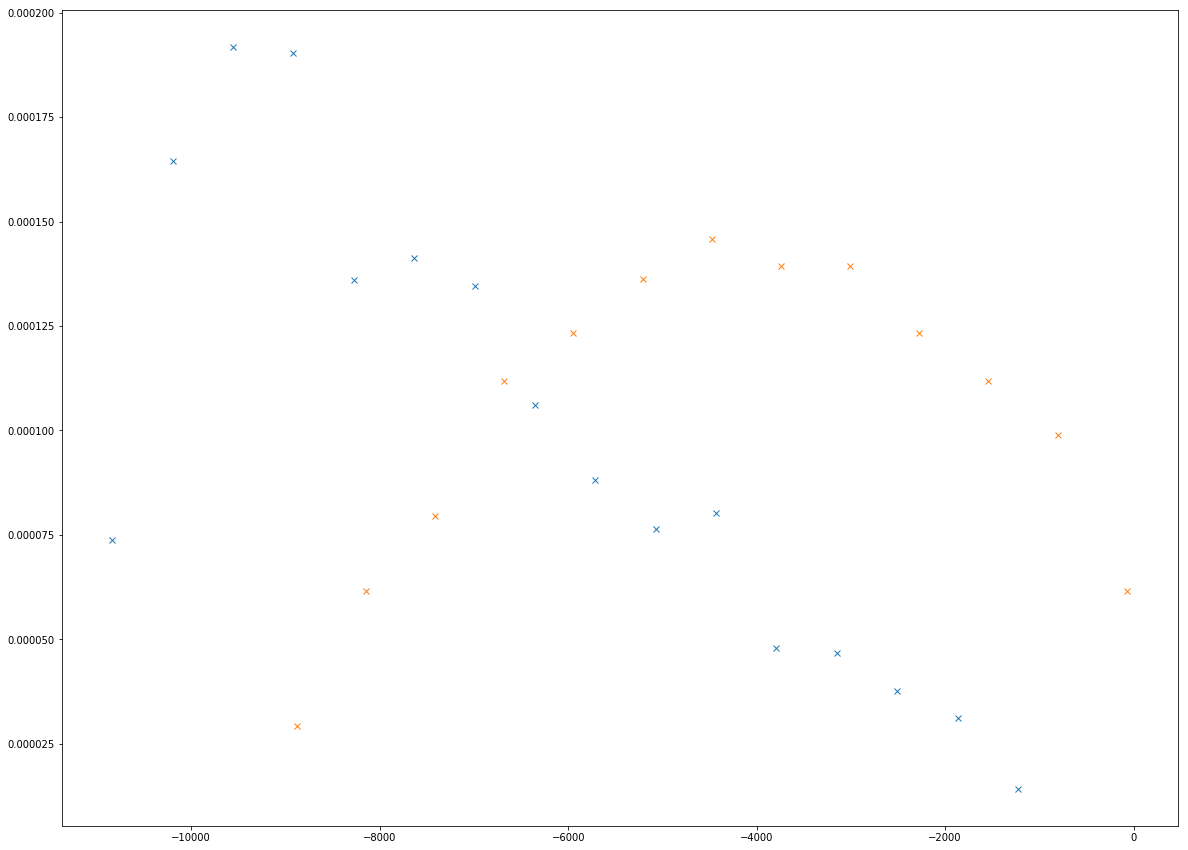

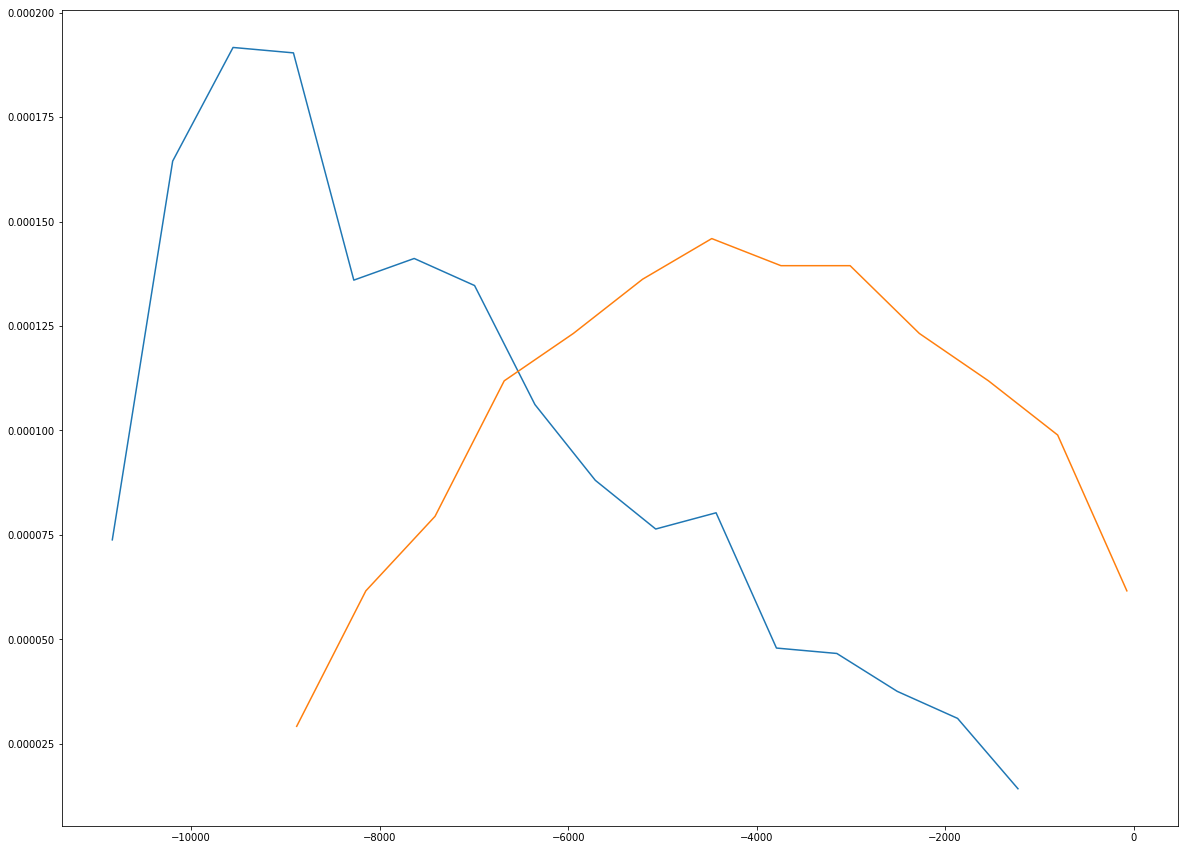




surfaceE
(14,)
(15,)
(14,)
(19,)
(20,)
(19,)
0.9686507936507937
0.9568464730290451


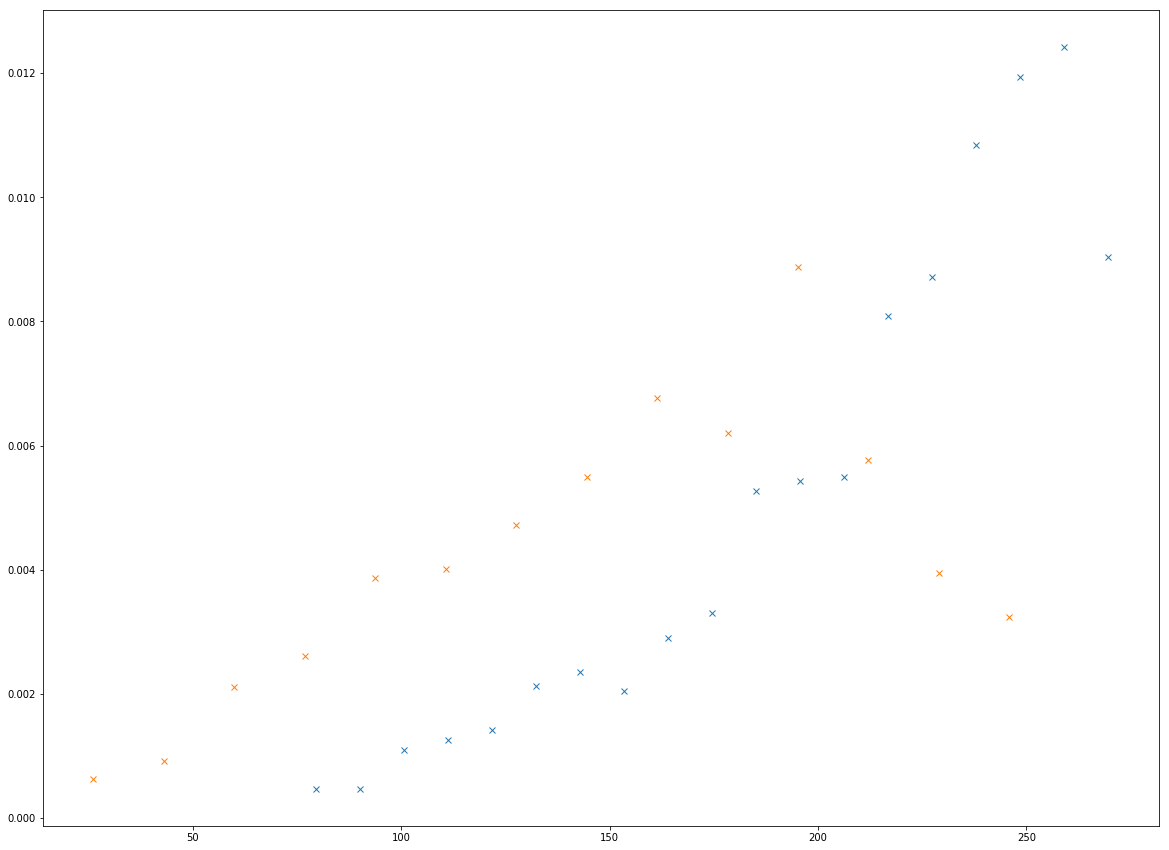

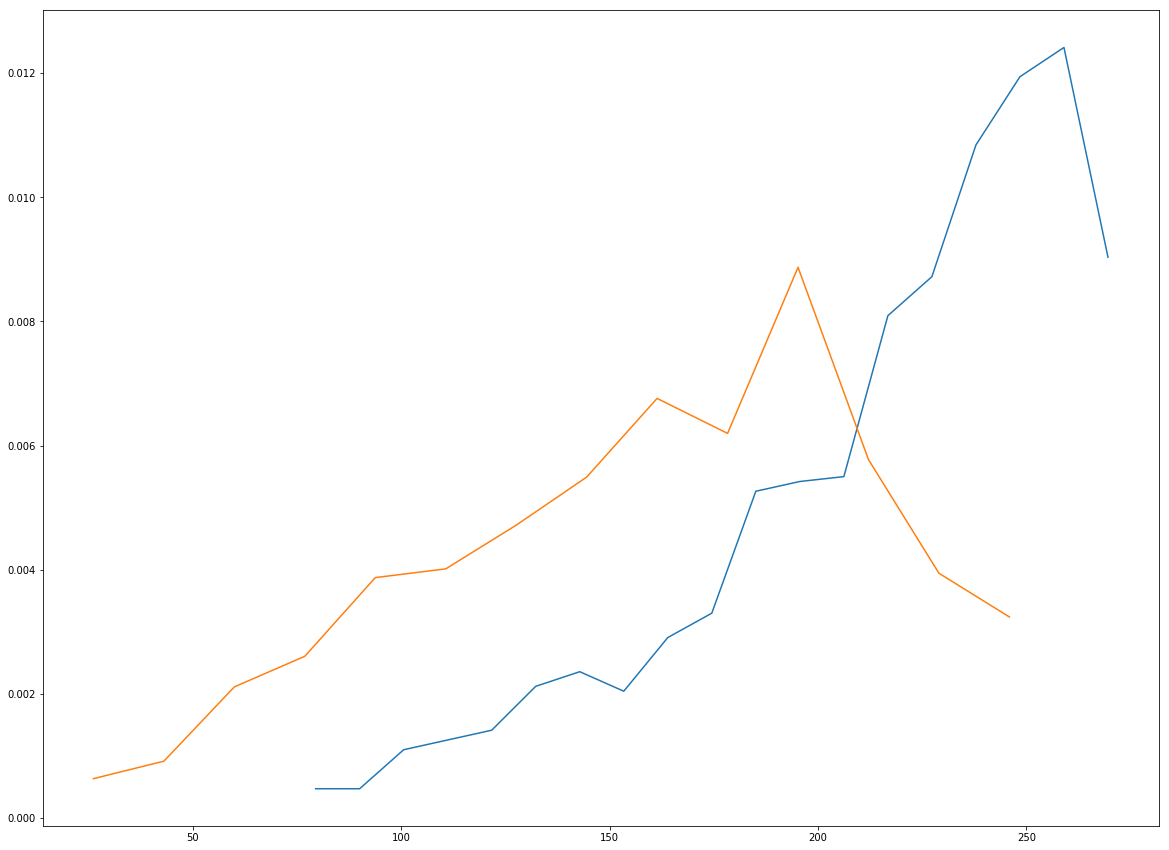




rhoDELrho
(14,)
(15,)
(14,)
(19,)
(20,)
(19,)
0.9686507936507937
0.9568464730290451


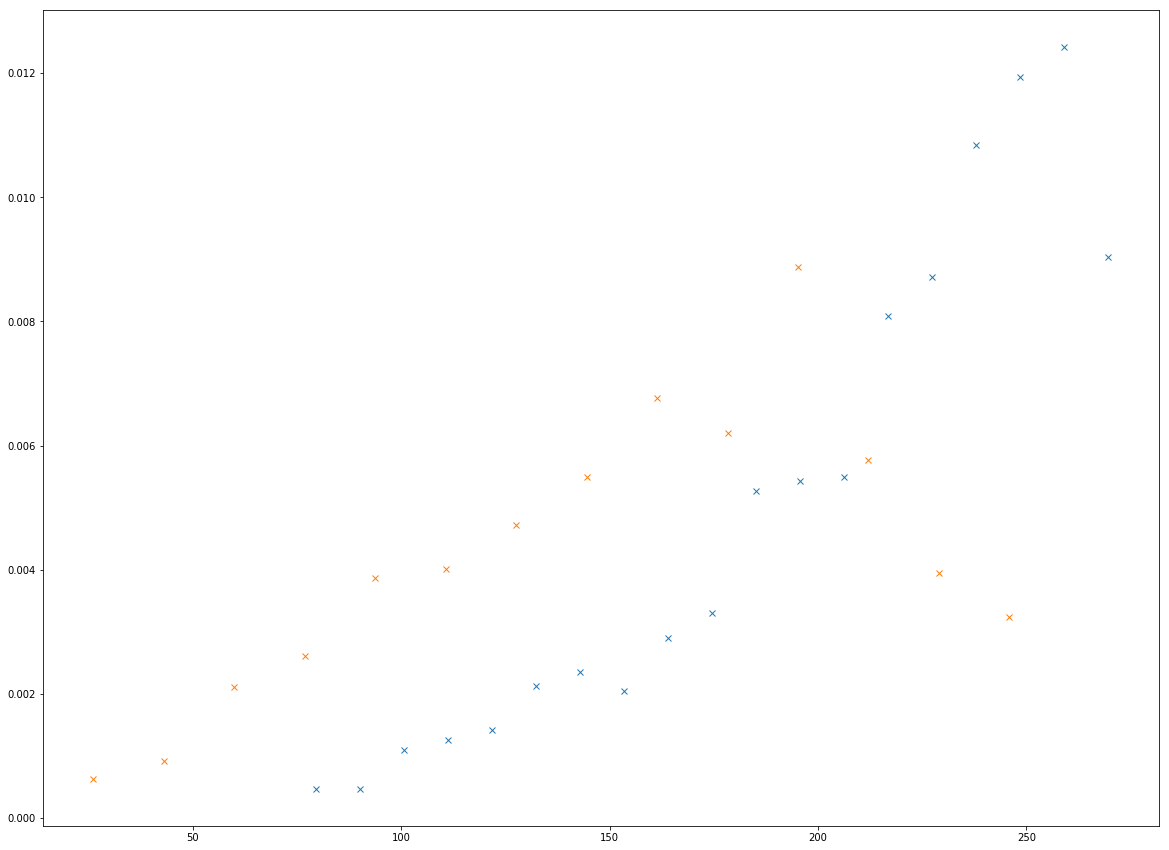

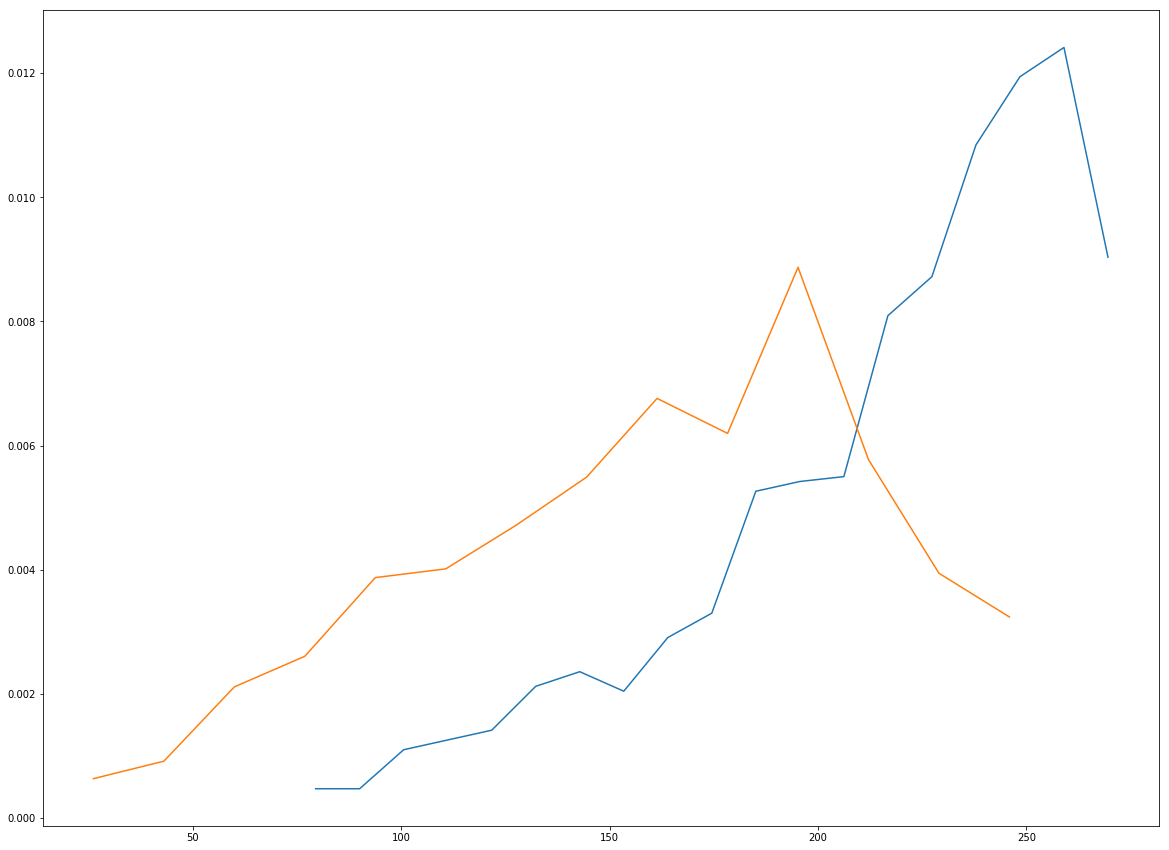




NABLArho^2
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


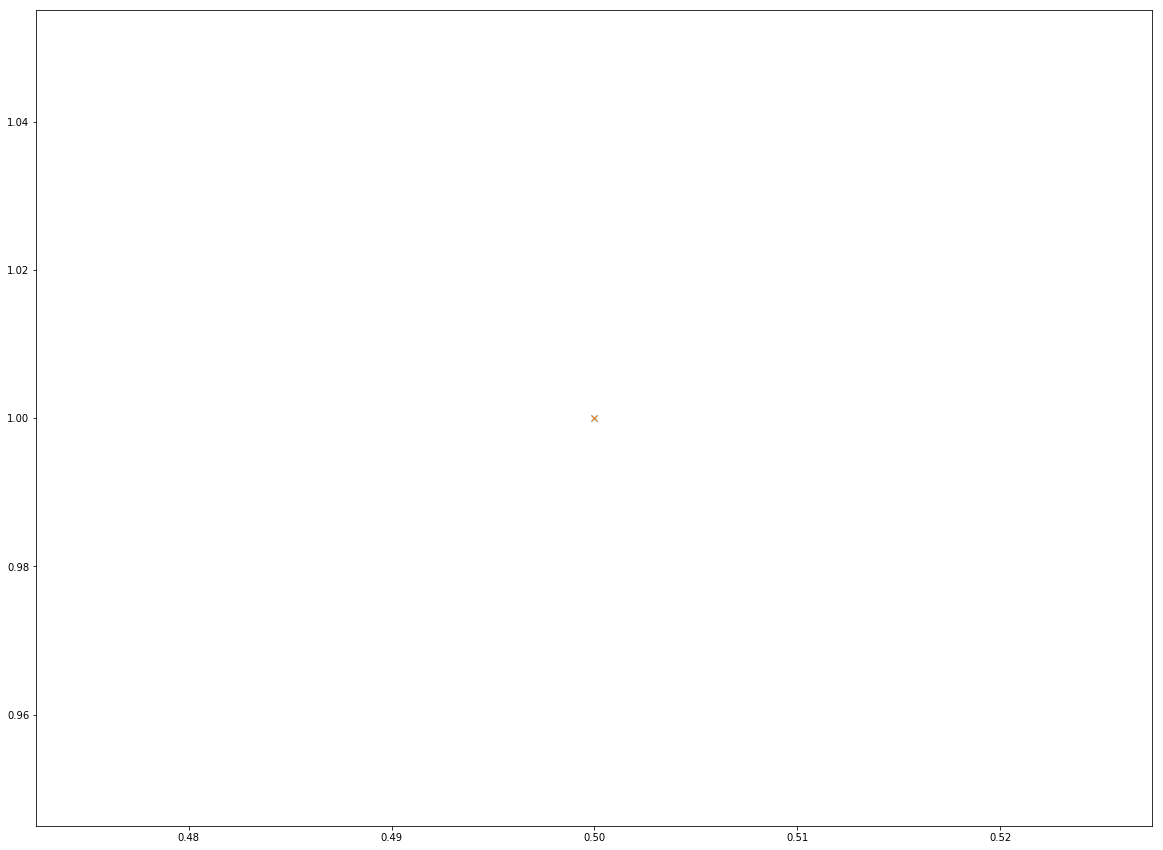

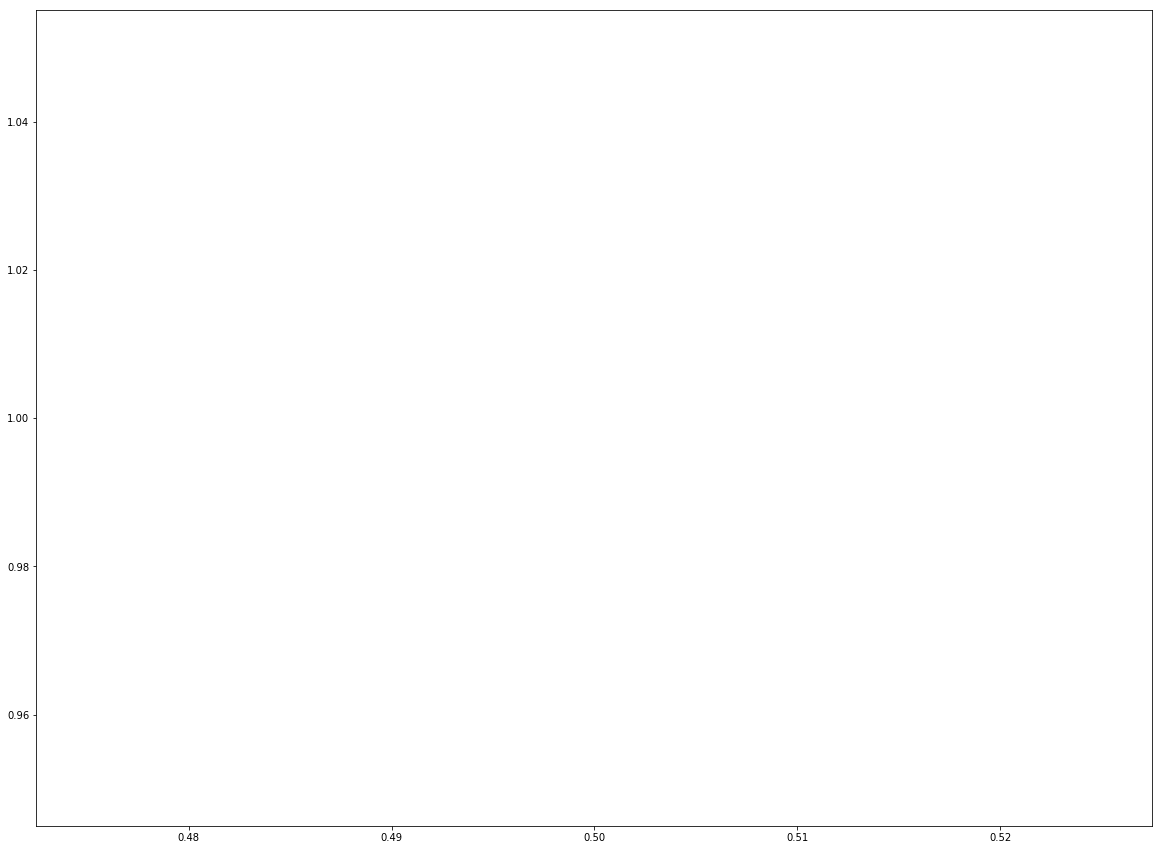




SpinOrbitE
(14,)
(15,)
(14,)
(22,)
(23,)
(22,)
0.9889880952380953
0.9963347164591976


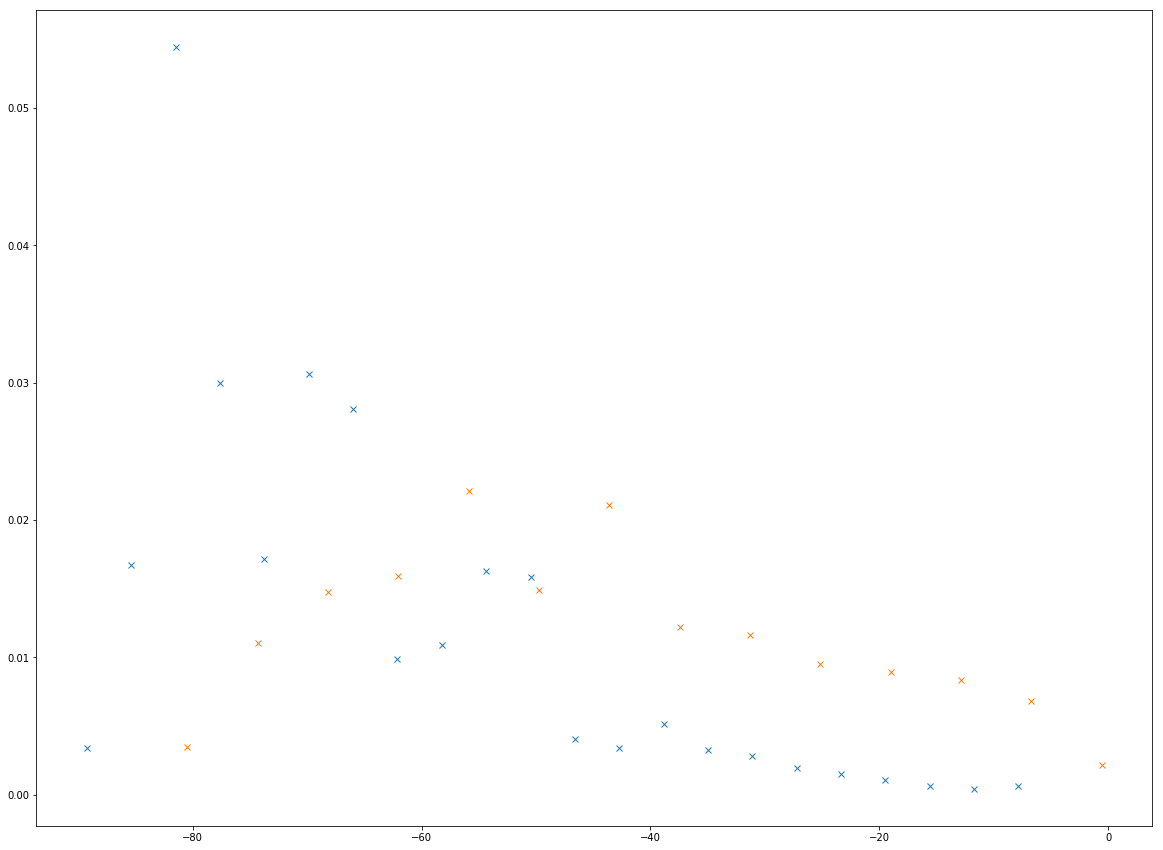

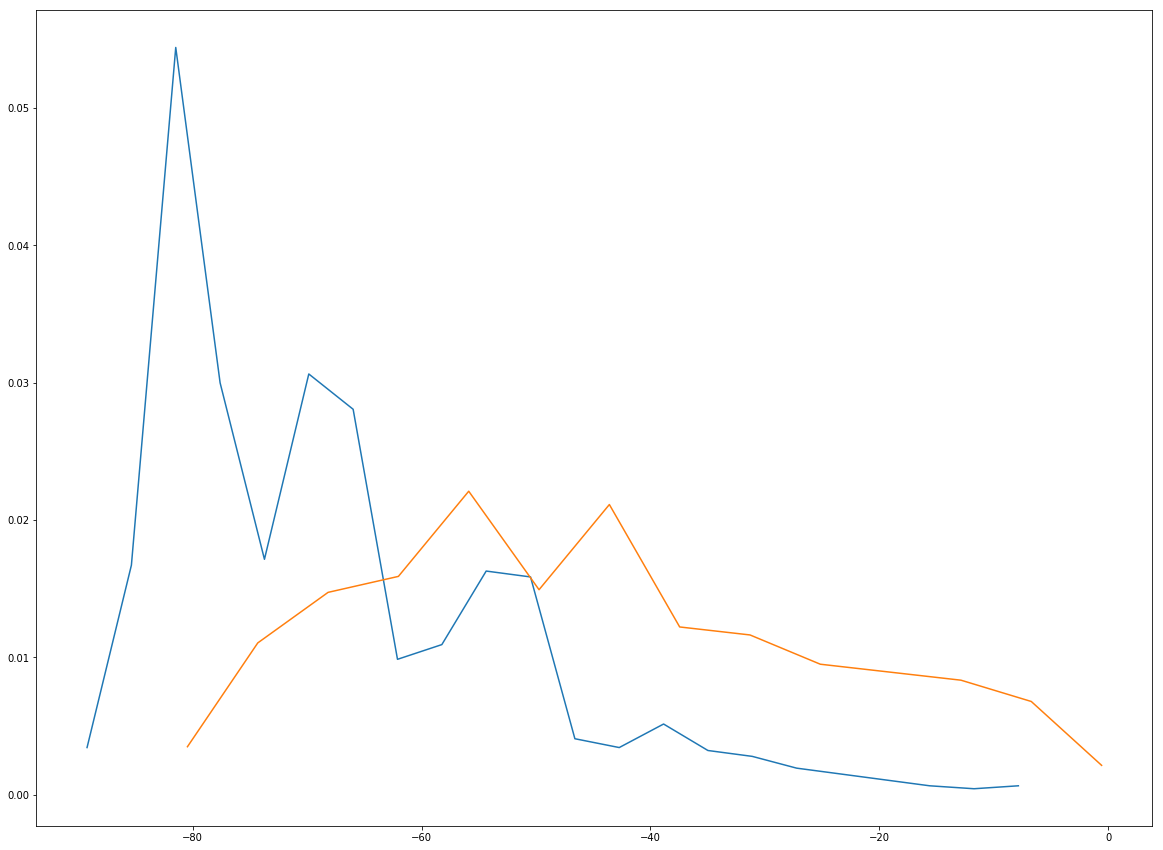




rhoNABLAJ
(14,)
(15,)
(14,)
(22,)
(23,)
(22,)
0.9889880952380953
0.9963347164591976


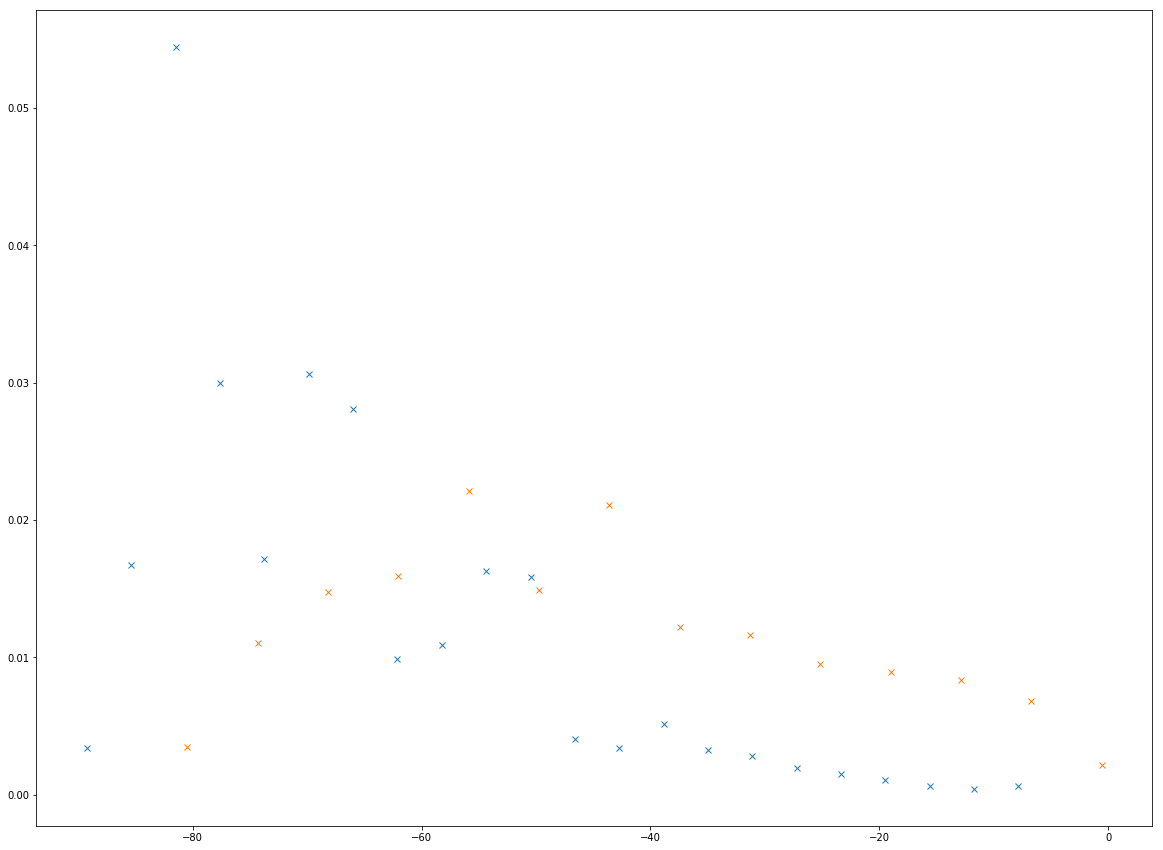

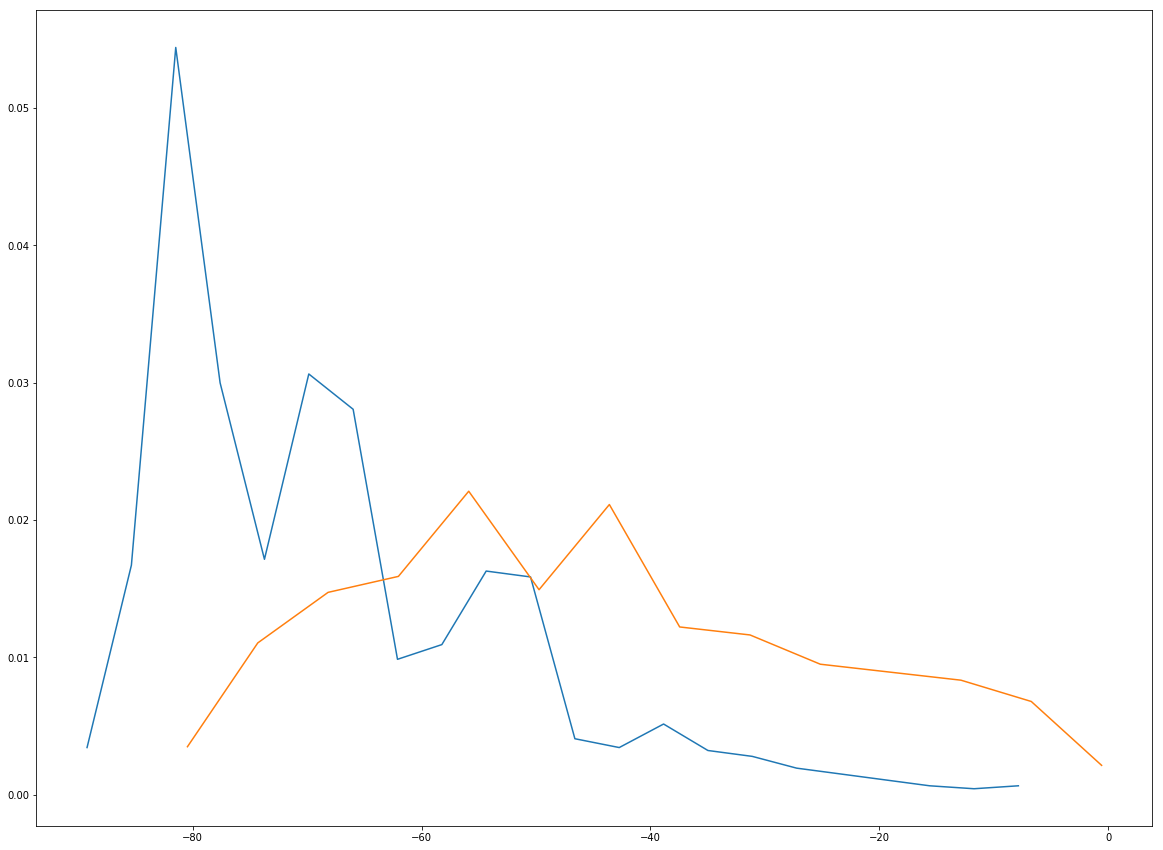




NABLArhoJ
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


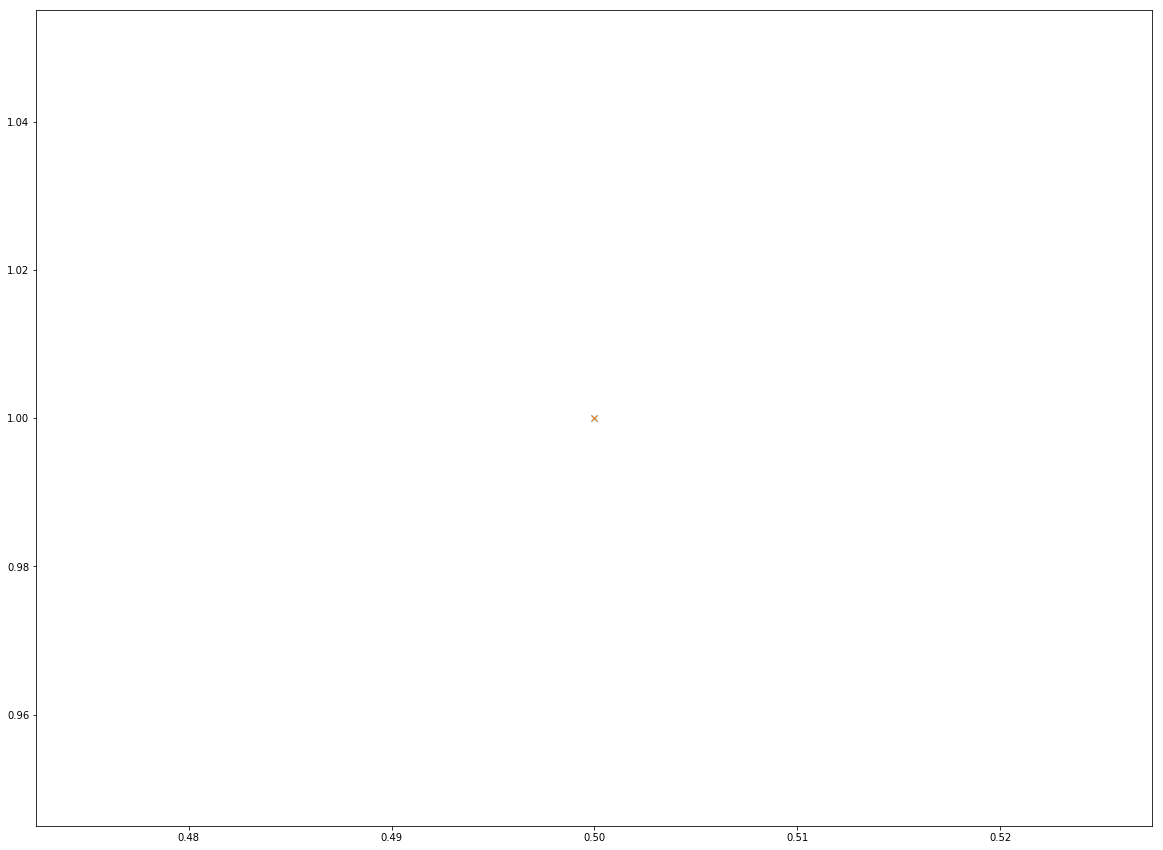

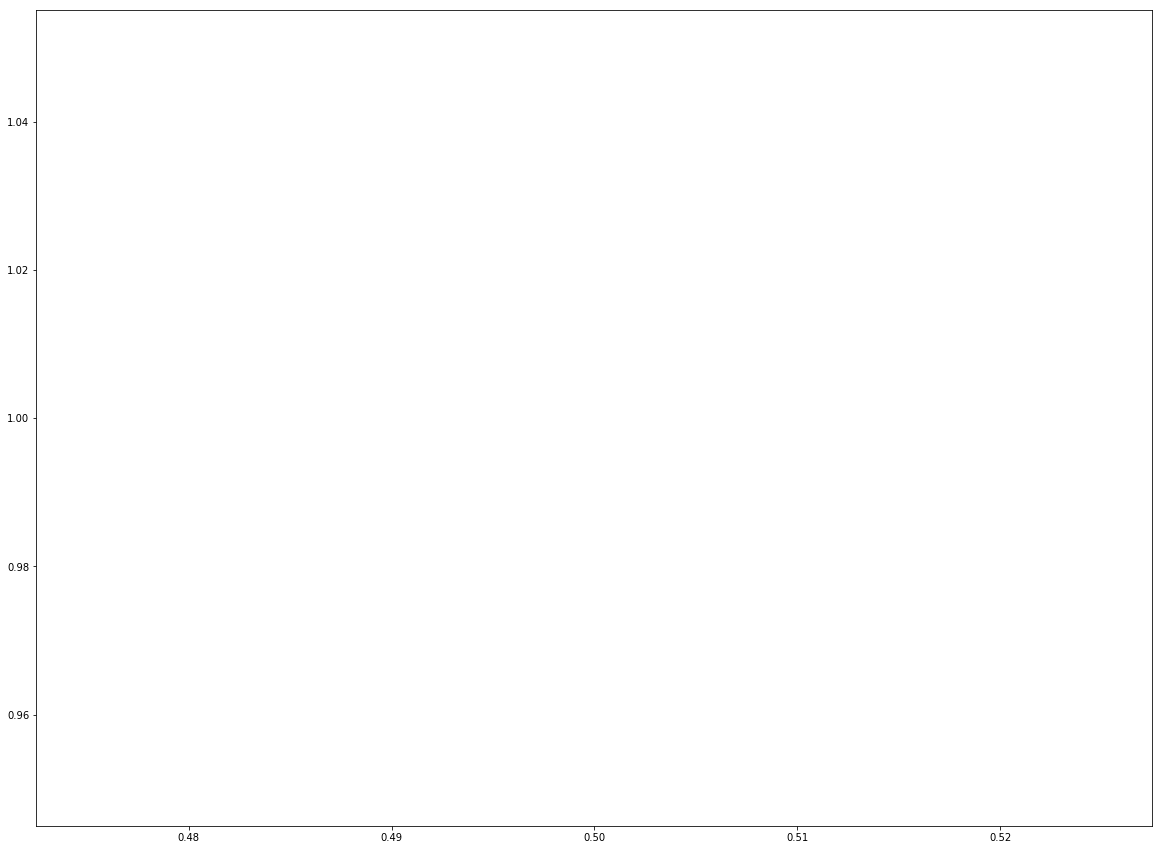




CoulombE
(13,)
(14,)
(13,)
(13,)
(14,)
(13,)
0.9253968253968253
0.9502074688796682


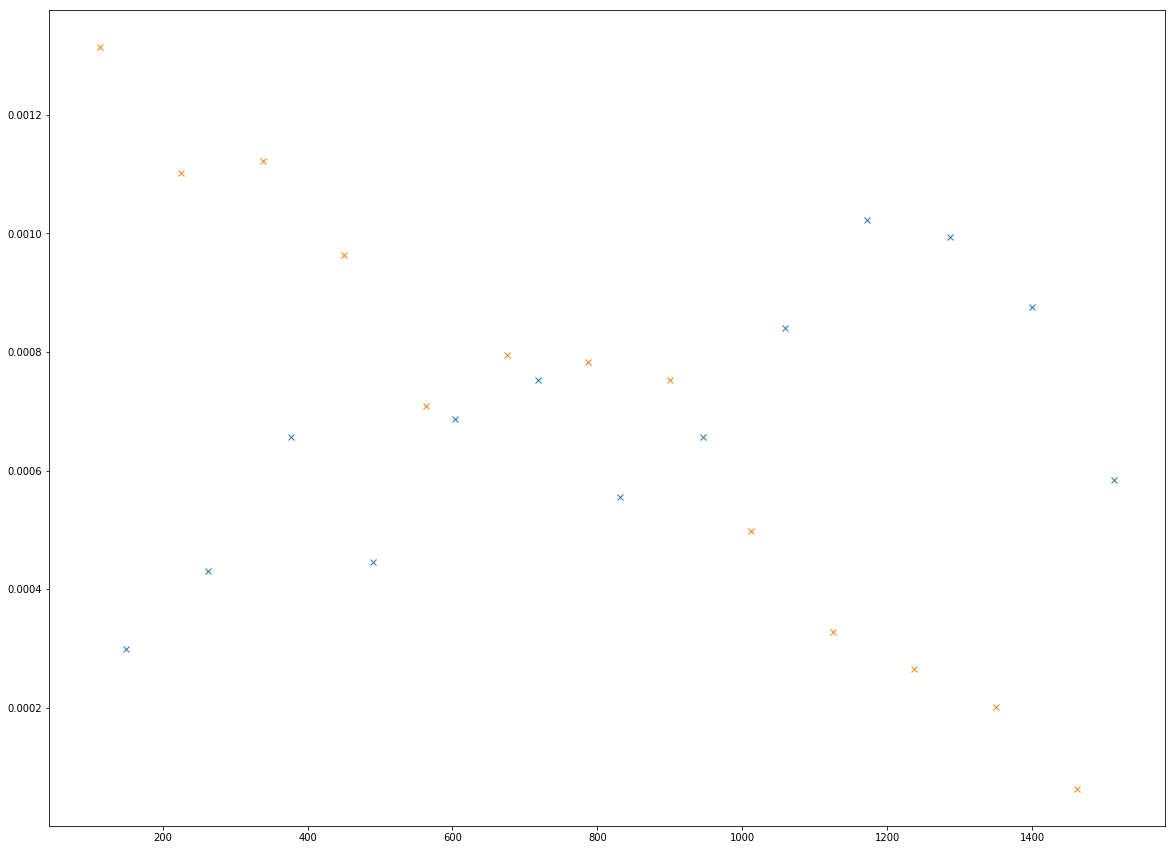

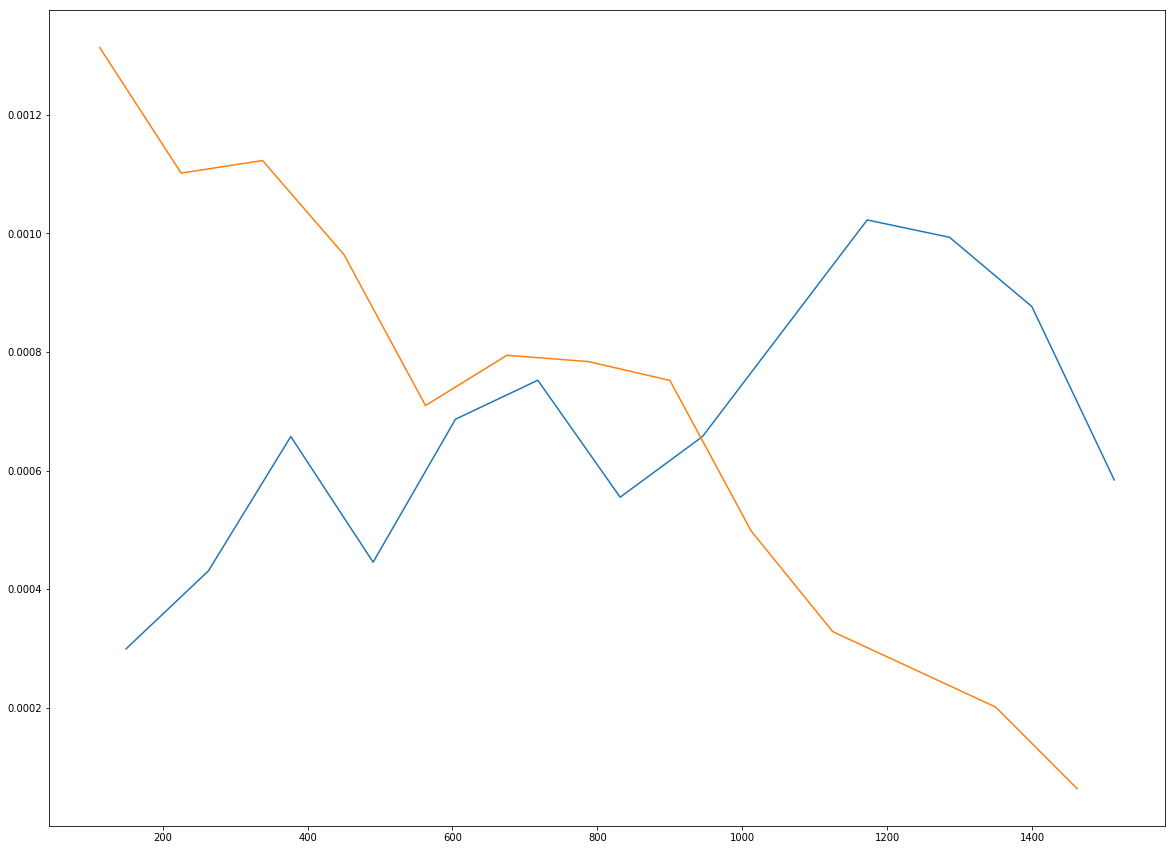




CoulombDir
(13,)
(14,)
(13,)
(13,)
(14,)
(13,)
0.9305555555555554
0.9510373443983402


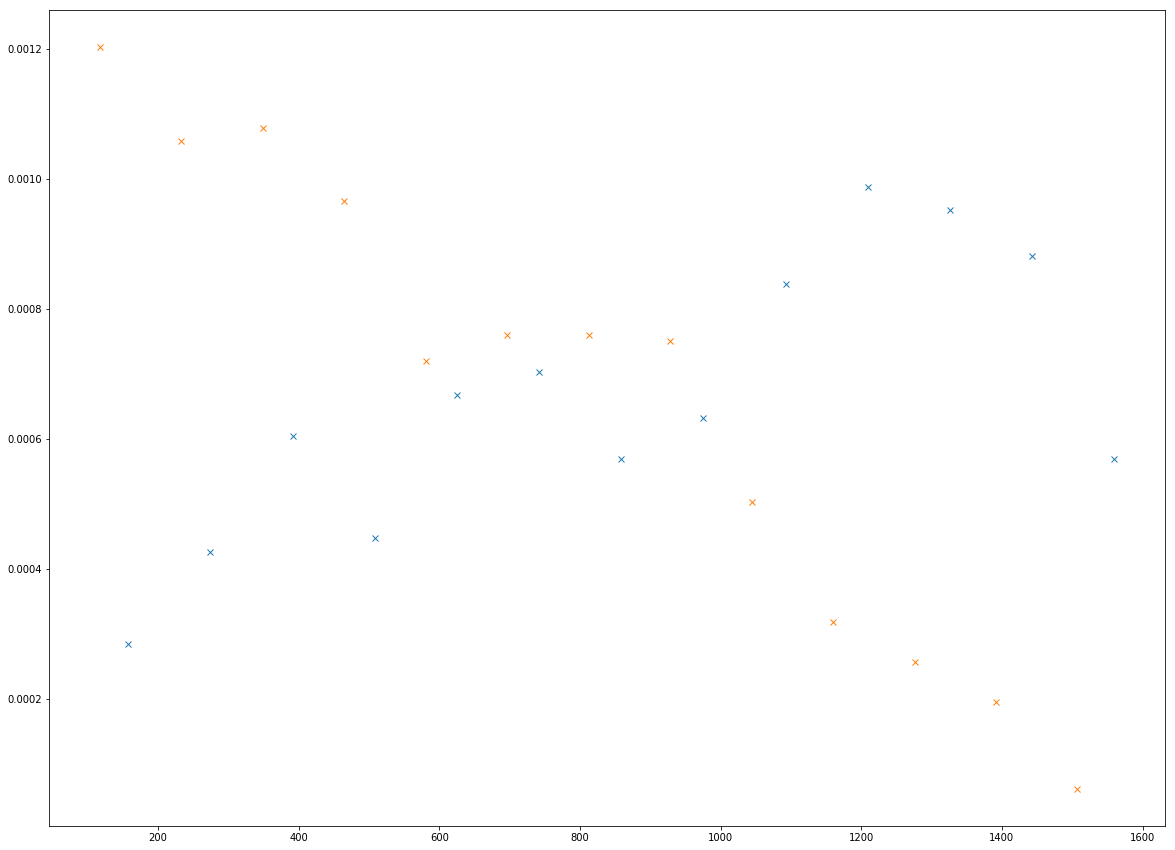

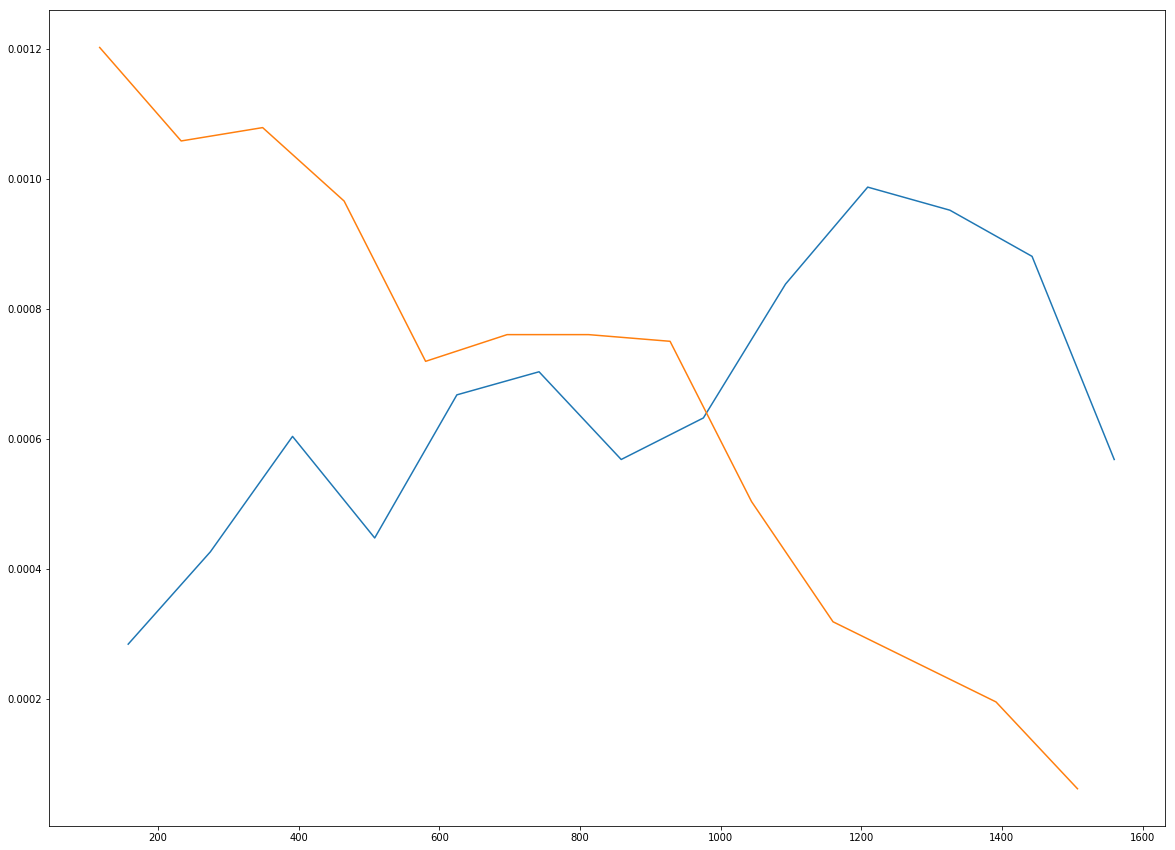




CoulombEx
(13,)
(14,)
(13,)
(15,)
(16,)
(15,)
0.9813492063492063
0.9560165975103736


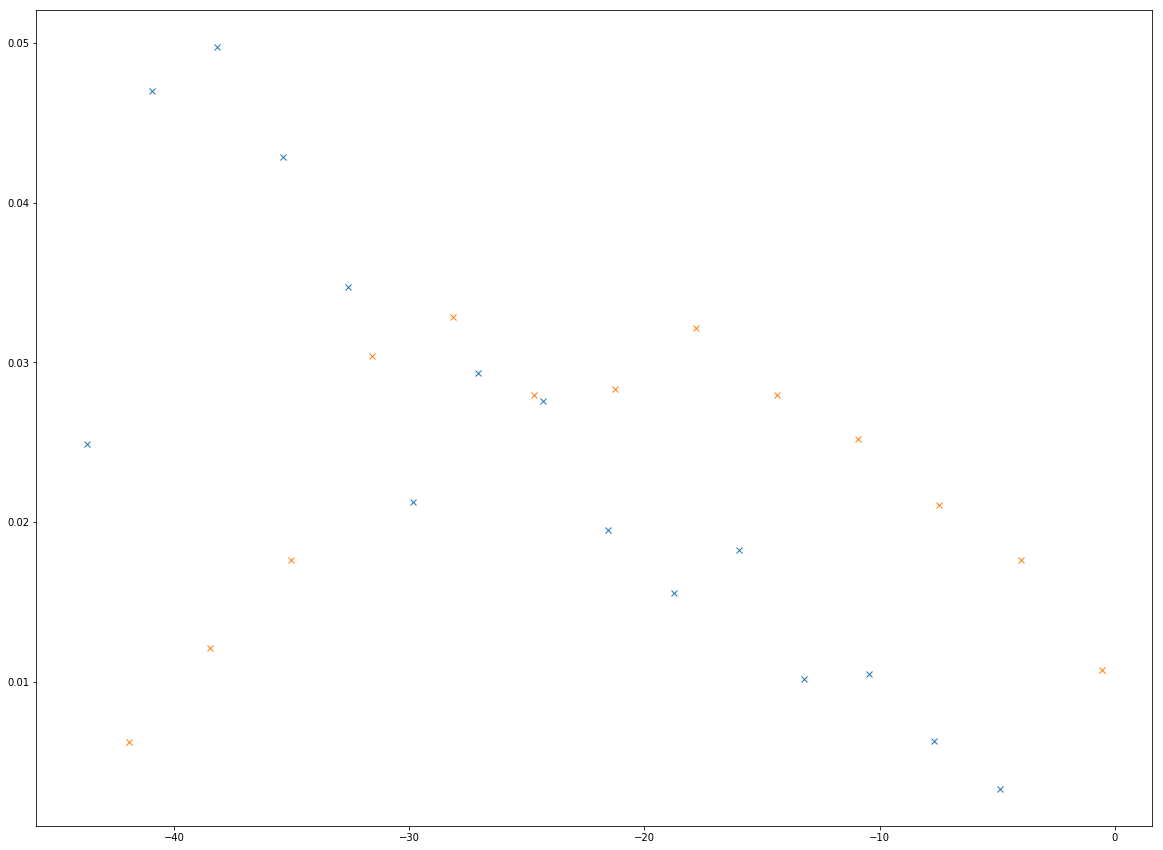

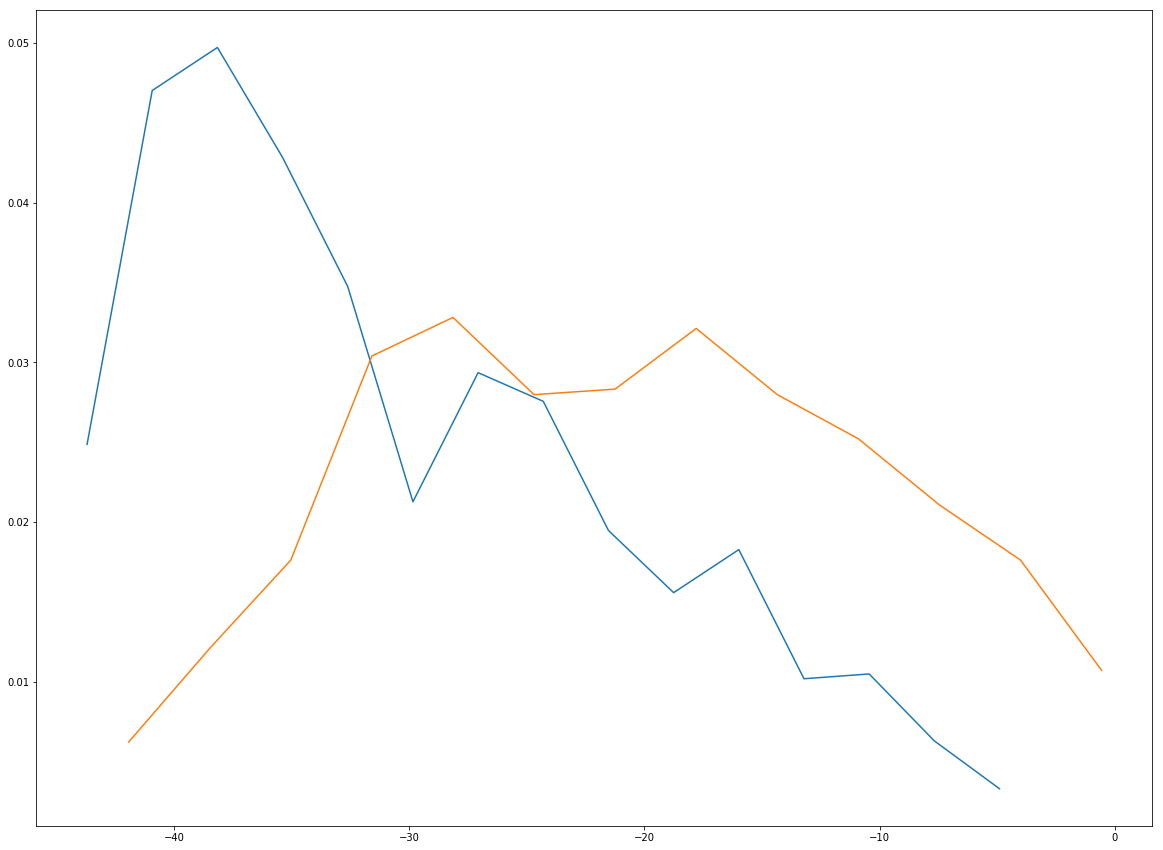




TensorE
(22,)
(23,)
(22,)
(37,)
(38,)
(37,)
0.978670634920635
1.0157676348547717


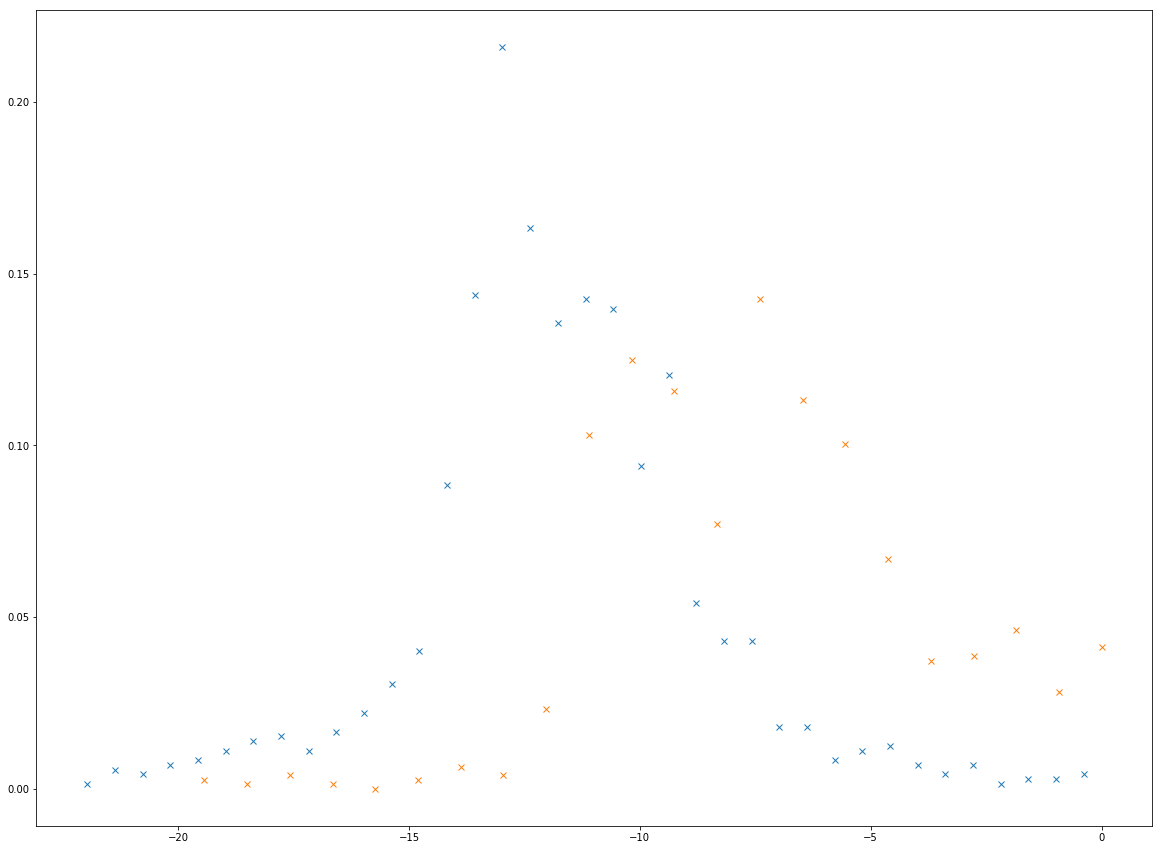

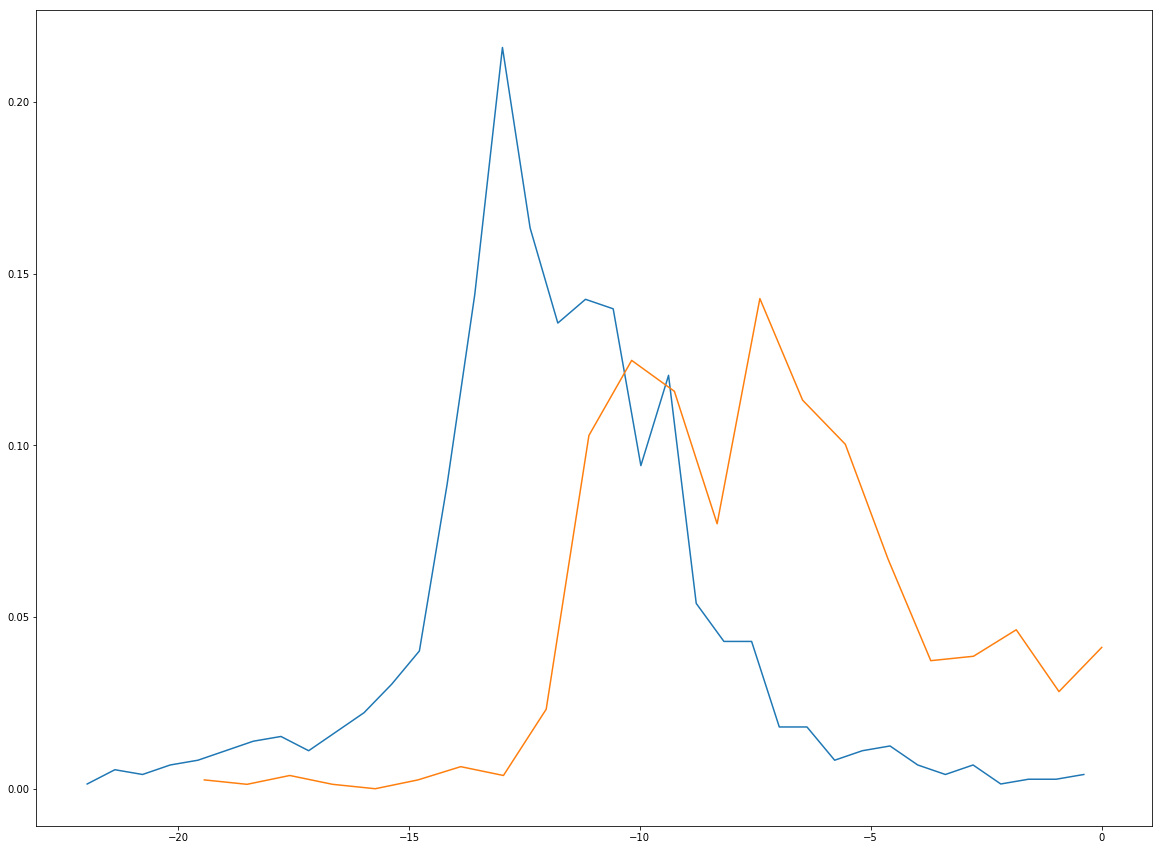




HartreeE
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


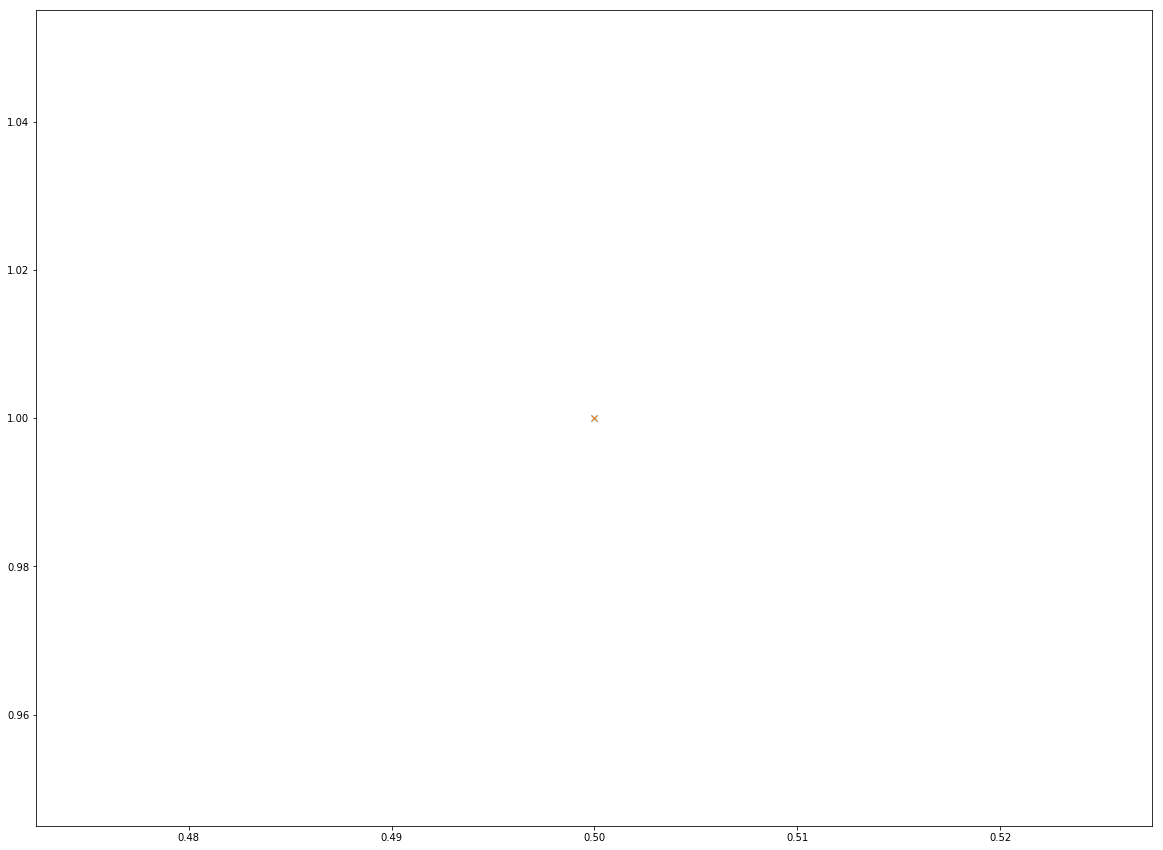

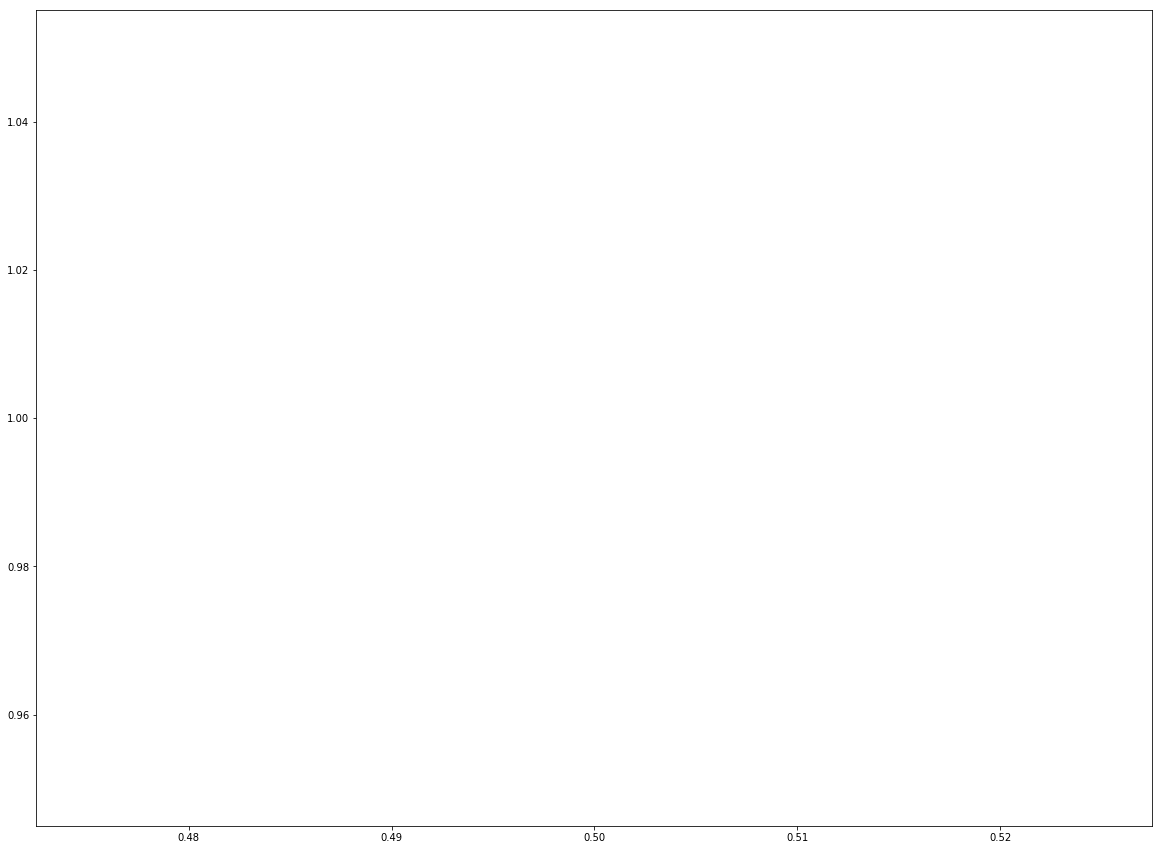




ExtraE
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


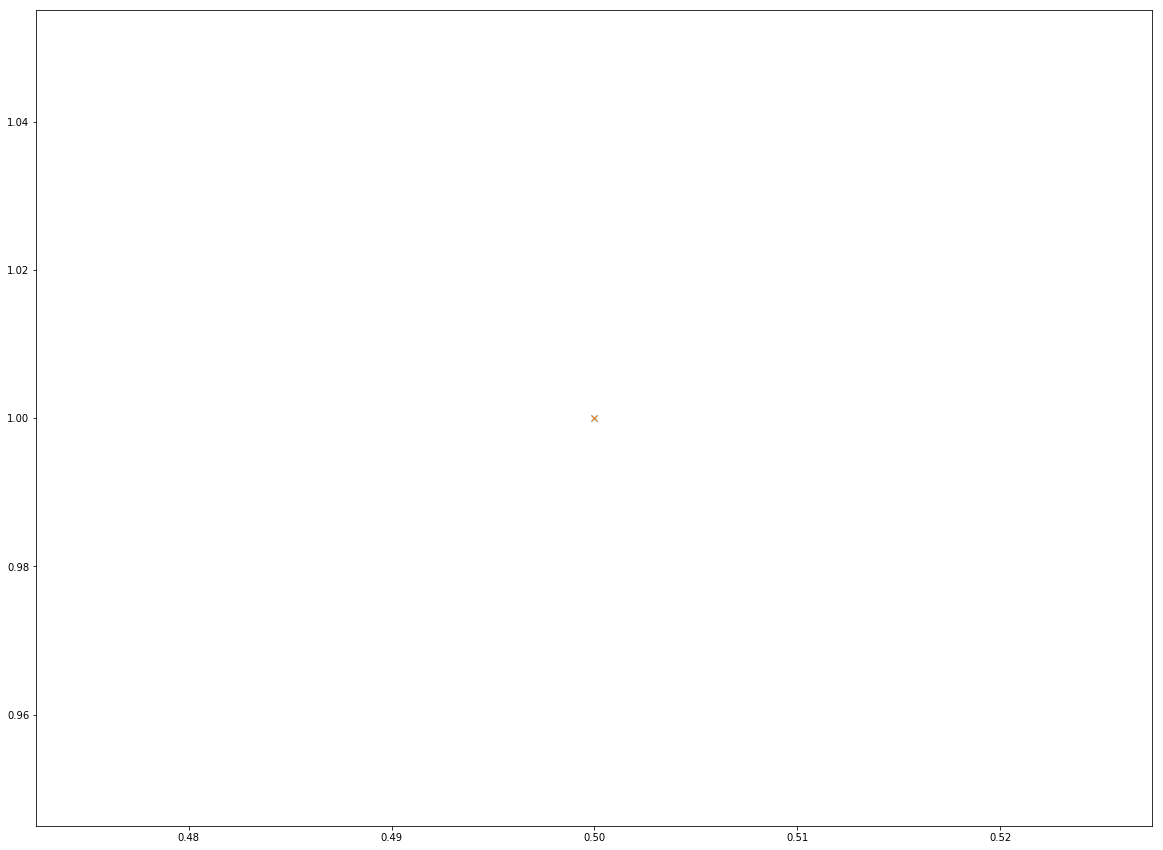

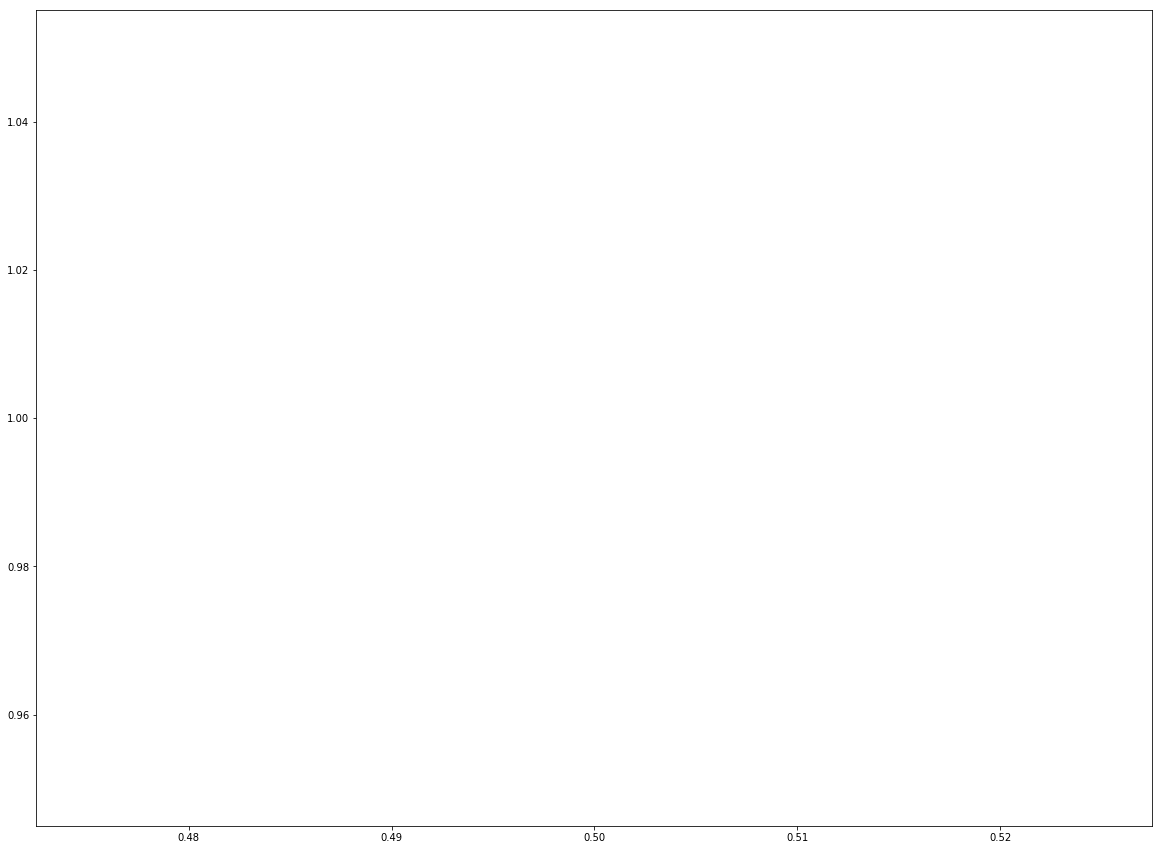




ExternalFE
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


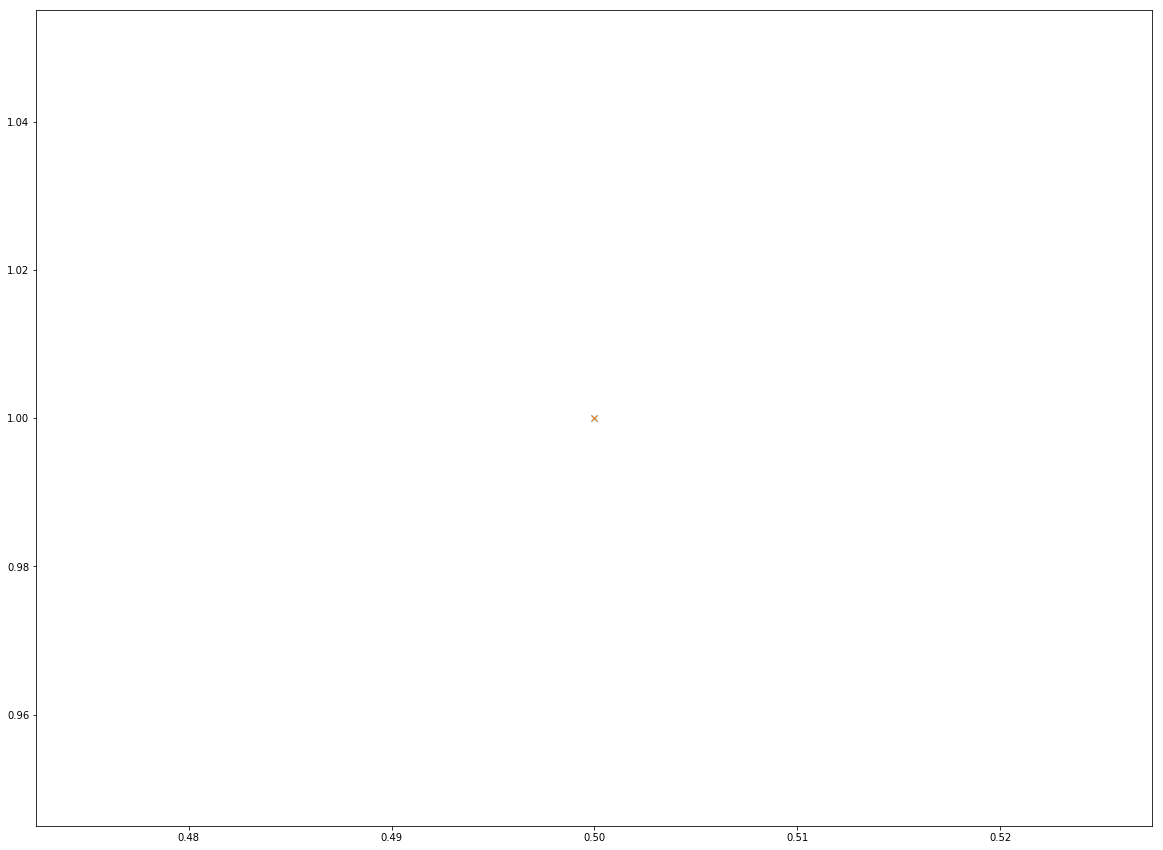

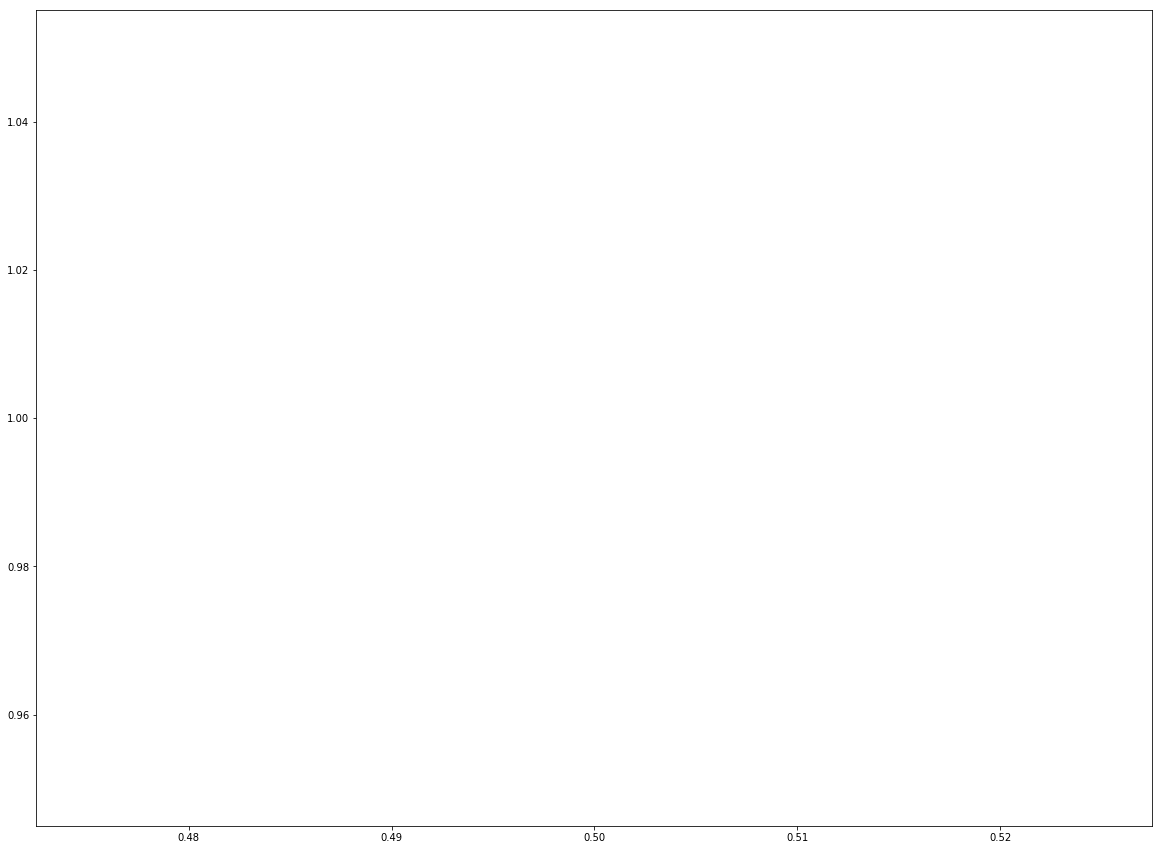




Entropy_n
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


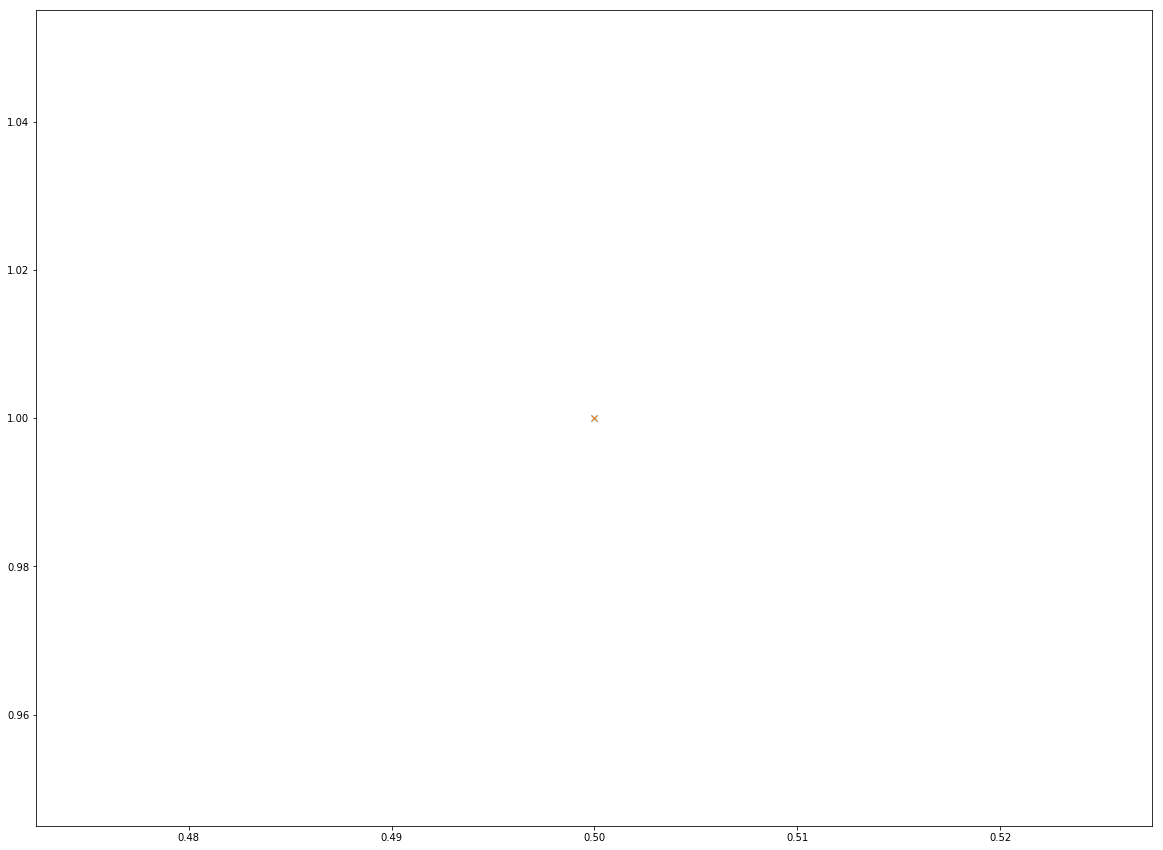

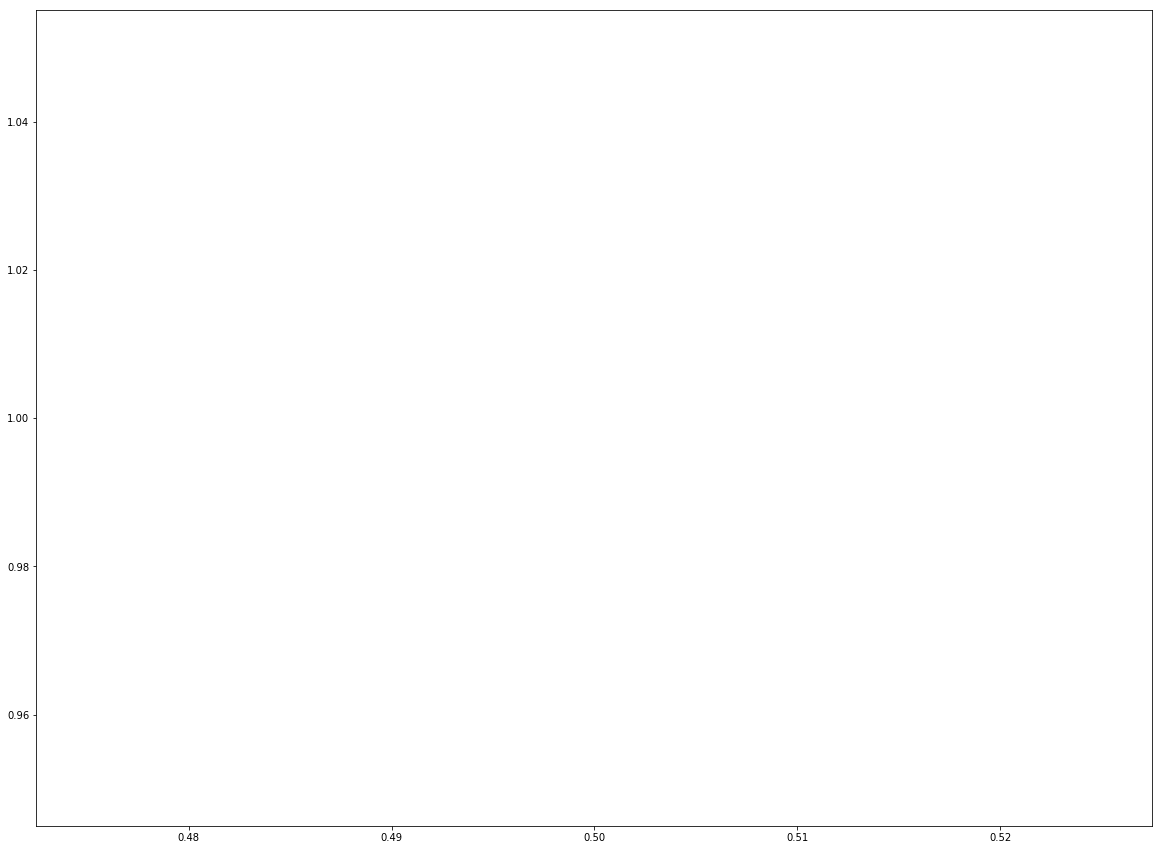




Entropy_p
(1,)
(2,)
(1,)
(1,)
(2,)
(1,)
0.0
0.0


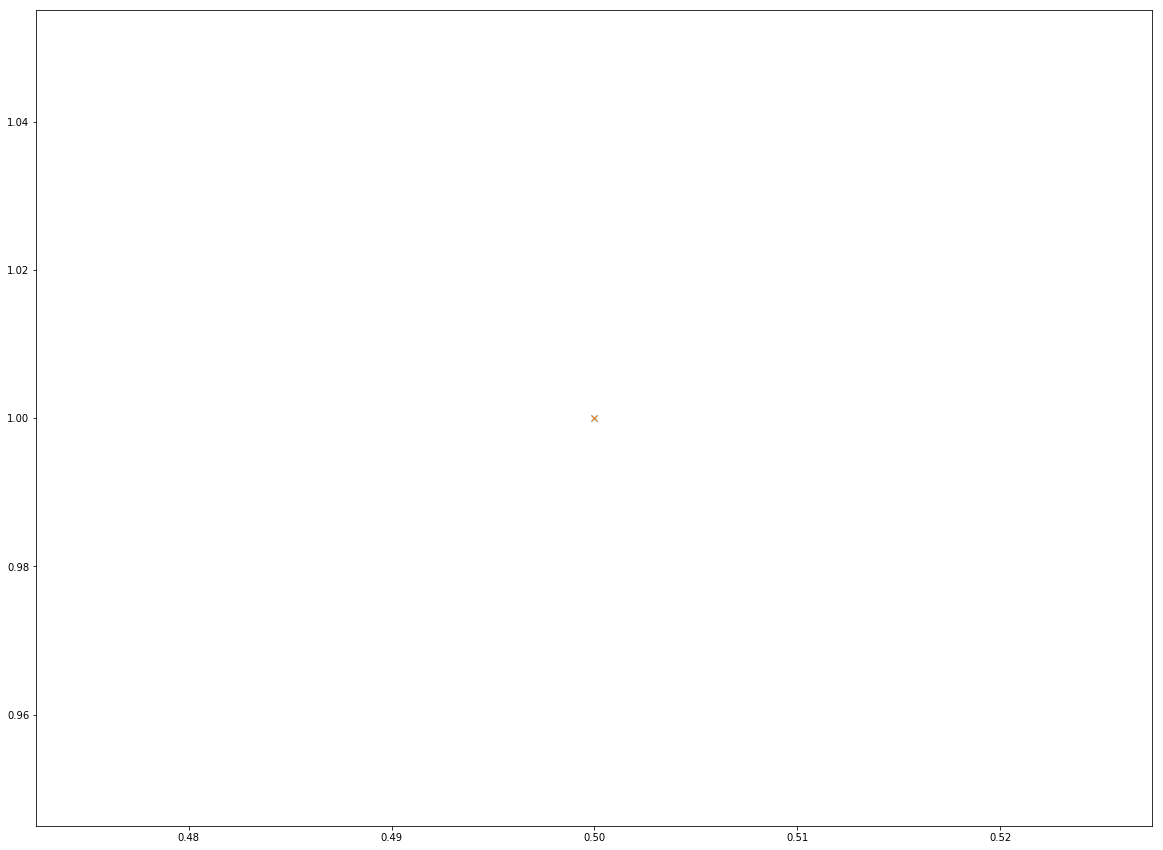

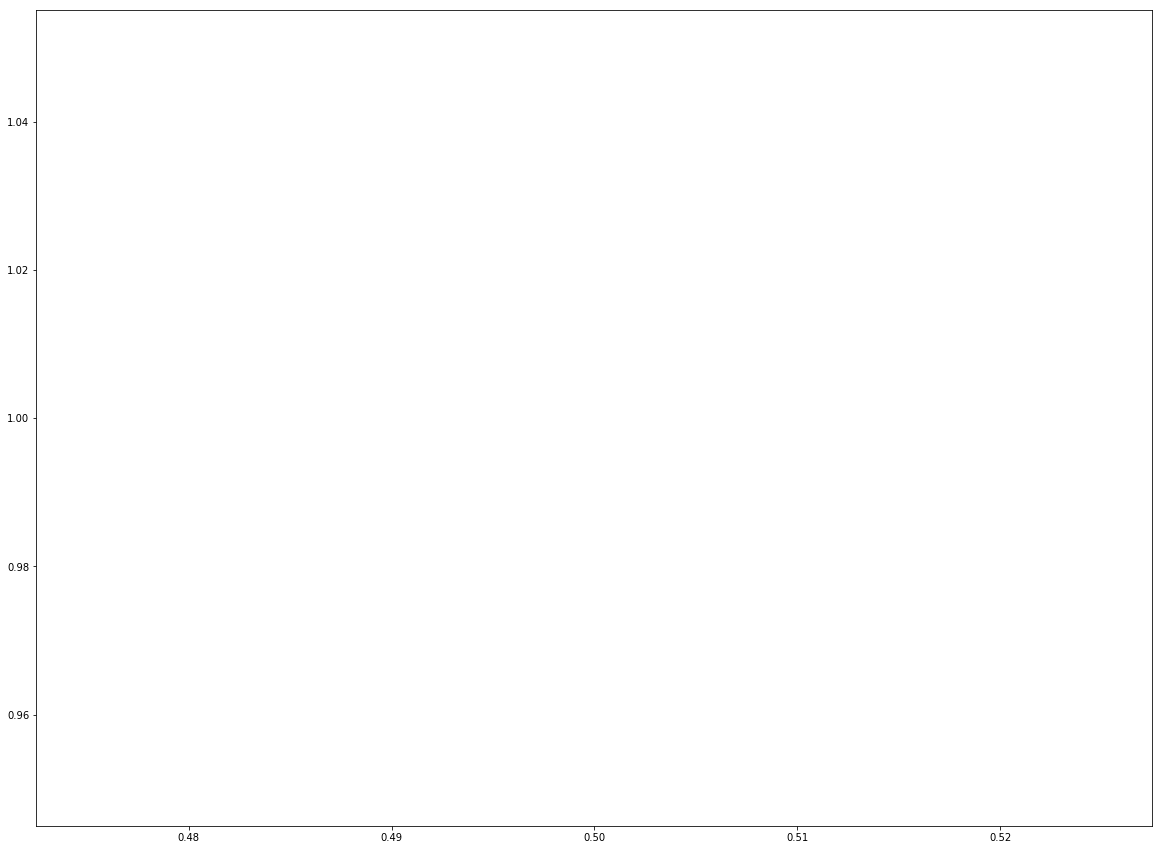

In [74]:
names=['match', 'no match']
colors=['blue', 'red']
from scipy import stats
    
for i in df.columns:
    print(i)
    
    
    
    
    
    
    
    
    m_hist, m_bins =np.histogram(match_df[i], bins='auto', density=True  )
    print(np.shape(m_hist))
    print(np.shape(m_bins))
    
    
    m_bin_cen=[]
    for j in range(0,len(m_bins)-1):
        k=m_bins[j+1]-m_bins[j]
        m_bin_cen.append(m_bins[j]+k)
    
    print(np.shape(m_bin_cen))
    
    nm_hist, nm_bins =np.histogram(no_match_df[i], bins='auto', density=True  )
    print(np.shape(nm_hist))
    print(np.shape(nm_bins))
    
    
    nm_bin_cen=[]
    for j in range(0,len(nm_bins)-1):
        k=nm_bins[j+1]-nm_bins[j]
        nm_bin_cen.append(nm_bins[j]+k)
    
    print(np.shape(nm_bin_cen))
    
    
    m_int = integrate.simps(m_hist, m_bin_cen)
    nm_int = integrate.simps(nm_hist, nm_bin_cen)
    
  
    print(m_int)
    print(nm_int)
    
    plt.plot(nm_bin_cen, nm_hist, "x")
    plt.plot(m_bin_cen, m_hist, "x")
    plt.show()
    plt.plot(nm_bin_cen, nm_hist)
    plt.plot(m_bin_cen, m_hist)
    plt.show()
    

    
    
    
    
    
   



    print("\n\n")
    

Z
(0.9999823771941814, 0.0016394744524533822)
(0.999717450850626, 0.0004924195188712455)
(0.007413542299417638, 8.161878105669186e-05)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

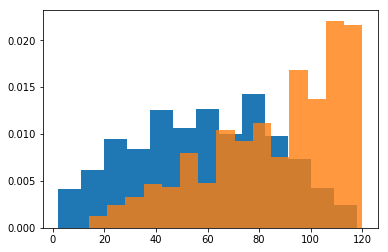

N
(0.9999830227675428, 0.0009514264131681438)
(1.000319749240594, 0.0045025686593621606)
(0.002776314994601946, 2.2929878029054936e-05)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

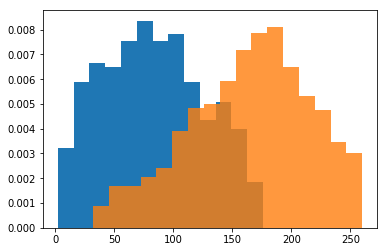

Energy
(0.9999629680543619, 0.002384746118348602)
(0.9997041867562686, 0.011675806279030587)
(0.000348117219901443, 2.781309298824819e-07)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

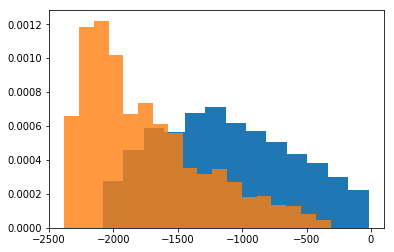

NShells
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


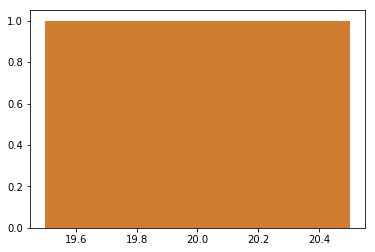

b0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0003024385395571, 0.002240180750740728)
(1.0000471617159603, 0.0002917289187926997)
(1.0698025687075883, 0.023961518550495775)


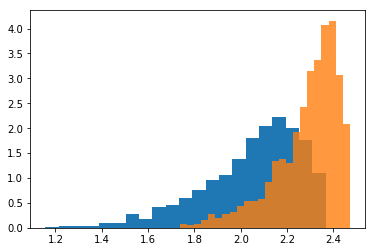

bz


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9998163550181821, 0.002836425594052616)
(0.9982172542425956, 0.024086833326310564)
(1.2866236674637828, 0.01879803131112534)


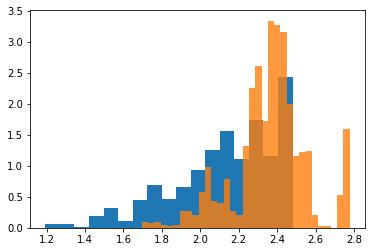

bp


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9999726380345707, 0.01043998958835557)
(0.9991314220135131, 5.0537327401900534e-05)
(1.064740208738447, 0.001229926659146674)


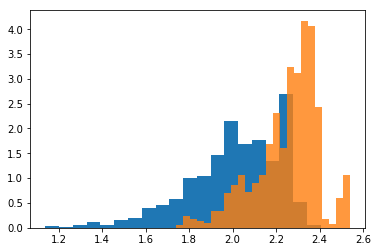

lambda_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9998192225144508, 0.00038590673530325414)
(0.9996061920122638, 0.029040587815765795)
(0.04017363550356434, 0.0013724213849825168)


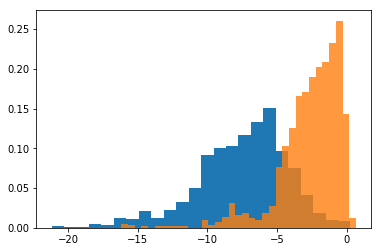

lambda_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0000858338303138, 0.013829583985497058)
(0.9995945253275919, 0.002317087429637321)
(0.03599912314026618, 0.00012480381678124652)


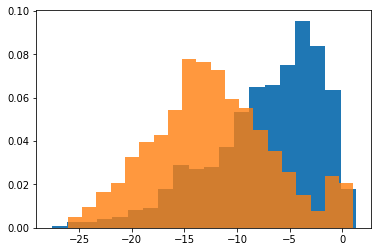

Lambda_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9998192225144508, 0.00038590673530325414)
(0.9996061920122638, 0.029040587815765795)
(0.04017363550356434, 0.0013724213849825168)


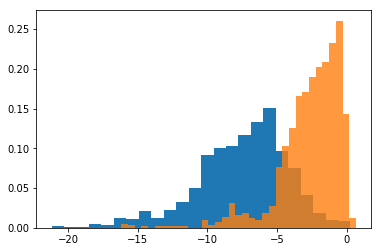

Lambda_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0000858338303138, 0.013829583985497058)
(0.9995945253275919, 0.002317087429637321)
(0.03599912314026618, 0.00012480381678124652)


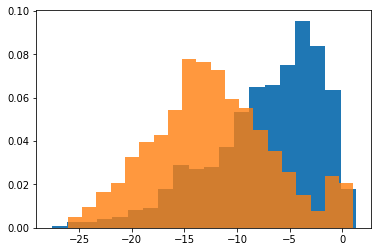

delta_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9995735620443393, 0.013837529168058804)
(1.0142227289083297, 0.016264234126863064)
(2.2985921176866873, 0.07987516489829405)


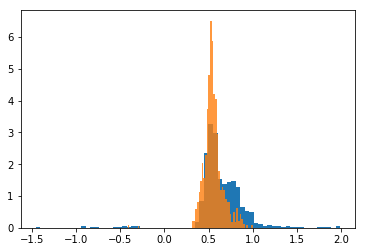

delta_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0004100830768081, 0.027264326456931887)
(1.0025485310130944, 0.0014851331751266628)
(1.3692847661015848, 0.022048749255535904)


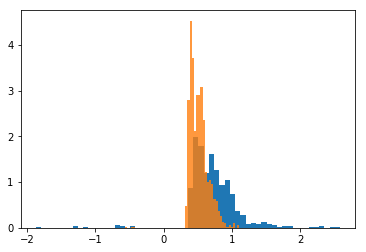

pwi
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


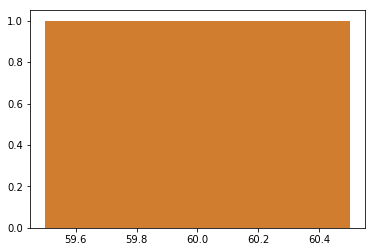

pairingE_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0010167136939958, 0.006067683637219545)
(1.0001338800080382, 0.024883929412102823)
(0.10364761272465545, 0.000912236144288564)


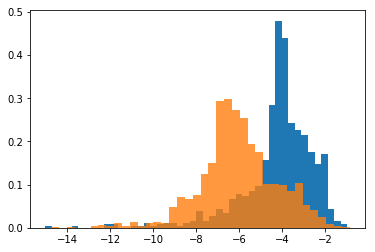

pairingE_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0007553724987235, 0.010953407785630032)
(0.998186395438702, 0.014473287350131092)
(0.2783124151900517, 0.009232038739036719)


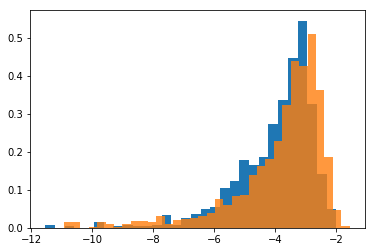

LNlambda_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0000975208029907, 0.04201519422007349)
(0.9996429692382008, 0.0169148861261591)
(2.8797008243255062, 0.03241099791881474)


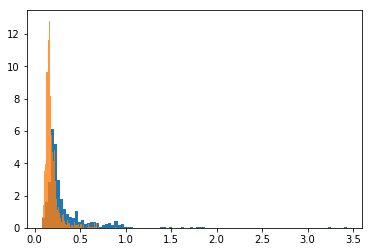

LNlambda_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9972147943574481, 0.026563279364312464)
(1.0001860318099616, 0.004126209570953862)
(2.4325997539002913, 0.10223720993855823)


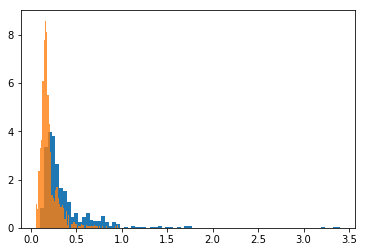

LNEnergy_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9996598919181072, 0.026103032135925686)
(1.0008537464771974, 0.01943246337177784)
(1.7486947148174428, 0.05626754927072075)


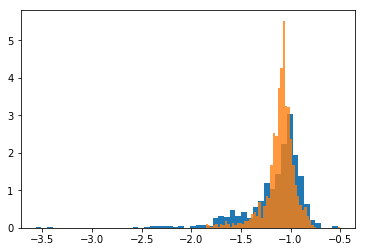

LNEnergy_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9956717453930304, 0.0014201835725099476)
(1.0000422504588862, 0.005958359585123252)
(0.9478157688385539, 0.01113084459119984)


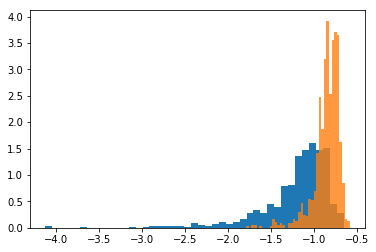

LNdelta_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9981793075516816, 0.03908023202412092)
(0.9994088208597179, 0.06714881143438009)
(1.5831748018223237, 0.010956896642537961)


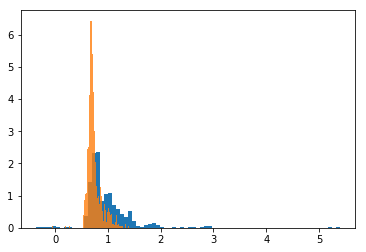

LNdelta_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9976159964984481, 0.07249309884598687)
(1.0007001325983307, 0.015290090106765963)
(0.9238080979811432, 0.04099092043707209)


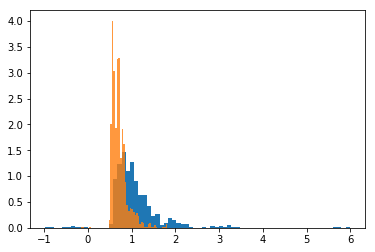

Geff_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0008340548927714, 0.06755533137117219)
(1.0000015294828173, 0.06428726457498224)
(6.463416454199068, 0.49646073022863274)


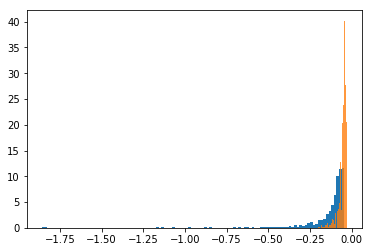

Geff_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9989156723013258, 0.016069124382796507)
(0.9906164617022201, 0.03739876249322738)
(5.947644034310252, 0.4782425467420587)


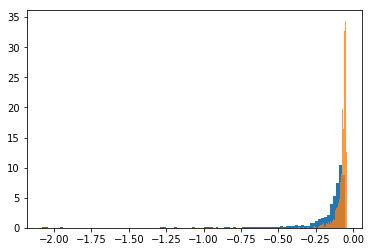

rms_r_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9998834805686544, 0.0018369039895370642)
(0.9998981940526664, 0.008571622192710127)
(0.20536753132123092, 0.0012623800084416714)


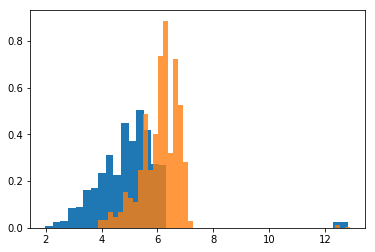

rms_r_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.99996593730287, 0.008905081709565943)
(1.000094835969032, 0.04529253273024459)
(0.22675053492802338, 0.006563224622359004)


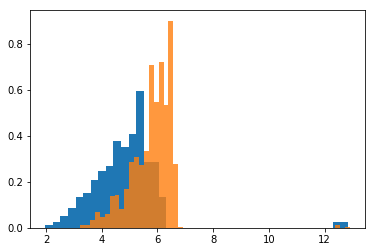

rms_r_t


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9999771363470864, 0.0074148071113874225)
(0.992031762308285, 0.01231366966655556)
(0.21243418280784787, 0.00837637211964926)


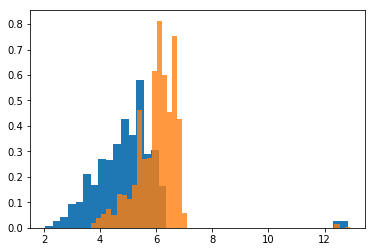

charge_r_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0006759531152247, 0.021796098016388366)
(0.999425567764105, 0.04041392592779903)
(0.23009362179749296, 0.0020803782892603873)


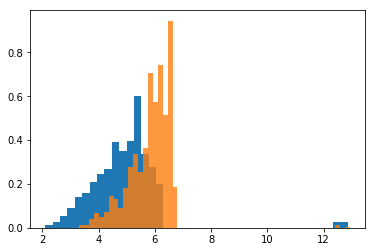

charge_r_t


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9995227842741252, 0.010991708633770756)
(0.9990860962935963, 0.0026214652289177076)
(0.16806370694555933, 0.0006834681573825718)


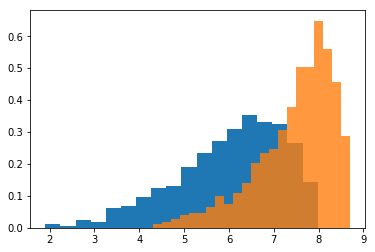

beta2_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0000000000000002, 1.107569310736311e-14)
(0.9998965136148853, 0.06905764554745088)
(2.0062454916330115, 0.019771834637090757)


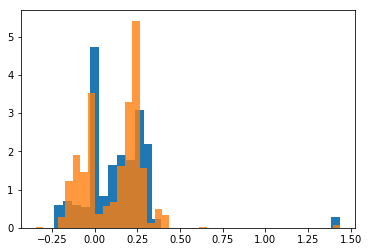

beta2_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0006057667470503, 0.0034753759461754186)
(0.9960290050851934, 0.006533443833505181)
(2.1017664007817296, 0.023776771696759624)


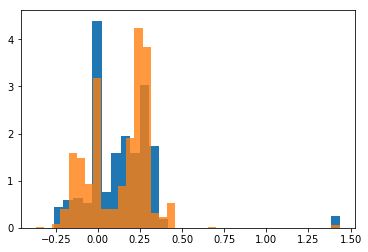

beta2_t


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0007504081122829, 0.025736564706010302)
(1.0002899847198843, 0.0707554350560946)
(1.9623021968253591, 0.05749272822918727)


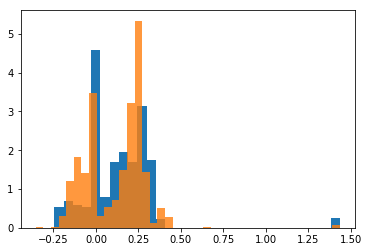

dipole_n
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


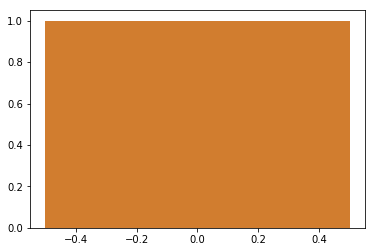

dipole_p
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


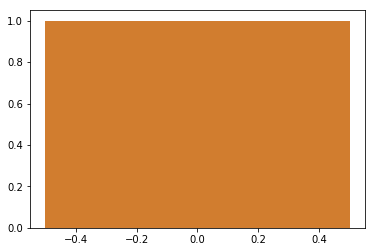

quadpole_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(1.0015163460949041, 0.11164505369576441)
(1.0022085011340311, 0.0633204164864608)
(0.03138347421478744, 0.0014588249513015979)


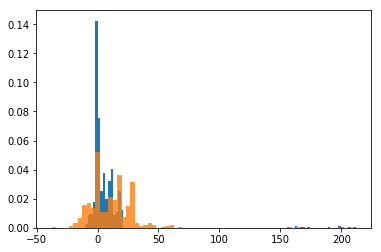

quadpole_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9967872801607951, 0.02180005438205579)
(1.004305360797103, 0.07159904594551891)
(0.051737171207229066, 0.002026054995555318)


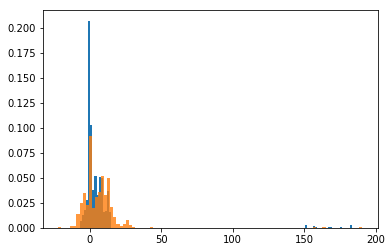

octpole_n
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


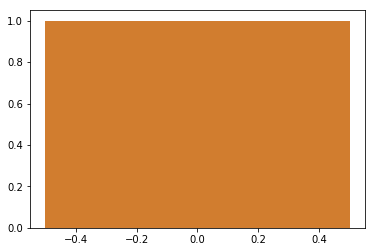

octpole_p
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


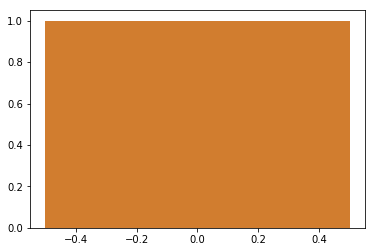

hexdpole_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.9837732223075384, 0.12175963139580102)
(1.0047209689225687, 0.010393572776590254)
(0.8166088983038734, 0.13312994801607964)


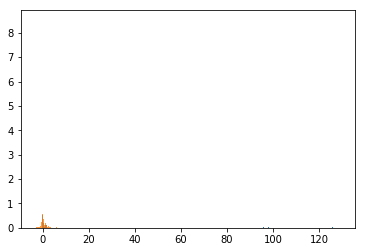

hexdpole_p


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  P

(0.5119771777269179, 0.015026398552616449)
(0.9966276459487104, 0.0861285748729226)
(2.12530954299293, 0.34088098712875303)


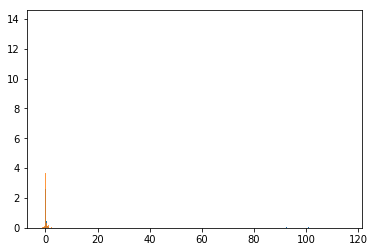

q5_n
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


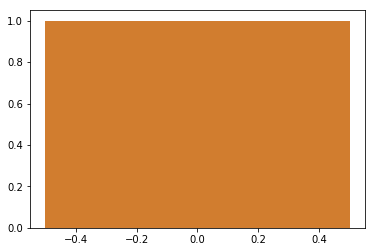

q5_p
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)
(1.0, 1.1102230246251565e-14)


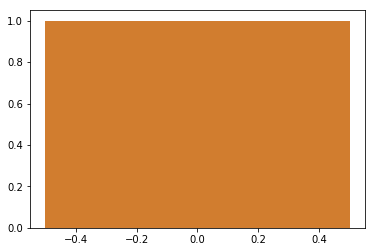

q6_n


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


(0.0, 0.0)
(0.9930075864510381, 0.02909604064137339)
(0.0, 0.0)


In [ ]:
"""
All but the last (righthand-most) bin is half-open. In other words, if bins is:
[1, 2, 3, 4]
then the first bin is [1, 2) (including 1, but excluding 2) 
and the second [2, 3). The last bin, however, is [3, 4], which includes 4.
"""


for i in df.columns:
    print(i)

    out_1=match_df[i]
    out_2=no_match_df[i]

    #out_1=[1,1,2,2,5,5]
    #inp_1=[1,3,4,5,6,7]

    #out_2=[1,1,2,2,5,5]#=[1,6,2,2,7, 5]
    #inp_2=[1,3,4,5,6,7]#=[6,7,8,9,10,11]

    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    #!!!!!!!!!!!!!!!!!!!!!!!!!!!!'auto'
    histogram_1, bins_1 =np.histogram(out_1, bins='auto', density=True  )
    edges_1=np.histogram_bin_edges(out_1, bins='auto')


    histogram_2, bins_2 =np.histogram(out_2, bins='auto', density=True  )
    edges_2=np.histogram_bin_edges(out_2, bins='auto')




    def hist_1(x):
        if x<min(edges_1) or x>max(edges_1):
            return 0
        elif x==edges_1[-1]:
            return histogram_1[-1]
        else:
            for i in range(0,len(edges_1)-1):
                if edges_1[i]<=x<edges_1[i+1]:
                    return histogram_1[i]



    def hist_2(x):
        if x<min(edges_2) or x>max(edges_2):
            return 0
        elif x==edges_2[-1]:
            return histogram_2[-1]
        else:
            for i in range(0,len(edges_2)-1):
                if edges_2[i]<=x<edges_2[i+1]:
                    return histogram_2[i]


    def hist_1_2(x):

        l=hist_1(x)*hist_2(x)
        return l





    if min(edges_1)<=min(edges_2):
        f_l=min(edges_1)
    else:
        f_l=min(edges_2)

    if max(edges_1)>=max(edges_2):
        f_r=max(edges_1)
    else:
        f_r=max(edges_2)




    #print(edges_1)
    #print(edges_2)

    #print(bins_1)
    #print(bins_2)

    #print(histogram_1)
    #print(histogram_2)

    #print(f_l)
    #print(f_r)


    first  =quad(hist_1, min(edges_1), max(edges_1))
    second =quad(hist_2, min(edges_2), max(edges_2))
    both   = quad(hist_1_2, f_l, f_r)


    print(first)
    print(second)
    print(both)


    #plt.plot(inp_1,out_1)
    #plt.plot(inp_2,out_2)
    #plt.show()

    plt.hist(out_1, bins='auto', density=True  )
    plt.hist(out_2, bins='auto', density=True, alpha=0.8 )
    plt.show()



()
10.5


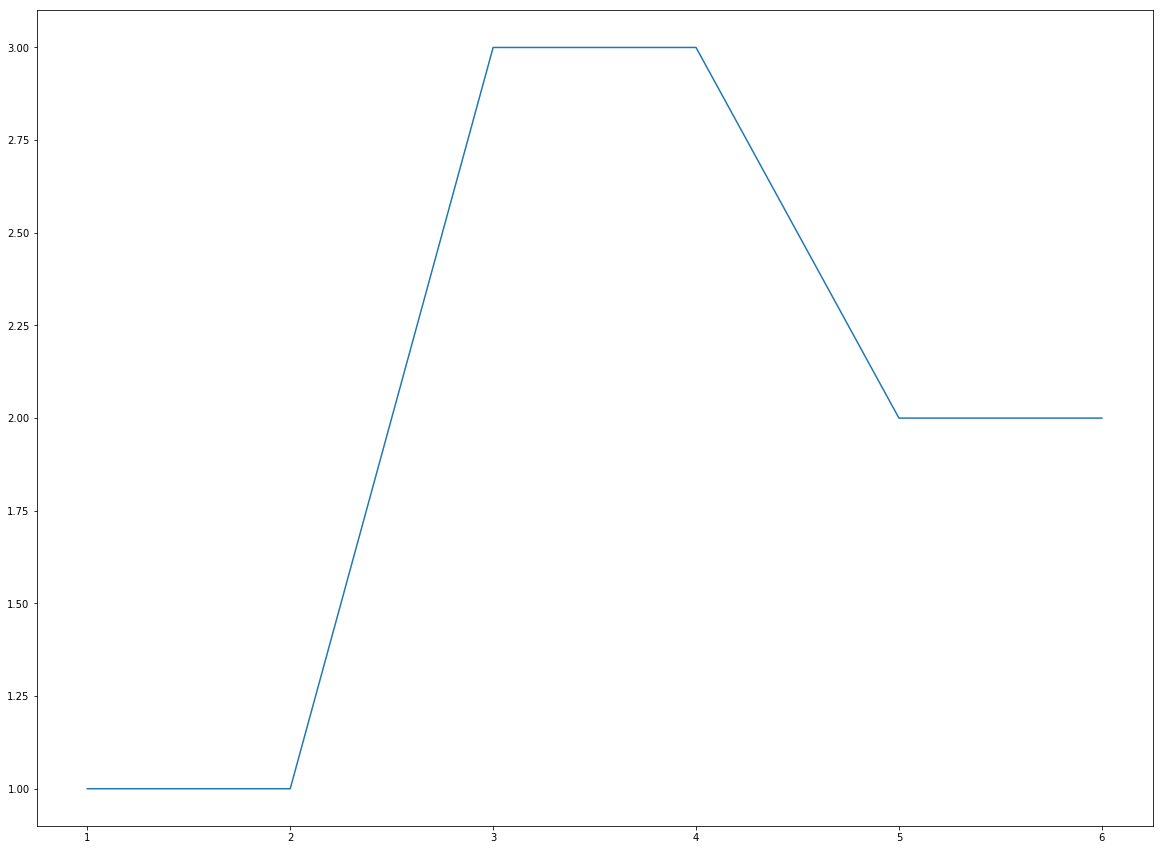

In [75]:
"""
>>> x = np.linspace(-2, 2, num=20)
>>> y = x
>>> y_int = integrate.cumtrapz(y, x, initial=0)
>>> plt.plot(x, y_int, 'ro', x, y[0] + 0.5 * x**2, 'b-')
>>> plt.show()
"""
y_int = integrate.simps(b, a)
print(np.shape(y_int))
print(y_int)



def test(x):
    
    
    return a[0]
    
test(1)


plt.plot(a,b)
plt.show()

In [29]:
for i in df.columns:
    print(i)
    
    #x= np.arange(-4,4,0.001)
    #plt.plot(x, norm.pdf(x))

    #plt.show()

    match_arr=np.array(match_df[j])
    
    print(np.shape(match_arr))
    print(np.shape(norm.pdf(match_arr)))
    print(np.shape(norm.pdf(match_df[j])))
    
    rv=norm()
    x=rv.pdf(match_df[j])
    print(x[0])
    print(x[1])
    print(x[2])
    print(x[3])
    
    
    #plt.plot(match_arr, norm.pdf(match_arr), "x")
    #plt.show()


Z
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
N
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
Energy
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
NShells
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
b0
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
bz
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
bp
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
lambda_n
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
lambda_p
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.3989422804014327
0.3989422804014327
Lambda_n
(840,)
(840,)
(840,)
0.3989422804014327
0.3989422804014327
0.39894228040

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


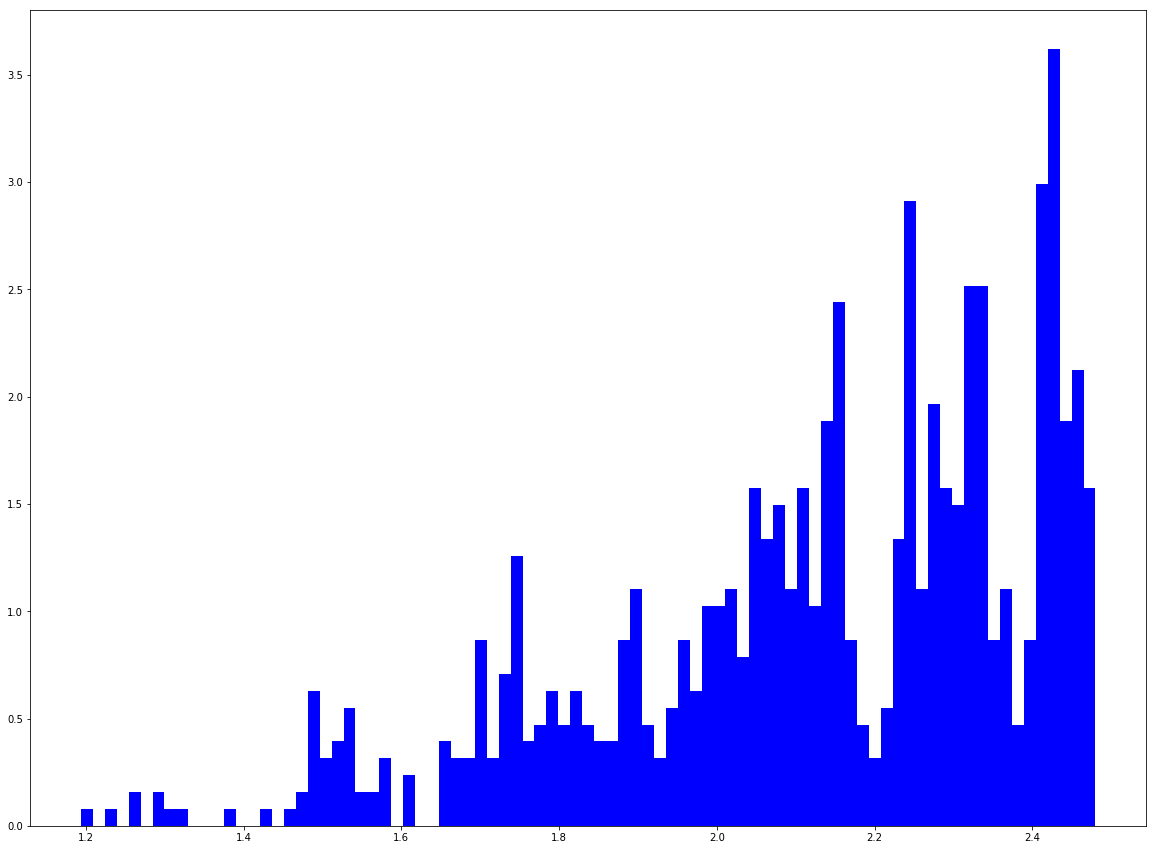

In [40]:
plt.hist(match_df['bz'], bins = 85, normed=True, color ='blue', label='names')
    
plt.show()


In [60]:
from statistics import NormalDist

for j in df.columns:
    print(j)
    match_df[j].mean()
    match_df[j].std()
    
    l=NormalDist(mu=match_df[j].mean(), sigma=match_df[j].std()).overlap(NormalDist(mu=no_match_df[j].mean(), sigma=no_match_df[j].std()))
    print(l)
    # 0.2112995473337106
    
    
    
    #match=list(match)
    #no_match=np.array(no_match)
    
    #NormalDist.from_samples(match)
    
    
 

ImportError: cannot import name 'NormalDist' from 'statistics' (C:\ProgramData\Anaconda3\lib\statistics.py)

# Don't Go Past this point

In [ ]:
# Create x, where x the 'scores' column's values as floats
x = df[['score']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [44]:
df1=match_df.values.astype(float)


min_max_scaler = preprocessing.MinMaxScaler()


df1_scaled=min_max_scaler.fit_transform(df1)


df1_normalized=pd.DataFrame(df1_scaled)

In [52]:
df2=no_match_df.values.astype(float)


min_max_scaler = preprocessing.MinMaxScaler()


df2_scaled=min_max_scaler.fit_transform(df2)


df2_normalized=pd.DataFrame(df2_scaled)

In [47]:
df1_normalized.describe()

0           1           2           3      4      5      6   \
count  840.000000  840.000000  840.000000  840.000000  840.0  840.0  840.0   
mean     0.348596    0.344353    0.513041    0.466074    0.0    0.0    0.0   
std      0.240370    0.240580    0.237511    0.249131    0.0    0.0    0.0   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.0    0.0   
25%      0.143940    0.139120    0.321452    0.267164    0.0    0.0    0.0   
50%      0.308706    0.303350    0.510817    0.446919    0.0    0.0    0.0   
75%      0.530171    0.525593    0.698874    0.655140    0.0    0.0    0.0   
max      1.000000    1.000000    1.000000    1.000000    0.0    0.0    0.0   

          7           8           9   ...          58          59          60  \
count  840.0  840.000000  840.000000  ...  840.000000  840.000000  840.000000   
mean     0.0    0.950709    0.944836  ...    0.077730    0.064685    0.599294   
std      0.0    0.083294    0.091633  ...    0.100483    0.104409    0.225130   
min      0.0    0.000000    0.000000  ...    0.000000    0.000000    0.000000   
25%      0.0    0.946501    0.940811  ...    0.046132    0.036216    0.435986   
50%      0.0    0.975602    0.973036  ...    0.053491    0.042081    0.628636   
75%      0.0    0.987980    0.986854  ...    0.091055    0.071993    0.775578   
max      0.0    1.000000    1.000000  ...    1.000000    1.000000    1.000000   

               61          62          63          64          65          66  \
count  840.000000  840.000000  840.000000  840.000000  840.000000  840.000000   
mean     0.445933    0.533231    0.476428    0.275018    0.264262    0.266715   
std      0.230714    0.242134    0.239831    0.118065    0.118939    0.118492   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.265136    0.346895    0.284481    0.207986    0.199843    0.200452   
50%      0.423457    0.534433    0.476947    0.276976    0.269040    0.270127   
75%      0.610105    0.725874    0.666133    0.327819    0.318115    0.319700   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               67  
count  840.000000  
mean     0.599294  
std      0.225130  
min      0.000000  
25%      0.435986  
50%      0.628636  
75%      0.775578  
max      1.000000  

[8 rows x 68 columns]

0


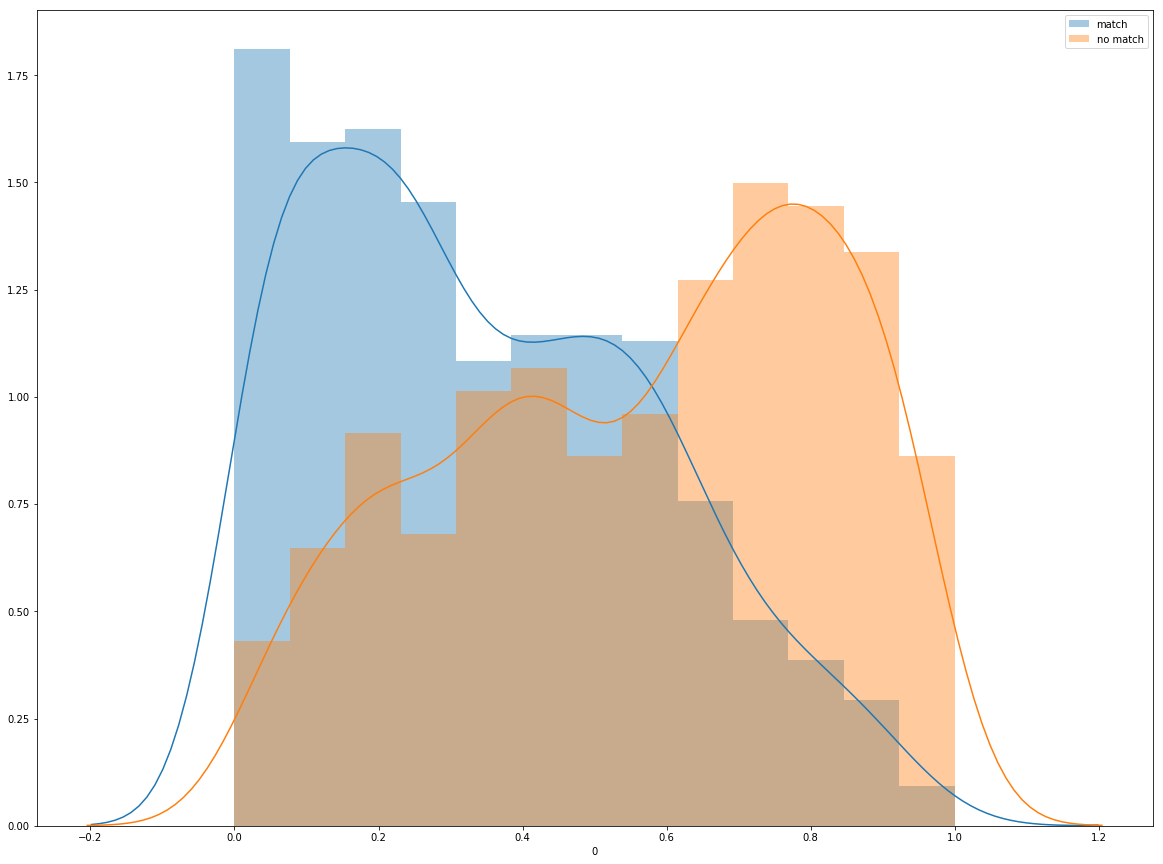




1


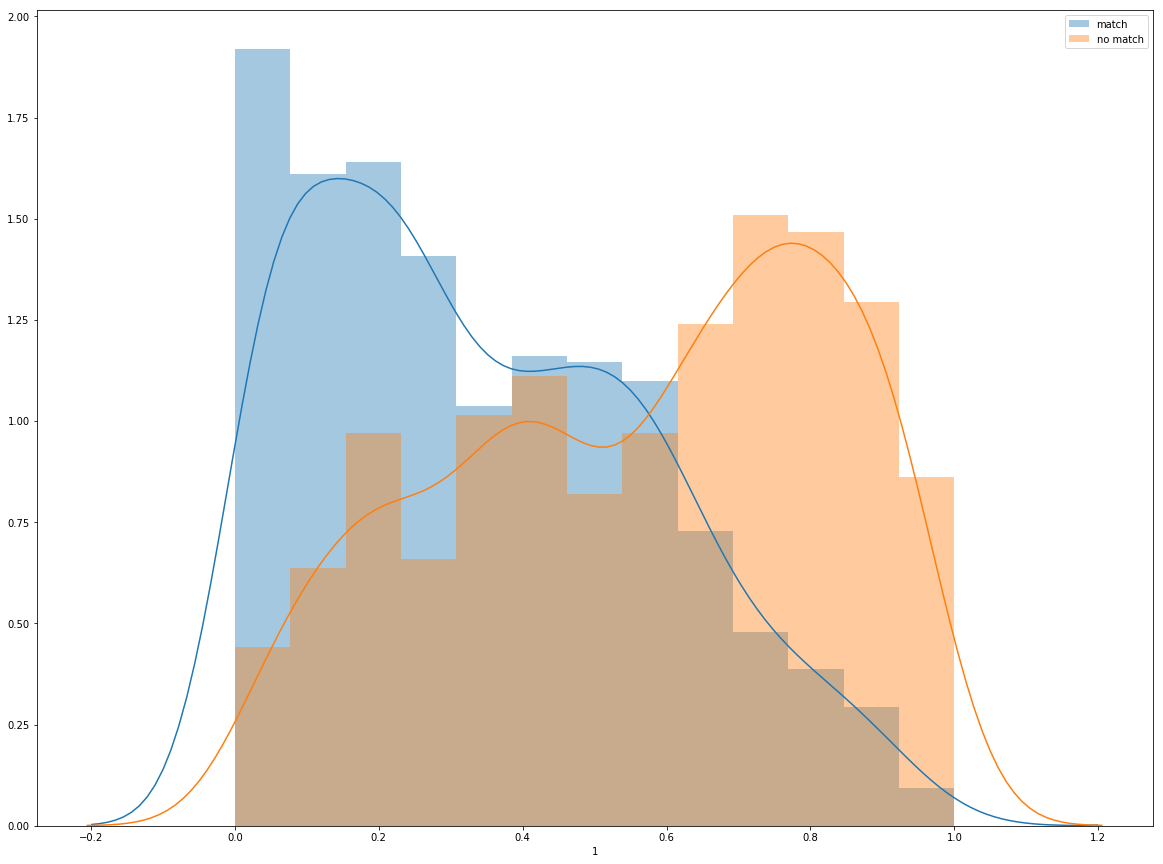




2


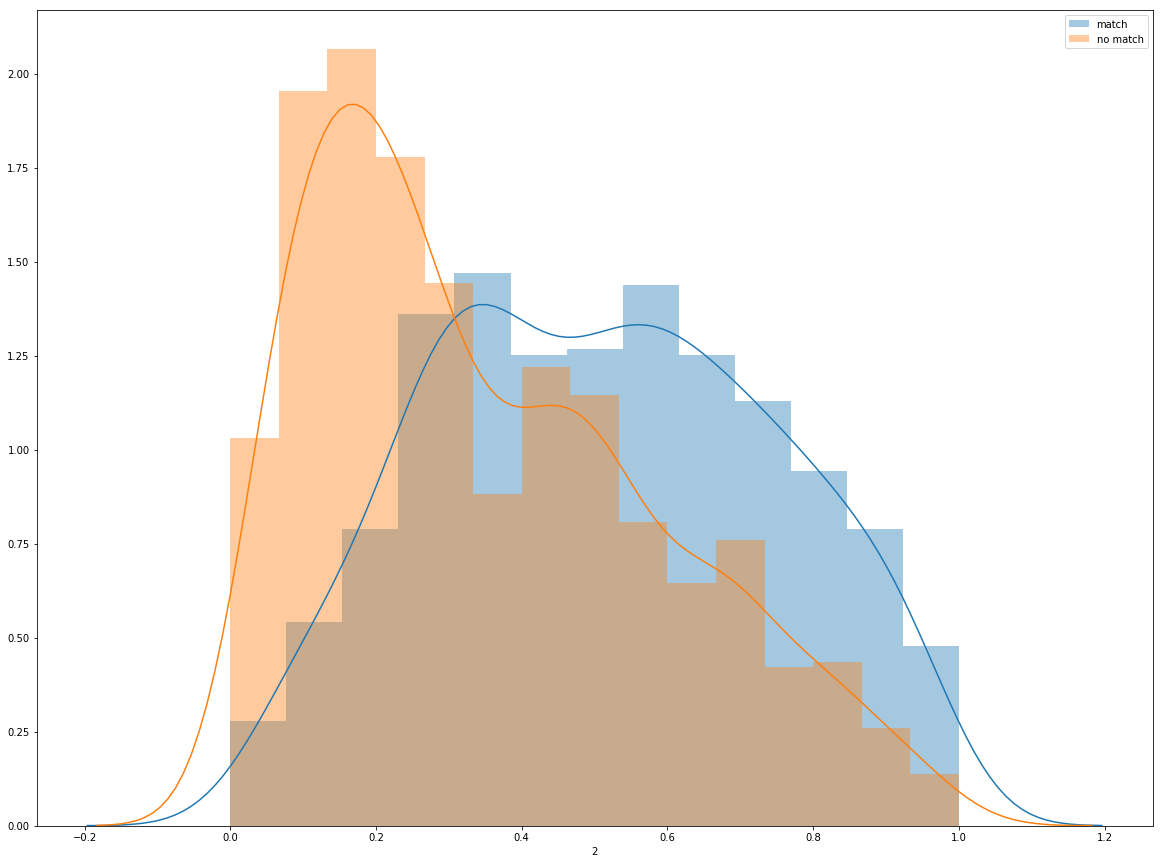




3


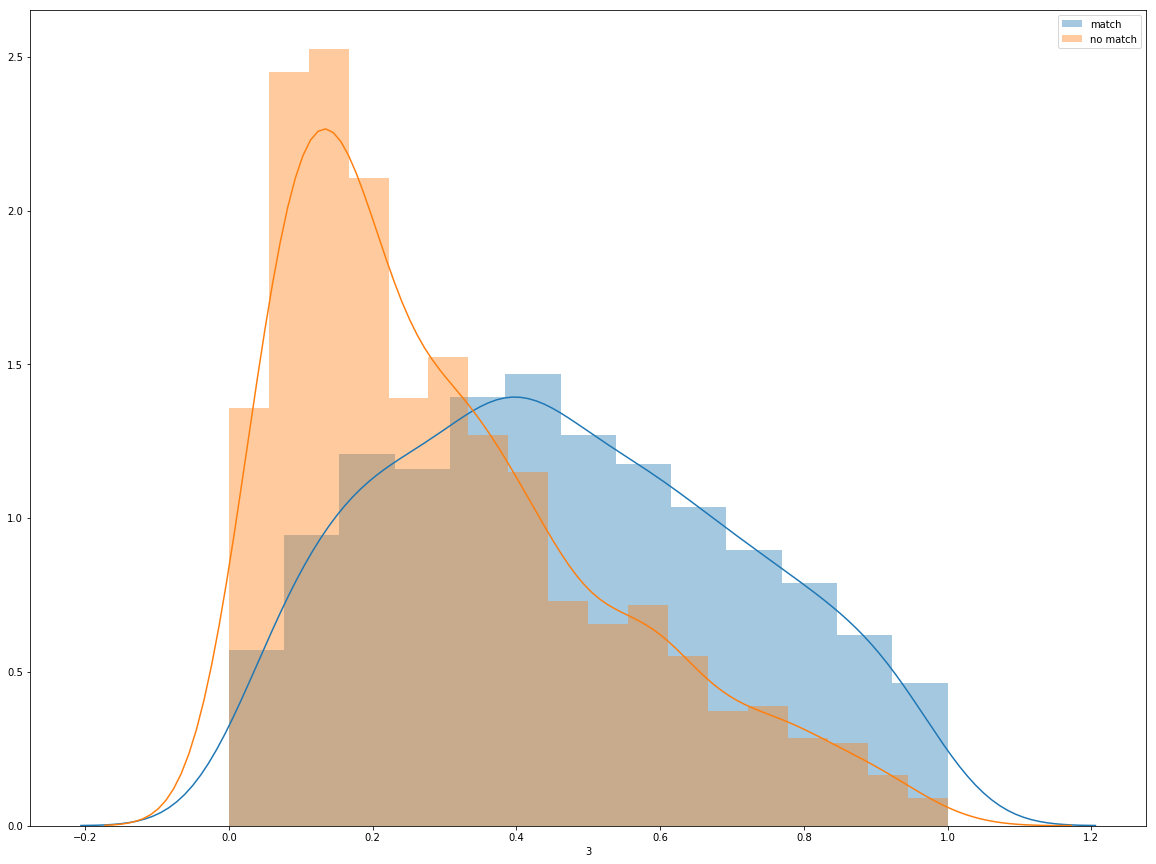




4


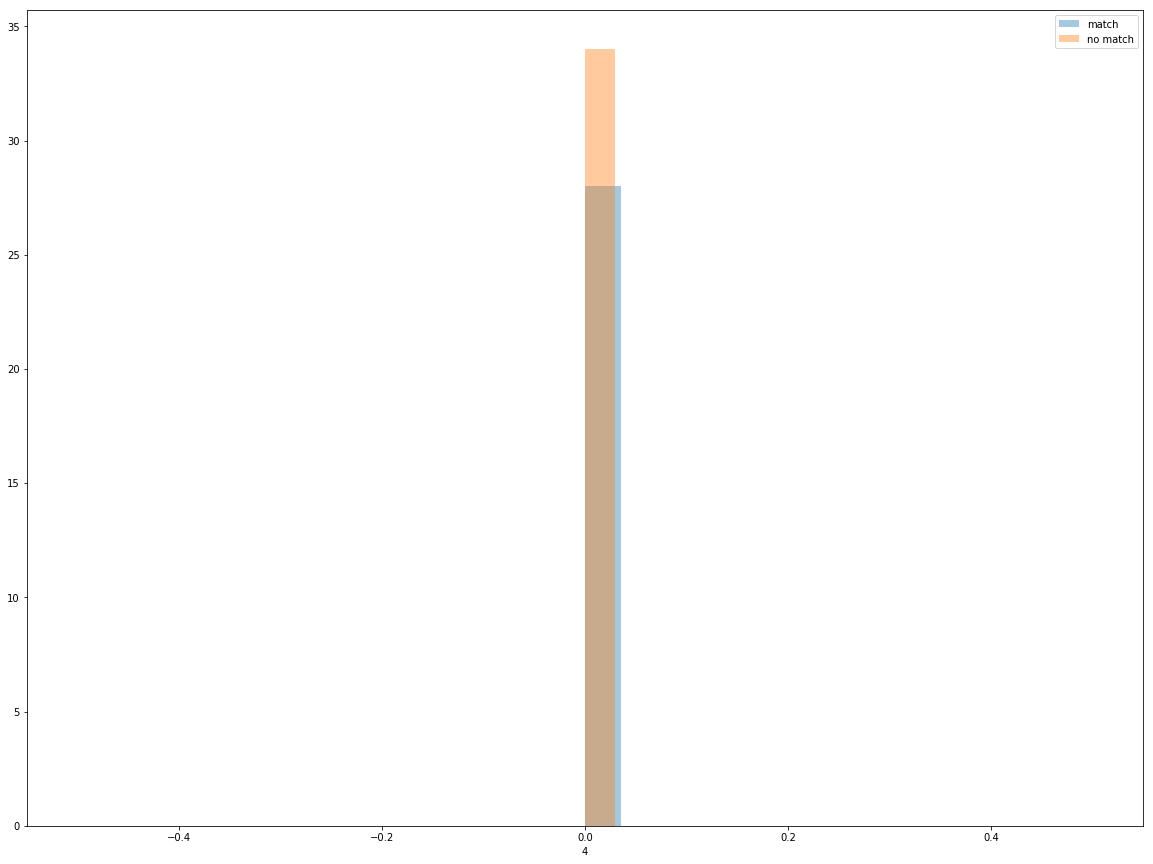




5


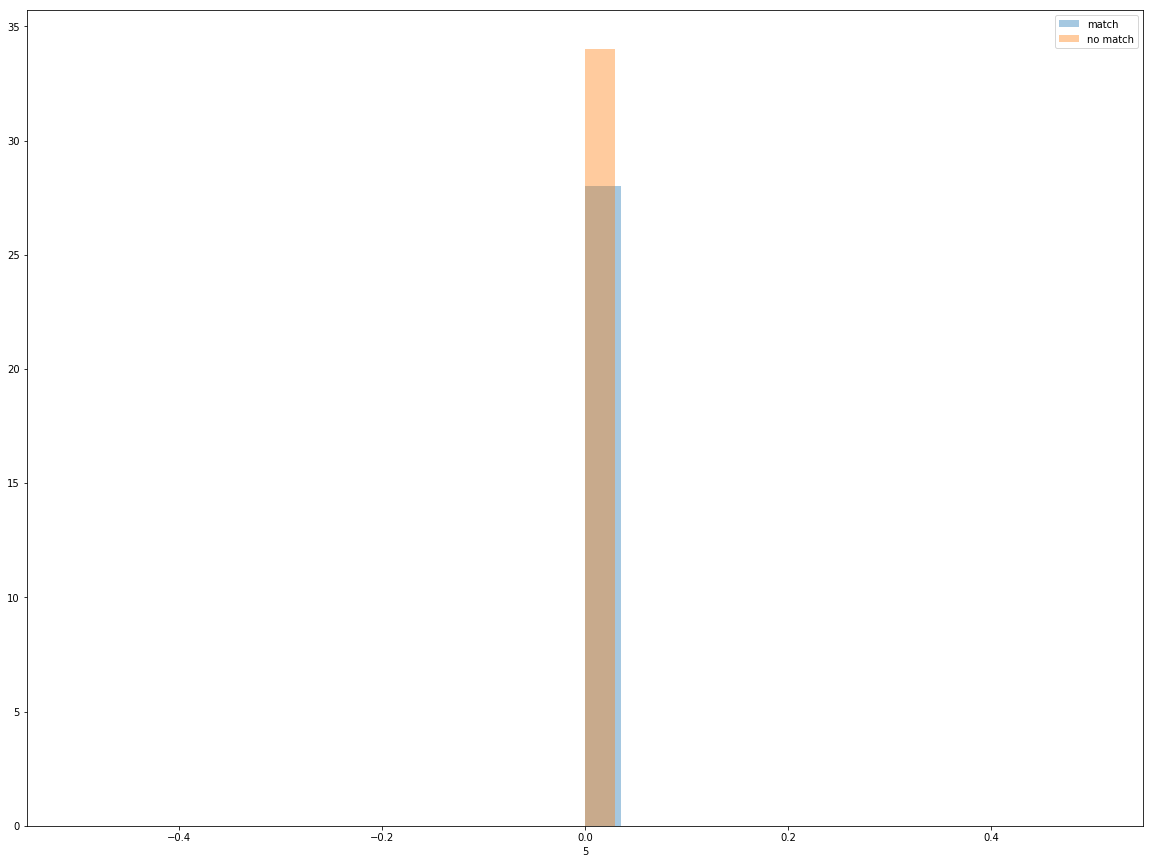




6


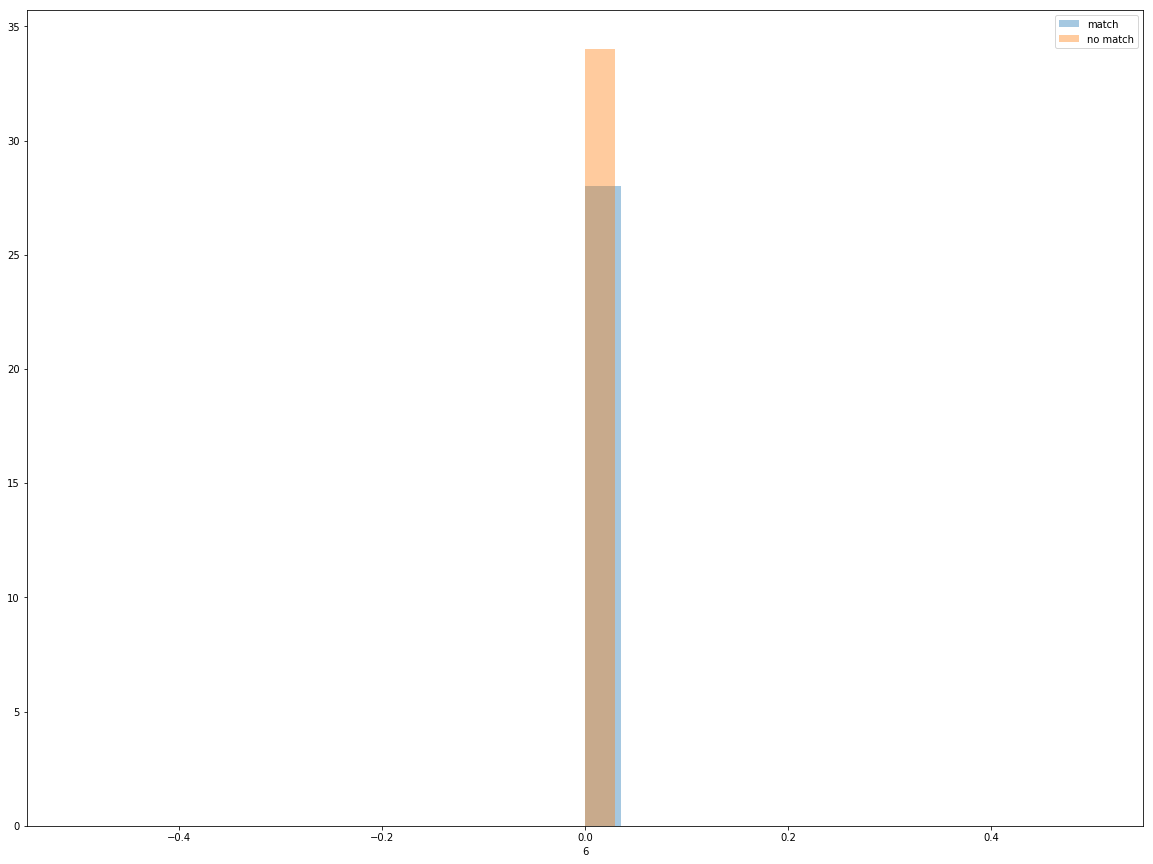




7


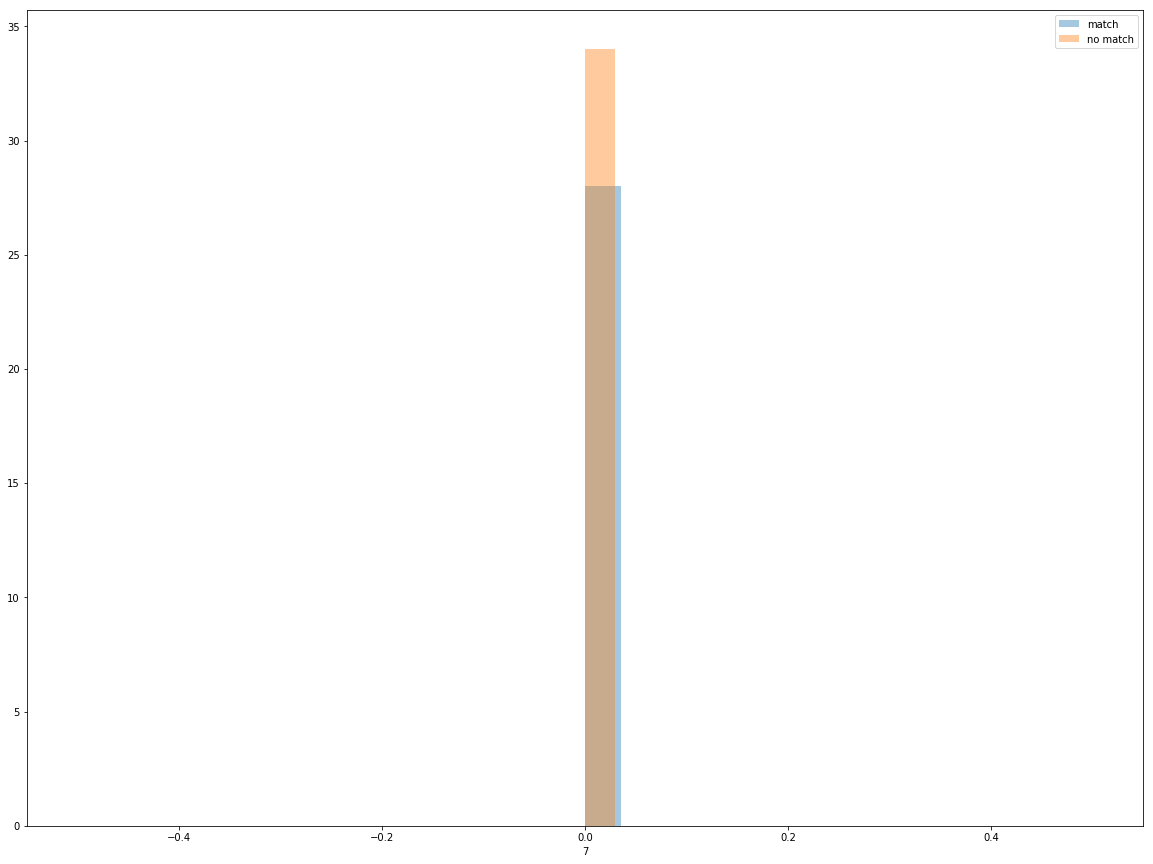




8


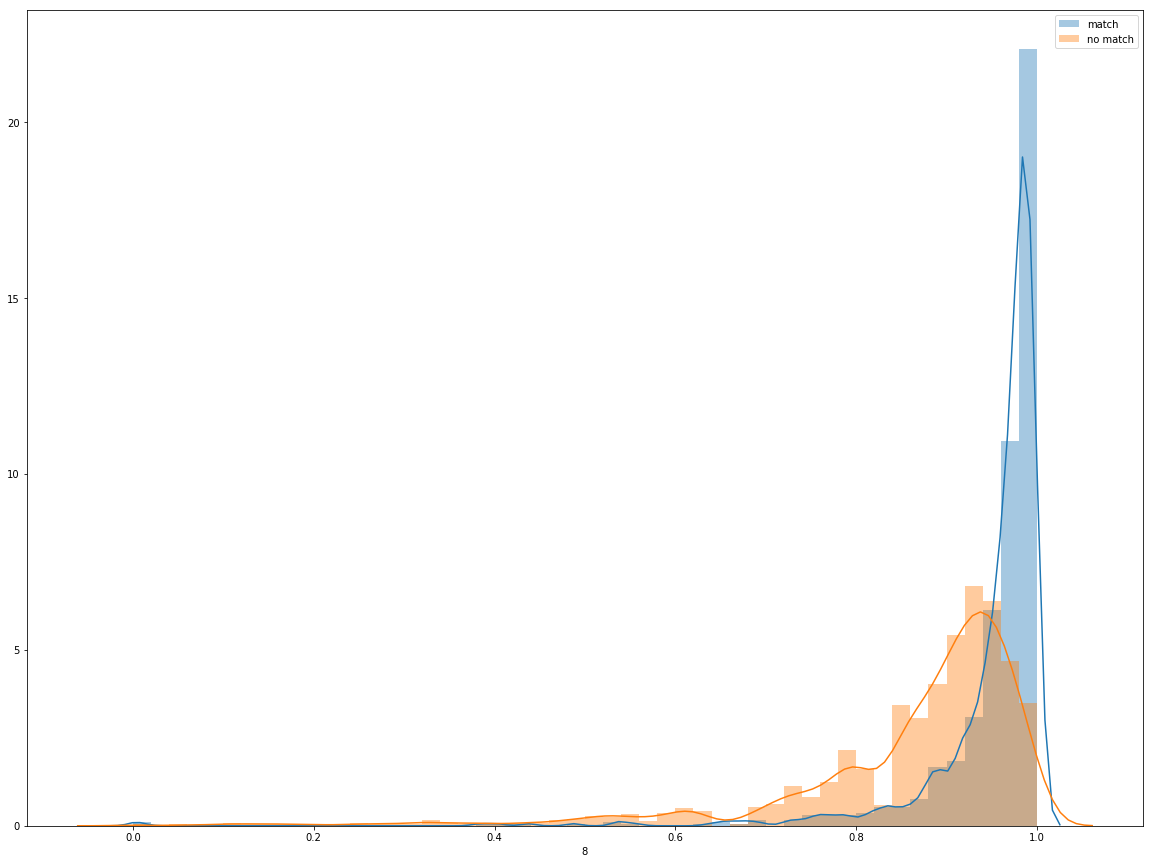




9


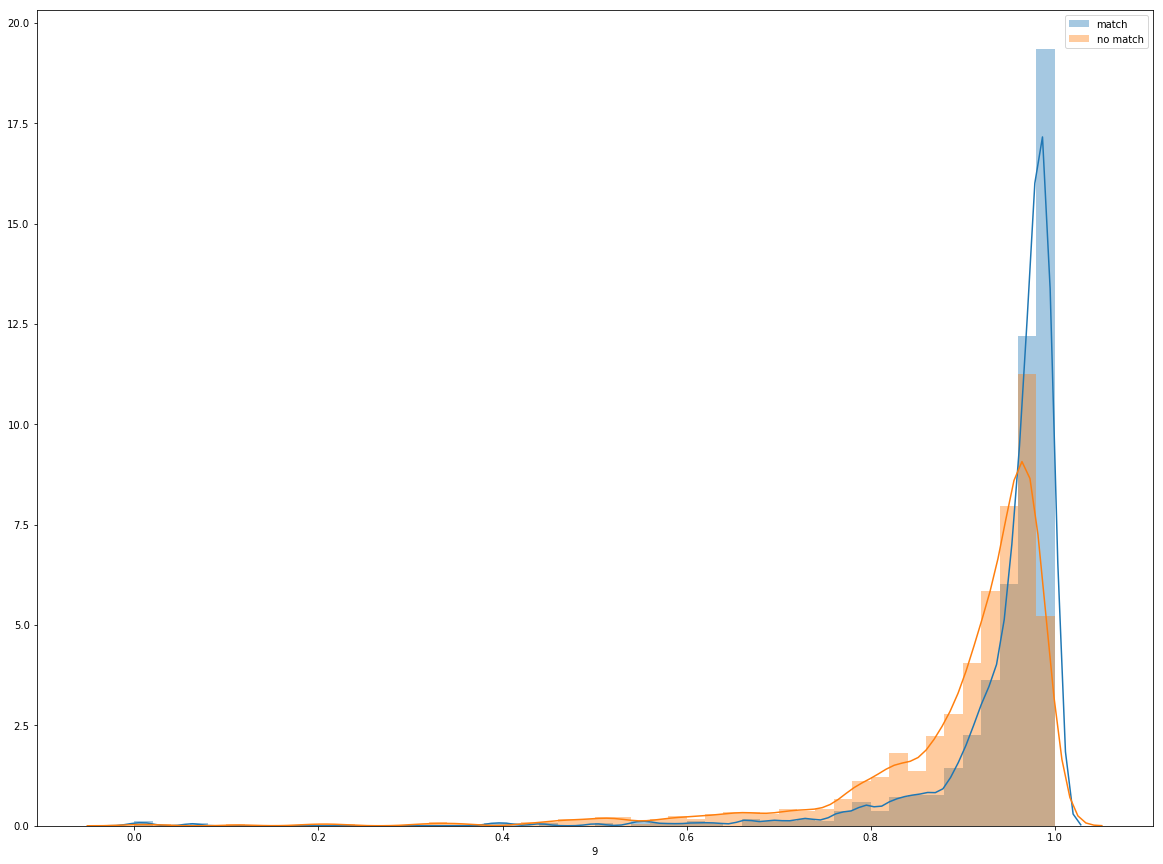




10


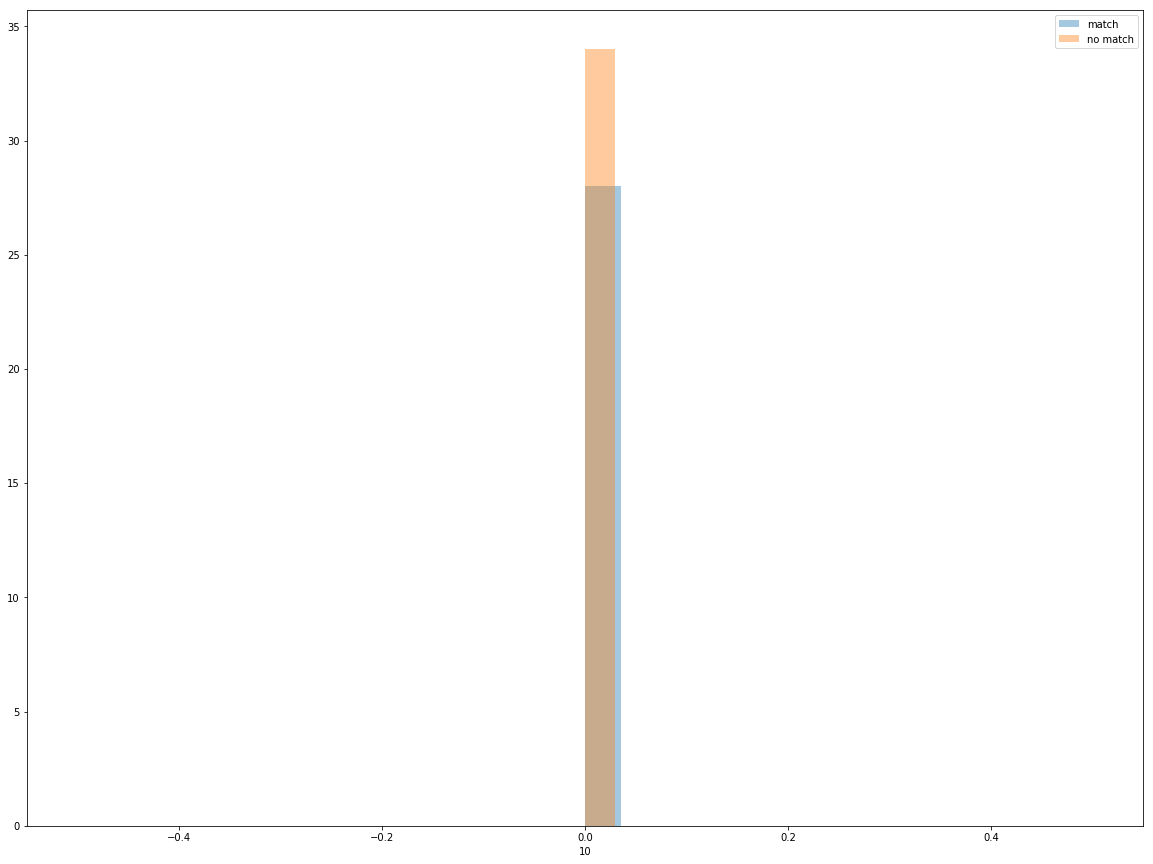




11


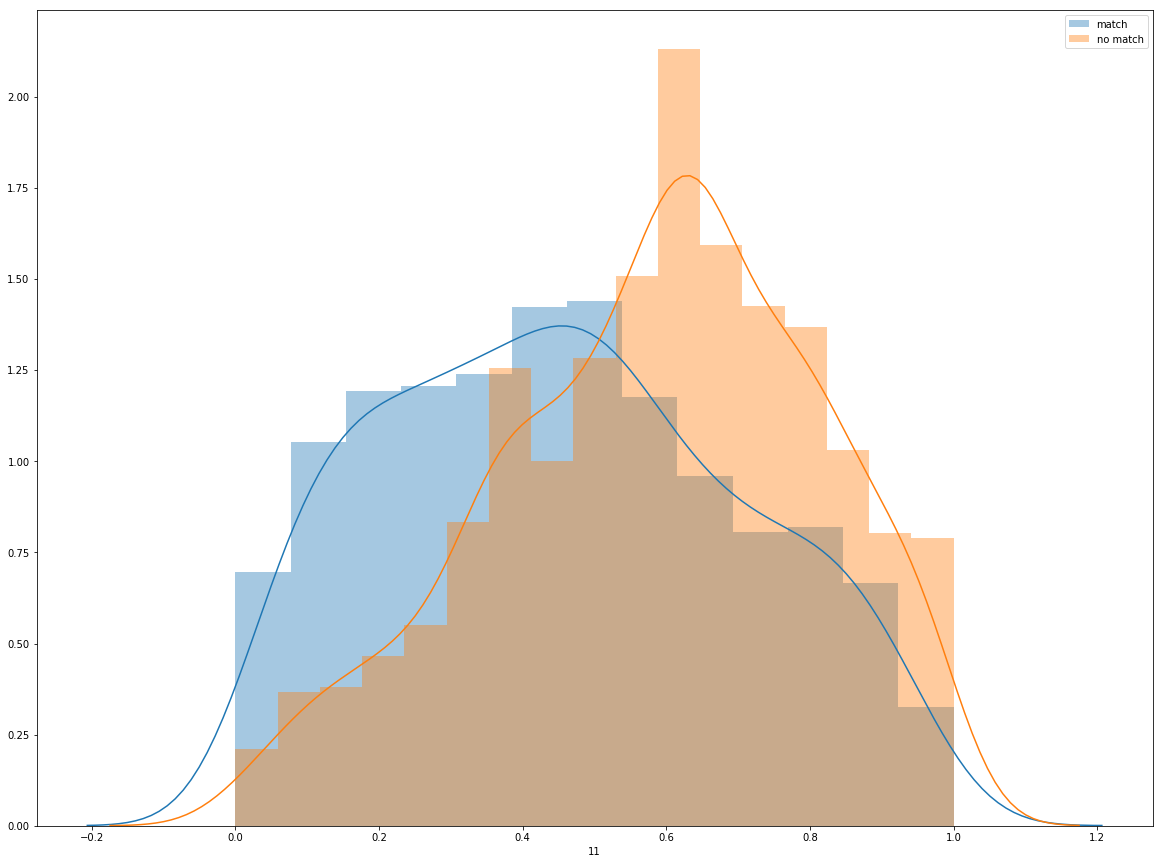




12


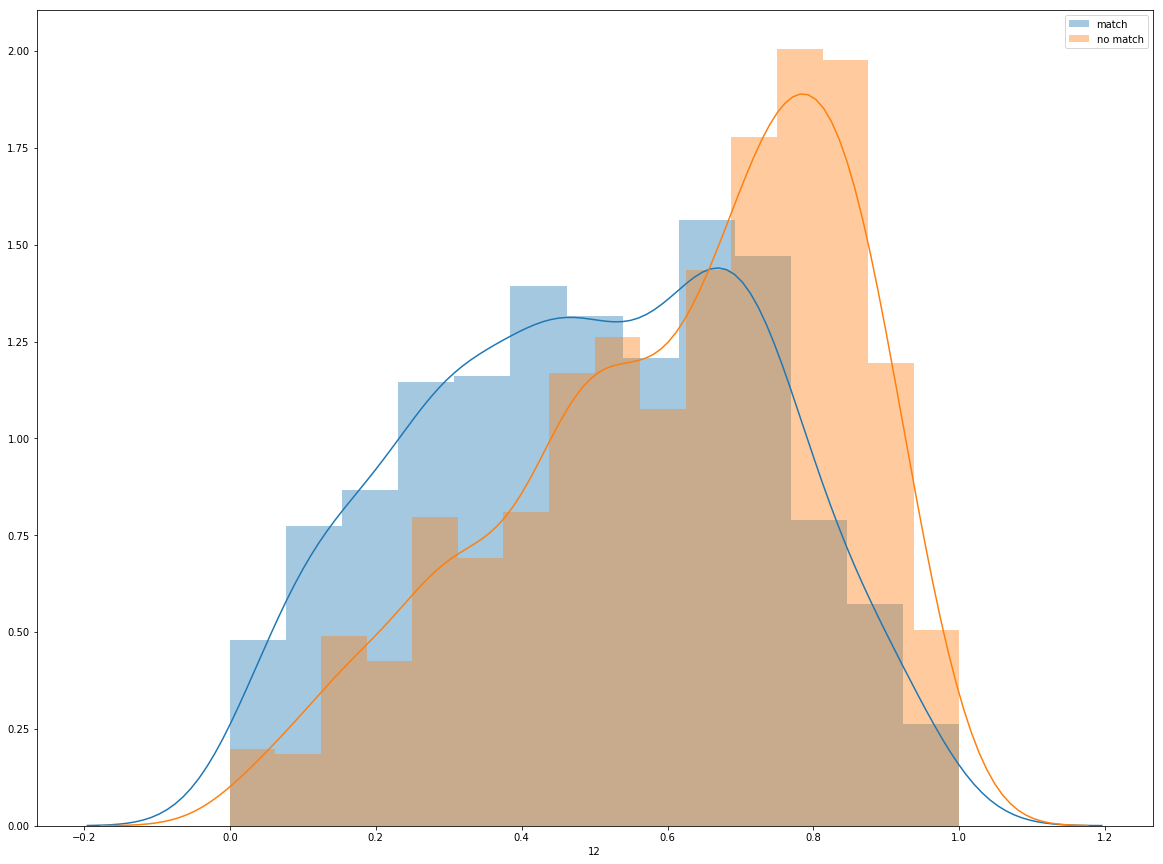




13


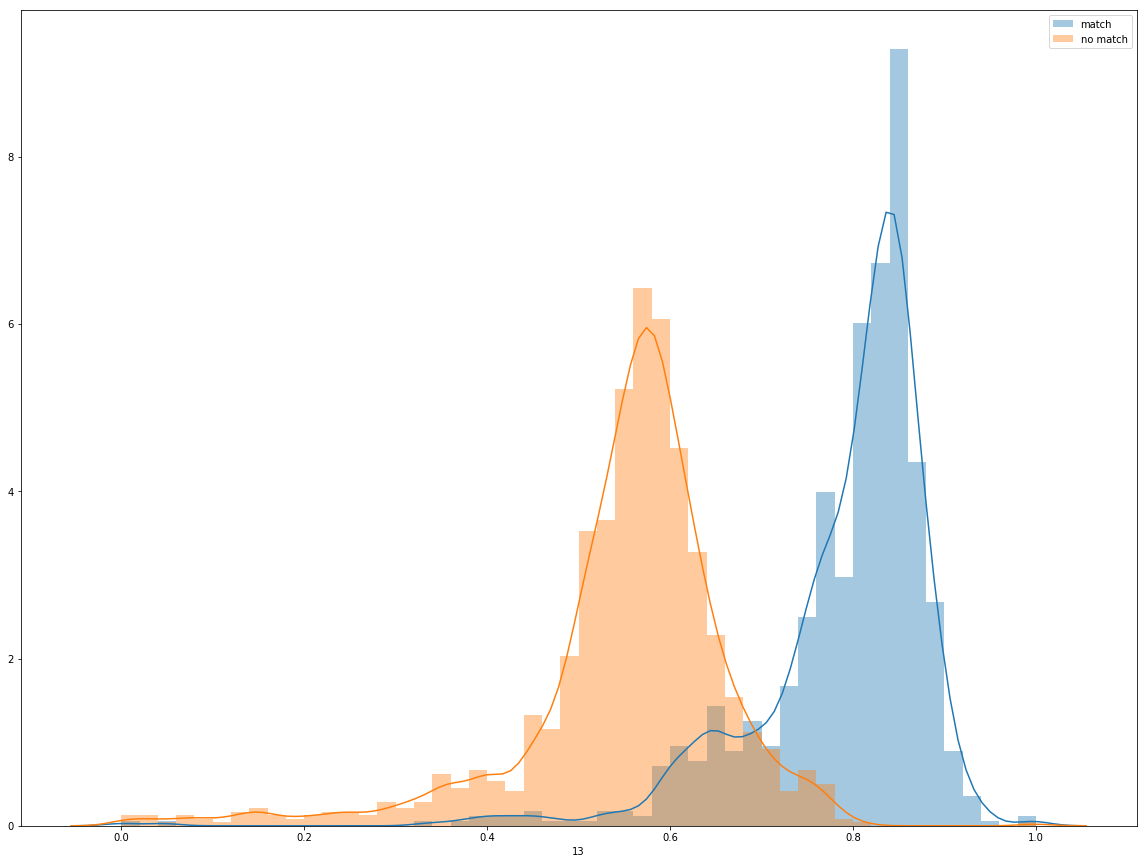




14


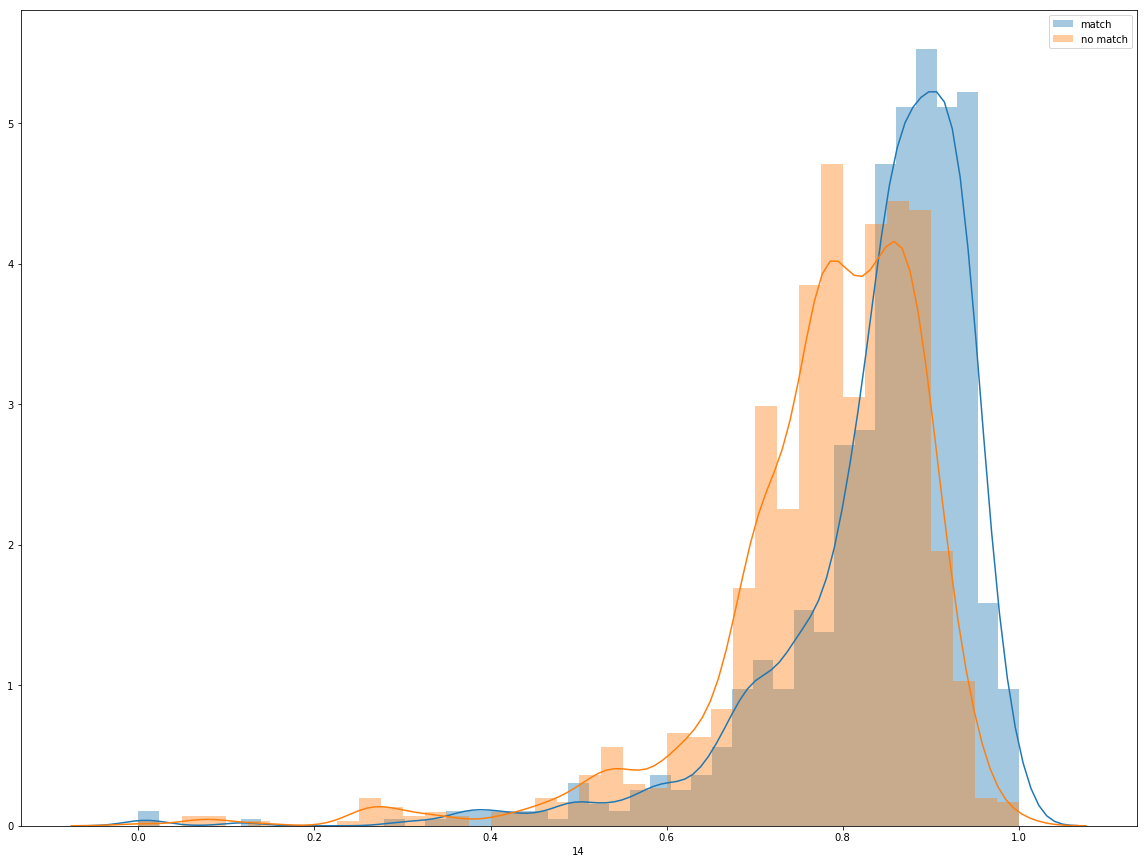




15


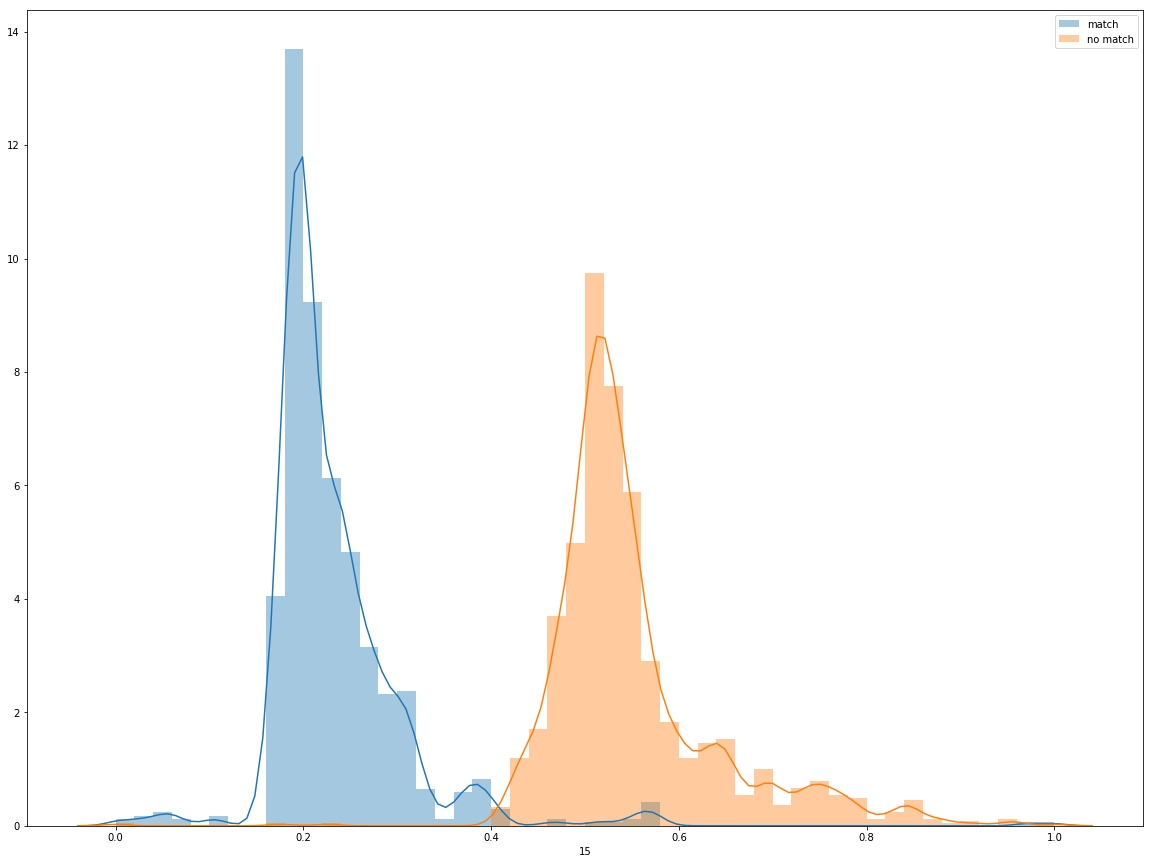




16


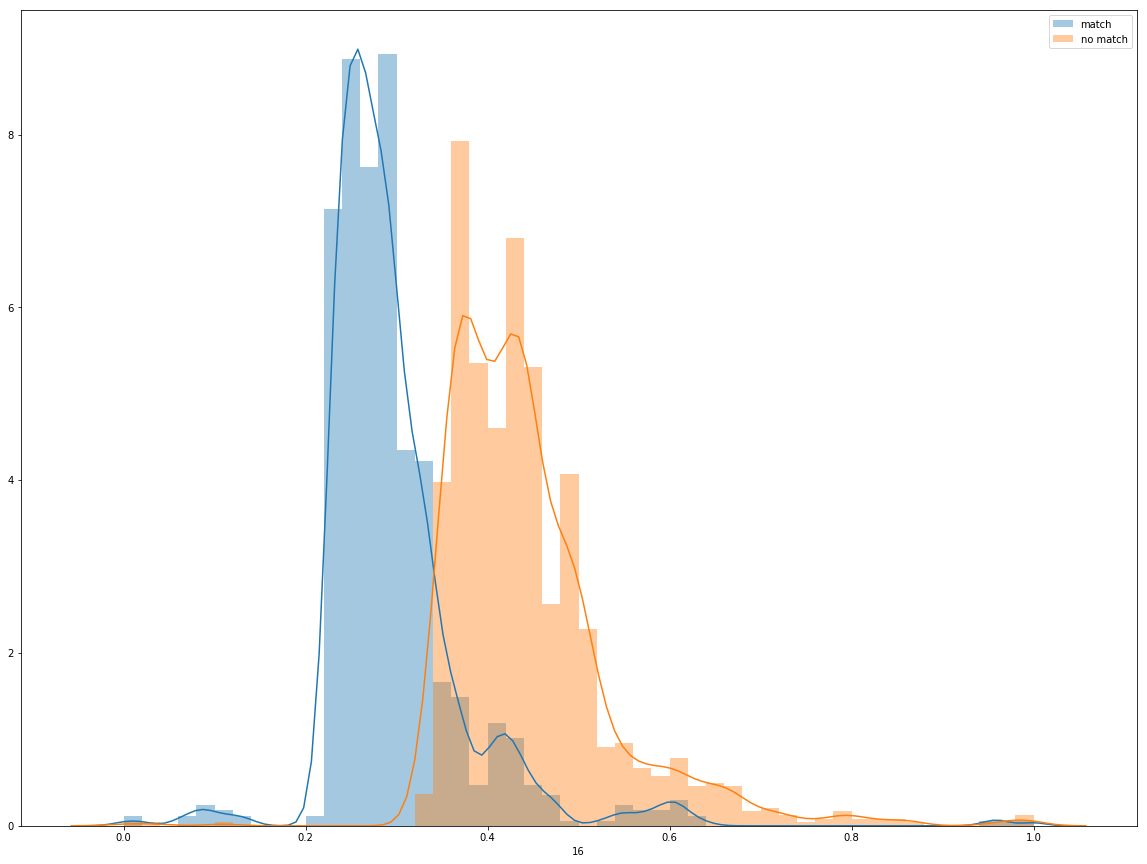




17


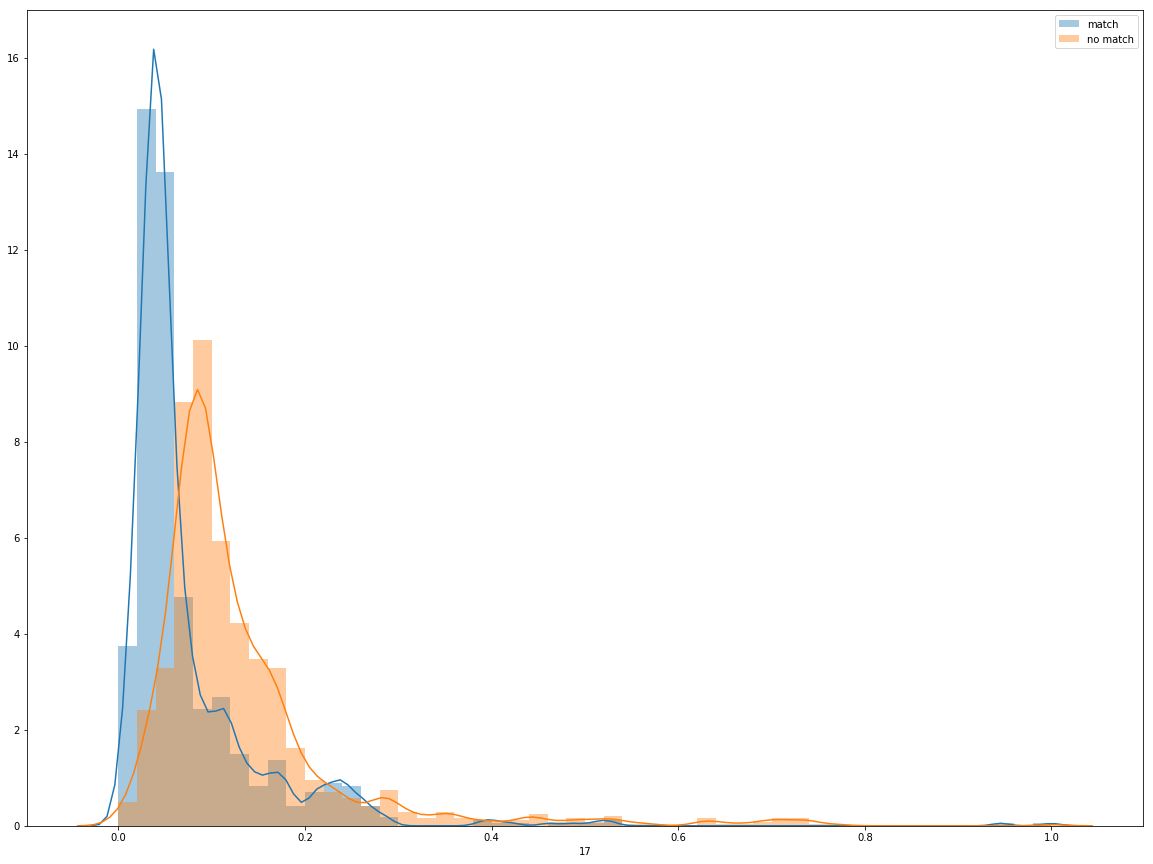




18


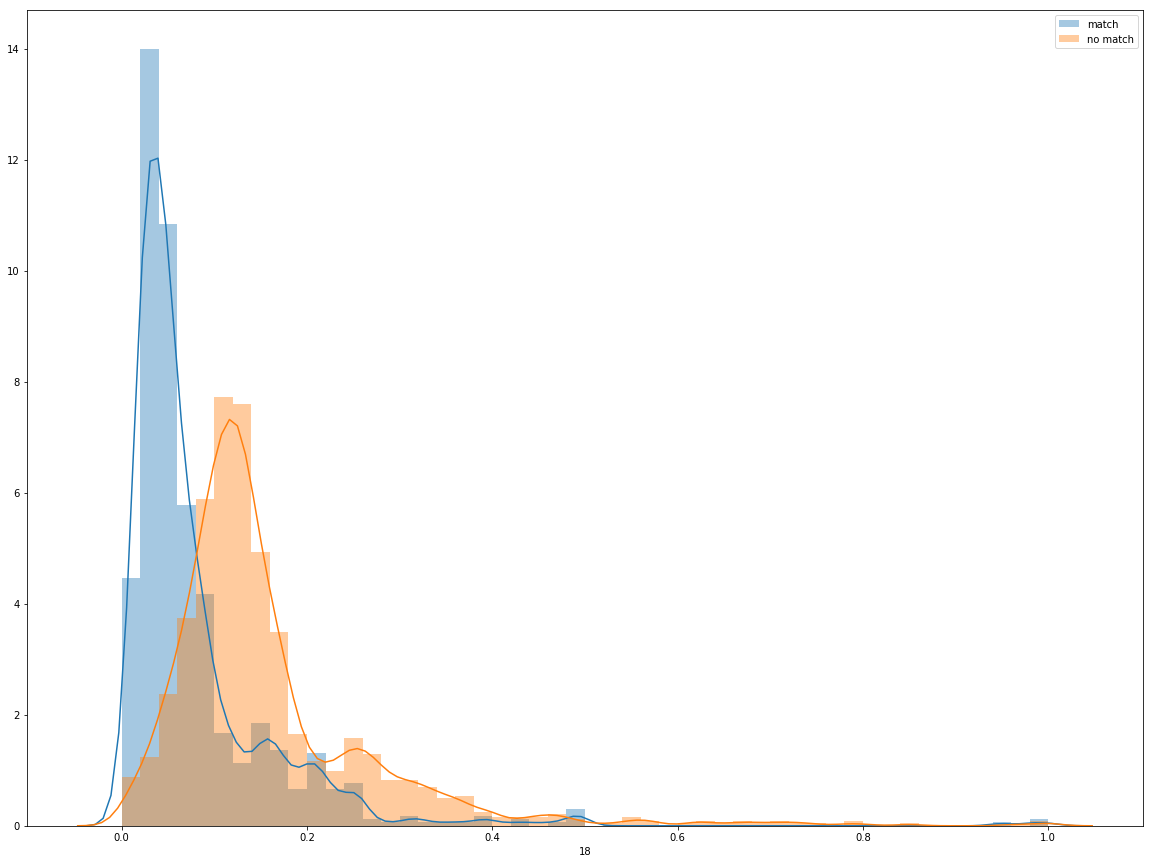




19


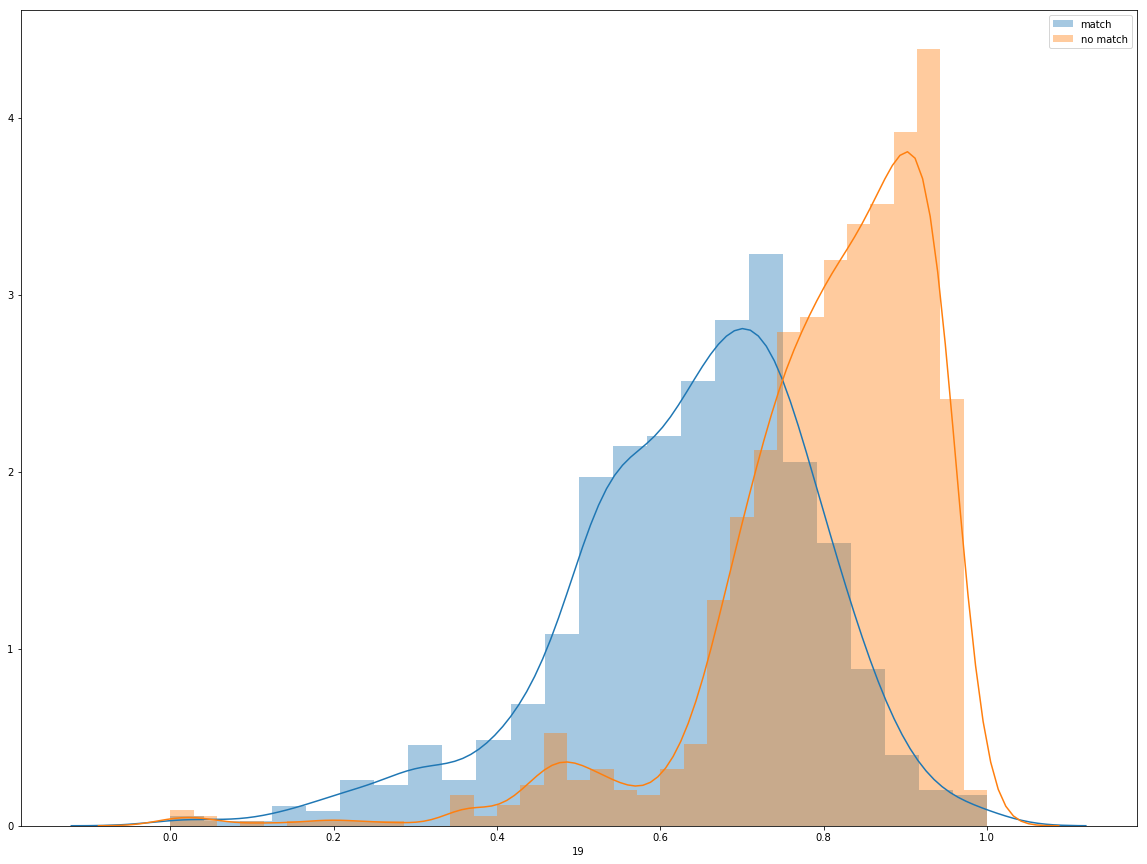




20


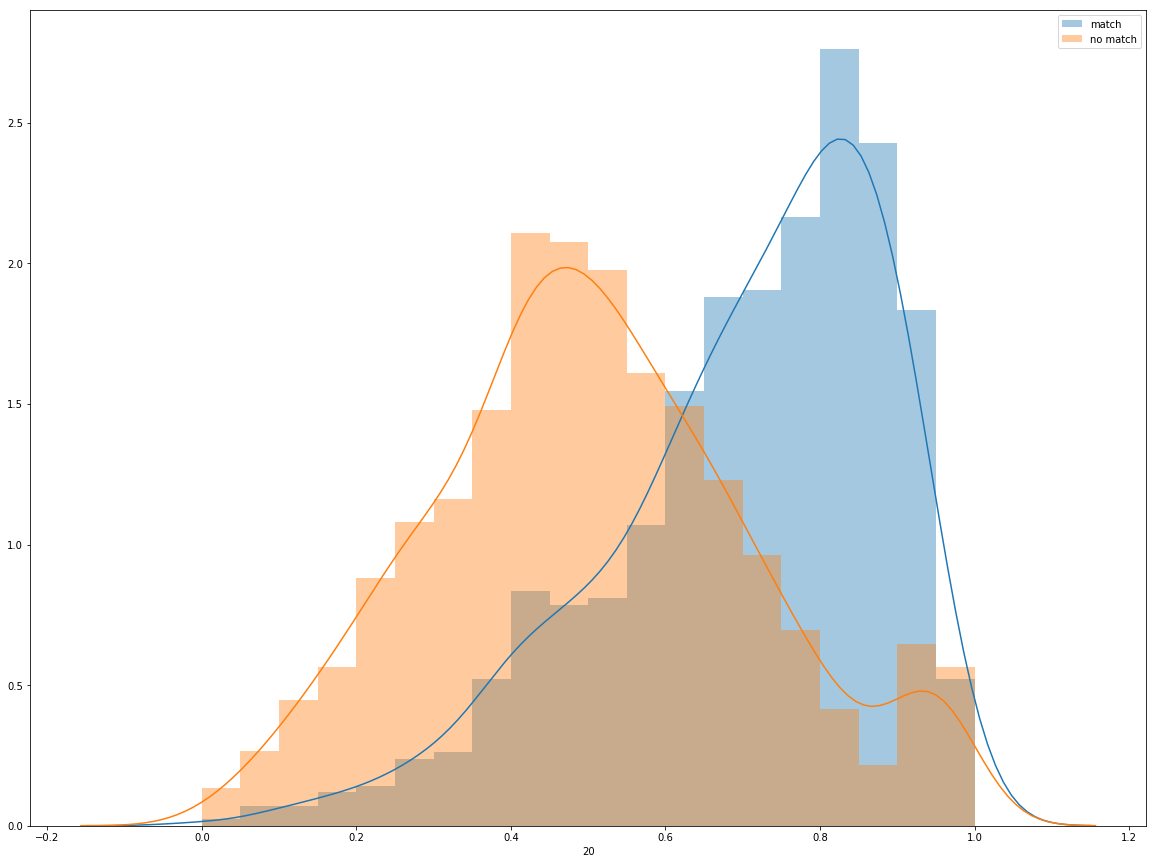




21


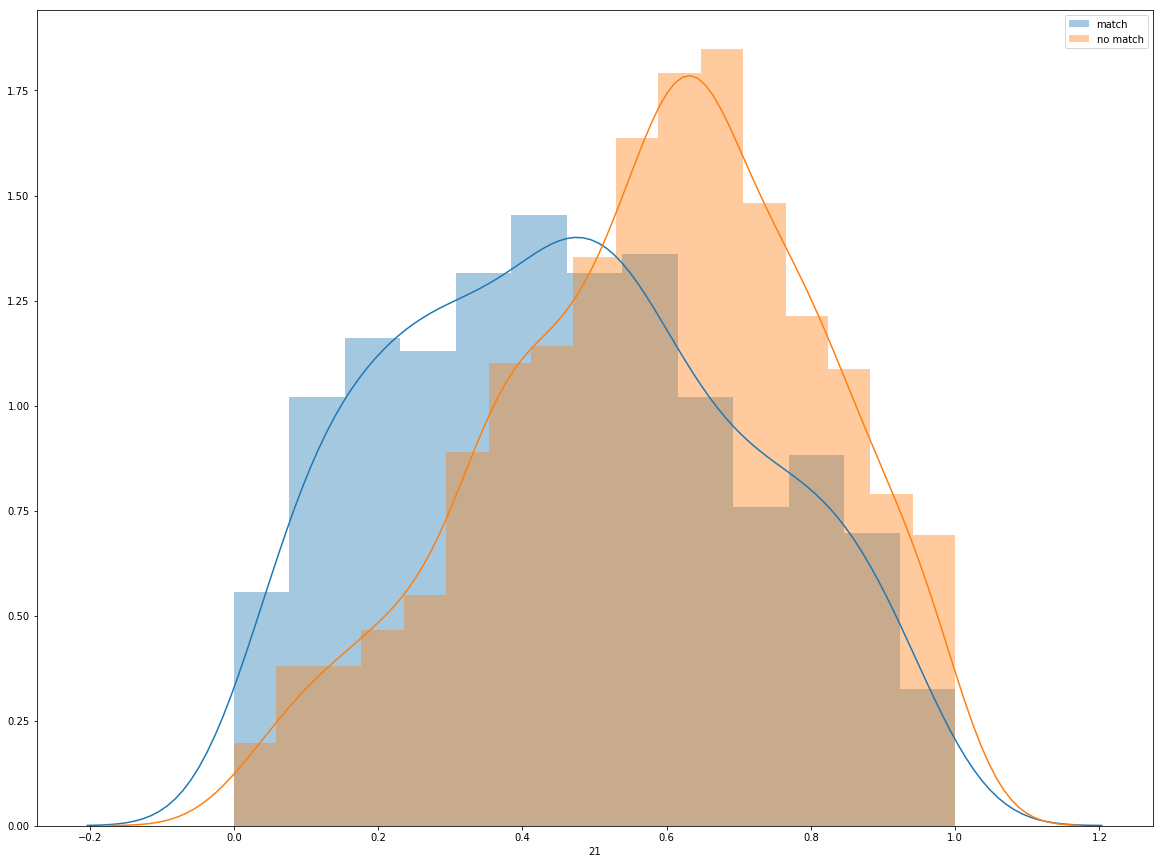




22


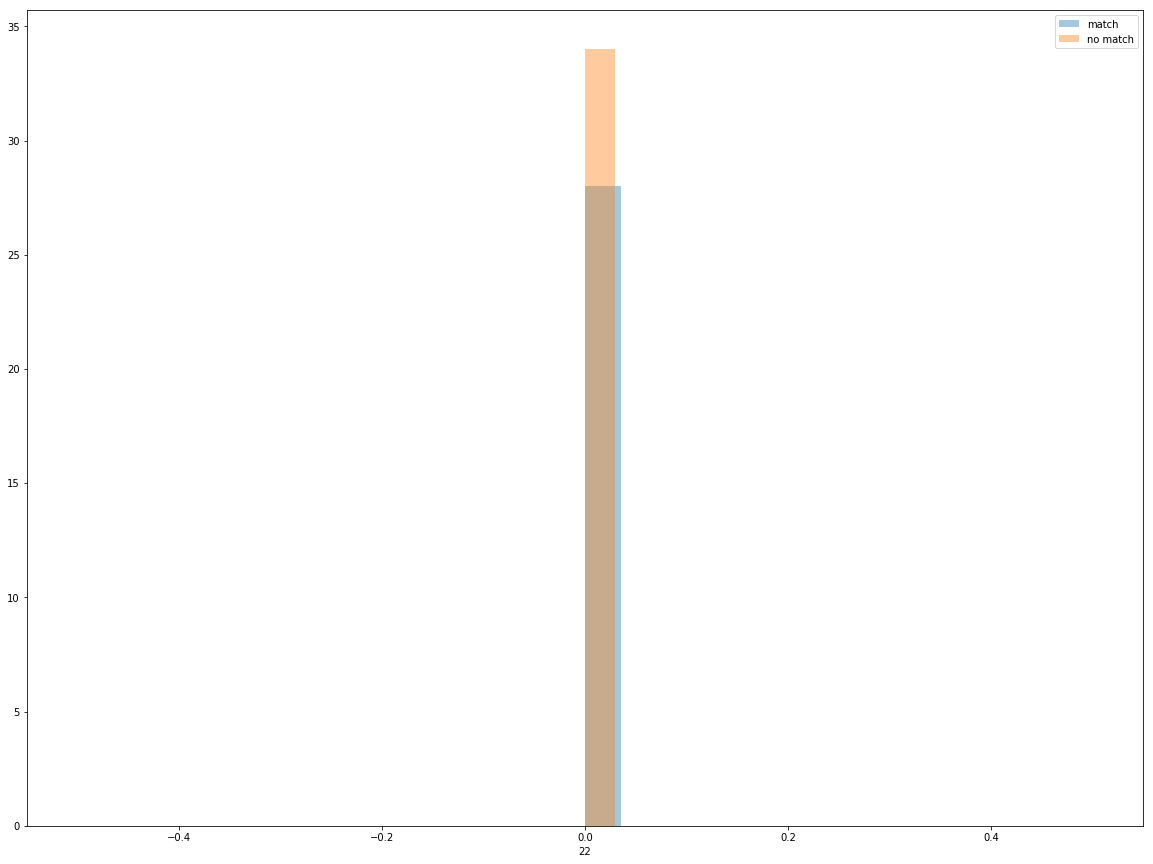




23


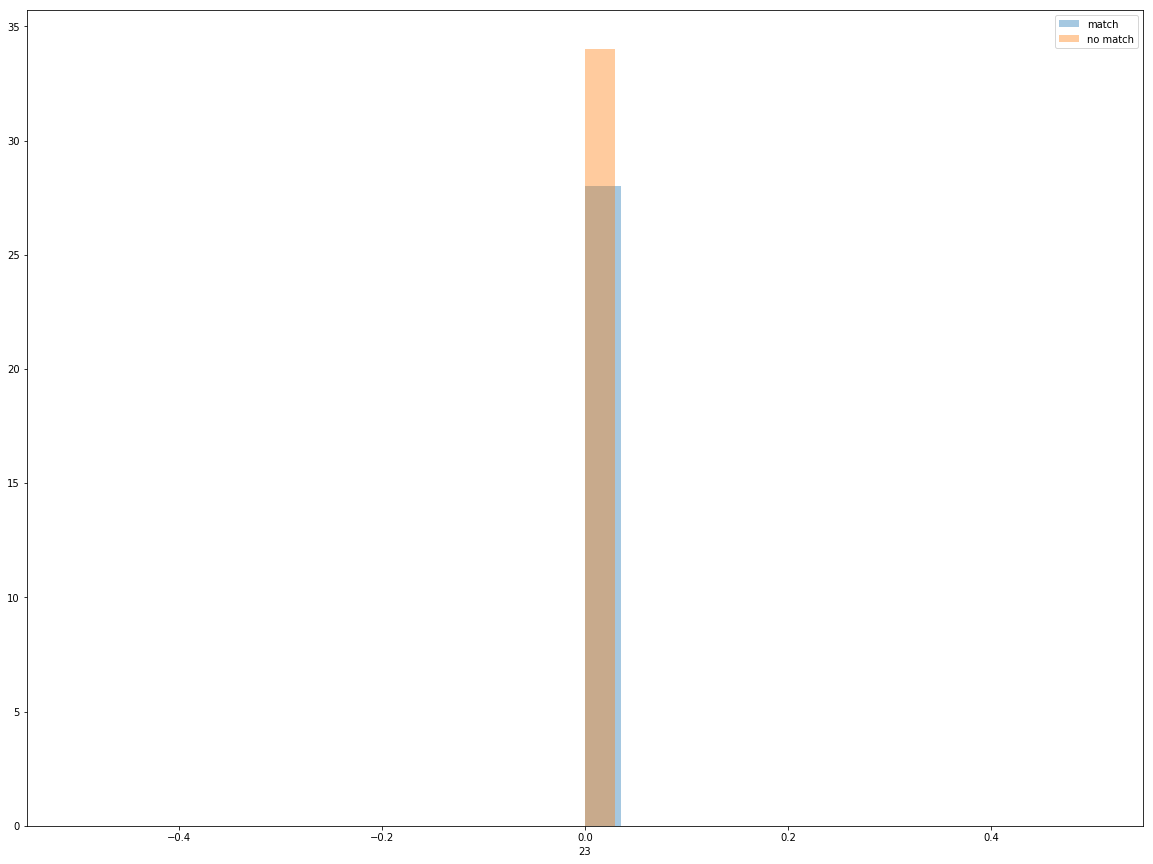




24


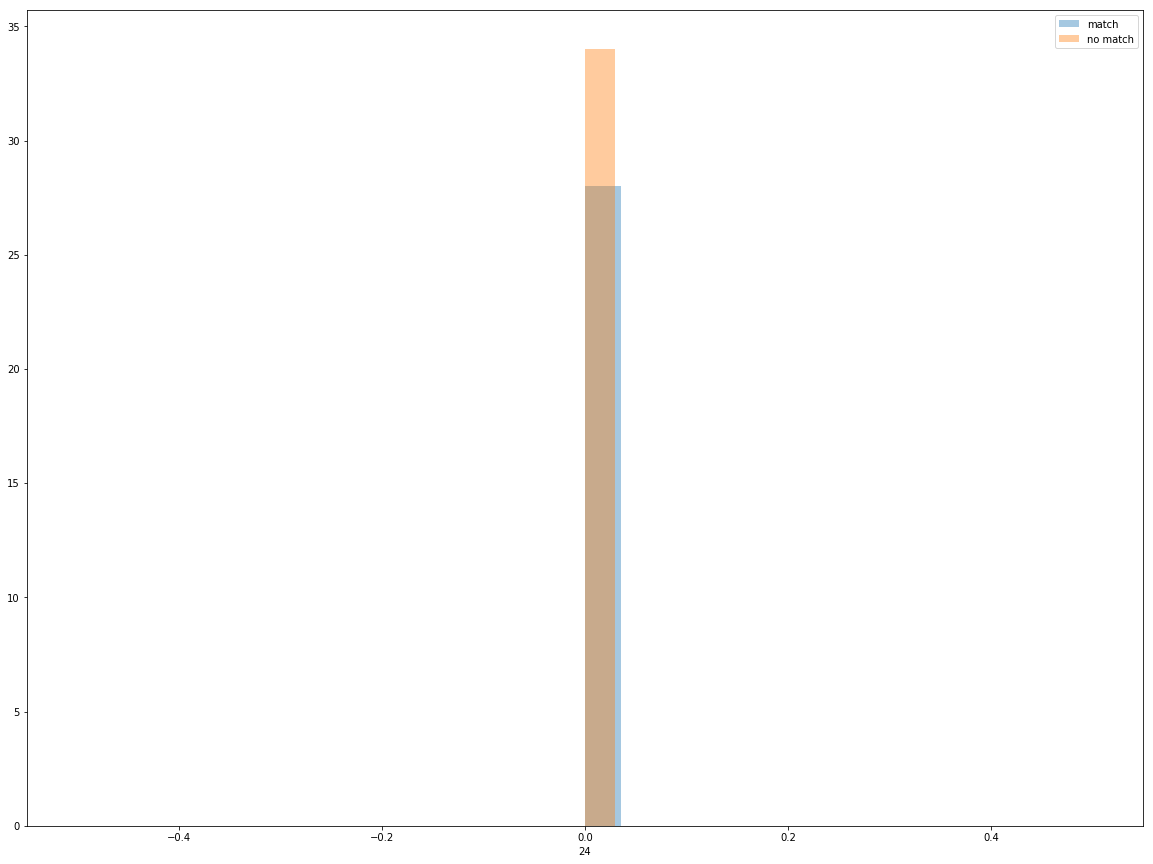




25


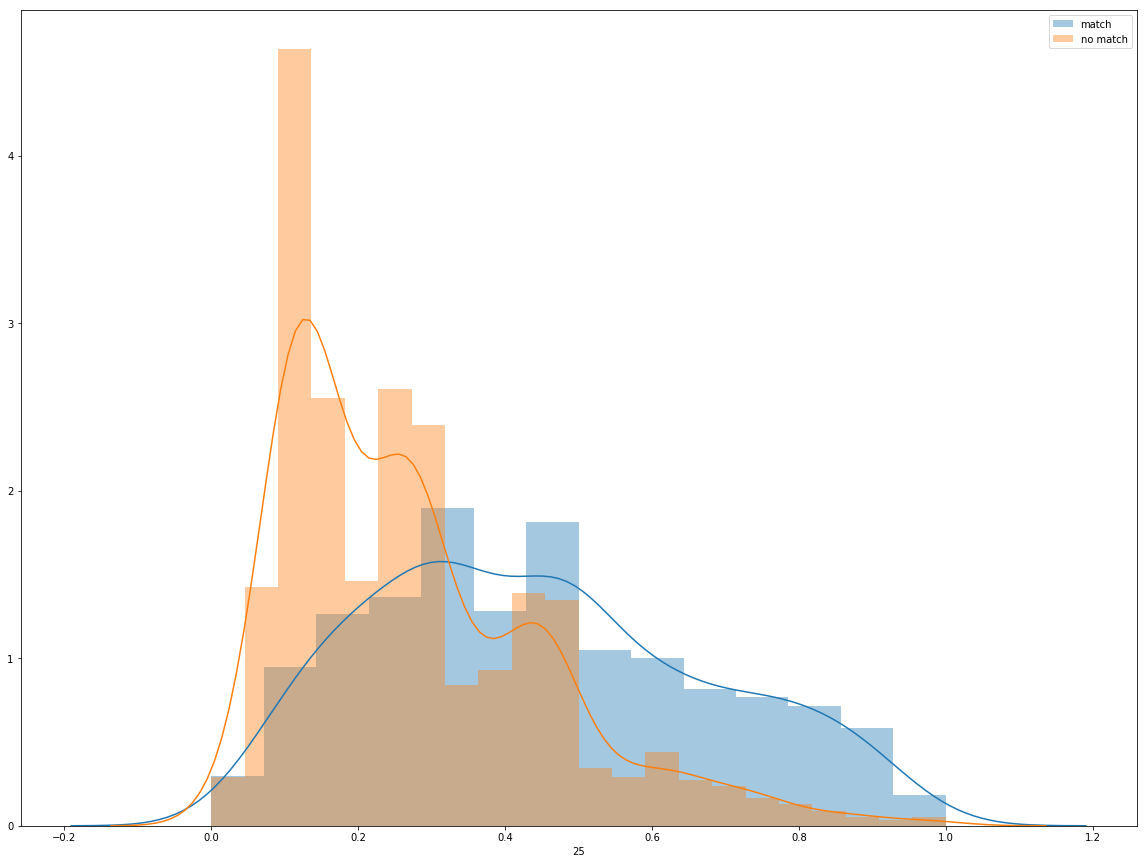




26


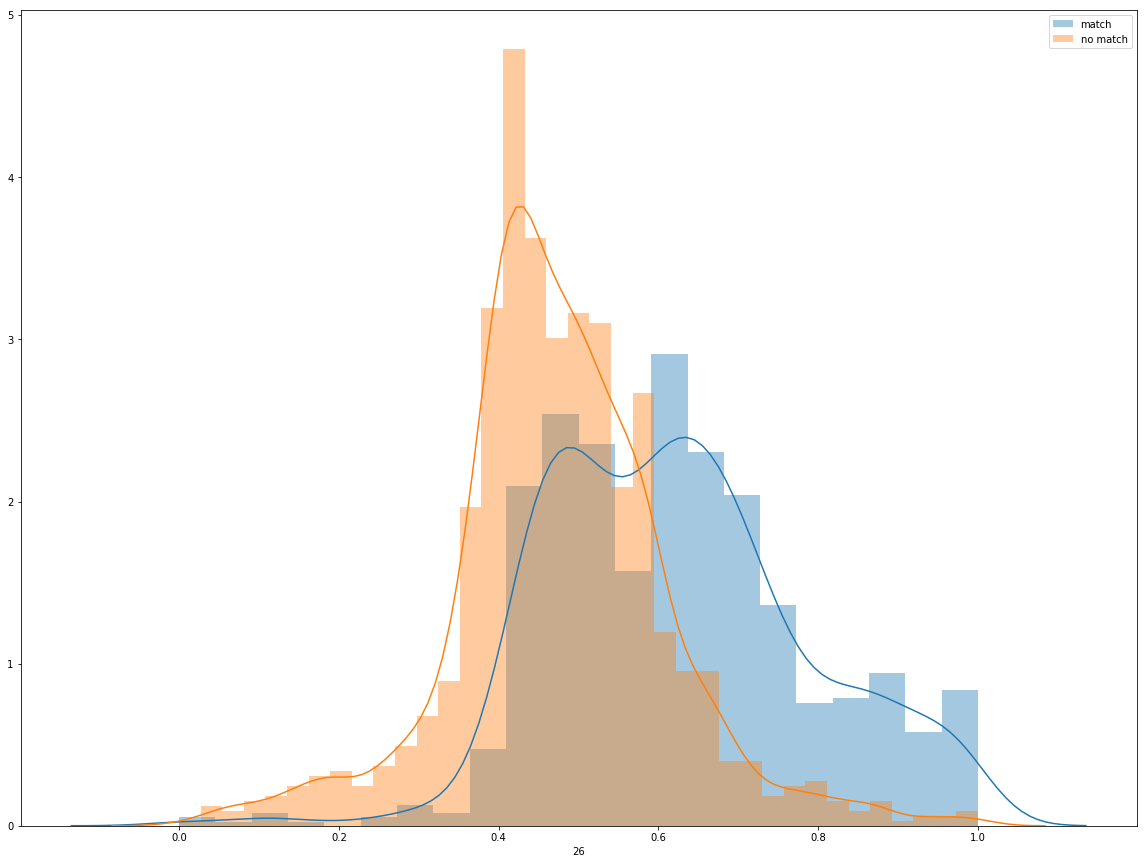




27


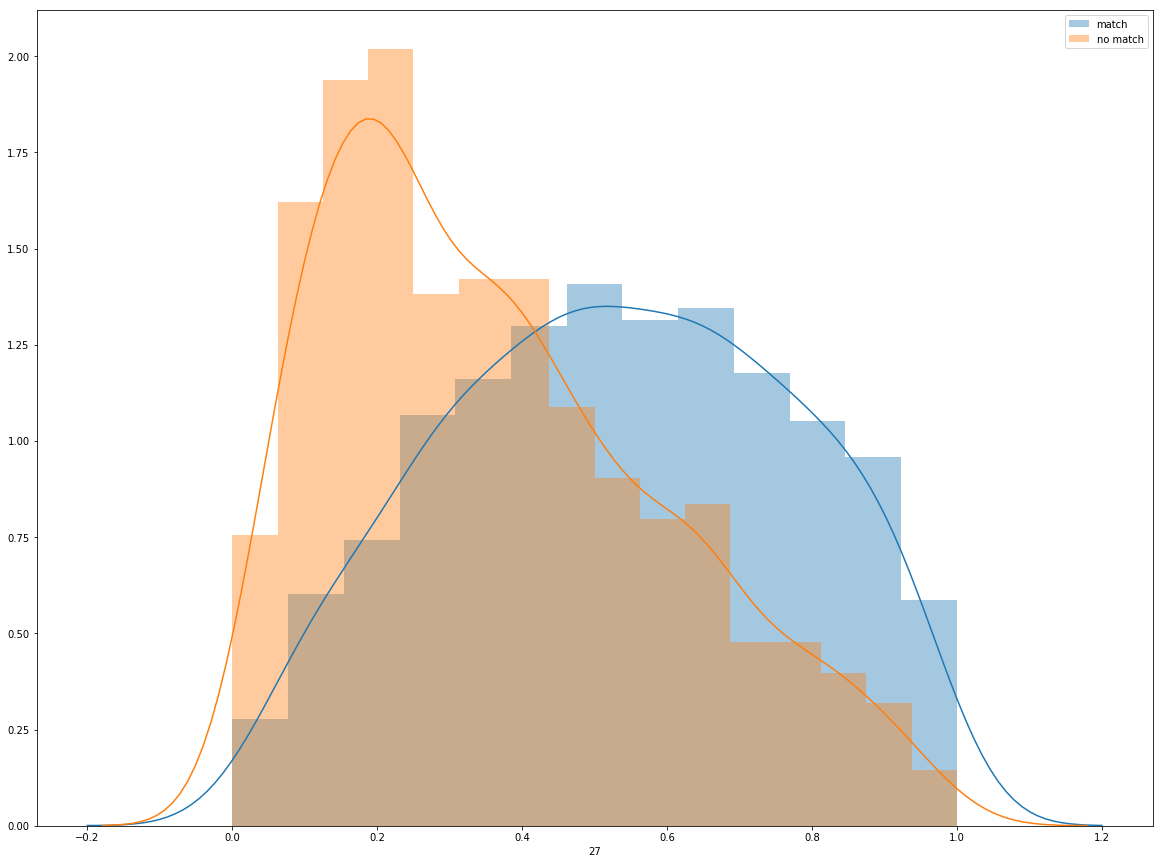




28


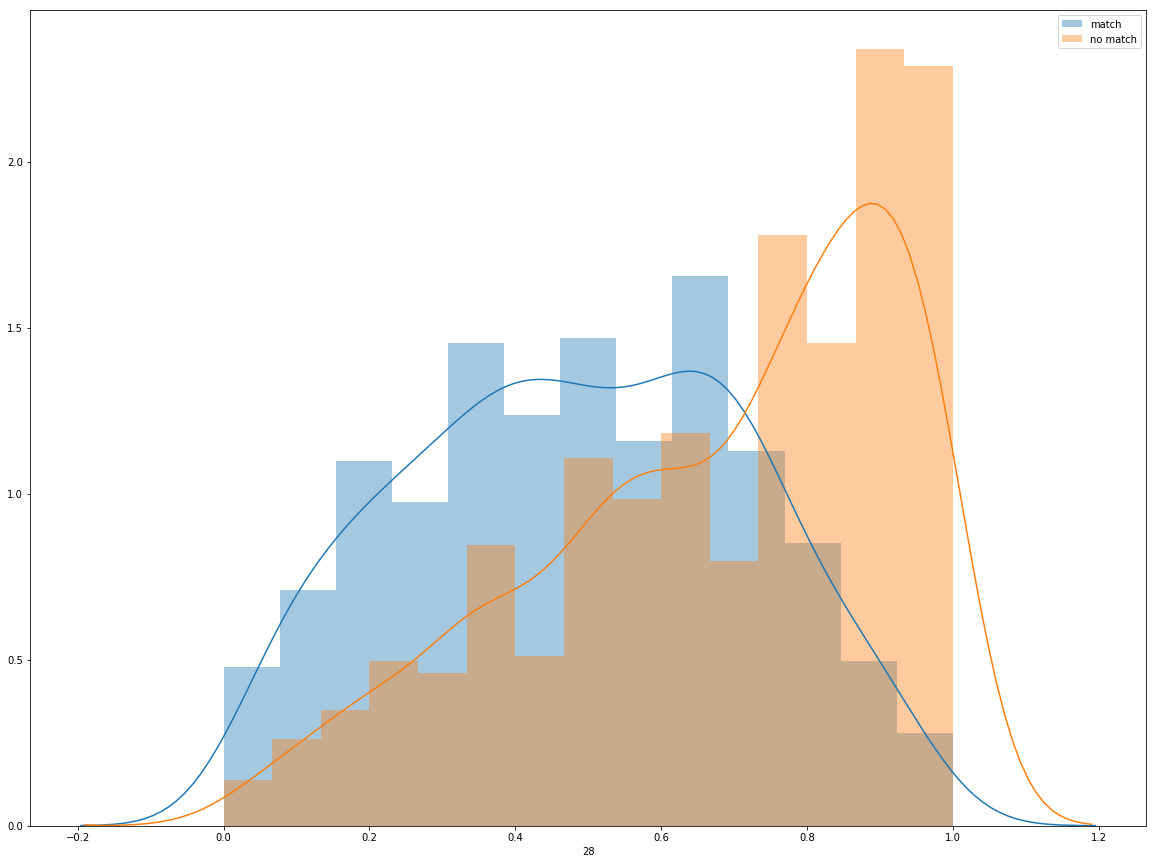




29


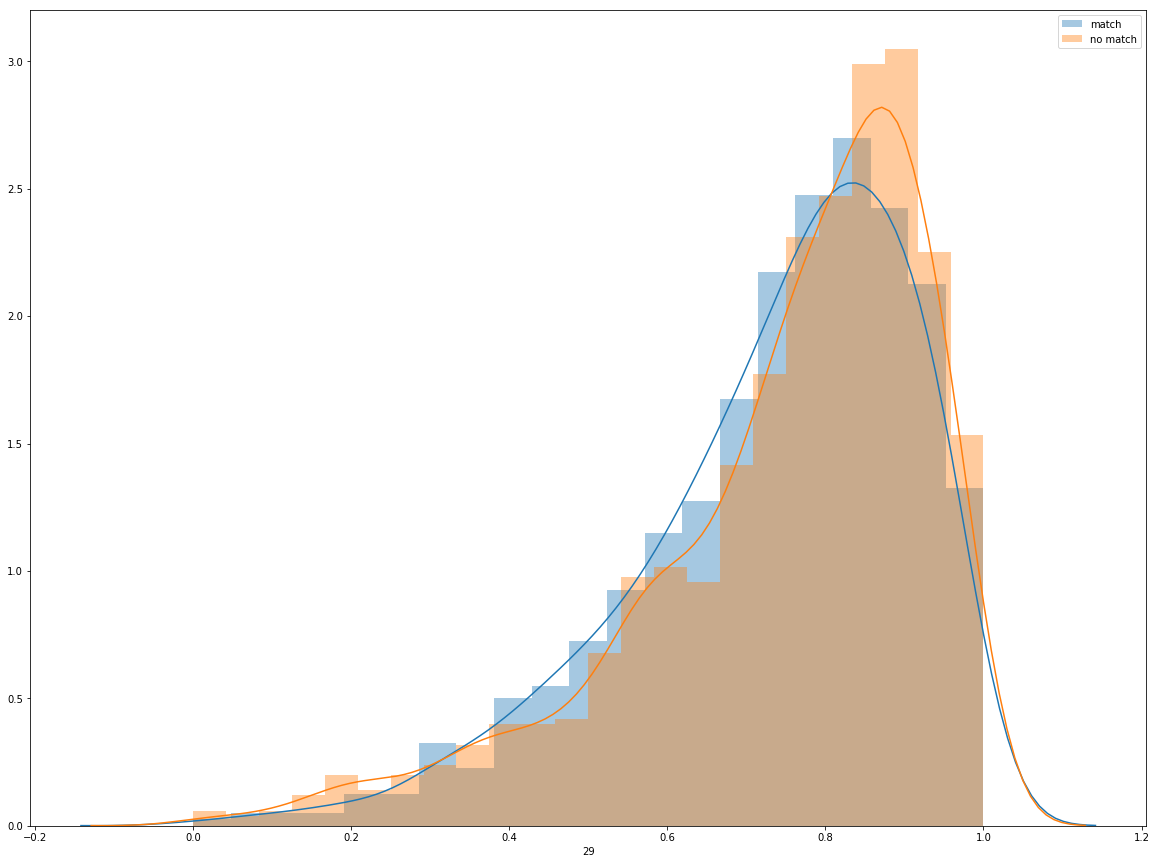




30


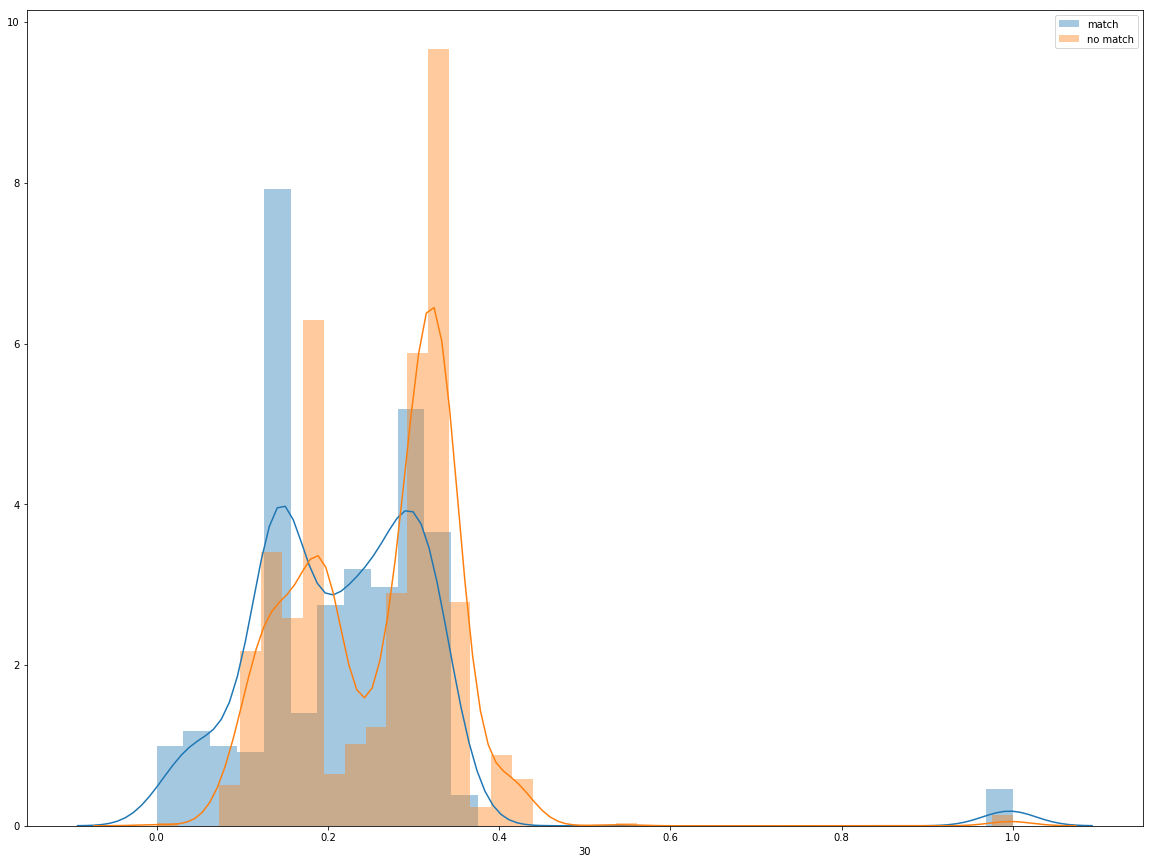




31


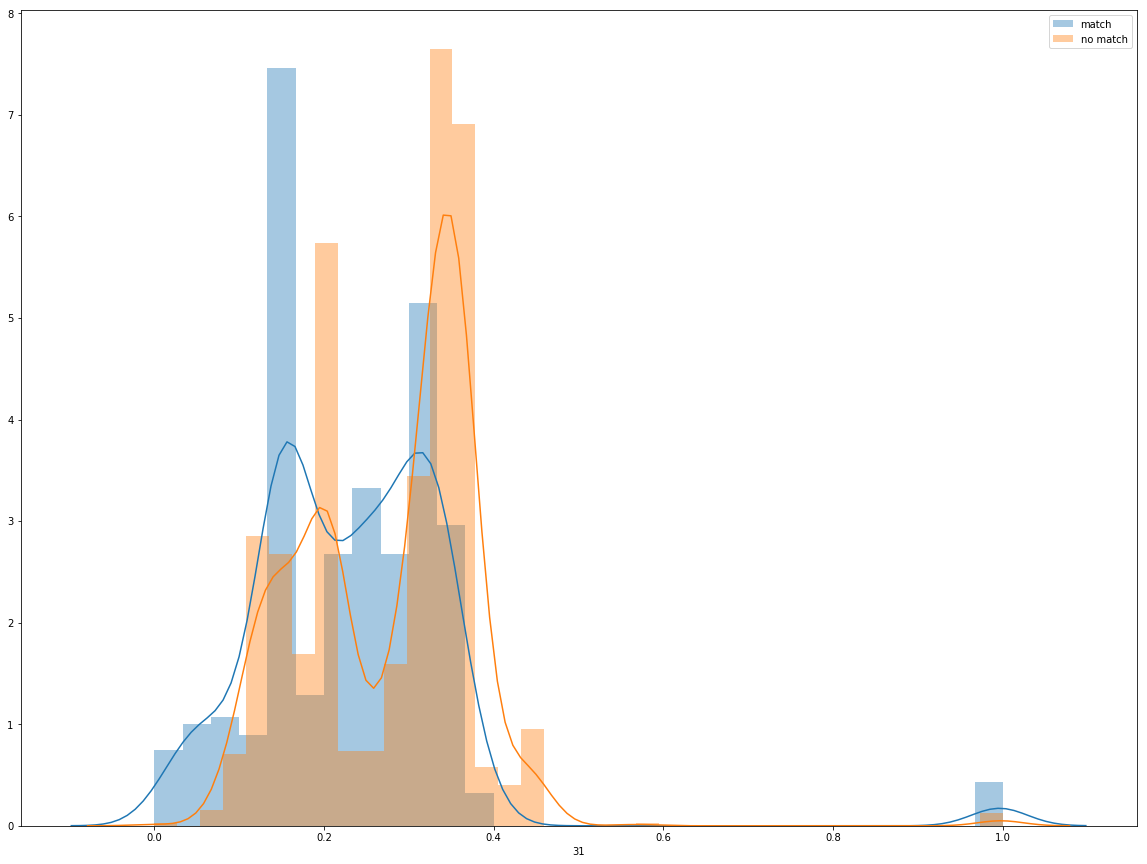




32


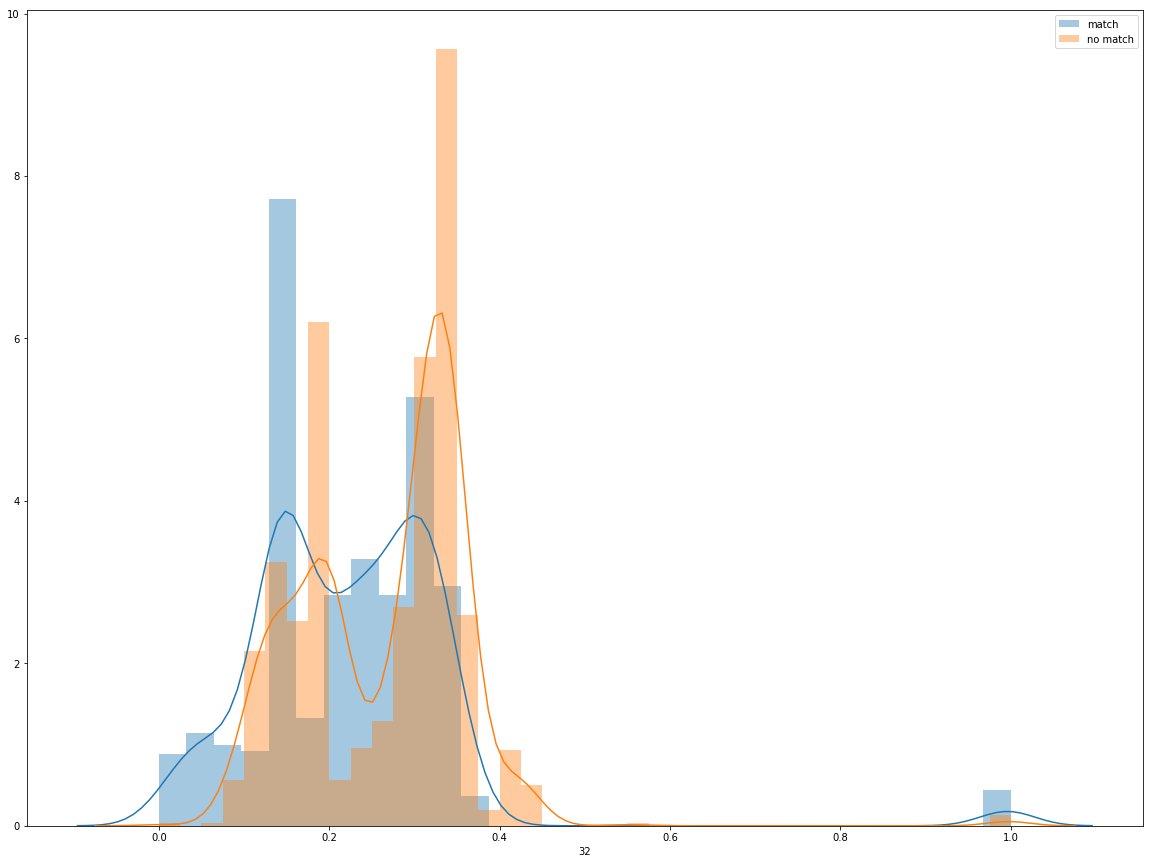




33


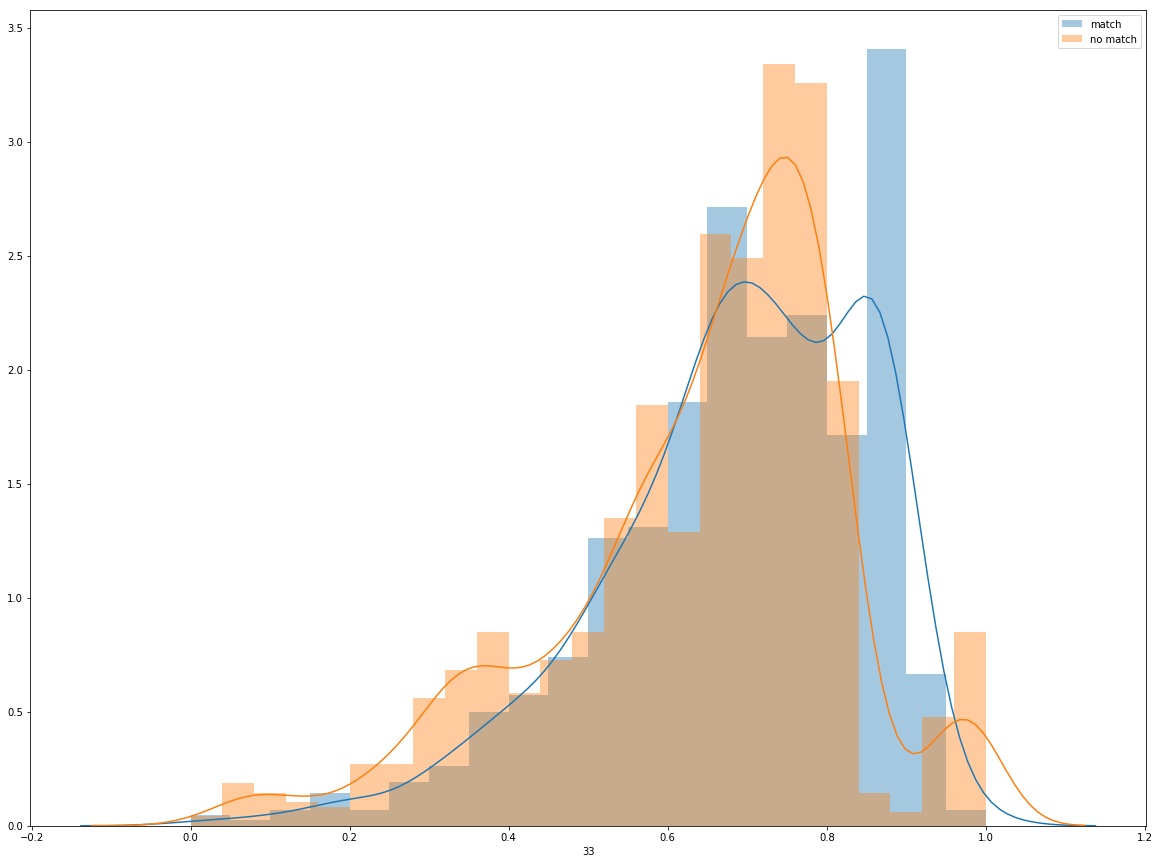




34


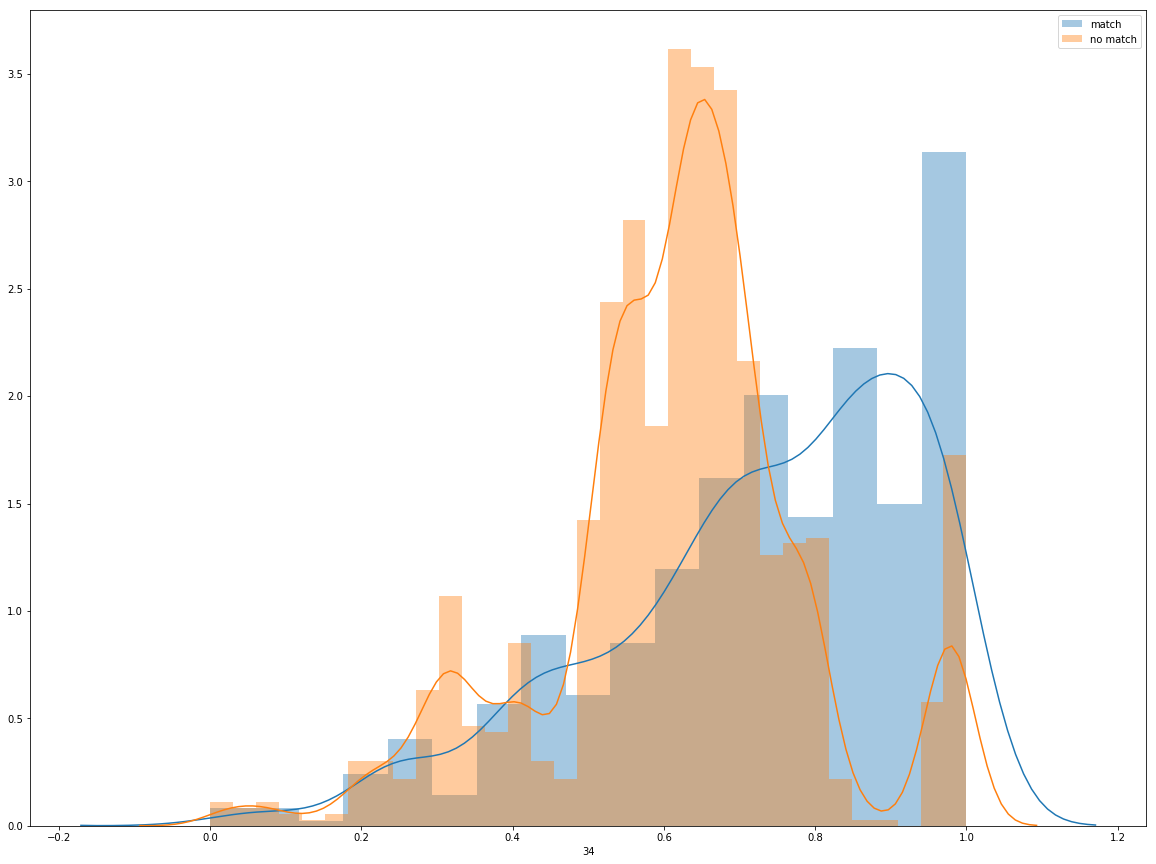




35


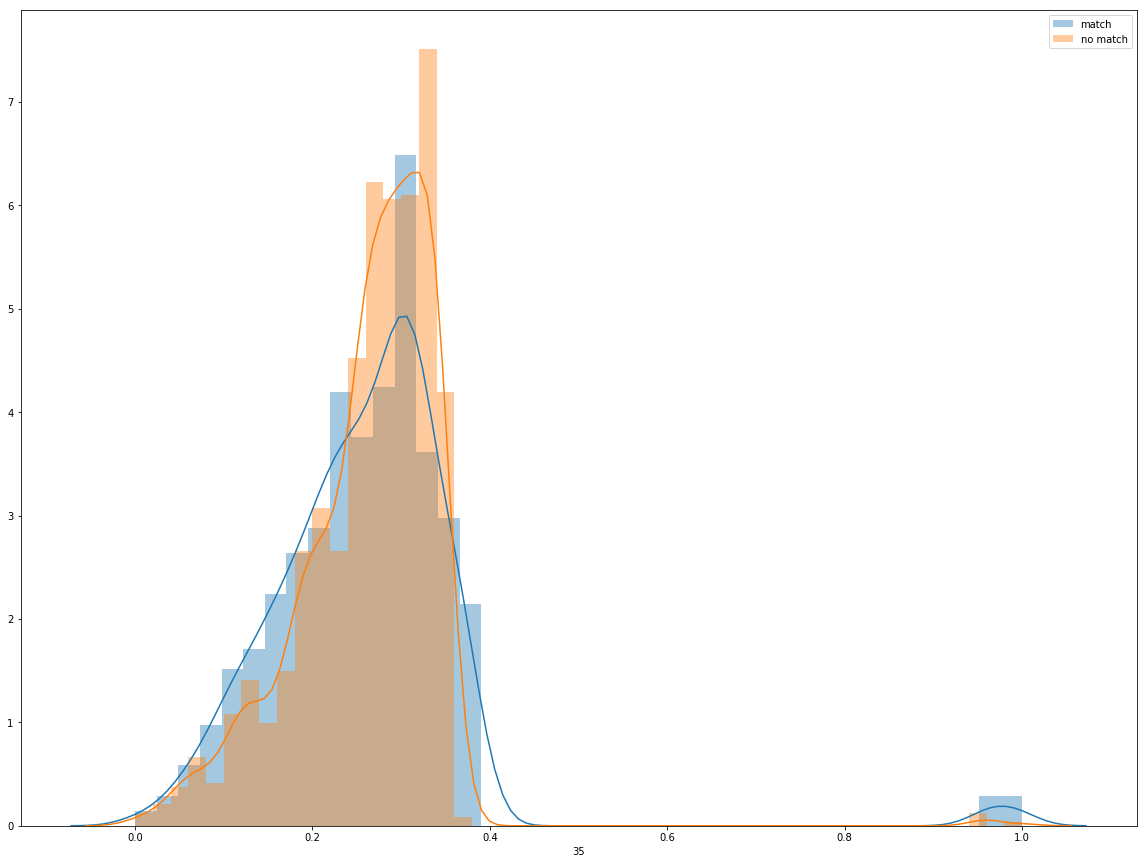




36


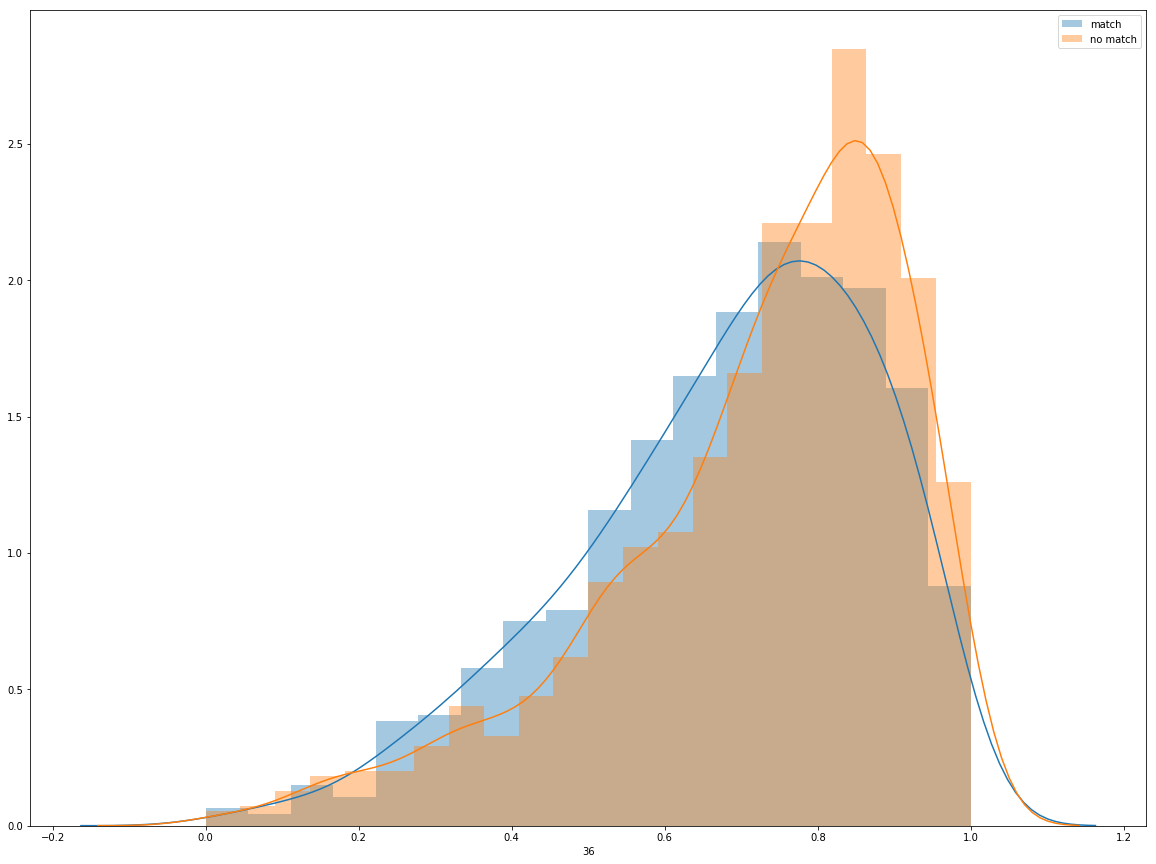




37


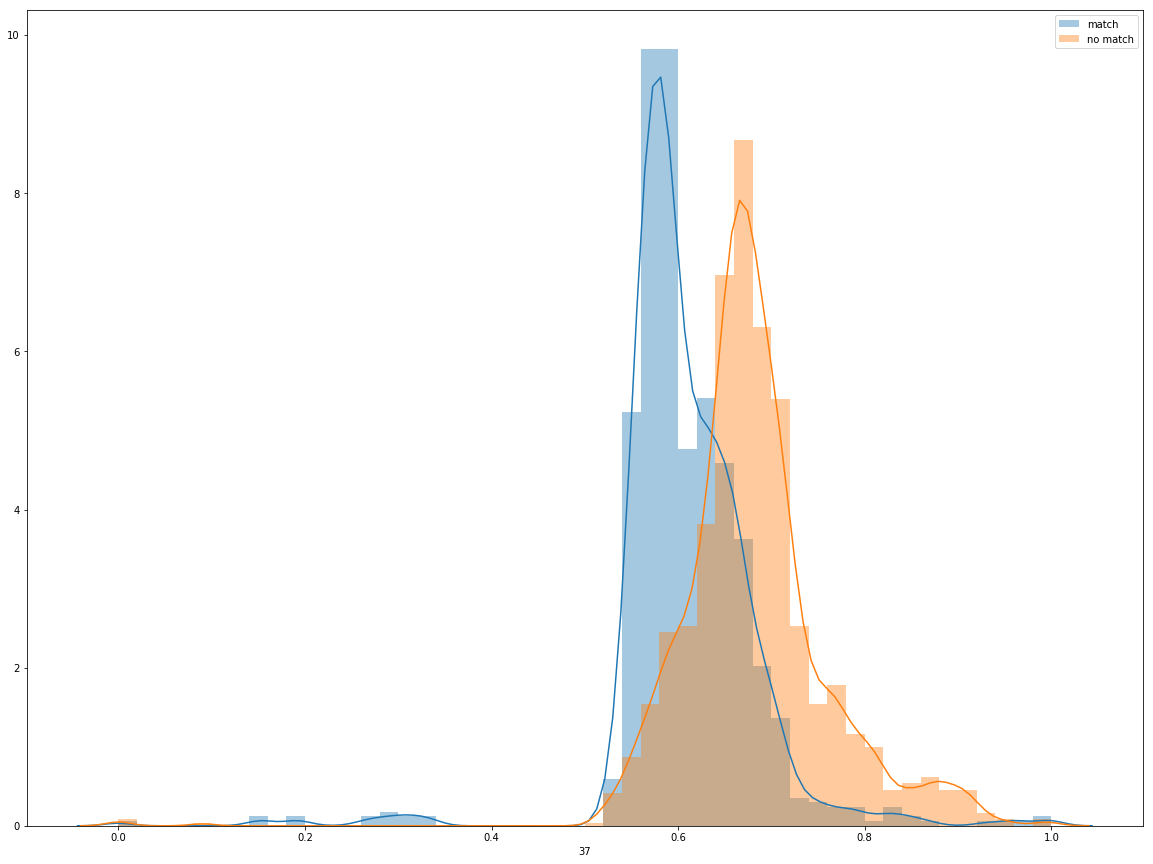




38


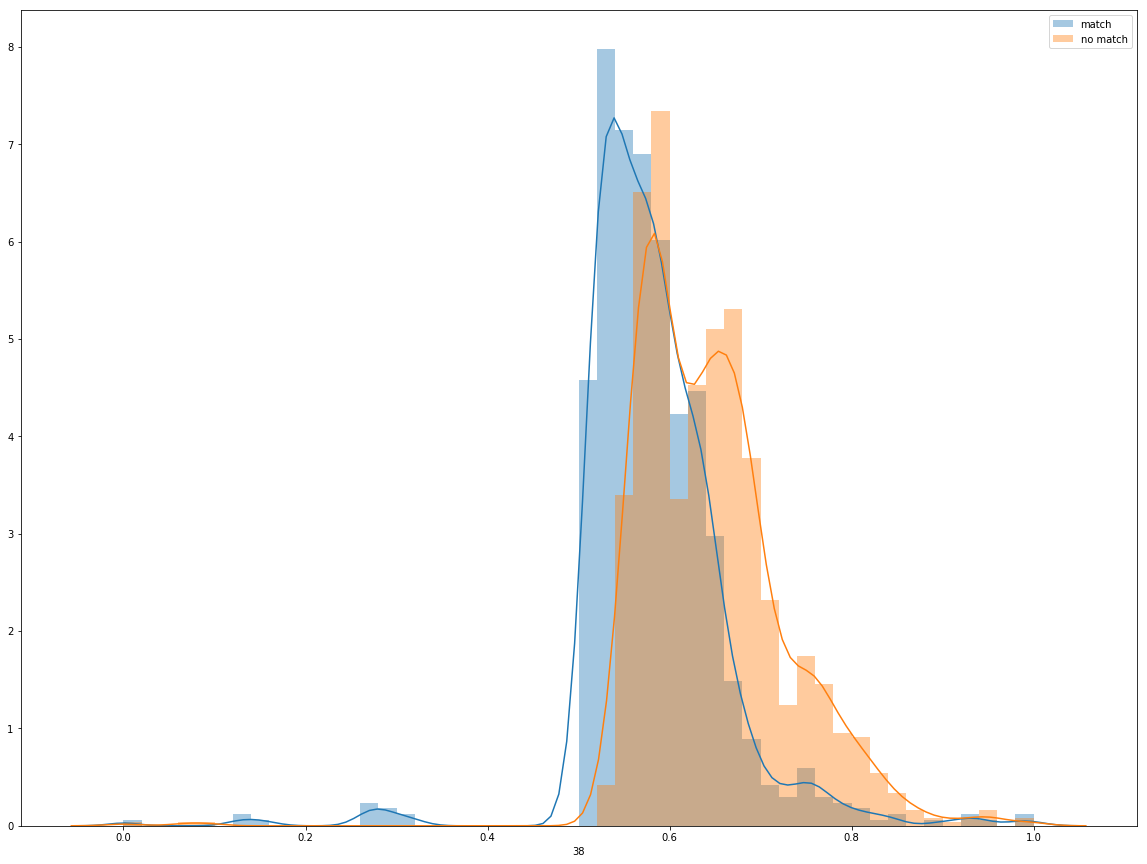




39


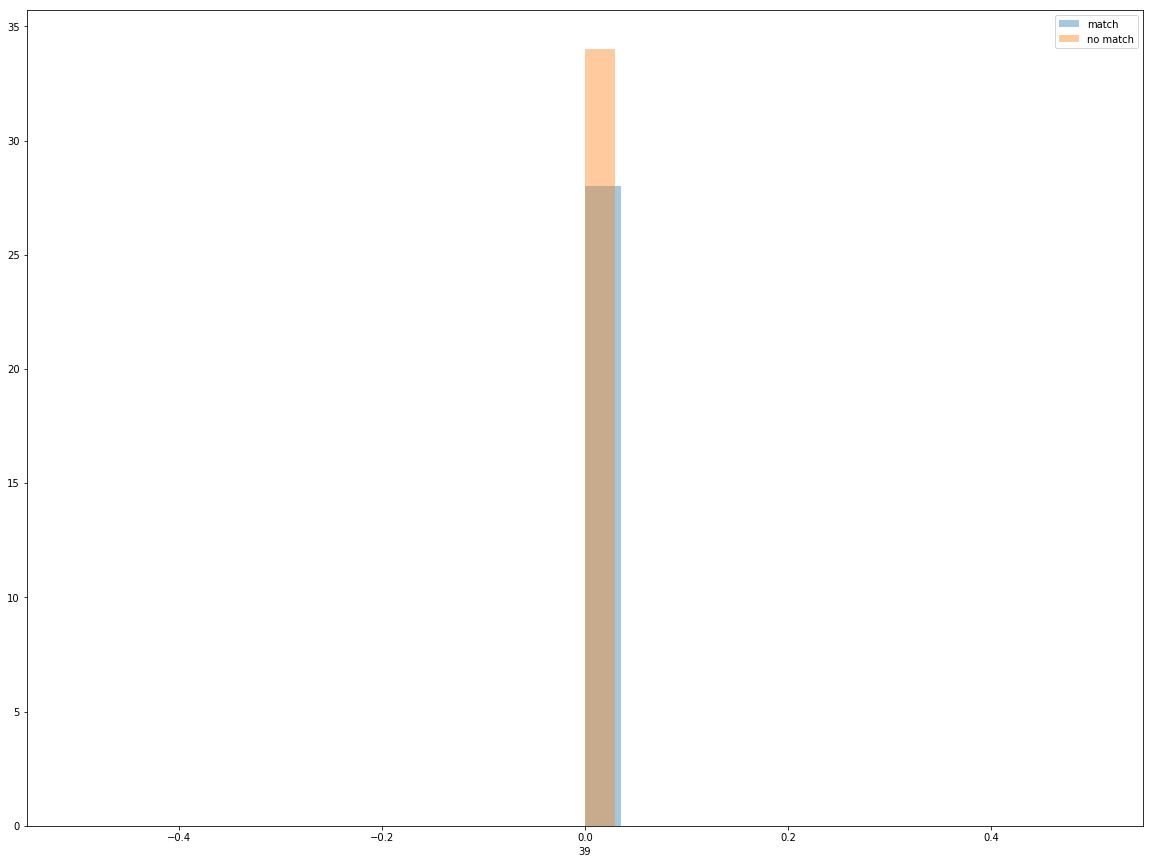




40


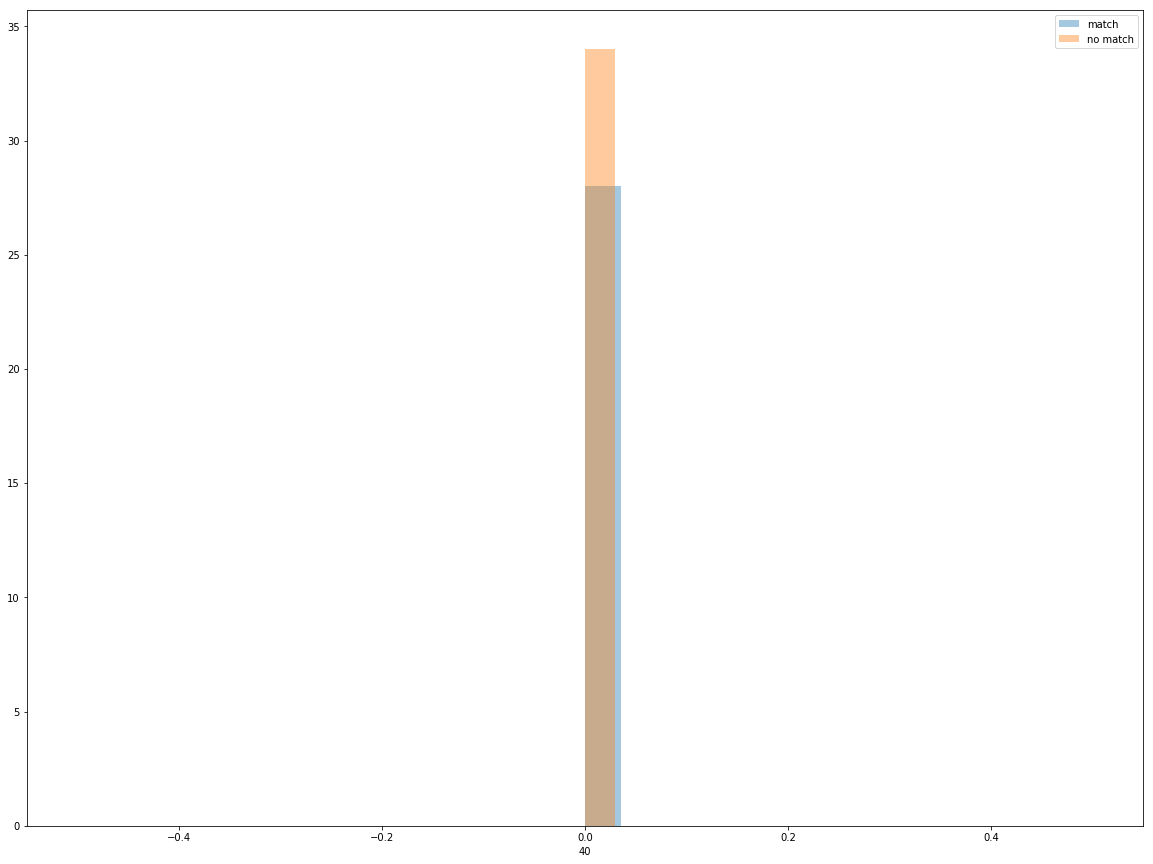




41


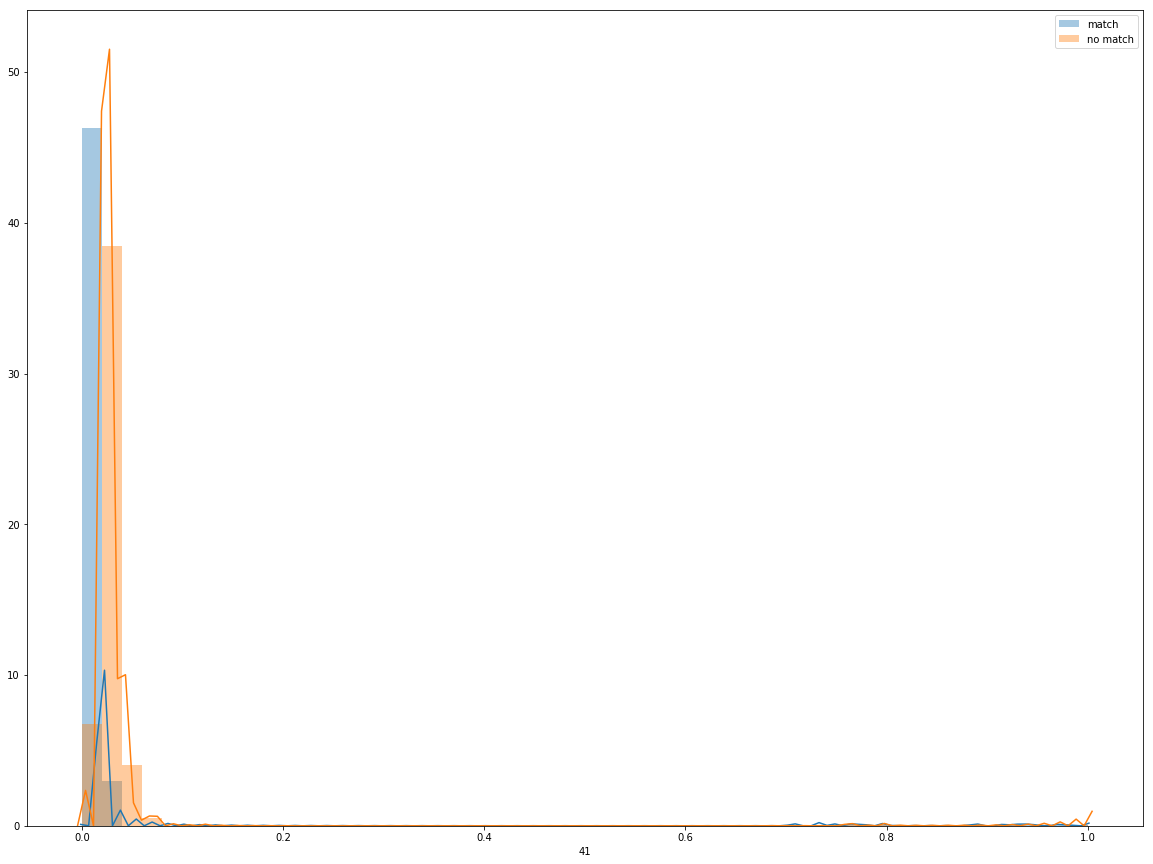




42


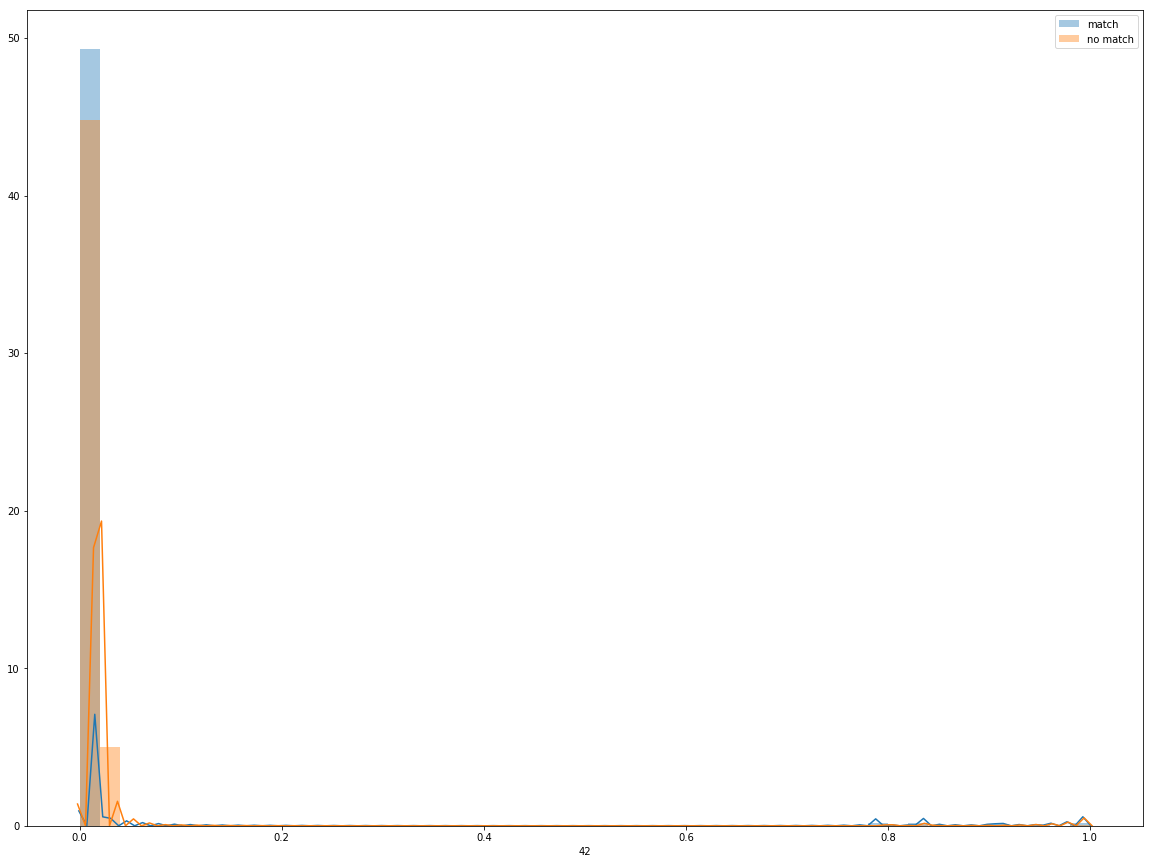




43


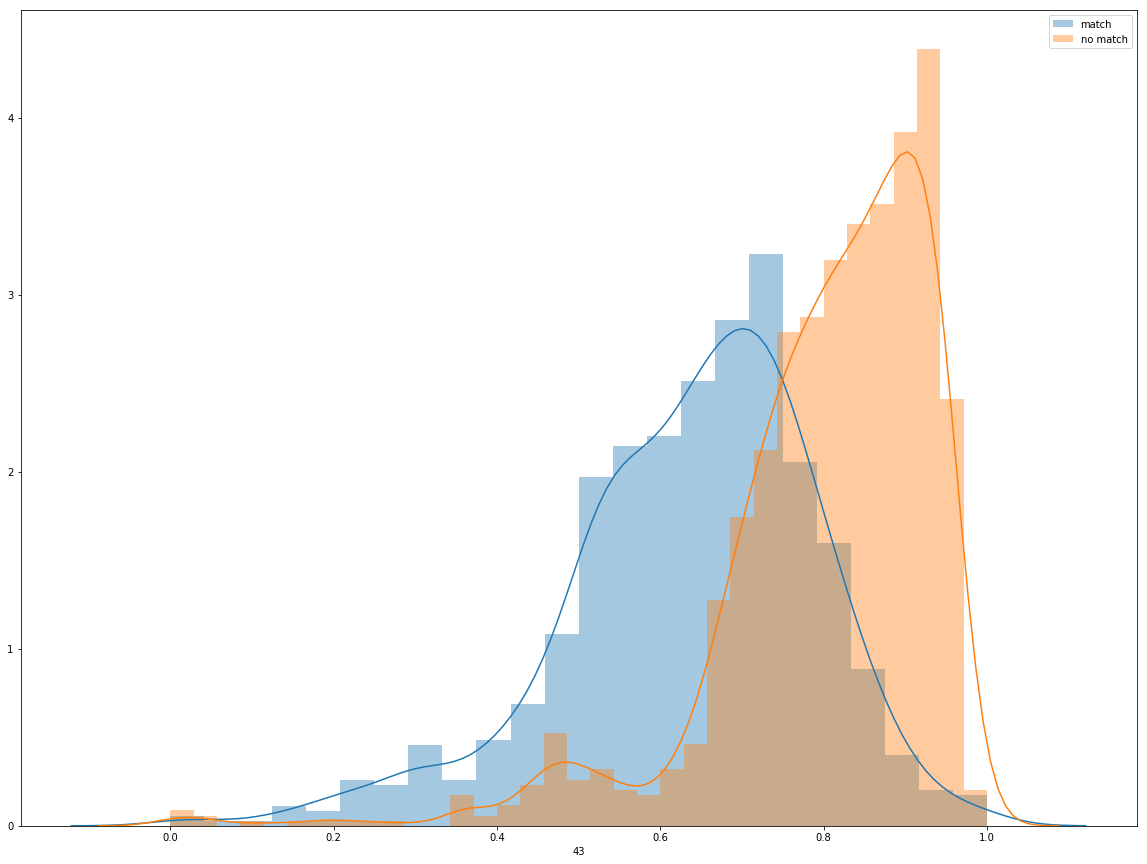




44


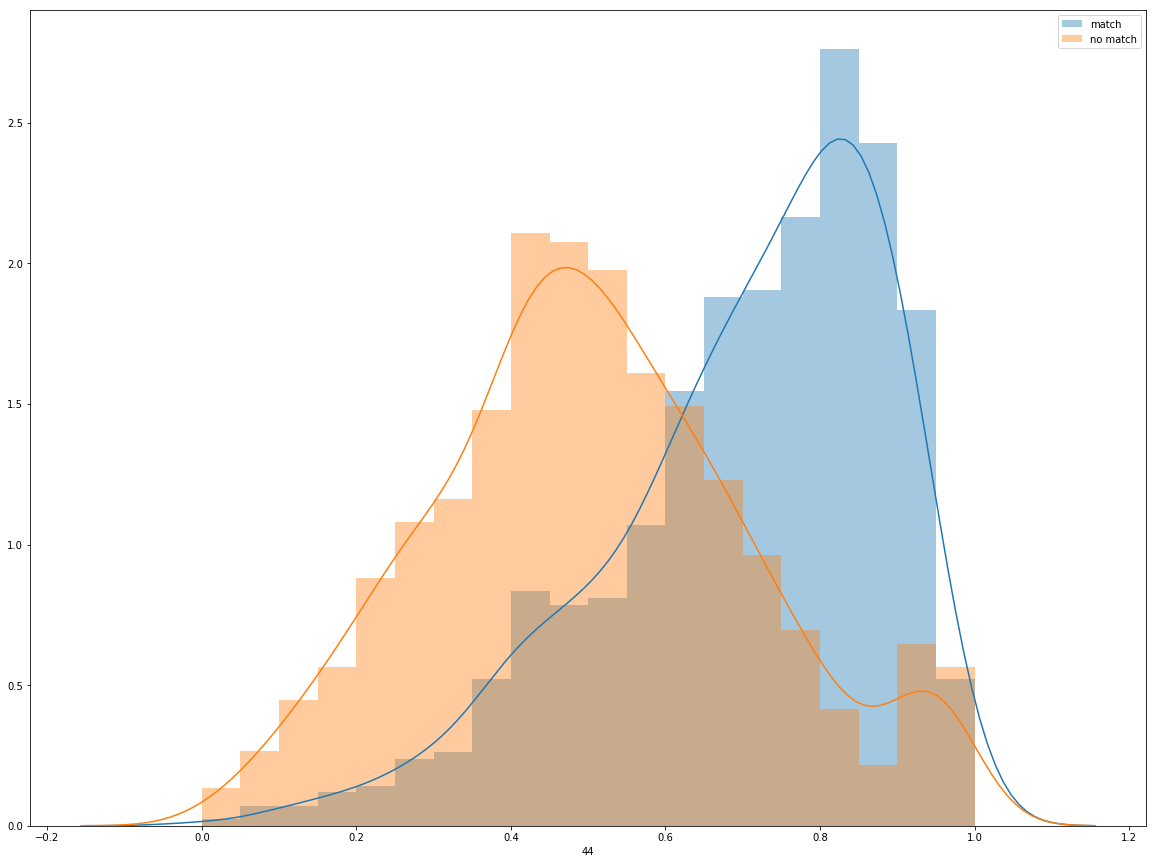




45


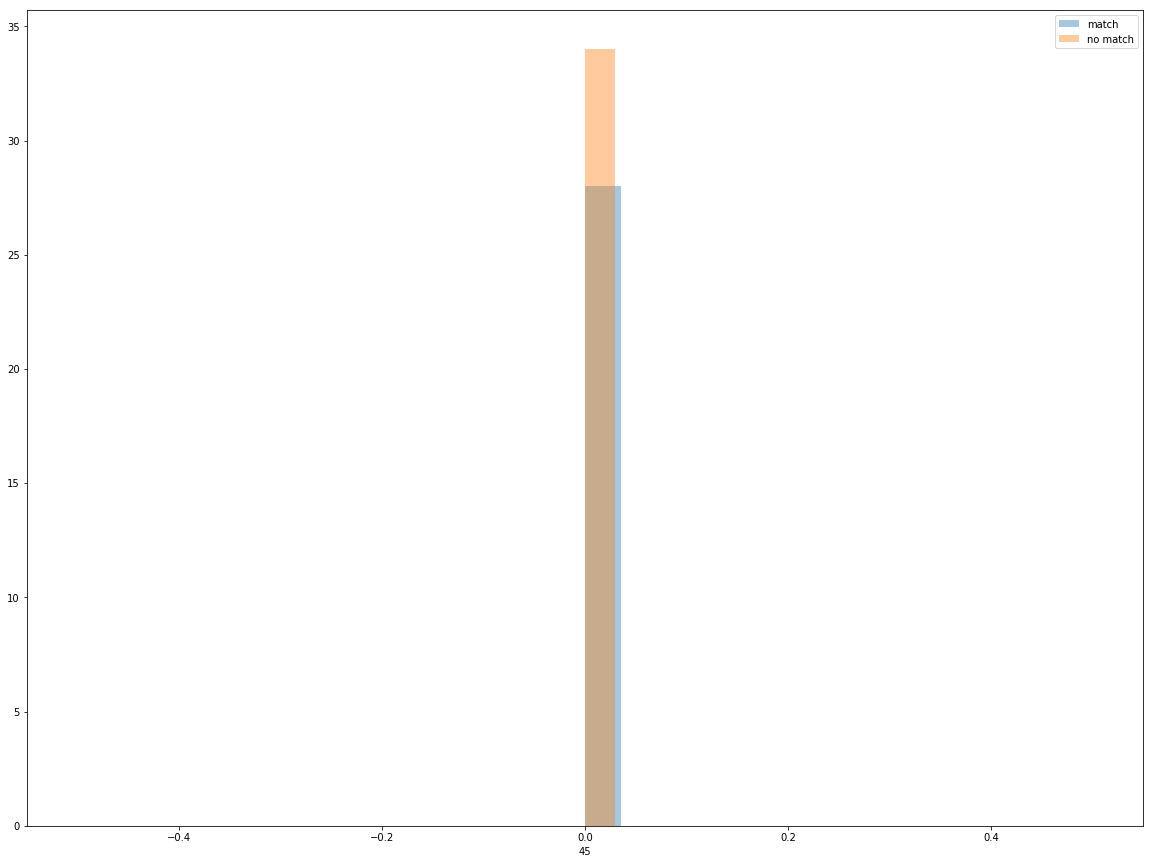




46


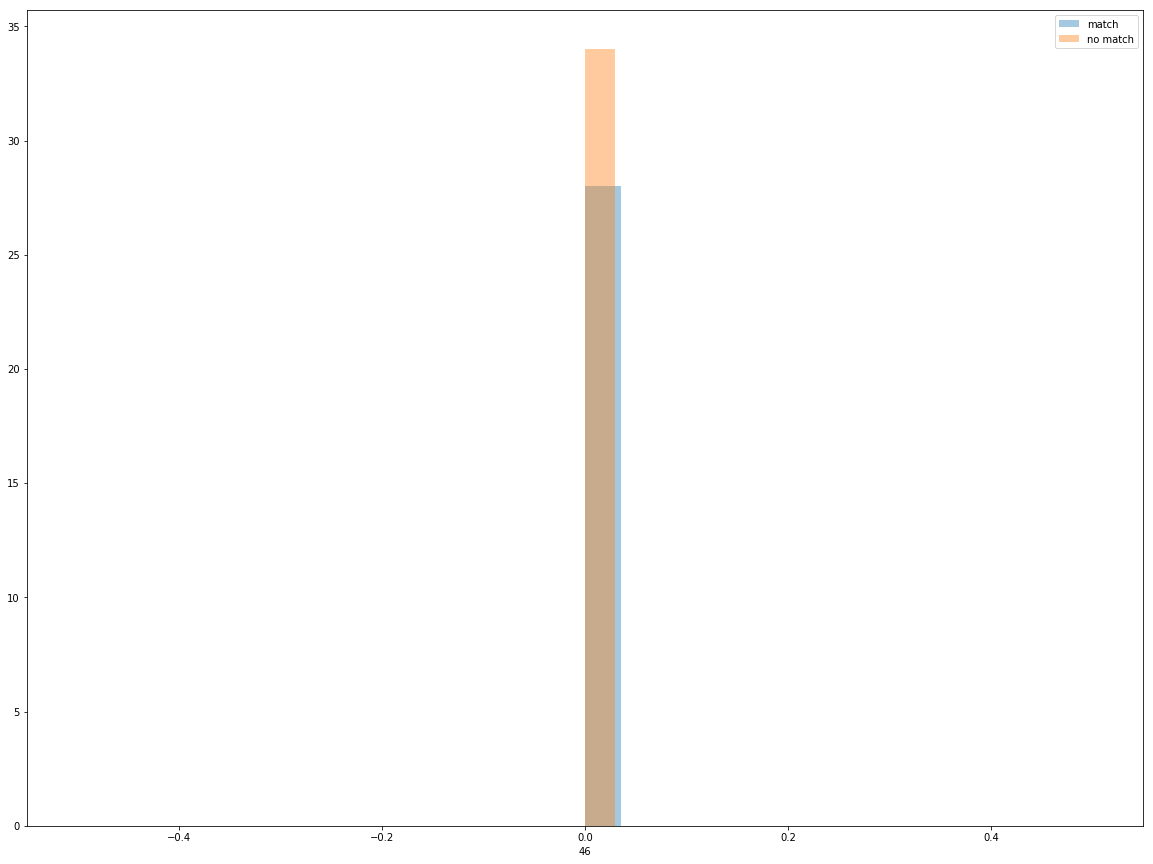




47


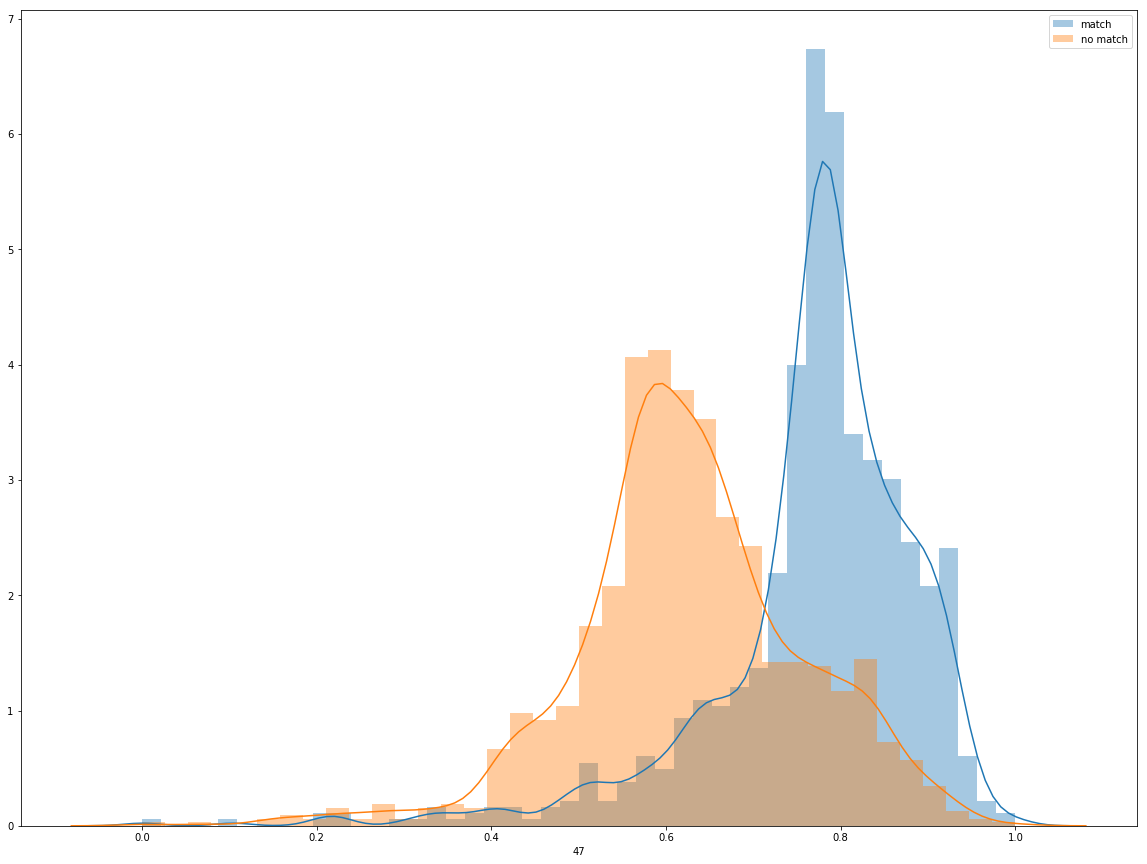




48


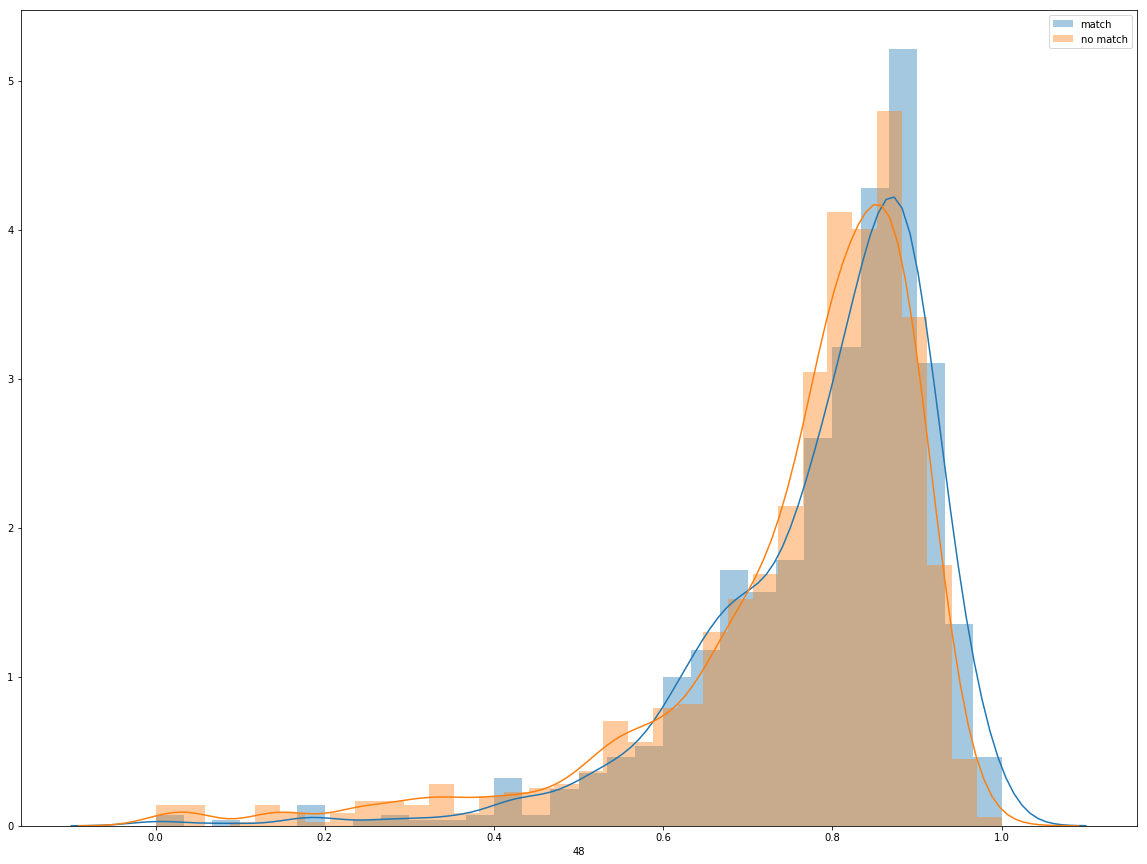




49


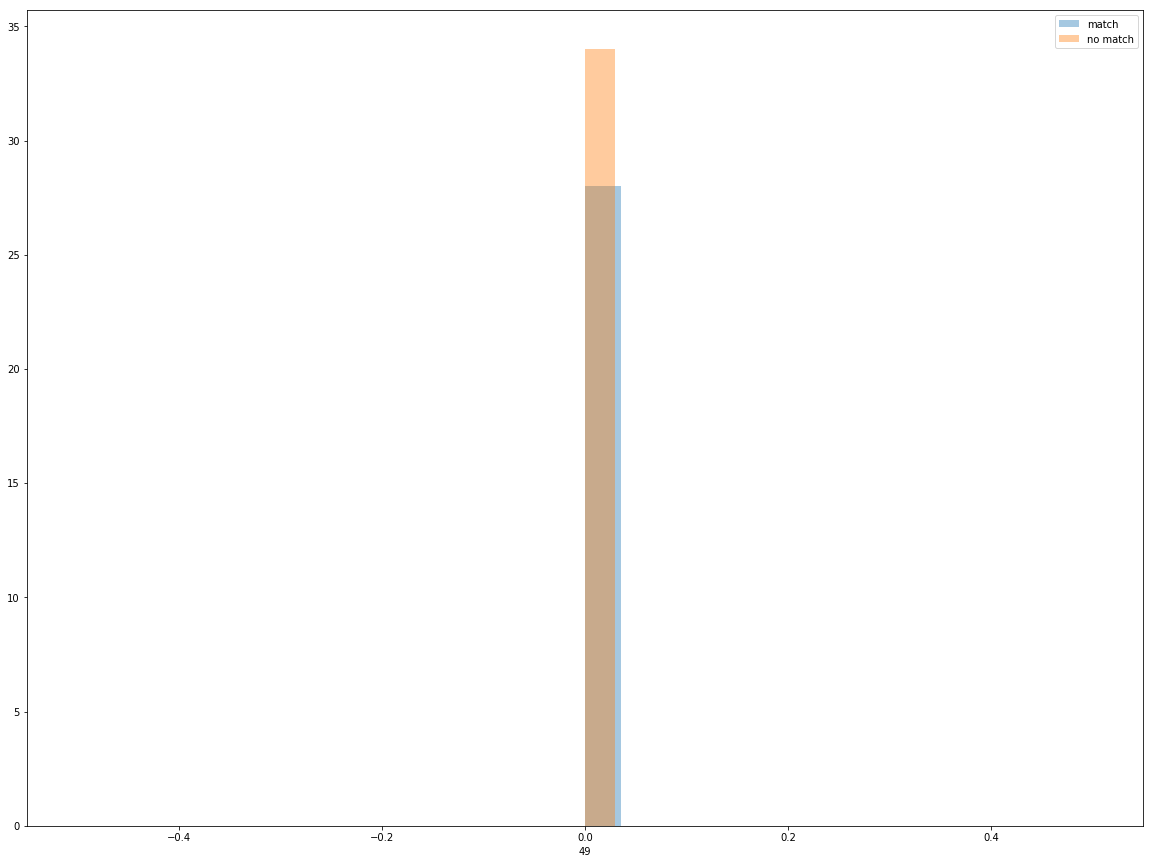




50


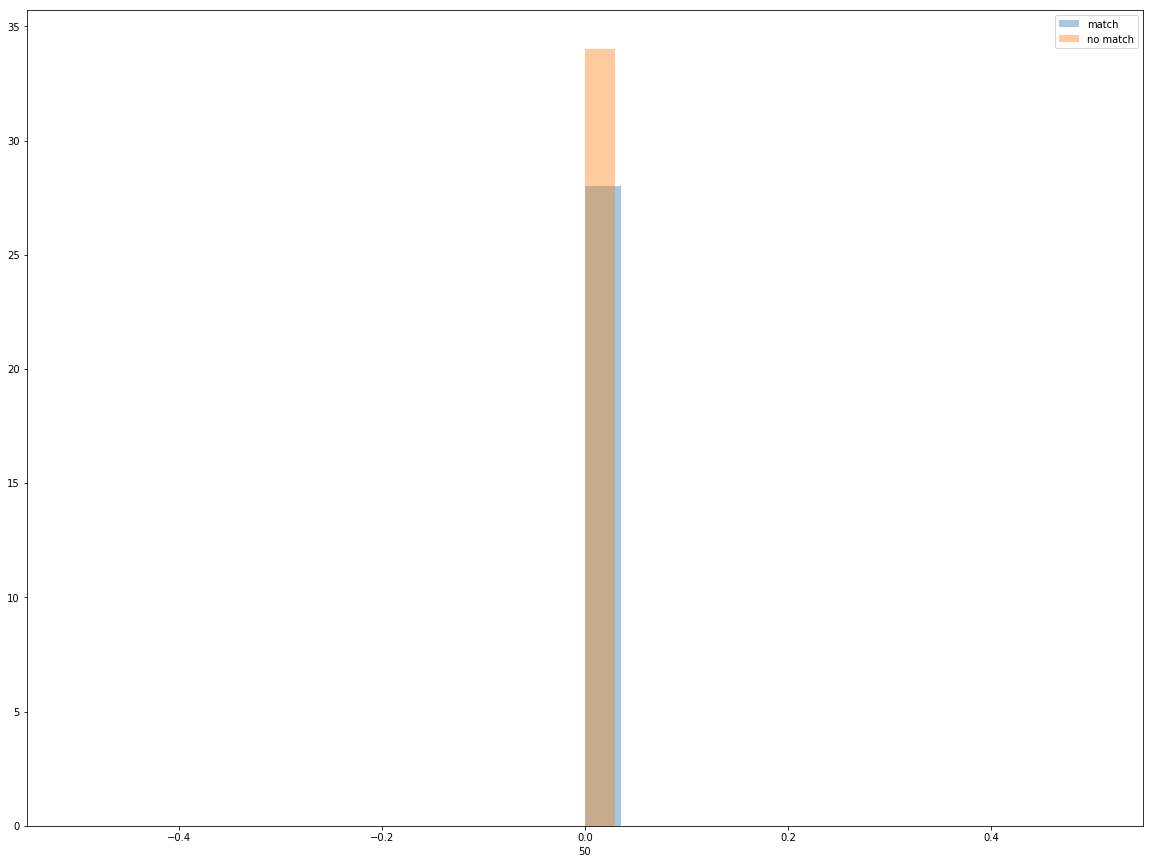




51


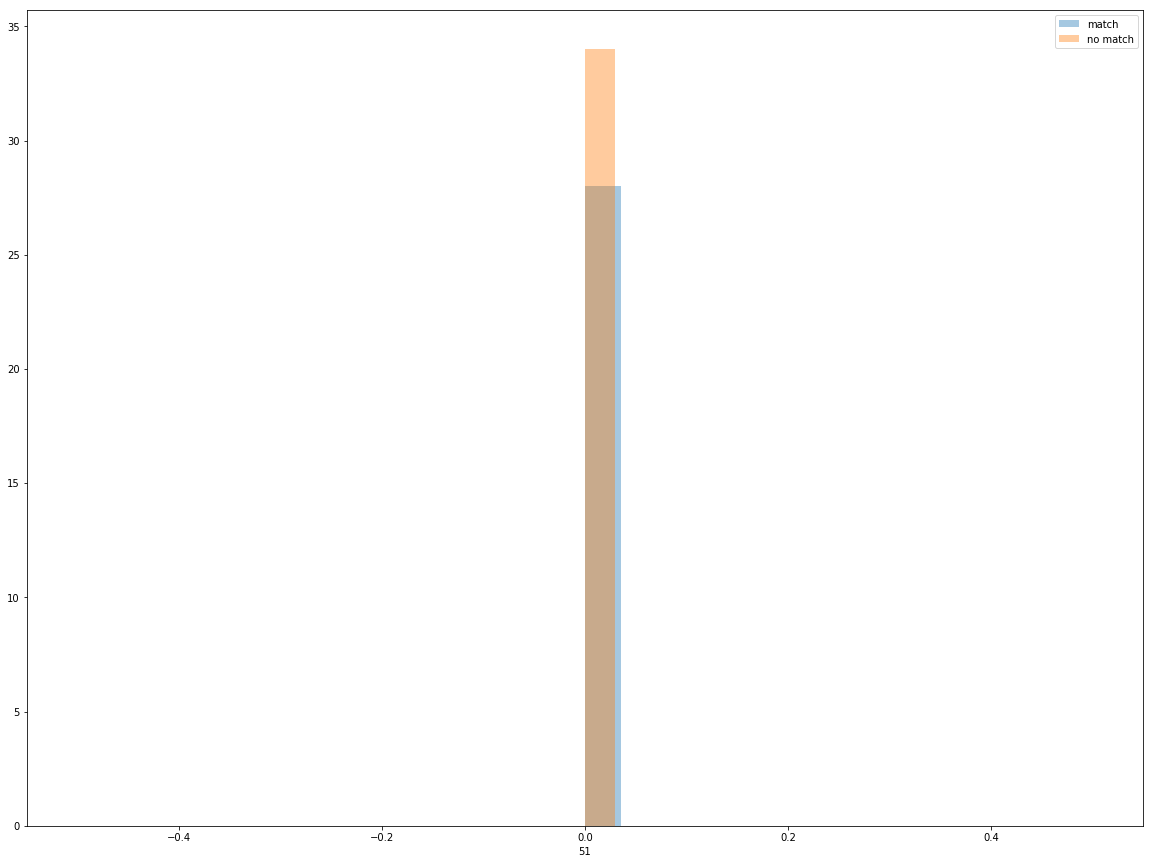




52


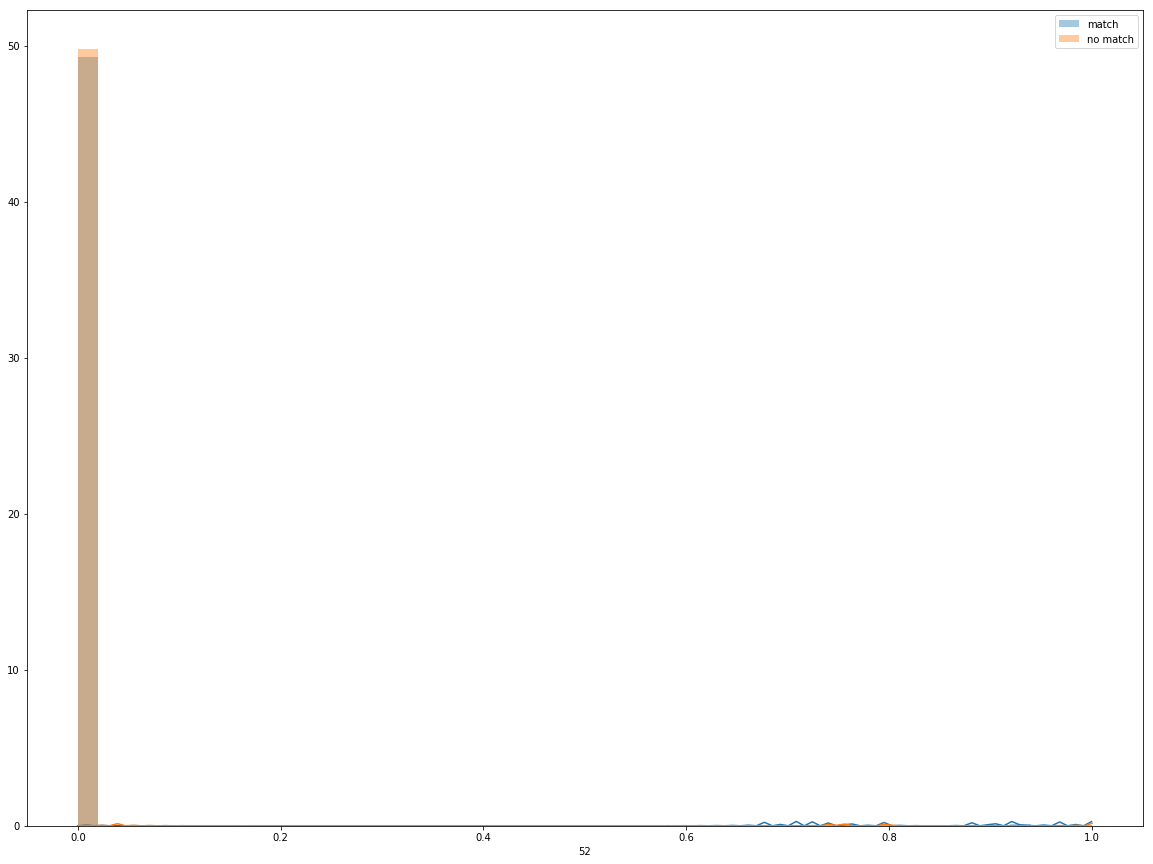




53


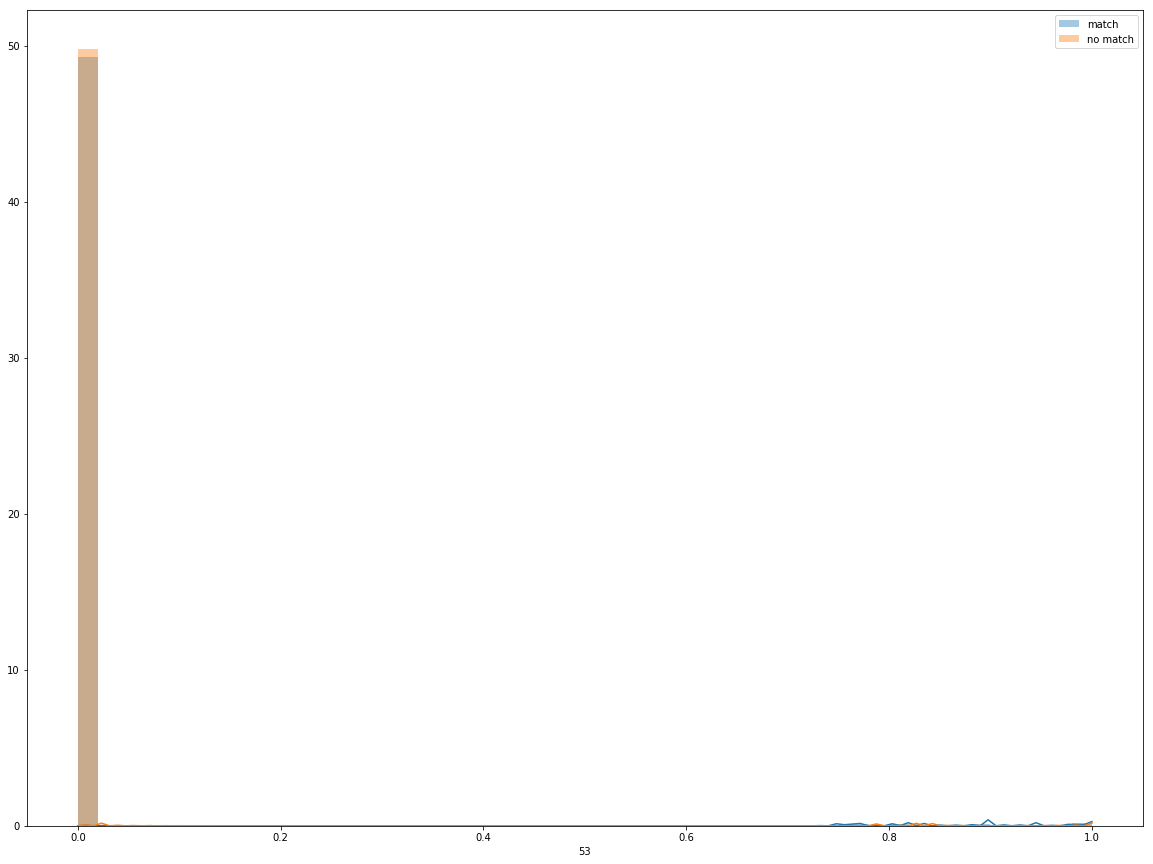




54


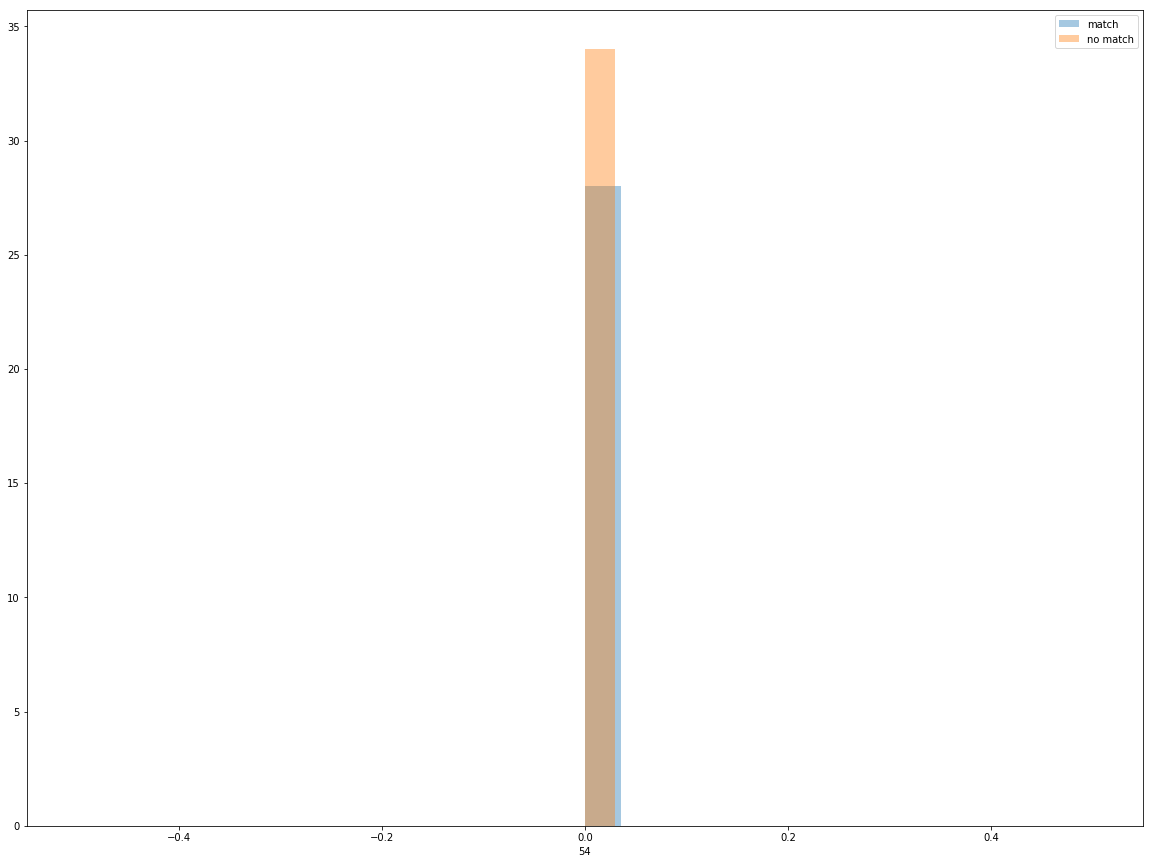




55


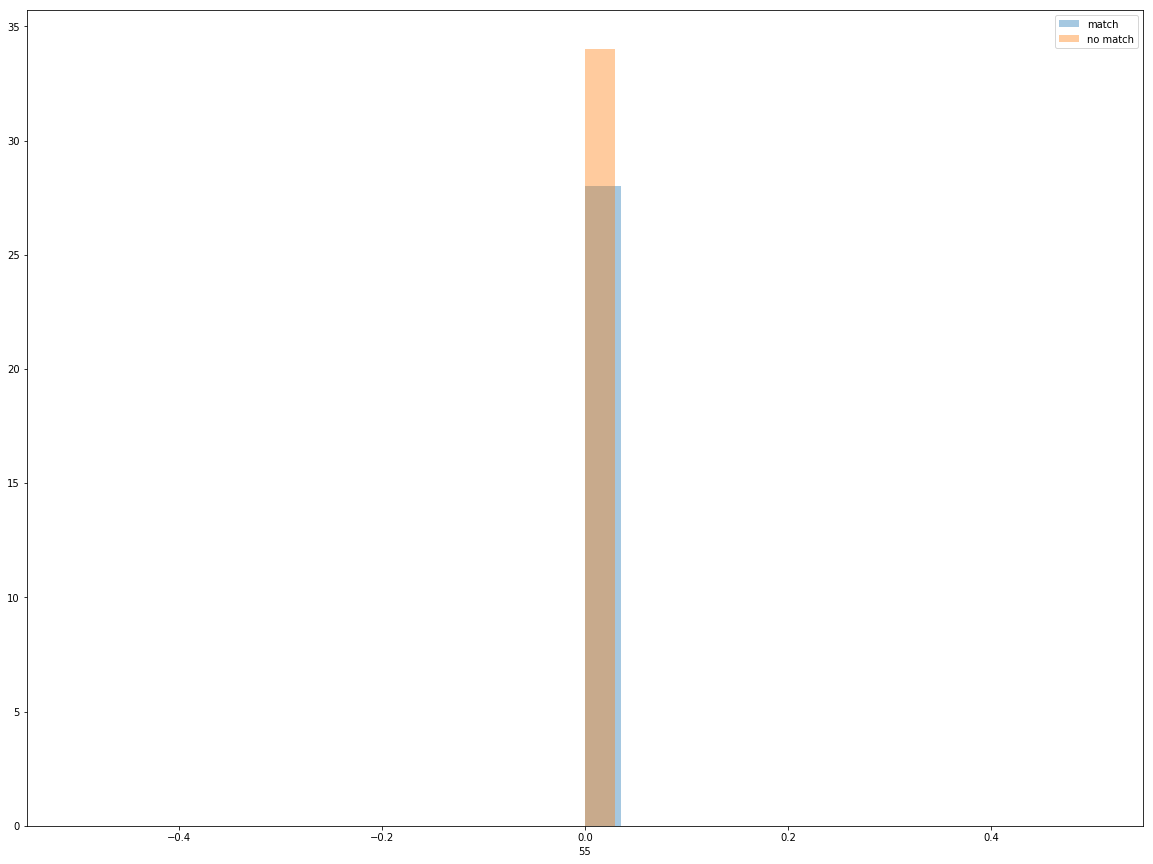




56


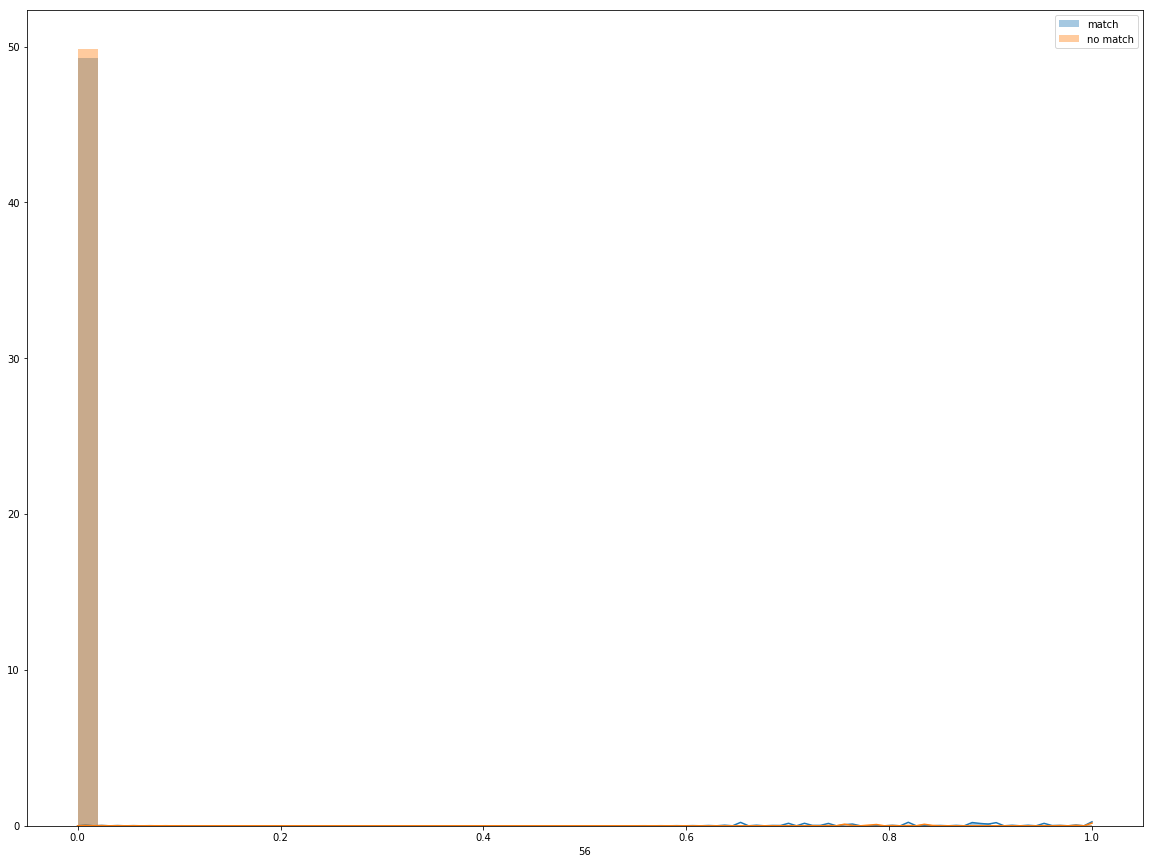




57


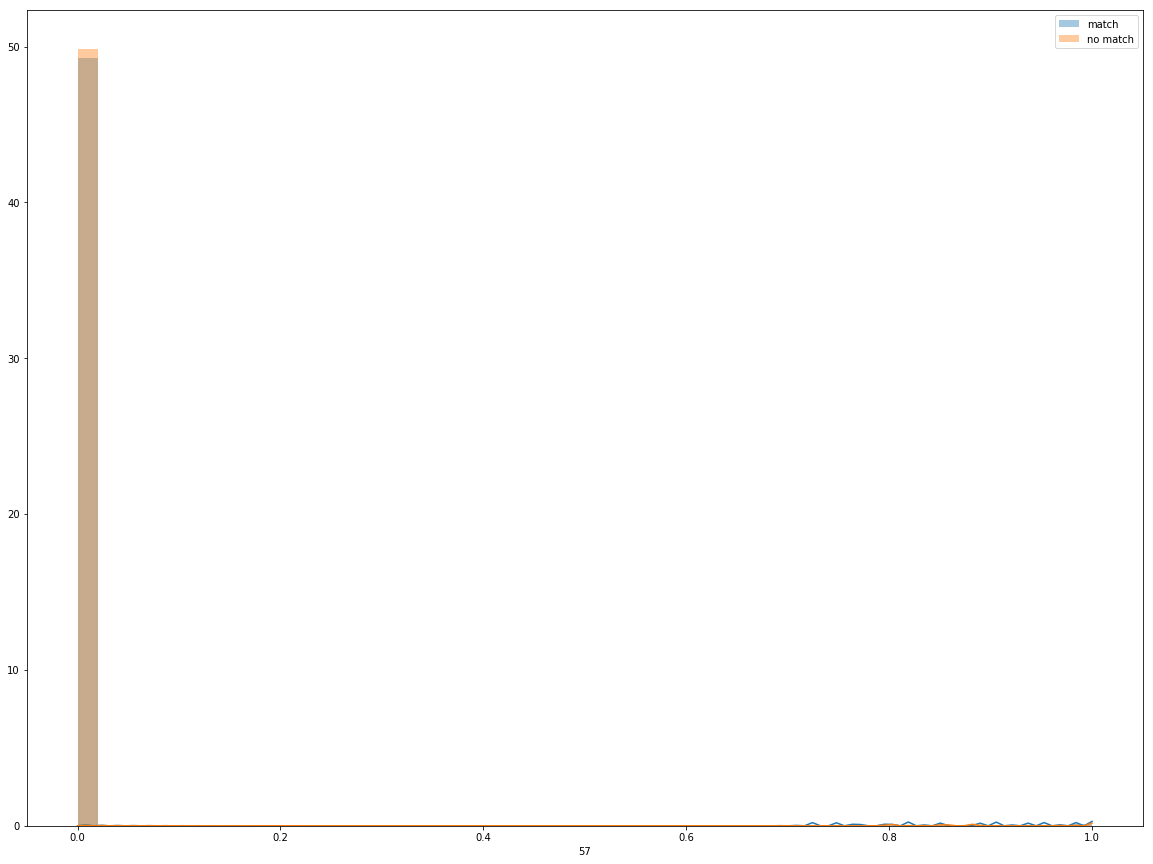




58


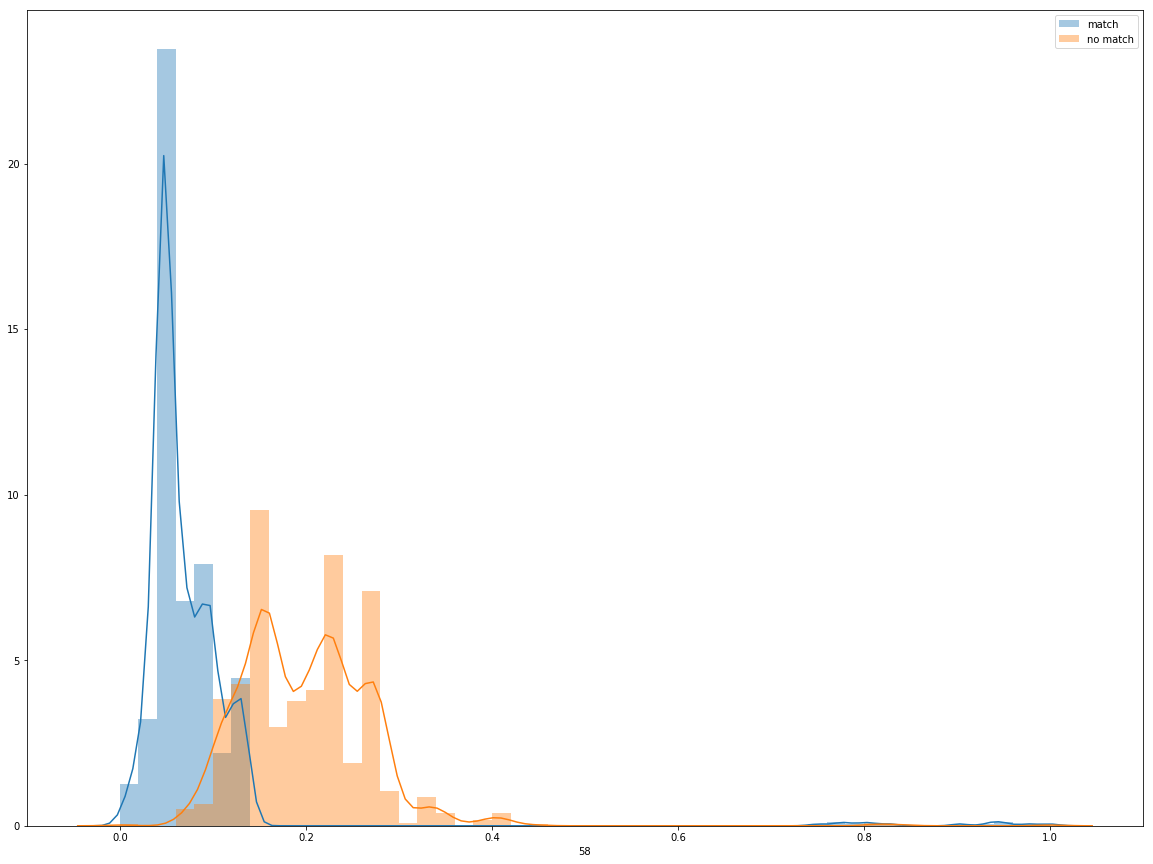




59


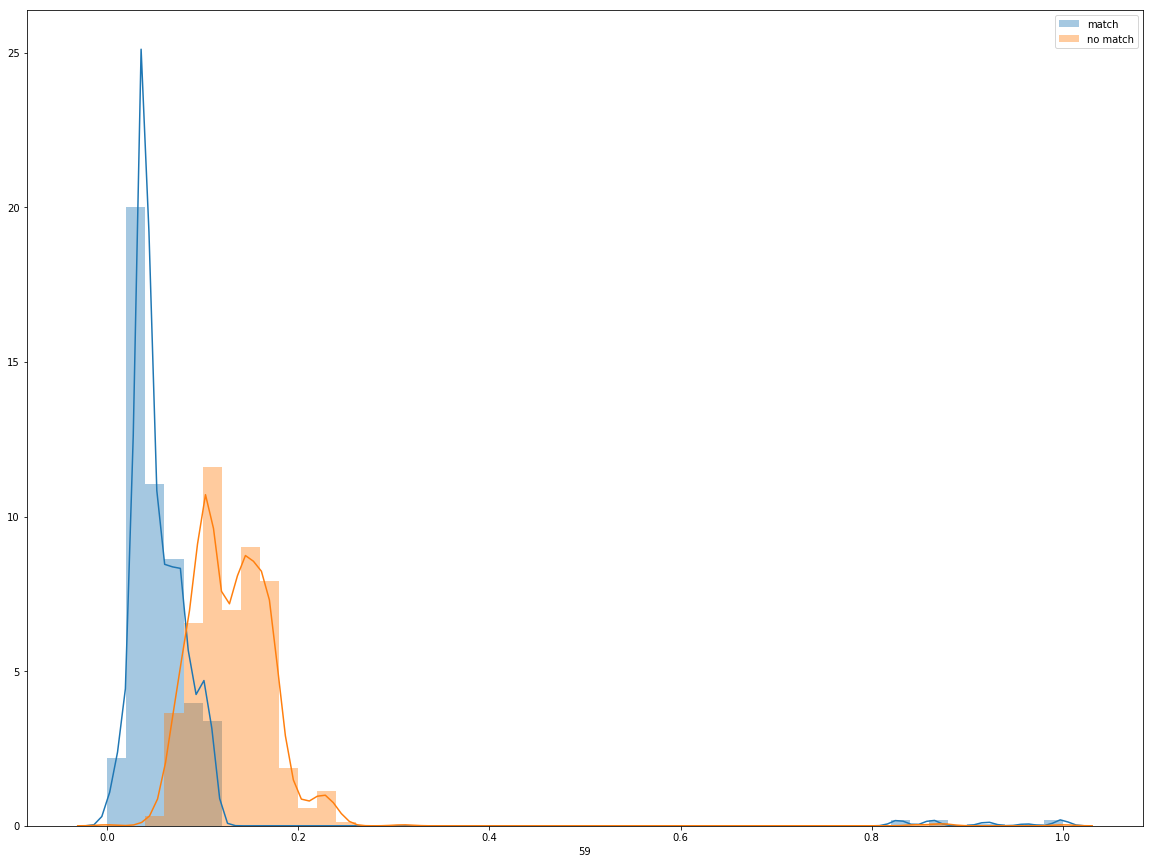




60


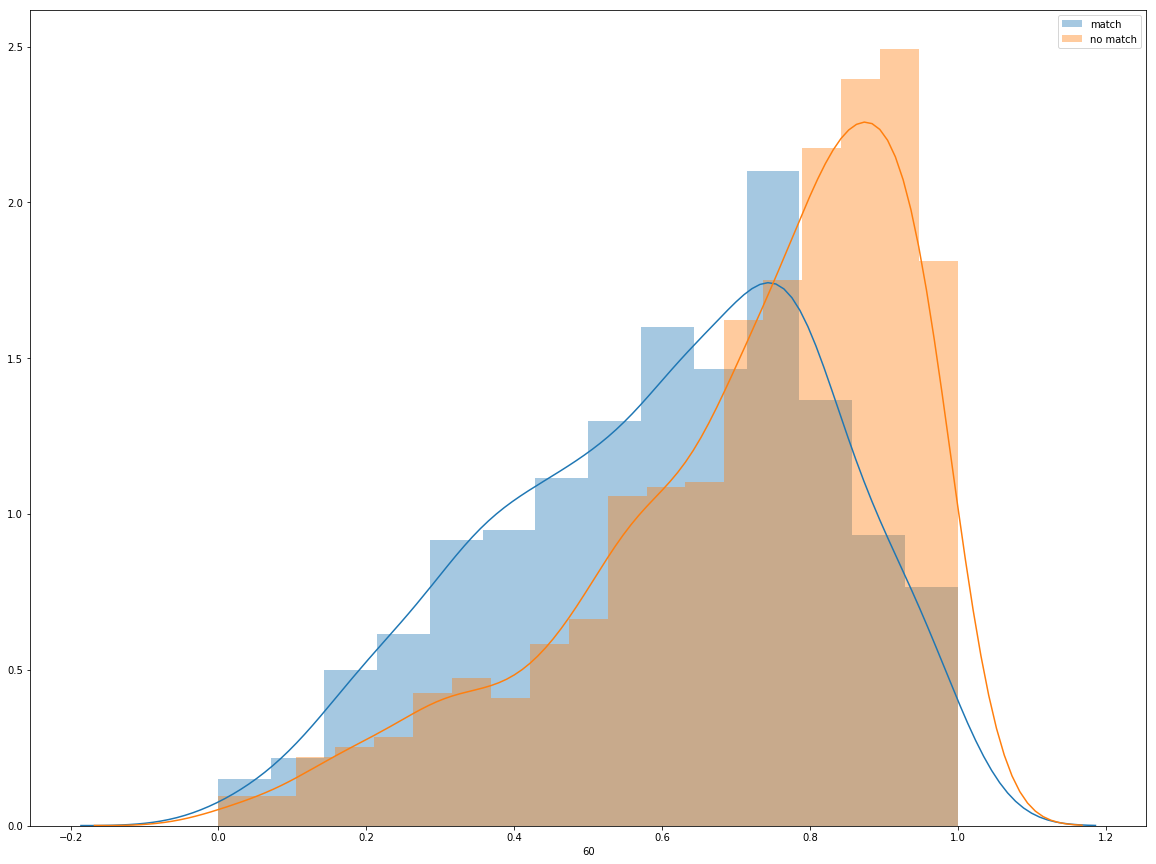




61


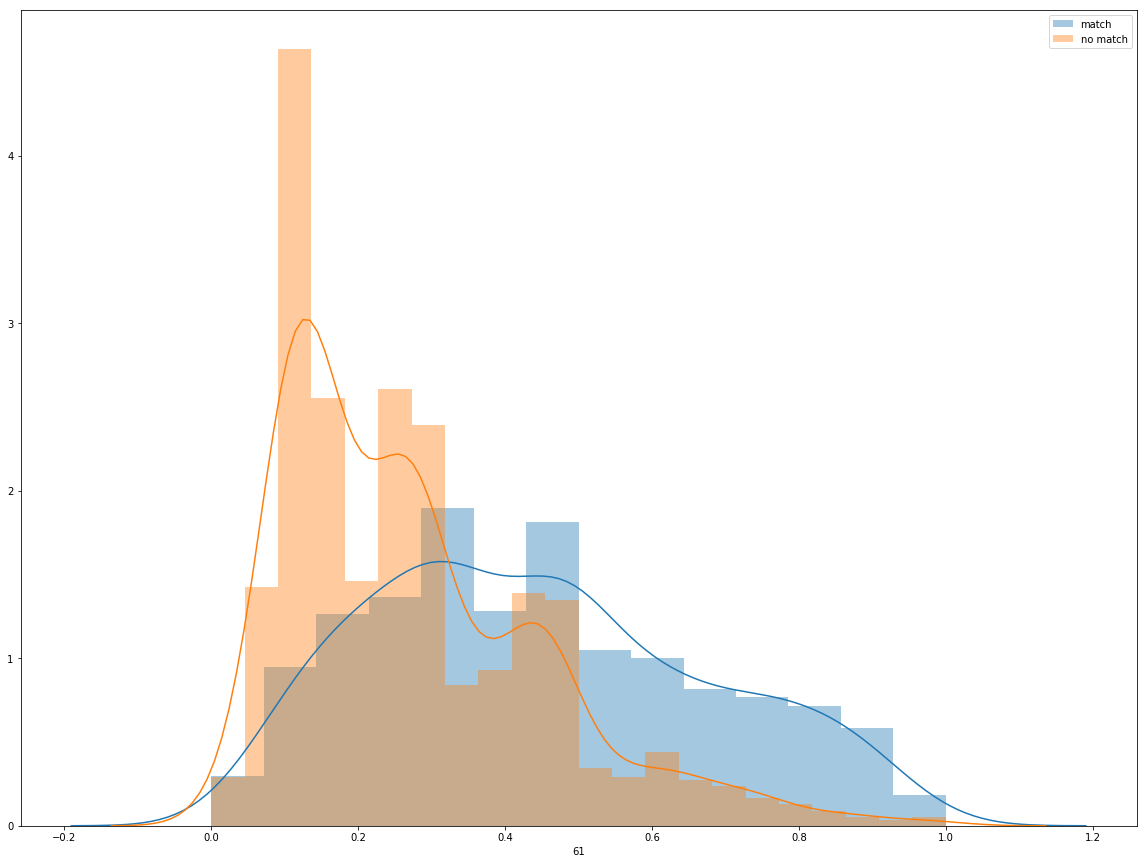




62


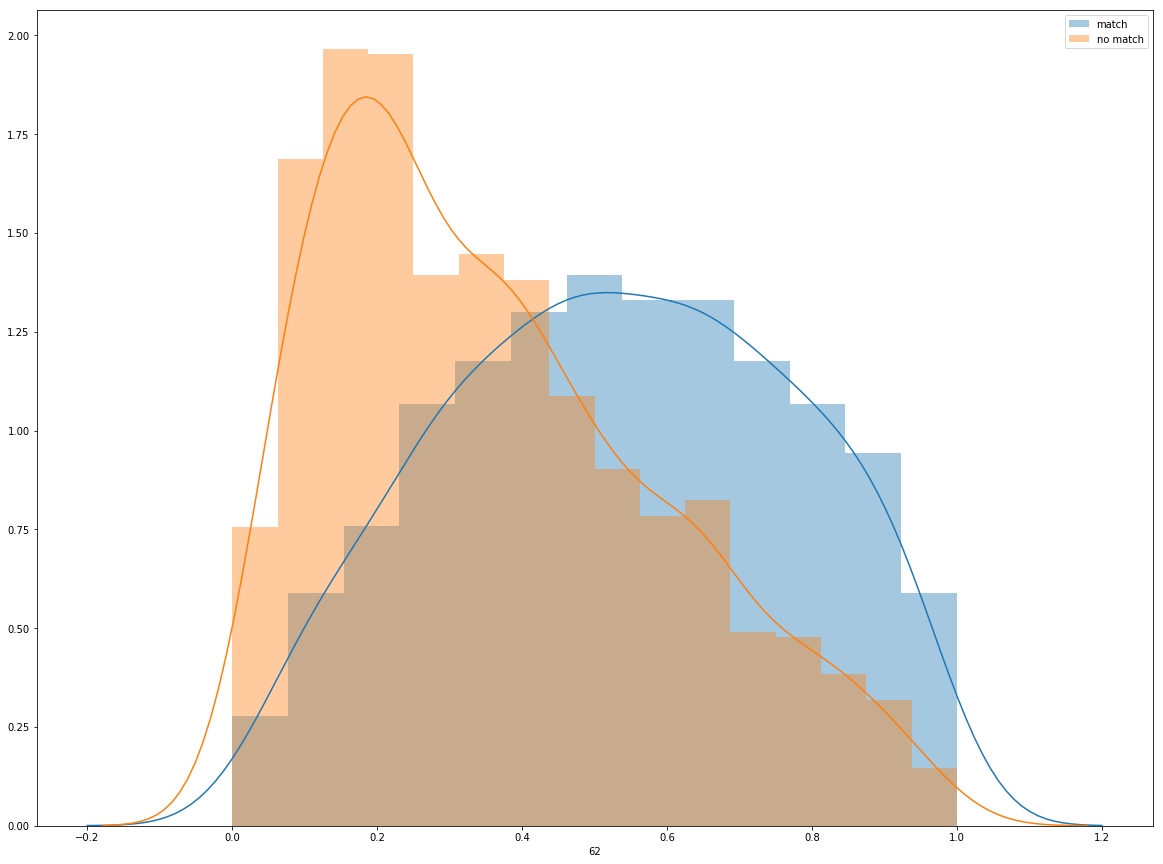




63


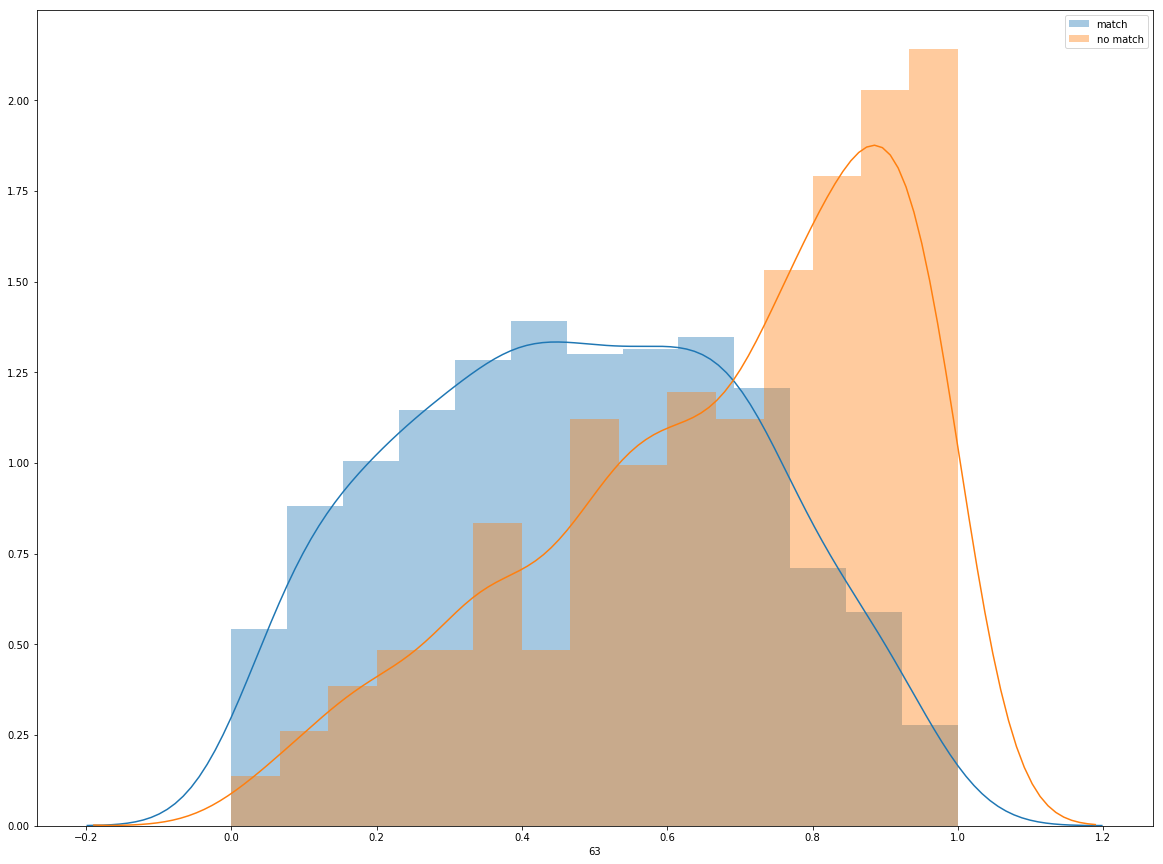




64


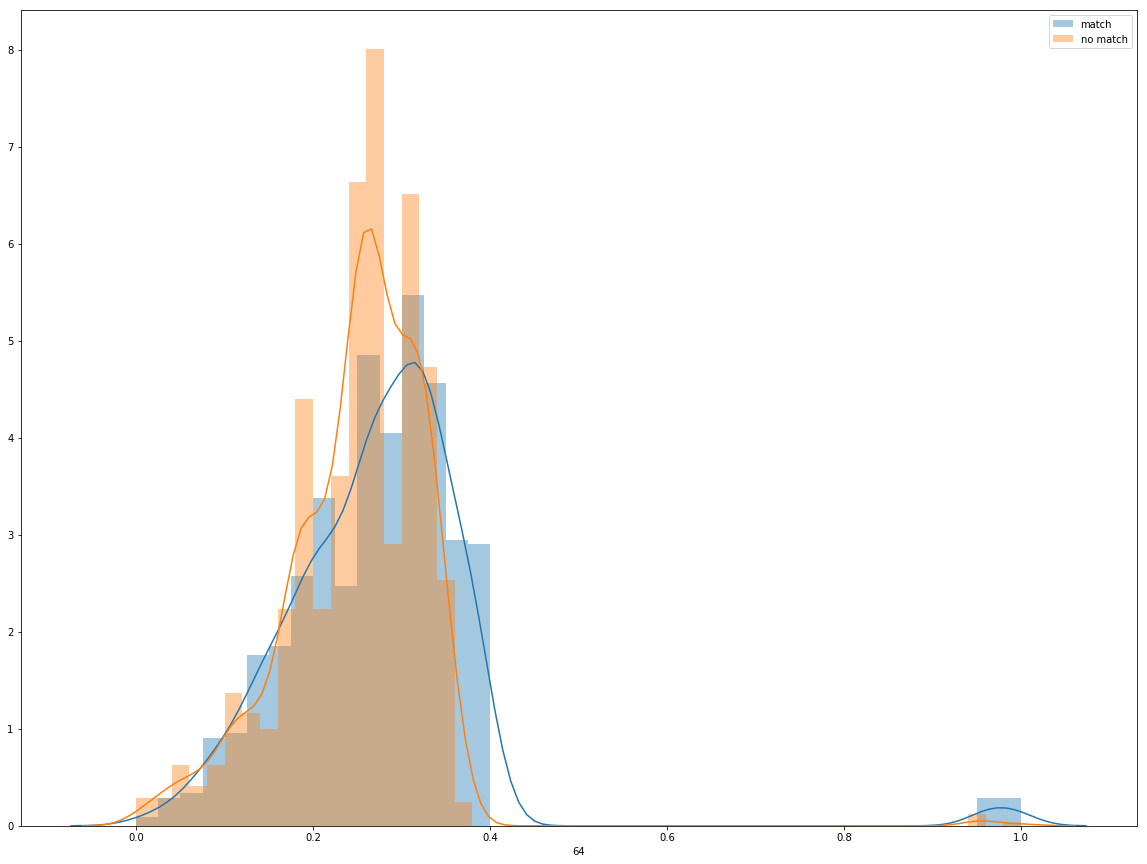




65


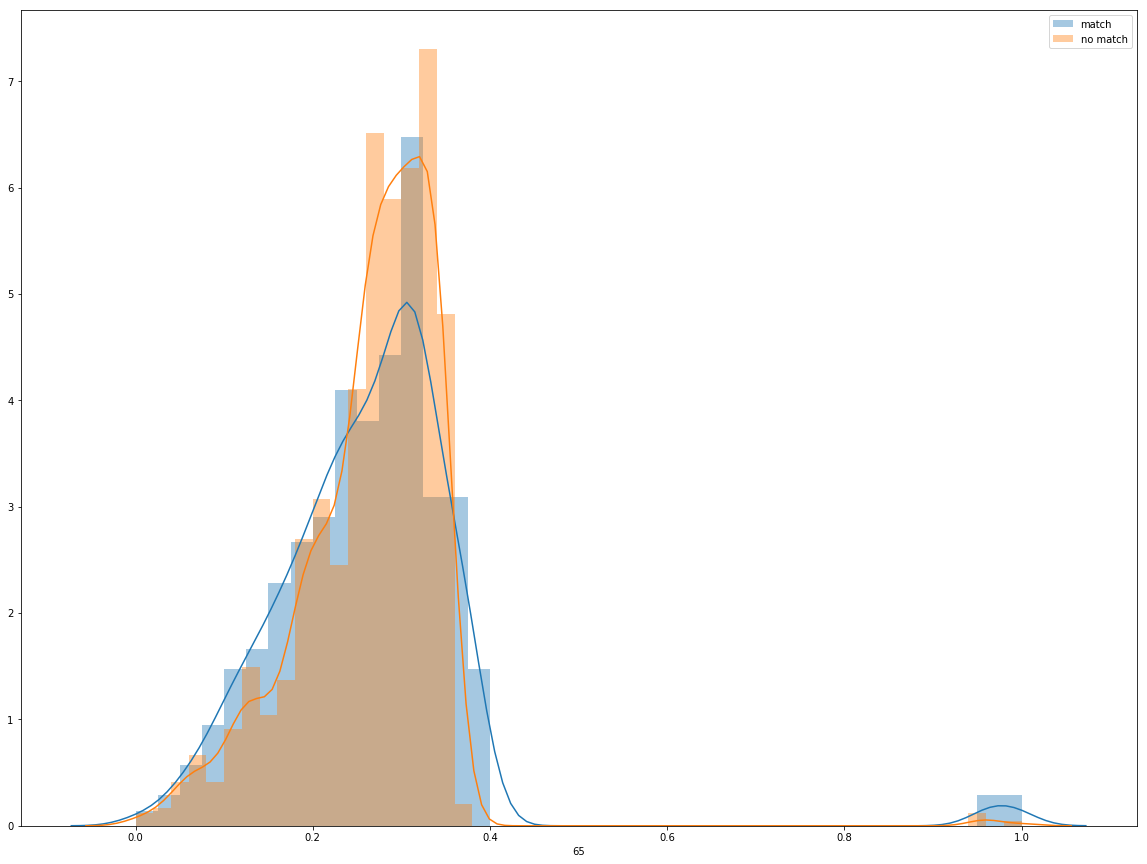




66


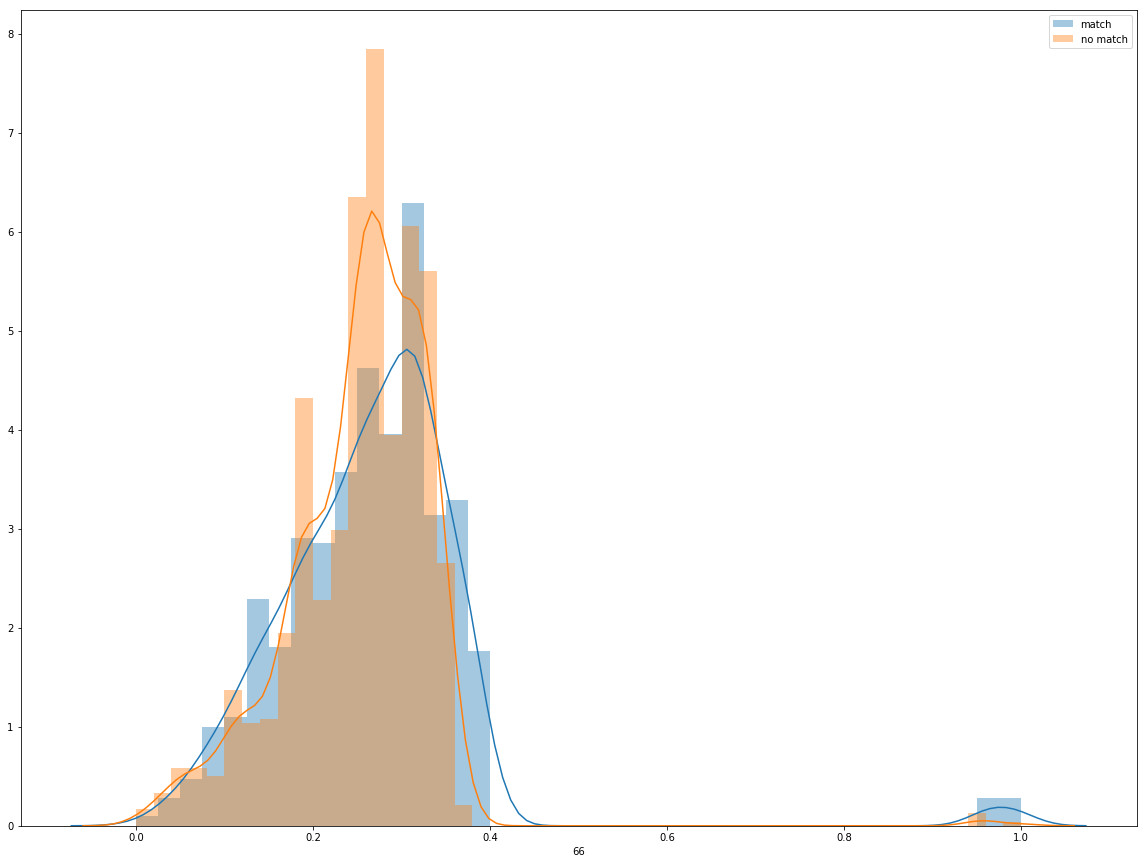




67


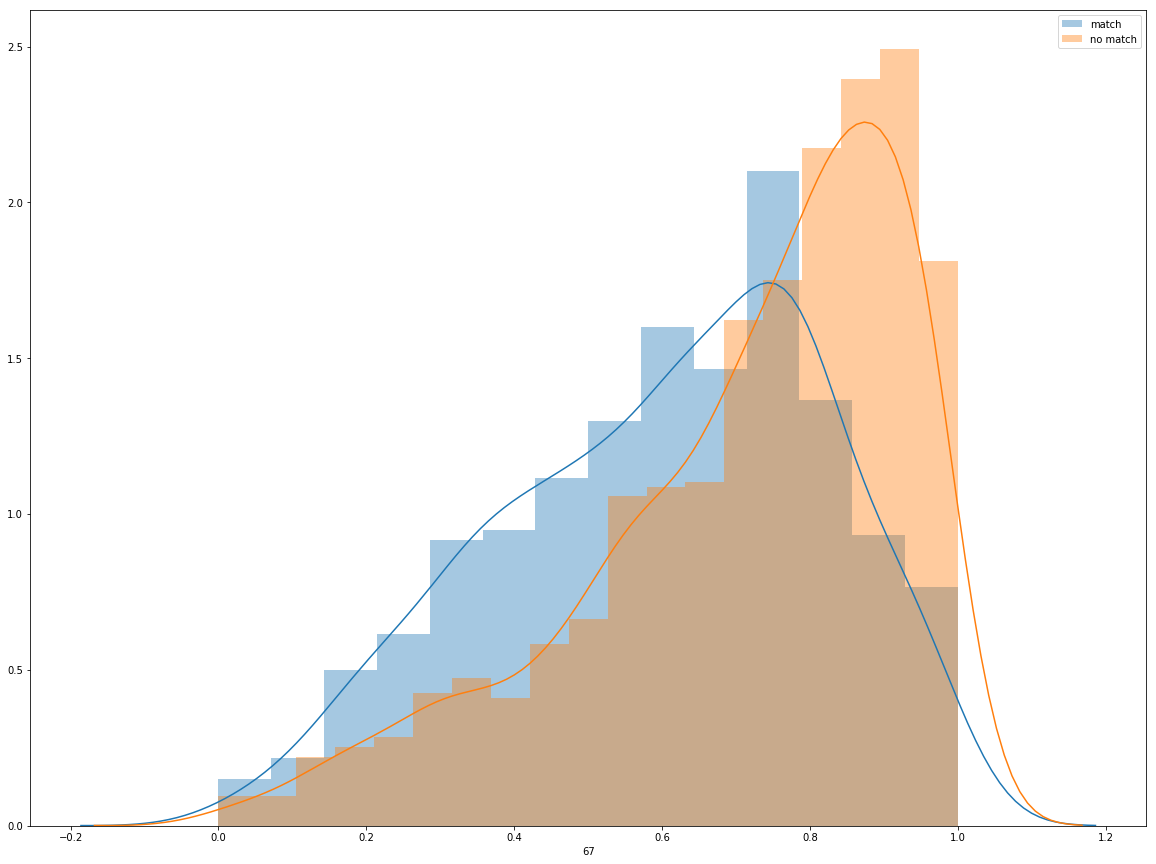

In [56]:
for j in df1_normalized.columns:
    print(j)
    #print(df[j].max())
    #print(match_df[j].max())
    #print(no_match_df[j].max())
#    j=match_df[j]/match_df[j].max()
#    k=no_match_df[j]/no_match_df[j].max()
    
    sns.distplot(df1_normalized[j], label="match")
    sns.distplot(df2_normalized[j], label="no match")
    
    #sns.distplot(no_match_df[j], label="no match")
    plt.legend()
    plt.show()
    
    print("\n\n")
    